In [2]:
import datetime
import pandas as pd
import numpy as np
import datetime
import math
import re
import random
import matplotlib.pyplot as plt


In [36]:
class SPV(object):
    
    class format_SPV_data(object):
        
        '''For formatting our dataset.'''
        
        def __init__(self,df):
            
            '''Data should be entered in dataframe form with loan_date, expected_repayment_date, actual_repayment_date,
            plat_deal_rating, debtor_country_code, debtor_macrosector, EUR_loan, and EUR_repaid_amount as column headings.'''

            self.data = df
            new_cols = ['default_bool','repayment_from_expected_days','repaid_percent']

            for col_name in new_cols:
                self.data[col_name] = np.zeros([len(self.data),1])


        def implement_assumptions(self):
            '''Assumes that write off policy considers every deal with more than 90 days of delay as defaulted, 
            regardless of whether there is repayment in the dataset'''

            for num in range(len(self.data)) :
                self.data.loc[num,'repayment_from_expected_days'] = (datetime.datetime.strptime(self.data.loc
                    [num,'actual_repayment_date'],'%d/%m/%Y').date() - datetime.datetime.strptime(self.data.loc[num,\
                    'expected_repayment_date'],'%d/%m/%Y').date()).days

                if self.data.loc[num,'repayment_from_expected_days'] > 90:
                    self.data.loc[num,'default_bool'] = True    
                else:
                    self.data.loc[num,'default_bool'] = False

                self.data.loc[num,'repaid_percent'] = (self.data.loc[num,'EUR_repaid_amount'] - \
                    self.data.loc[num,'EUR_loan'])/self.data.loc[num,'EUR_loan']*100

            global SPV_data

            SPV_data = self.data


    class visualize_data(object):
        
        """For visualizing our portfolio data"""
        
        def __init__(self):
            
            self.data = SPV_data
        
        def try_col_match(self,col,val):
            
            '''Returns boolean value depending on if a value remains at an index pointer in a list.'''
            
            try:
                list(set(self.data[f'{col}'])).index(val)
                return(True)
            except Exception:
                return(False)
                
        def vis_hist(self,factors,bool_inst):
            
            '''Creates visualization of distributions of actual repayment days versus the expected
            repayment date and calls the pandas 'describe' method for a short table of descriptive
            statistics.
            
            factors -> list of strings which we can generate histograms based on certain values in the  
            plat_deal_rating, debtor_country_code, and debtor_macrosector columns. 
            
            If factors is equal to 'None', the entire dataset will be used to generate the distribution.
            
            bool_inst -> list(str1,str2...) list of boolean operators 'AND'/'OR'. '''
            
            if factors == None:
                title = 'All Types'
                temp_days_data = self.data['repayment_from_expected_days']
            else:
                title = '/'.join(factors)
            
                series = []

                for count,factor in enumerate(factors):
                    if self.try_col_match('plat_deal_rating',factor) == True:
                        if count -1 < 0:
                            series += list(self.data[self.data['plat_deal_rating'] == factor].index)
                        else:
                            if bool_inst[count-1] == 'AND':
                                series = list(set(series).intersection(list(
                                    self.data[self.data['plat_deal_rating'] == factor].index)))
                            else:
                                series += list(self.data[self.data['plat_deal_rating'] == factor].index)
                                
                    elif self.try_col_match('debtor_country_code',factor) == True:
                        if count -1 < 0:
                            series += list(self.data[self.data['debtor_country_code'] == factor].index)
                        else:
                            if bool_inst[count-1] == 'AND':
                                series = list(set(series).intersection(list(
                                    self.data[self.data['debtor_country_code'] == factor].index)))
                            else:
                                series += list(self.data[self.data['debtor_country_code'] == factor].index)
                                
                    elif self.try_col_match('debtor_macrosector',factor) == True:
                        if count -1 < 0:
                            series += list(self.data[self.data['debtor_macrosector'] == factor].index)
                        else:
                            if bool_inst[count-1] == 'AND':
                                series = list(set(series).intersection(list(
                                    self.data[self.data['debtor_macrosector'] == factor].index)))
                            else:
                                series += list(self.data[self.data['debtor_macrosector'] == factor].index)
                                
                series = list(set(series)) 
                
                temp_days_data = pd.Series(self.data['repayment_from_expected_days'],index = series)
            
            print(temp_days_data.describe())
            
            import matplotlib.pyplot as plt

            plt.hist(temp_days_data,bins = int(round(len(temp_days_data)/20)))
            
            plt.title(title + ' ' + 'Distribution of Actual Payment Days from Expected Repayment')
            plt.xlabel('Days from Expected Repayment')
            plt.ylabel('Frequency')

            plt.show()
            
            self.vis_default_bool_bar(factors,bool_inst)
            
        def vis_default_bool_bar(self,factors,bool_inst):
            
            '''Visual display of bar graph of count of defaults dependent on the assumption that if the actual
            repayment is beyond 90 days of the expected repayment the loan is deemed to be in default'''
            
            if factors == None:
                title = 'All Types'
                temp_default_bool = self.data['default_bool']
            else:
                title = '/'.join(factors)
            
                series = []

                for count,factor in enumerate(factors):
                    if self.try_col_match('plat_deal_rating',factor) == True:
                        if count -1 < 0:
                            series += list(self.data[self.data['plat_deal_rating'] == factor].index)
                        else:
                            if bool_inst[count-1] == 'AND':
                                series = list(set(series).intersection(list(
                                    self.data[self.data['plat_deal_rating'] == factor].index)))
                            else:
                                series += list(self.data[self.data['plat_deal_rating'] == factor].index)
                                
                    elif self.try_col_match('debtor_country_code',factor) == True:
                        if count -1 < 0:
                            series += list(self.data[self.data['debtor_country_code'] == factor].index)
                        else:
                            if bool_inst[count-1] == 'AND':
                                series = list(set(series).intersection(list(
                                    self.data[self.data['debtor_country_code'] == factor].index)))
                            else:
                                series += list(self.data[self.data['debtor_country_code'] == factor].index)
                                
                    elif self.try_col_match('debtor_macrosector',factor) == True:
                        if count -1 < 0:
                            series += list(self.data[self.data['debtor_macrosector'] == factor].index)
                        else:
                            if bool_inst[count-1] == 'AND':
                                series = list(set(series).intersection(list(
                                    self.data[self.data['debtor_macrosector'] == factor].index)))
                            else:
                                series += list(self.data[self.data['debtor_macrosector'] == factor].index)
                                
                series = list(set(series))

                temp_default_bool = pd.Series(self.data['default_bool'],index = series)
            
            temp_default_bool.value_counts().plot(kind='bar')
            
    class ML_approach(object):
        
        '''For implementing ensemble learning techniques to predict defaults.'''
        
        def __init__(self):
            
            self.data = SPV_data
        
        def reverse_dic(self,dic):
            
            dic = {y:x for x,y in dic.items()}
            return(dic)
            
        def make_ml_df(self):
            
            '''Generate and format a dataframe object with tractable integer formatted data to implement ensemble 
            learning techniques to predict defaults'''
            
            self.rating_dic = self.reverse_dic(dict(enumerate(sorted(list(set(self.data['plat_deal_rating']))))))
            self.country_code_dic = self.reverse_dic(dict(enumerate(list(set(self.data['debtor_country_code'])))))
            self.macrosector_dic = self.reverse_dic(dict(enumerate(list(set(self.data['debtor_macrosector'])))))
            self.default_bool_dic = self.reverse_dic(dict(enumerate(list(set(self.data['default_bool'])))))
            
            for num in range(len(self.data)):
                self.data.loc[num,'plat_deal_rating'] = self.rating_dic[self.data.loc[num,'plat_deal_rating']]
                self.data.loc[num,'debtor_country_code'] = self.country_code_dic[self.data.loc[num,'debtor_country_code']]
                self.data.loc[num,'debtor_macrosector'] = self.macrosector_dic[self.data.loc[num,'debtor_macrosector']]
                self.data.loc[num,'default_bool'] = self.default_bool_dic[self.data.loc[num,'default_bool']]
                
        def run_decision_tree(self,test_size, shuffle, visualize):
            
            '''Generates a single decision tree and prints comparative accuracy of test with all relevant features
            from data set. Namely, plat_deal_rating, debtor_country_code, debtor_macrosector, and repaid_percent.
            
            test_size -> int
            
            shuffle -> boolean 
            
            visualize requires a boolean input to generate a graphic output of the decision tree from the kernel.
            
            '''
            
            from sklearn import tree
            from sklearn.model_selection import train_test_split 

            ml_temp_data = self.data

            X = np.array([[ml_temp_data['plat_deal_rating'][num],ml_temp_data['debtor_country_code'][num],
                           ml_temp_data['debtor_macrosector'][num],ml_temp_data['repaid_percent'][num]]\
                          for num in range(len(ml.data))])

            y = np.array(ml_temp_data['default_bool'])

            X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = shuffle,test_size = test_size) 


            dec_tree = tree.DecisionTreeClassifier(max_depth = 4,criterion = 'entropy',\
                                                   splitter = 'best').fit(X_train,y_train) 

            dec_tree_predictions = dec_tree.predict(X_test) 
            
            print(f'Train Proportion of actual defaults to total: {list(y_train).count(1)/len(y_train)}')

            print(f'Test Proportion of actual defaults to total: {list(y_test).count(1)/len(y_test)}')

            print(f'Proportion of default predictions to total predictions: {list(dec_tree_predictions).count(1)/len(list(dec_tree_predictions))}')

            count = 0
            default_count = 0
            for num in range(len(dec_tree_predictions)):
                if dec_tree_predictions[num] == y_test[num]:
                    count += 1
                if dec_tree_predictions[num] == 1 and dec_tree_predictions[num] == y_test[num]:
                    default_count += 1
                    
            print(f'Accuracy: {count/len(dec_tree_predictions)}')
            print(f'Accuracy: {default_count/default_count/list(y_test).count(1)}')

            if visualize == False:
                pass
            else:
                fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)

                tree.plot_tree(dec_tree,
                           feature_names = ['plat_deal_rating','debtor_country_code','debtor_macrosector','repaid_percent'], 
                           class_names= ['0','1'],
                           filled = True,
                           proportion = False,
                           precision = 10);
        
        def run_decision_tree_combinations(self,test_size, shuffle, features, max_depth, visualize):
            
            '''Generates all unique combinations of a list of values and runs decision trees on all different 
            combinations of features with specified max_depth ranges. Returns a dictionary with all the test
            outputs from the varying feature combinations and max depth ranges. Prints comparative accuracy.
            
            test_size -> int
            
            shuffle -> boolean 
            
            features -> list of features to generate all possible combinations to run.
            
            max_depth -> tuple specifying max_depth range to be iterated on.
            
            visualize requires a boolean input to generate a graphic output of the decision tree from the kernel
            and to save .png files specifying the combinations of features with specific max depth.
            
            '''
            from sklearn import tree
            from sklearn.model_selection import train_test_split 
            from graphviz import Source
            
            features = ['plat_deal_rating','debtor_country_code','debtor_macrosector','repaid_percent']

            from itertools import chain, combinations

            feature_comb = []

            for num in range(1,len(features)+1):
                feature_comb.append([val for val in combinations(features,num)])

            feature_comb = [list(num) for val in feature_comb for num in val]

            ml_temp_data = ml.data
            
            dec_tree_dic = {}
            
            
            for features in feature_comb:
                for depth in range(max_depth[0],max_depth[1]+1):
                    X = []
                    for num in range(len(ml_temp_data)):
                        X.append(list(ml_temp_data.loc[num,features]))

                    y = np.array(ml_temp_data['default_bool'])

                    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = shuffle,test_size = test_size) 


                    dec_tree = tree.DecisionTreeClassifier(max_depth = depth,criterion = 'entropy',\
                                                           splitter = 'best').fit(X_train,y_train) 

                    dec_tree_predictions = dec_tree.predict(X_test) 

                    print(features)

                    print(f'Train Proportion of actual defaults to total: {list(y_train).count(1)/len(y_train)}')
                    print(f'Test Proportion of actual defaults to total: {list(y_test).count(1)/len(y_test)}')

                    print(f'Proportion of default predictions to total predictions: {list(dec_tree_predictions).count(1)/len(list(dec_tree_predictions))}')

                    count = 0
                    default_count = 0
                    for num in range(len(dec_tree_predictions)):
                        if dec_tree_predictions[num] == y_test[num]:
                            count += 1
                        if dec_tree_predictions[num] == 1 and dec_tree_predictions[num] == y_test[num]:
                            default_count += 1
                    
                    total_accuracy = count/len(dec_tree_predictions)
                    default_accuracy = default_count/list(y_test).count(1)
                    print(f'Total Accuracy: {total_accuracy}')
                    print(f'Default Accuracy: {default_accuracy}')
                    
                    if visualize == False:
                        pass
                    else:
                        fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)

                        graph = Source( tree.export_graphviz(dec_tree, out_file=None, feature_names = features, 
                                                            class_names = ['0','1']))
                        graph.format = 'png'
                        graph.render("dec_tree_" + ','.join(features) + f" _depth_{depth}",view=True)

                    dec_tree_dic[','.join(features) + f"_depth_{depth}"] = {'Accuracy': total_accuracy,\
                        'Default Accuracy': default_accuracy}
            
            global dec_tree_dic_global
            
            dec_tree_dic_global = dec_tree_dic
            
            return(dec_tree_dic)

['plat_deal_rating']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.0
Total Accuracy: 0.874251497005988
Default Accuracy: 0.0
['plat_deal_rating']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.0
Total Accuracy: 0.874251497005988
Default Accuracy: 0.0
['plat_deal_rating']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.0
Total Accuracy: 0.874251497005988
Default Accuracy: 0.0
['debtor_country_code']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to tota

C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['debtor_country_code', 'debtor_macrosector']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.0
Total Accuracy: 0.874251497005988
Default Accuracy: 0.0


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['debtor_country_code', 'debtor_macrosector']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.008982035928143712
Total Accuracy: 0.8792415169660679
Default Accuracy: 0.05555555555555555


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['debtor_country_code', 'debtor_macrosector']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.00998003992015968
Total Accuracy: 0.8802395209580839
Default Accuracy: 0.06349206349206349


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['debtor_country_code', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.013972055888223553
Total Accuracy: 0.8622754491017964
Default Accuracy: 0.007936507936507936


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['debtor_country_code', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.01996007984031936
Total Accuracy: 0.8702594810379242
Default Accuracy: 0.06349206349206349


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['debtor_country_code', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.017964071856287425
Total Accuracy: 0.8702594810379242
Default Accuracy: 0.05555555555555555


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['debtor_macrosector', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.010978043912175649
Total Accuracy: 0.8652694610778443
Default Accuracy: 0.007936507936507936


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['debtor_macrosector', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.011976047904191617
Total Accuracy: 0.8642714570858283
Default Accuracy: 0.007936507936507936


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['debtor_macrosector', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.007984031936127744
Total Accuracy: 0.8682634730538922
Default Accuracy: 0.007936507936507936


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['plat_deal_rating', 'debtor_country_code', 'debtor_macrosector']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.0
Total Accuracy: 0.874251497005988
Default Accuracy: 0.0


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['plat_deal_rating', 'debtor_country_code', 'debtor_macrosector']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.014970059880239521
Total Accuracy: 0.8832335329341318
Default Accuracy: 0.09523809523809523


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['plat_deal_rating', 'debtor_country_code', 'debtor_macrosector']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.015968063872255488
Total Accuracy: 0.8842315369261478
Default Accuracy: 0.10317460317460317


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['plat_deal_rating', 'debtor_country_code', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.0
Total Accuracy: 0.874251497005988
Default Accuracy: 0.0


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['plat_deal_rating', 'debtor_country_code', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.013972055888223553
Total Accuracy: 0.8762475049900199
Default Accuracy: 0.06349206349206349


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['plat_deal_rating', 'debtor_country_code', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.020958083832335328
Total Accuracy: 0.8772455089820359
Default Accuracy: 0.09523809523809523


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['plat_deal_rating', 'debtor_macrosector', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.0
Total Accuracy: 0.874251497005988
Default Accuracy: 0.0


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['plat_deal_rating', 'debtor_macrosector', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.022954091816367265
Total Accuracy: 0.8632734530938124
Default Accuracy: 0.047619047619047616


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['plat_deal_rating', 'debtor_macrosector', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.0249500998003992
Total Accuracy: 0.8632734530938124
Default Accuracy: 0.05555555555555555


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['debtor_country_code', 'debtor_macrosector', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.013972055888223553
Total Accuracy: 0.8622754491017964
Default Accuracy: 0.007936507936507936


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['debtor_country_code', 'debtor_macrosector', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.020958083832335328
Total Accuracy: 0.8692614770459082
Default Accuracy: 0.06349206349206349


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['debtor_country_code', 'debtor_macrosector', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.01996007984031936
Total Accuracy: 0.8702594810379242
Default Accuracy: 0.06349206349206349


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['plat_deal_rating', 'debtor_country_code', 'debtor_macrosector', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.0
Total Accuracy: 0.874251497005988
Default Accuracy: 0.0


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['plat_deal_rating', 'debtor_country_code', 'debtor_macrosector', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.03293413173652695
Total Accuracy: 0.8672654690618763
Default Accuracy: 0.10317460317460317


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


['plat_deal_rating', 'debtor_country_code', 'debtor_macrosector', 'repaid_percent']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.03592814371257485
Total Accuracy: 0.874251497005988
Default Accuracy: 0.14285714285714285


C:\Users\Boris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:346: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


OSError: [WinError -2147219189] Windows Error 0x8004090b: 'dec_tree_plat_deal_rating,debtor_country_code,debtor_macrosector,repaid_percent _depth_5.png'

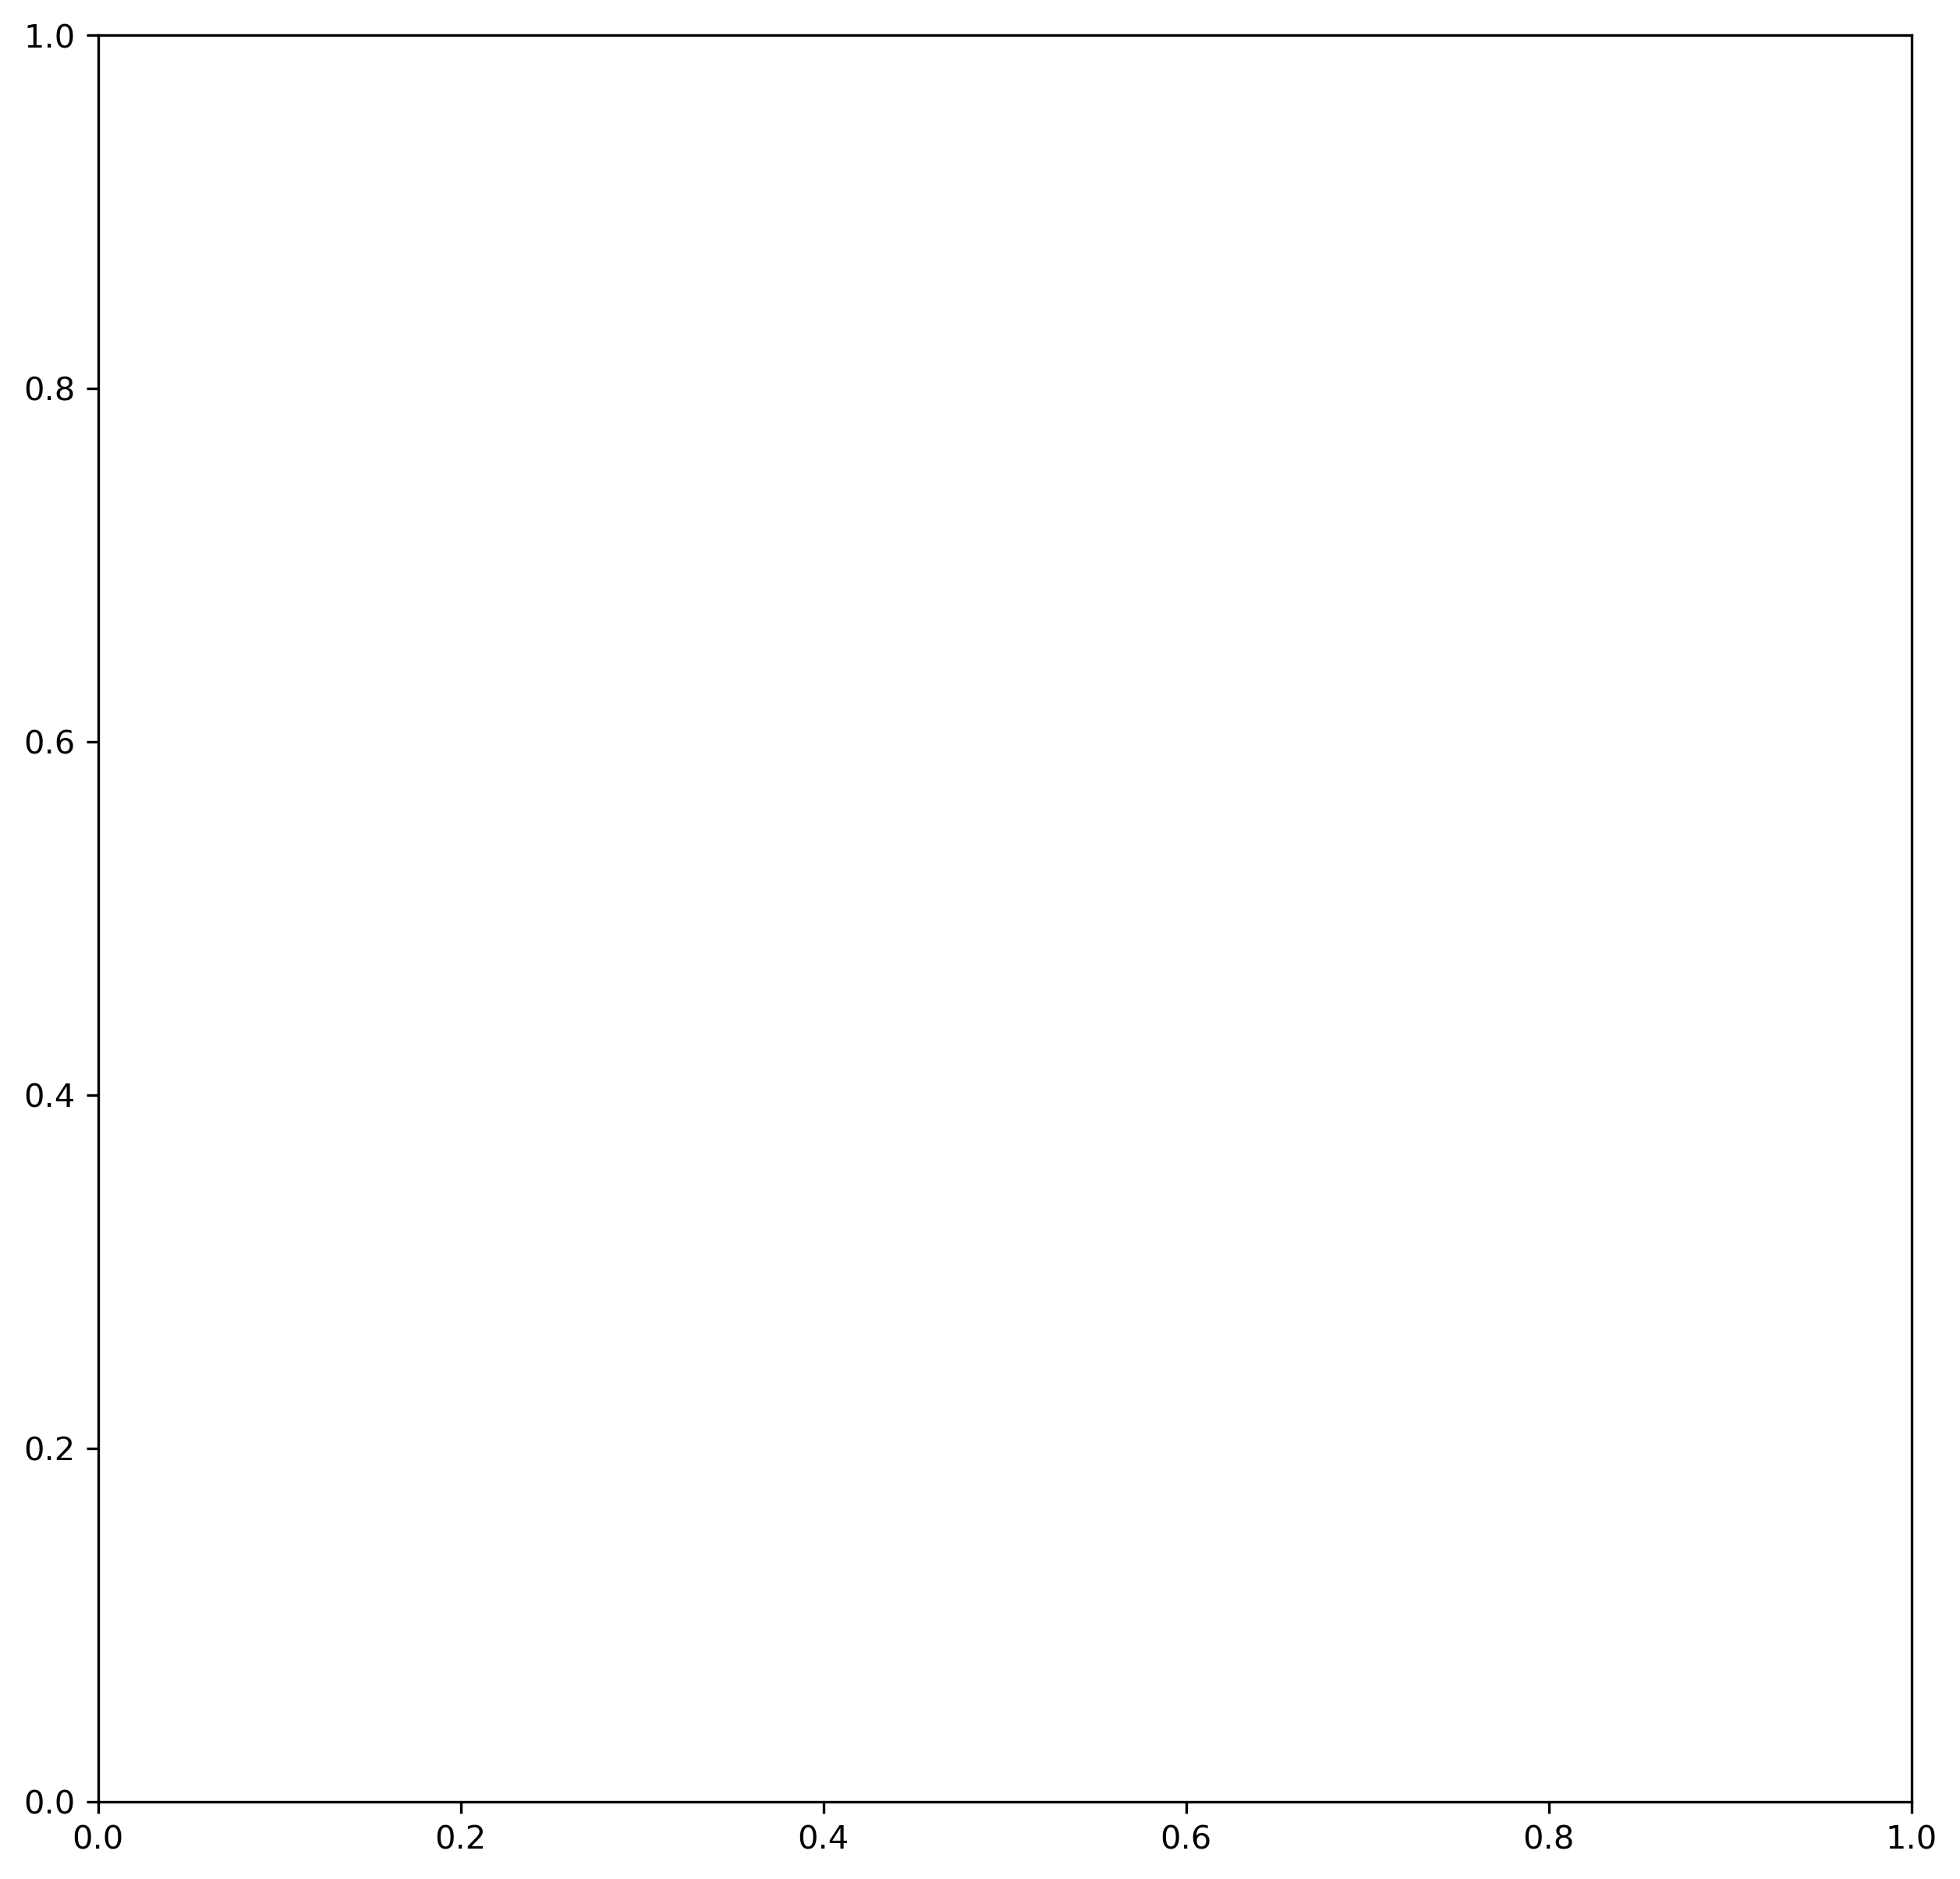

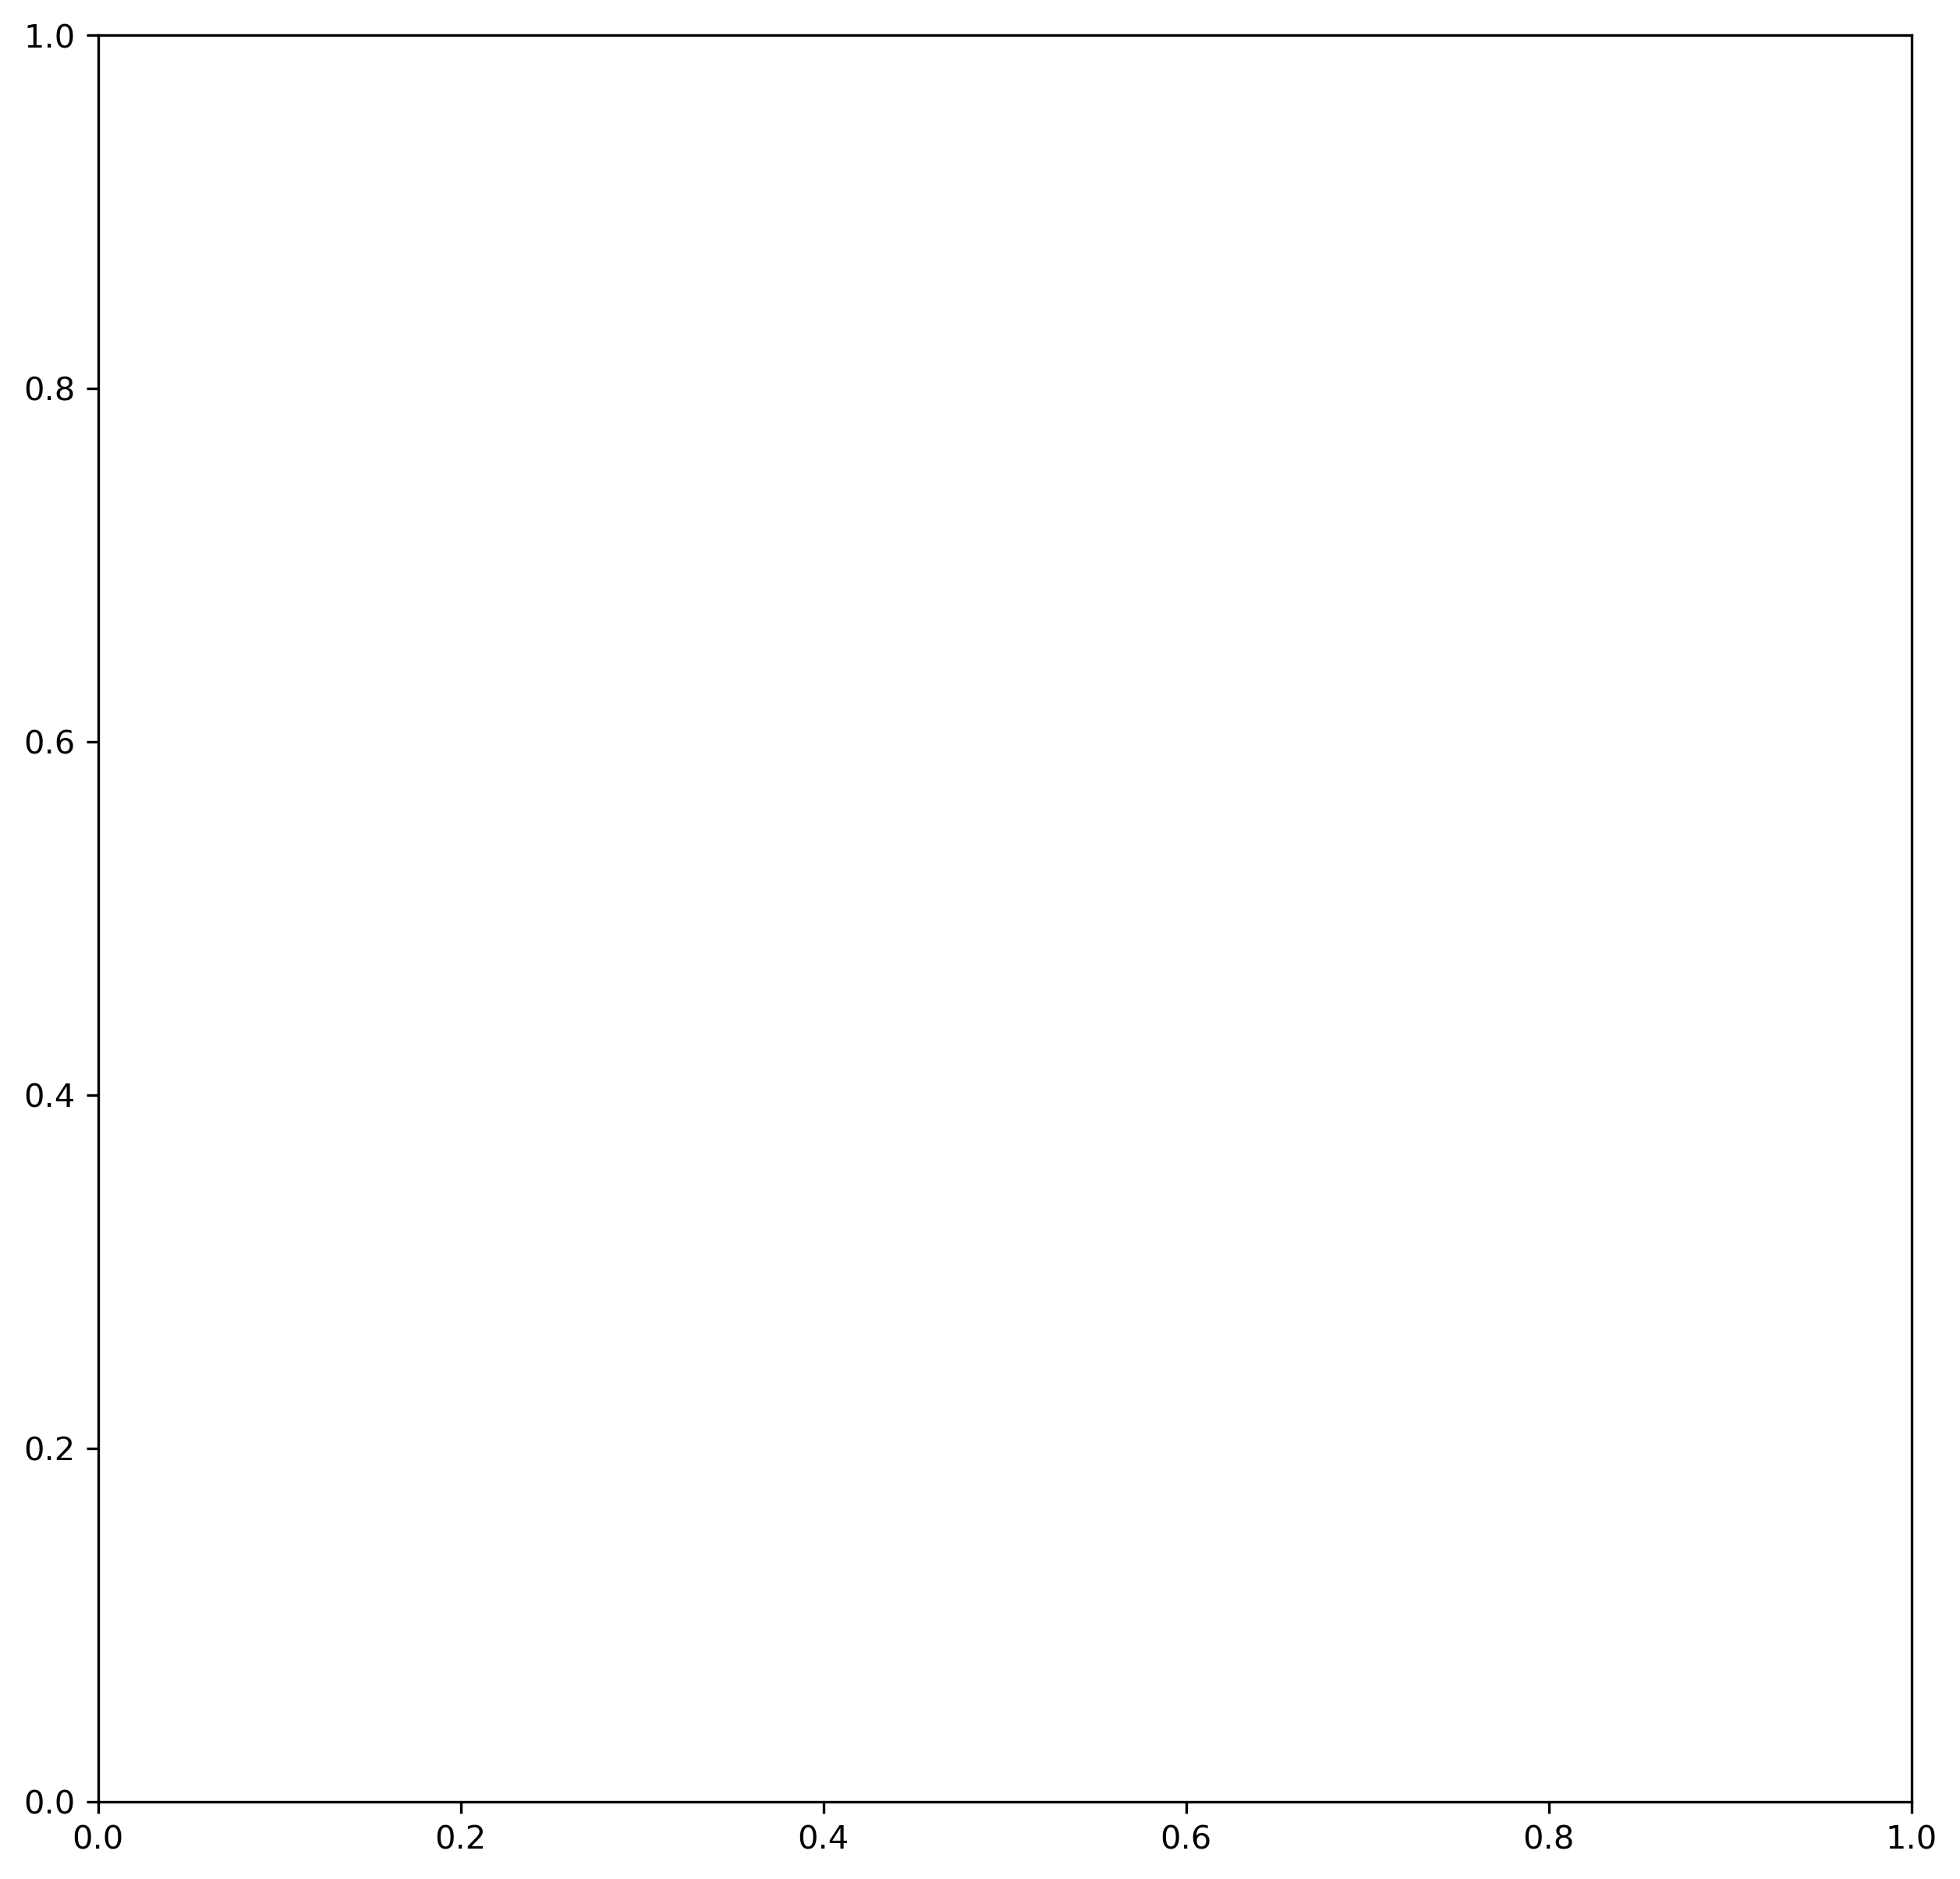

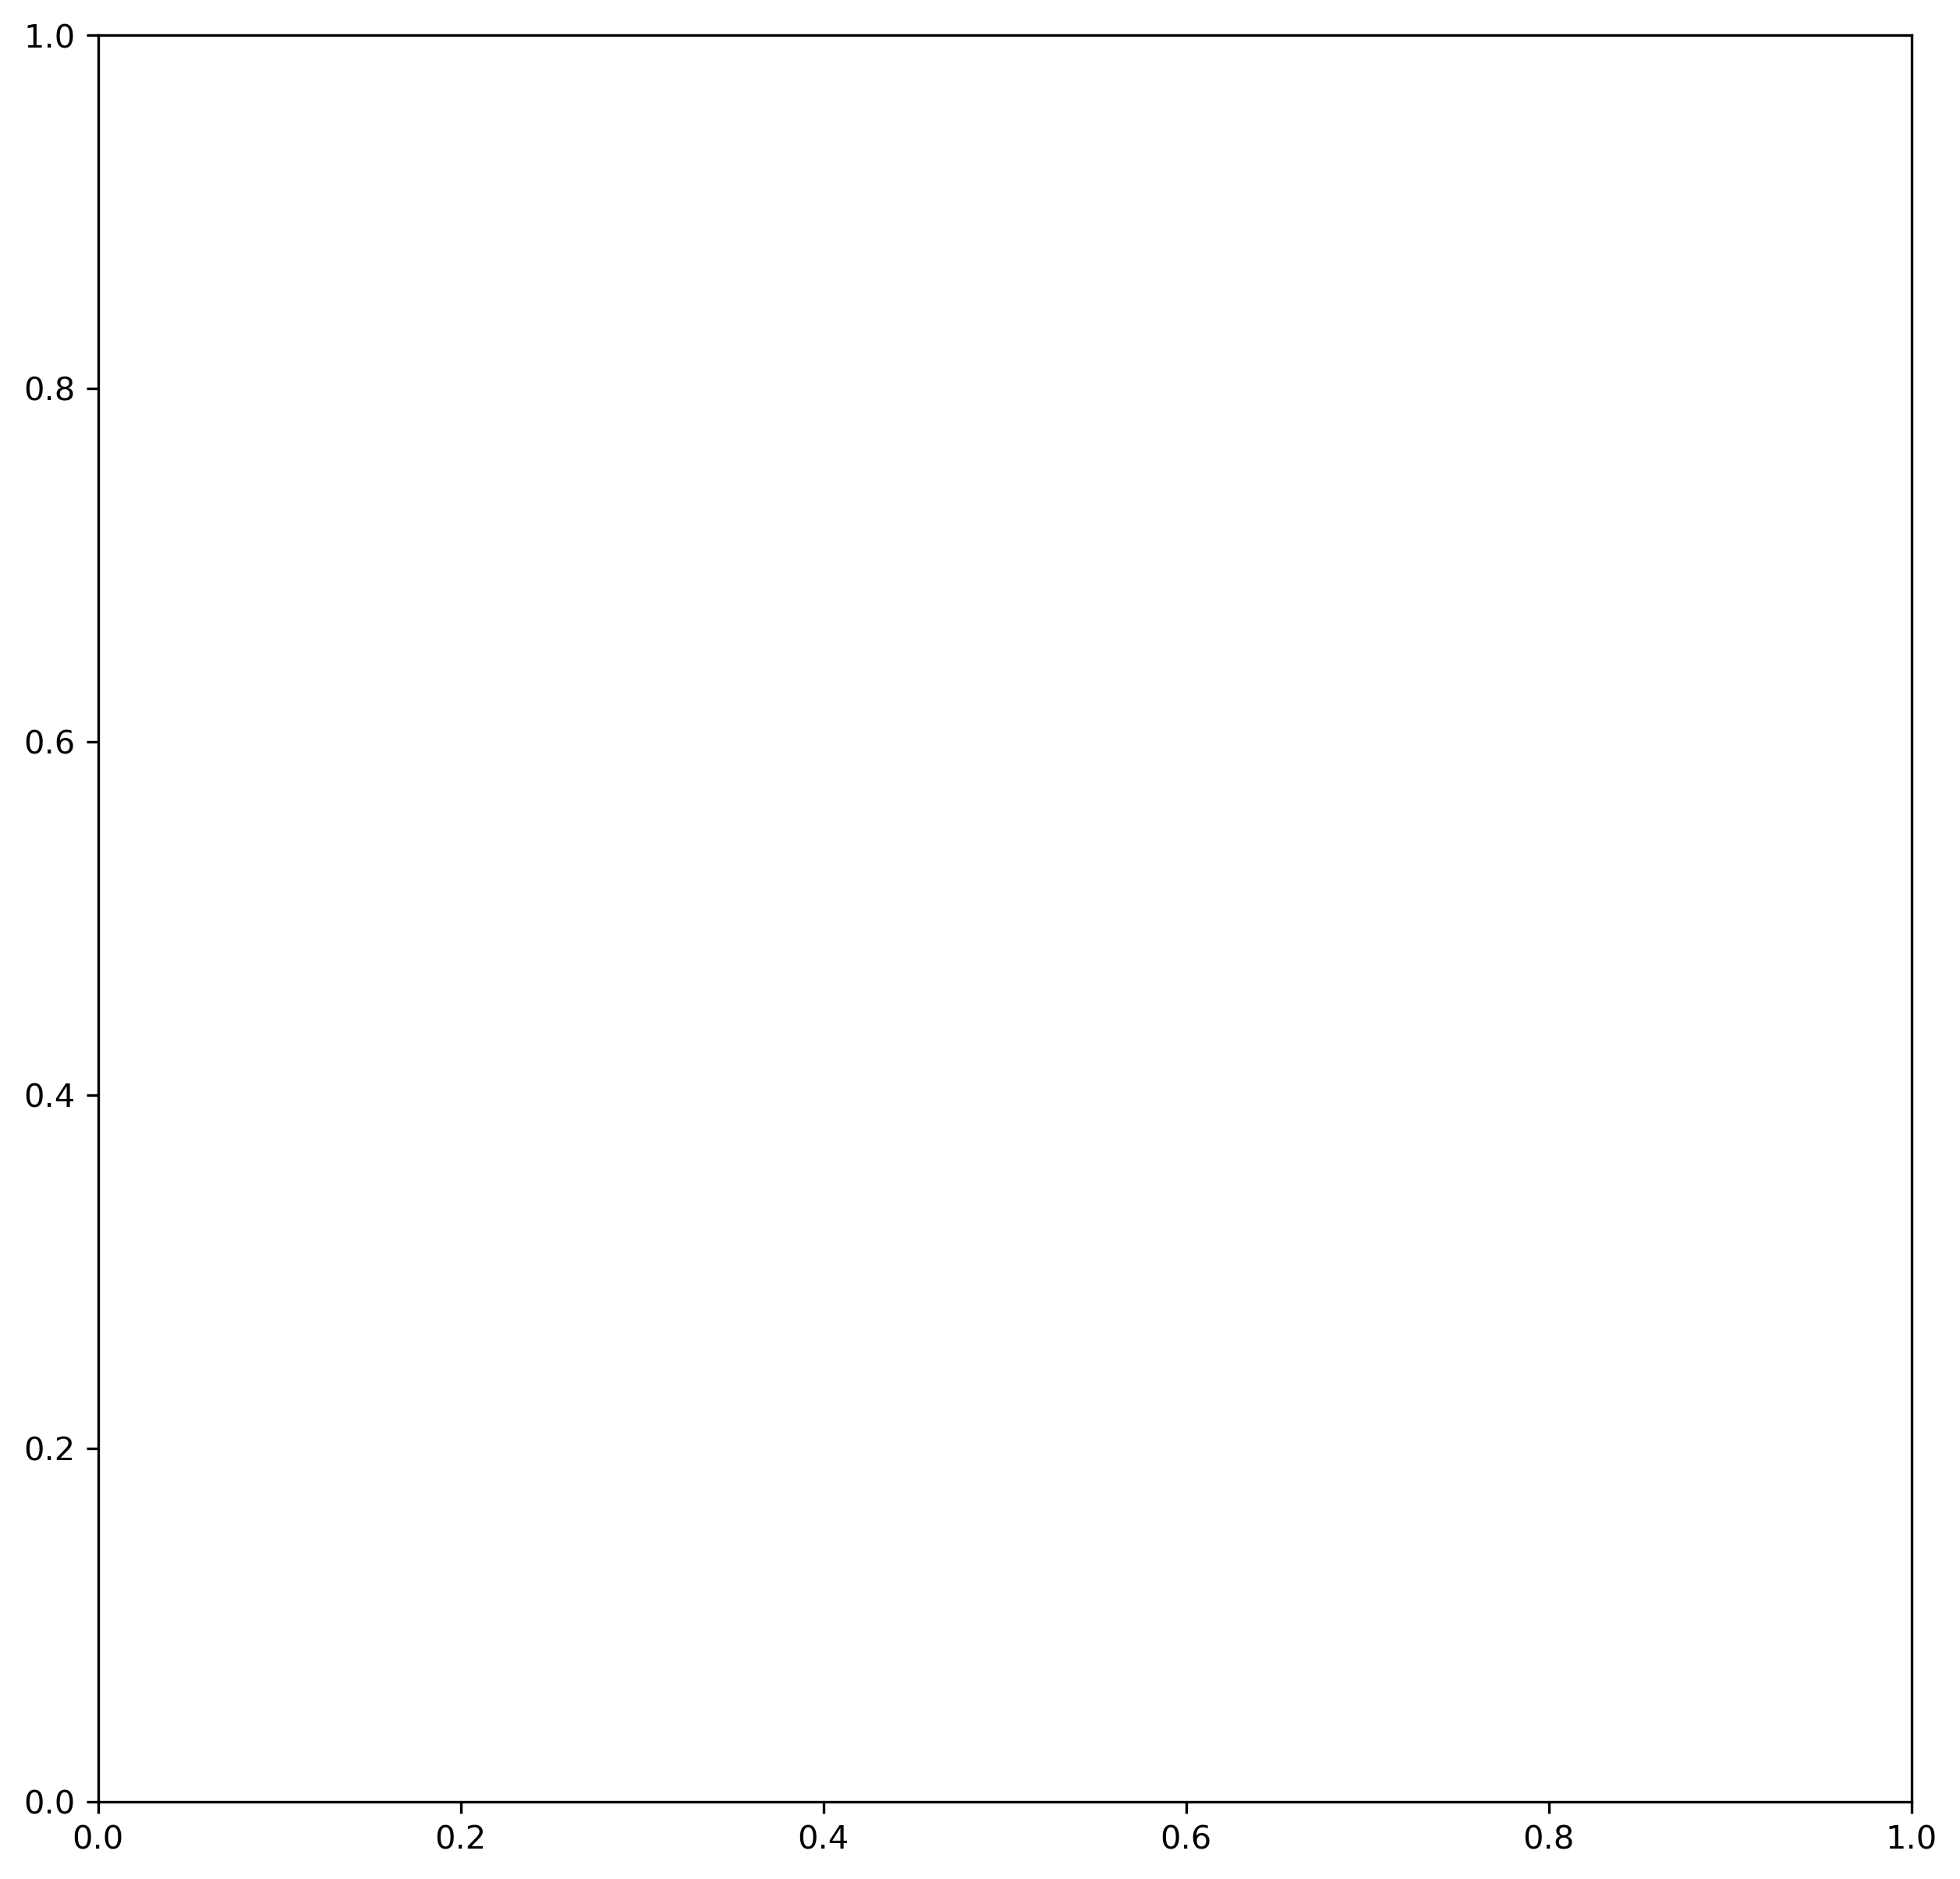

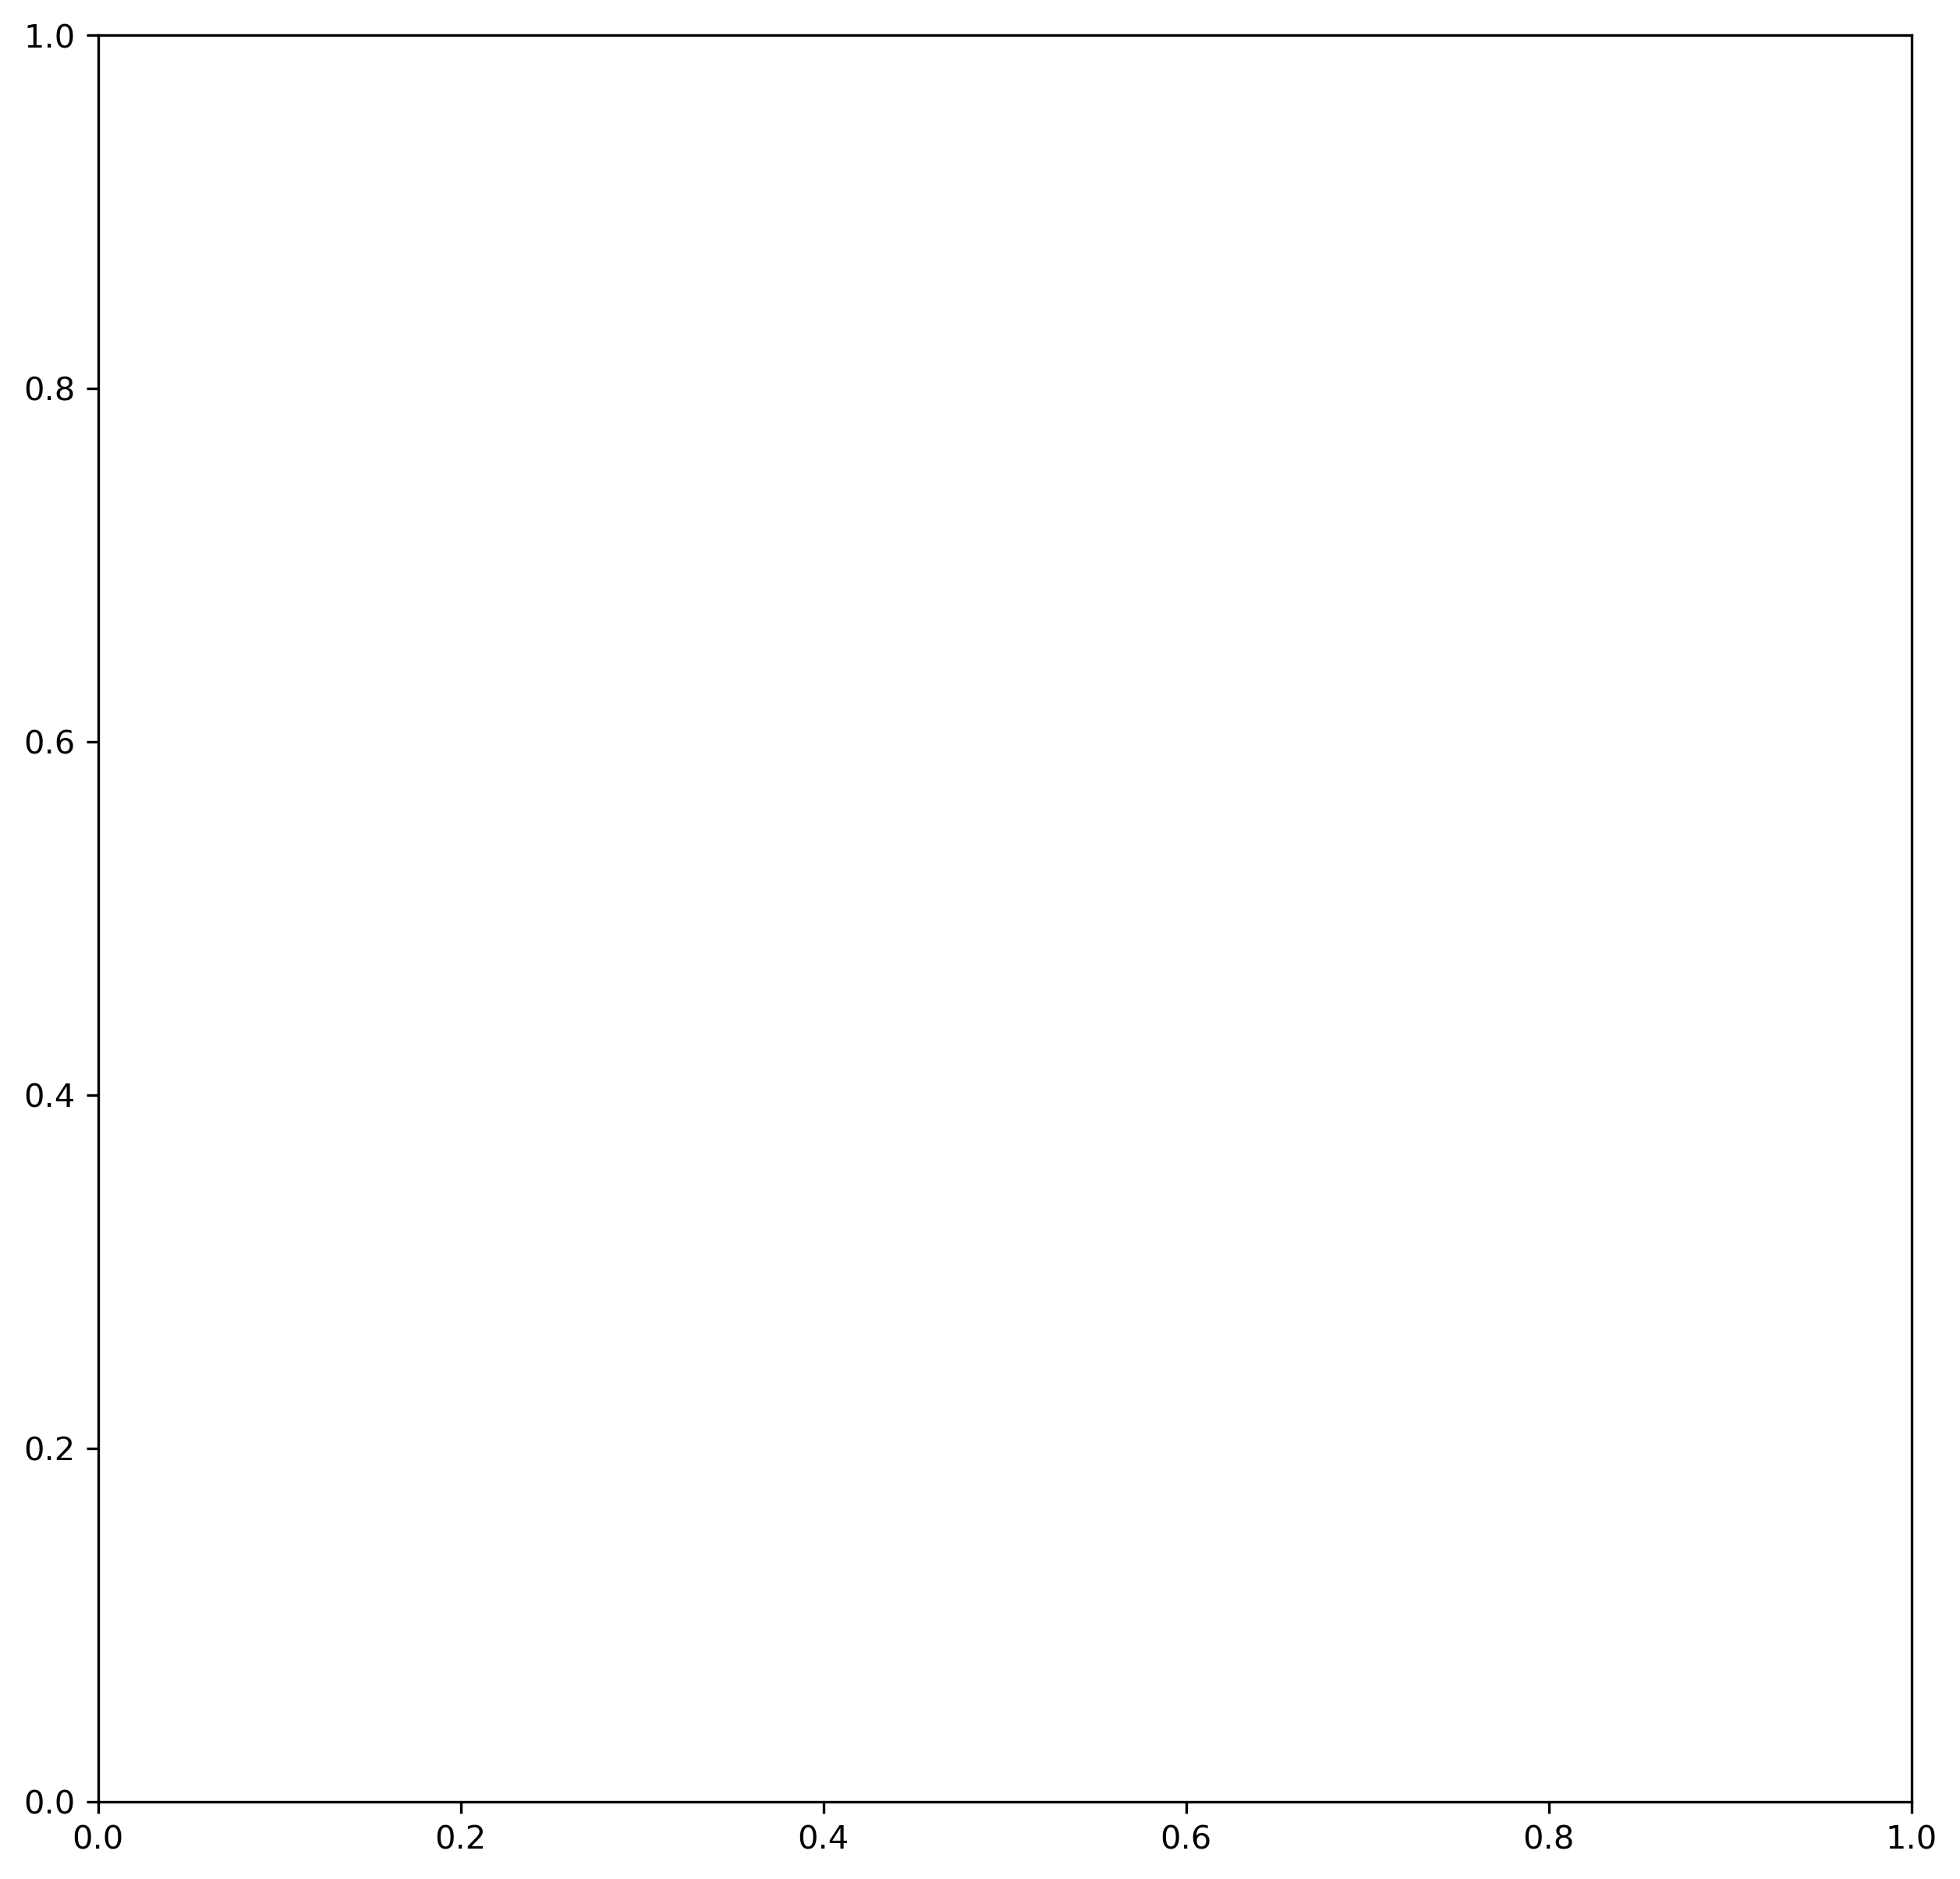

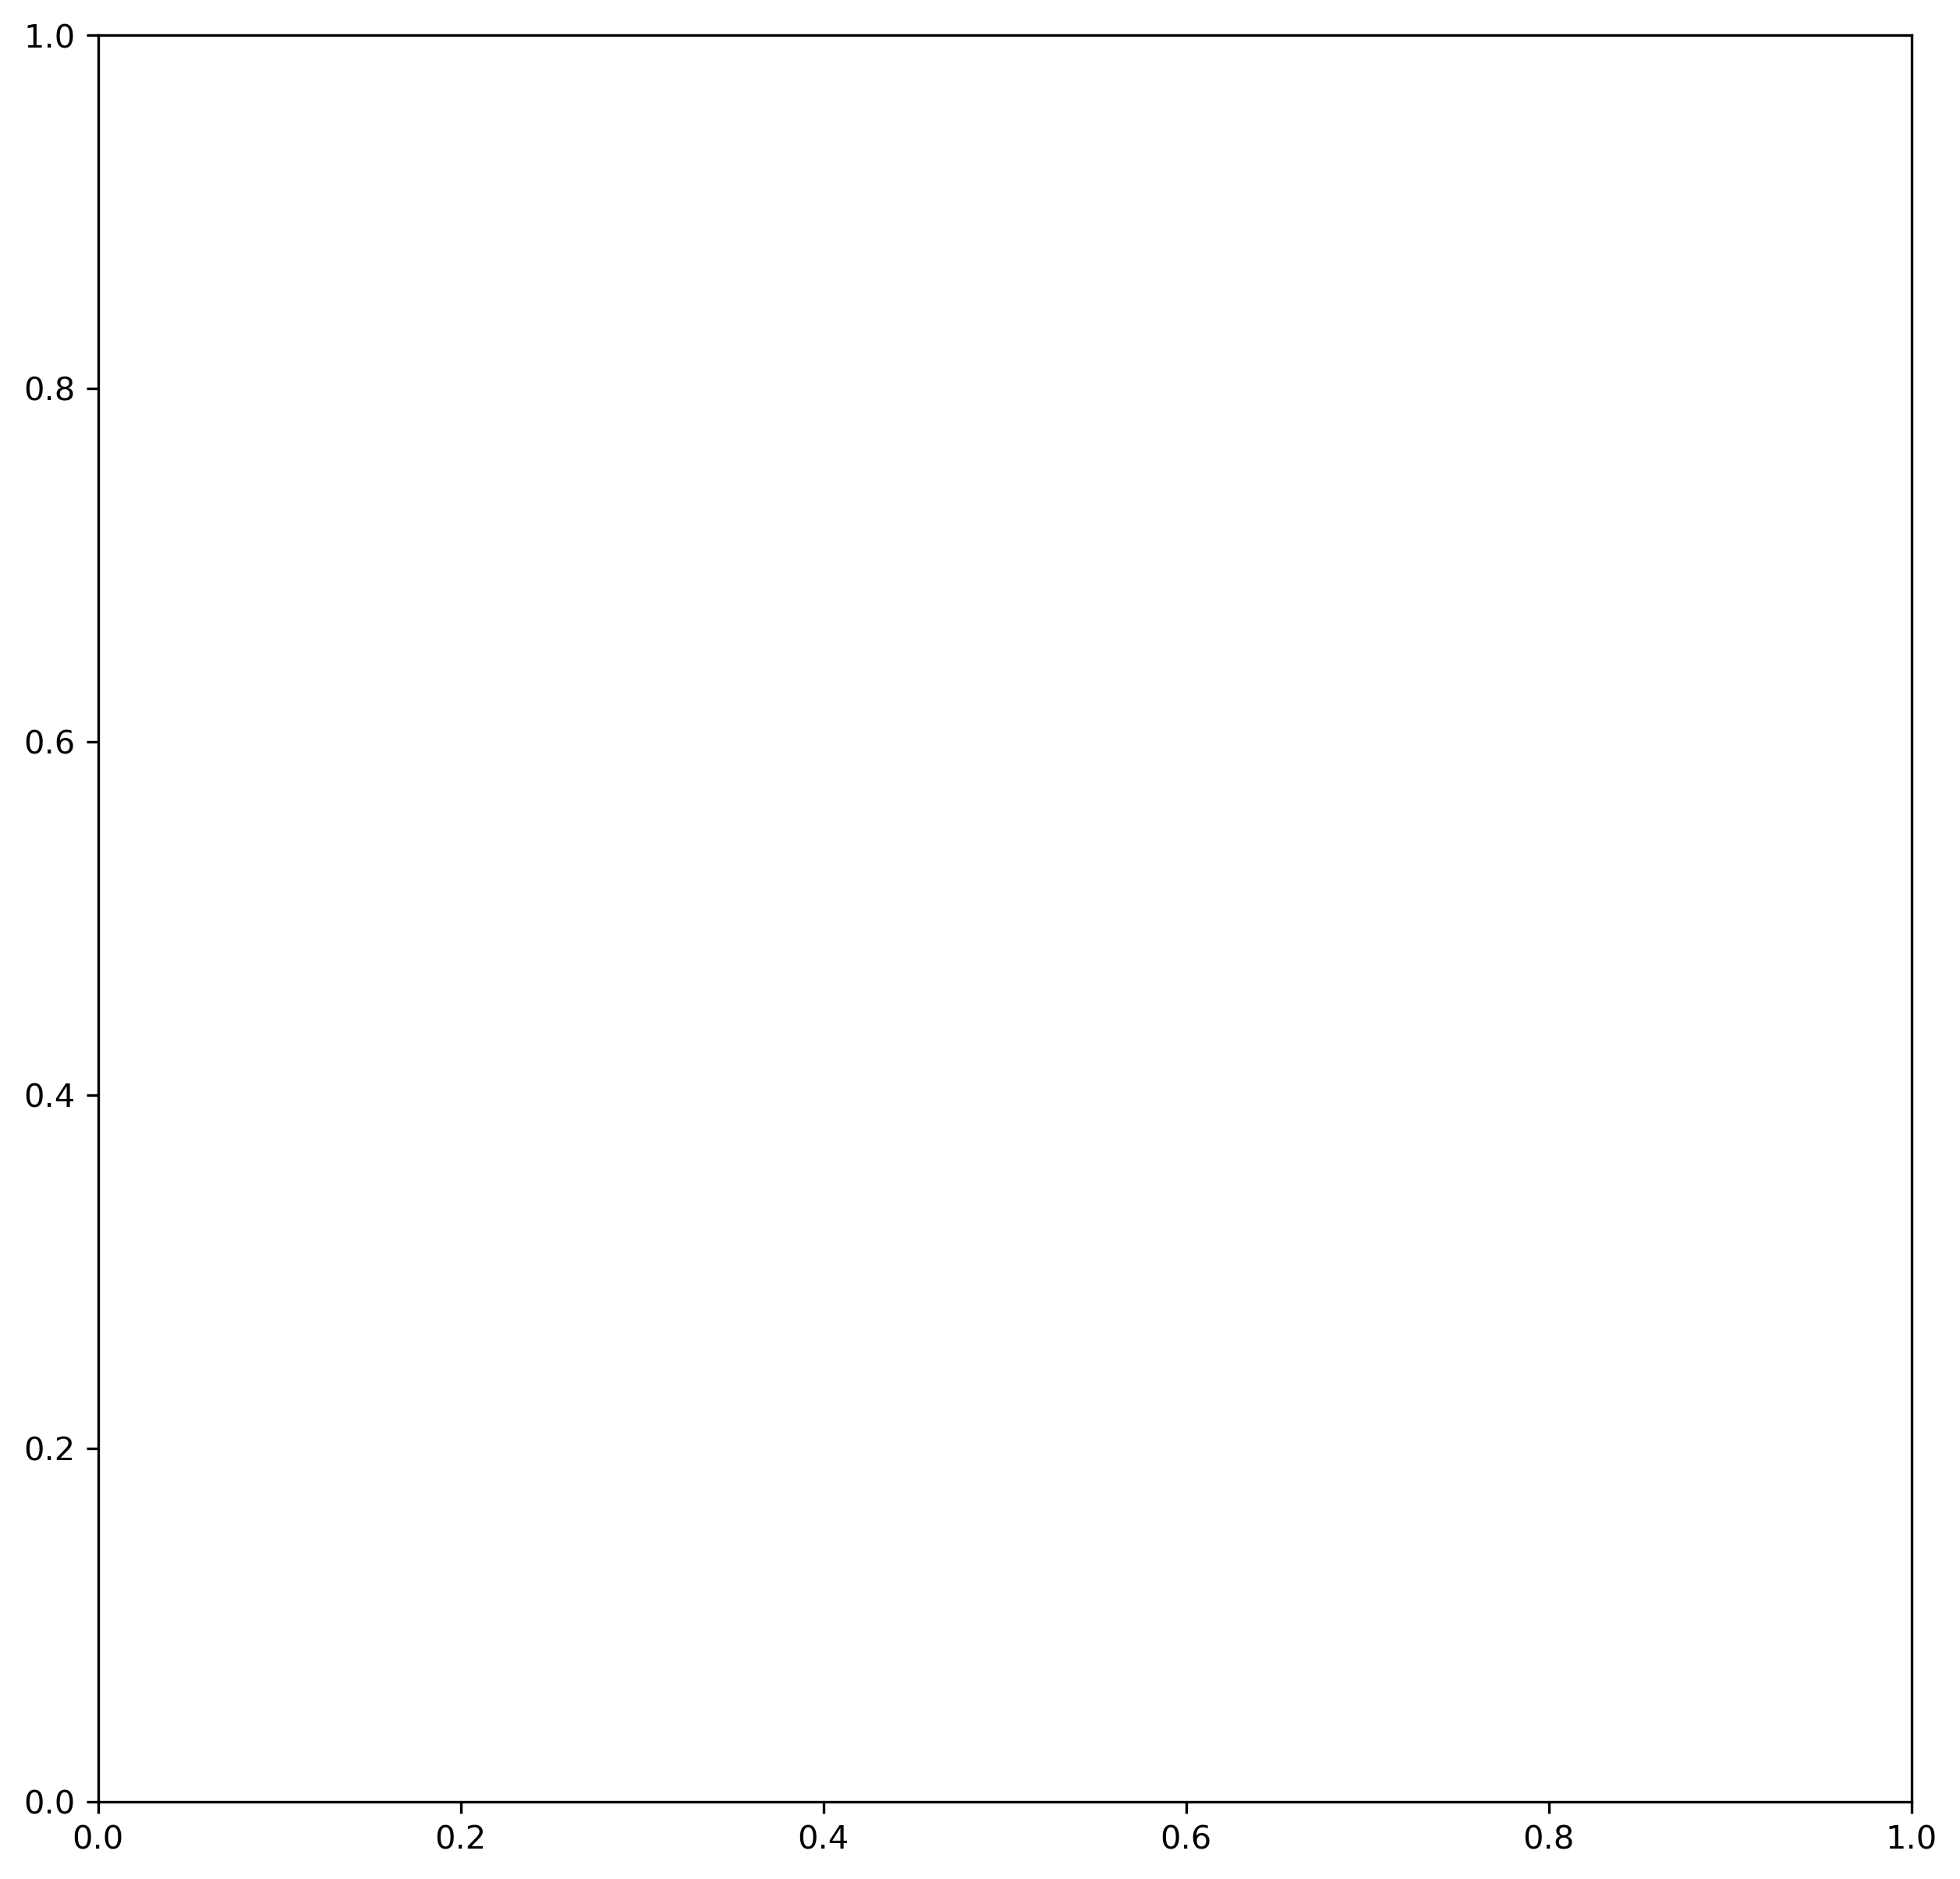

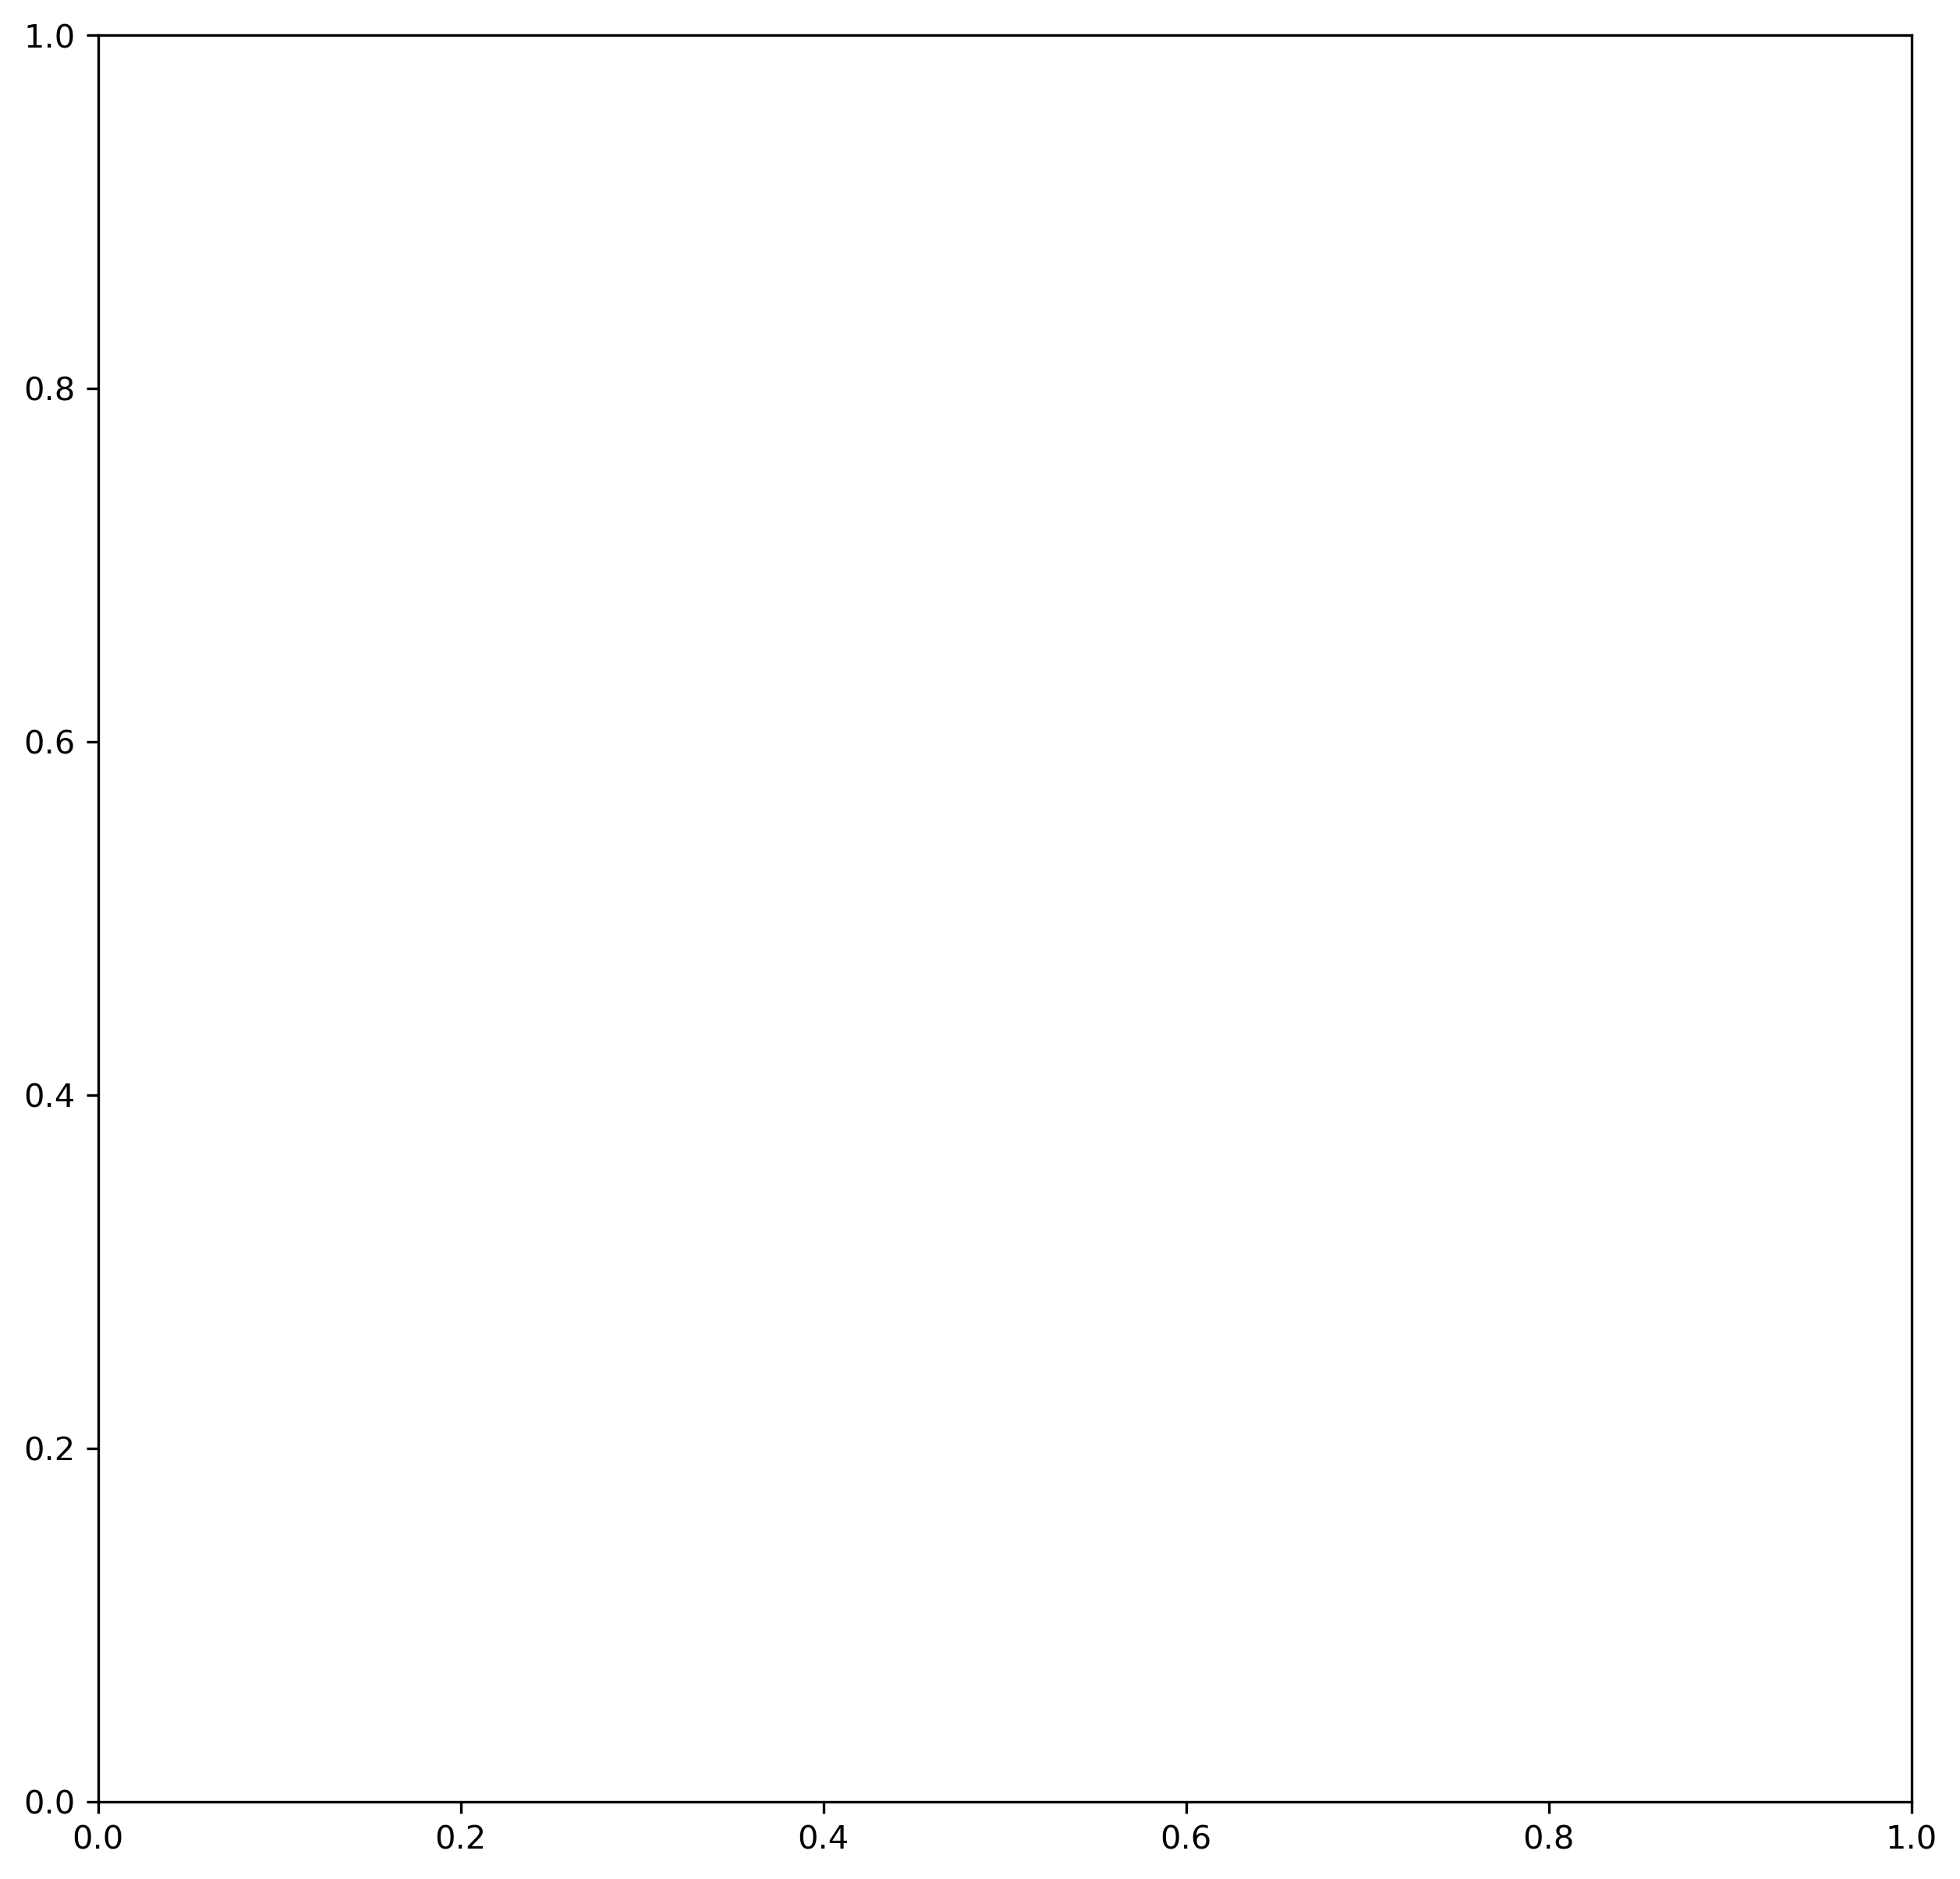

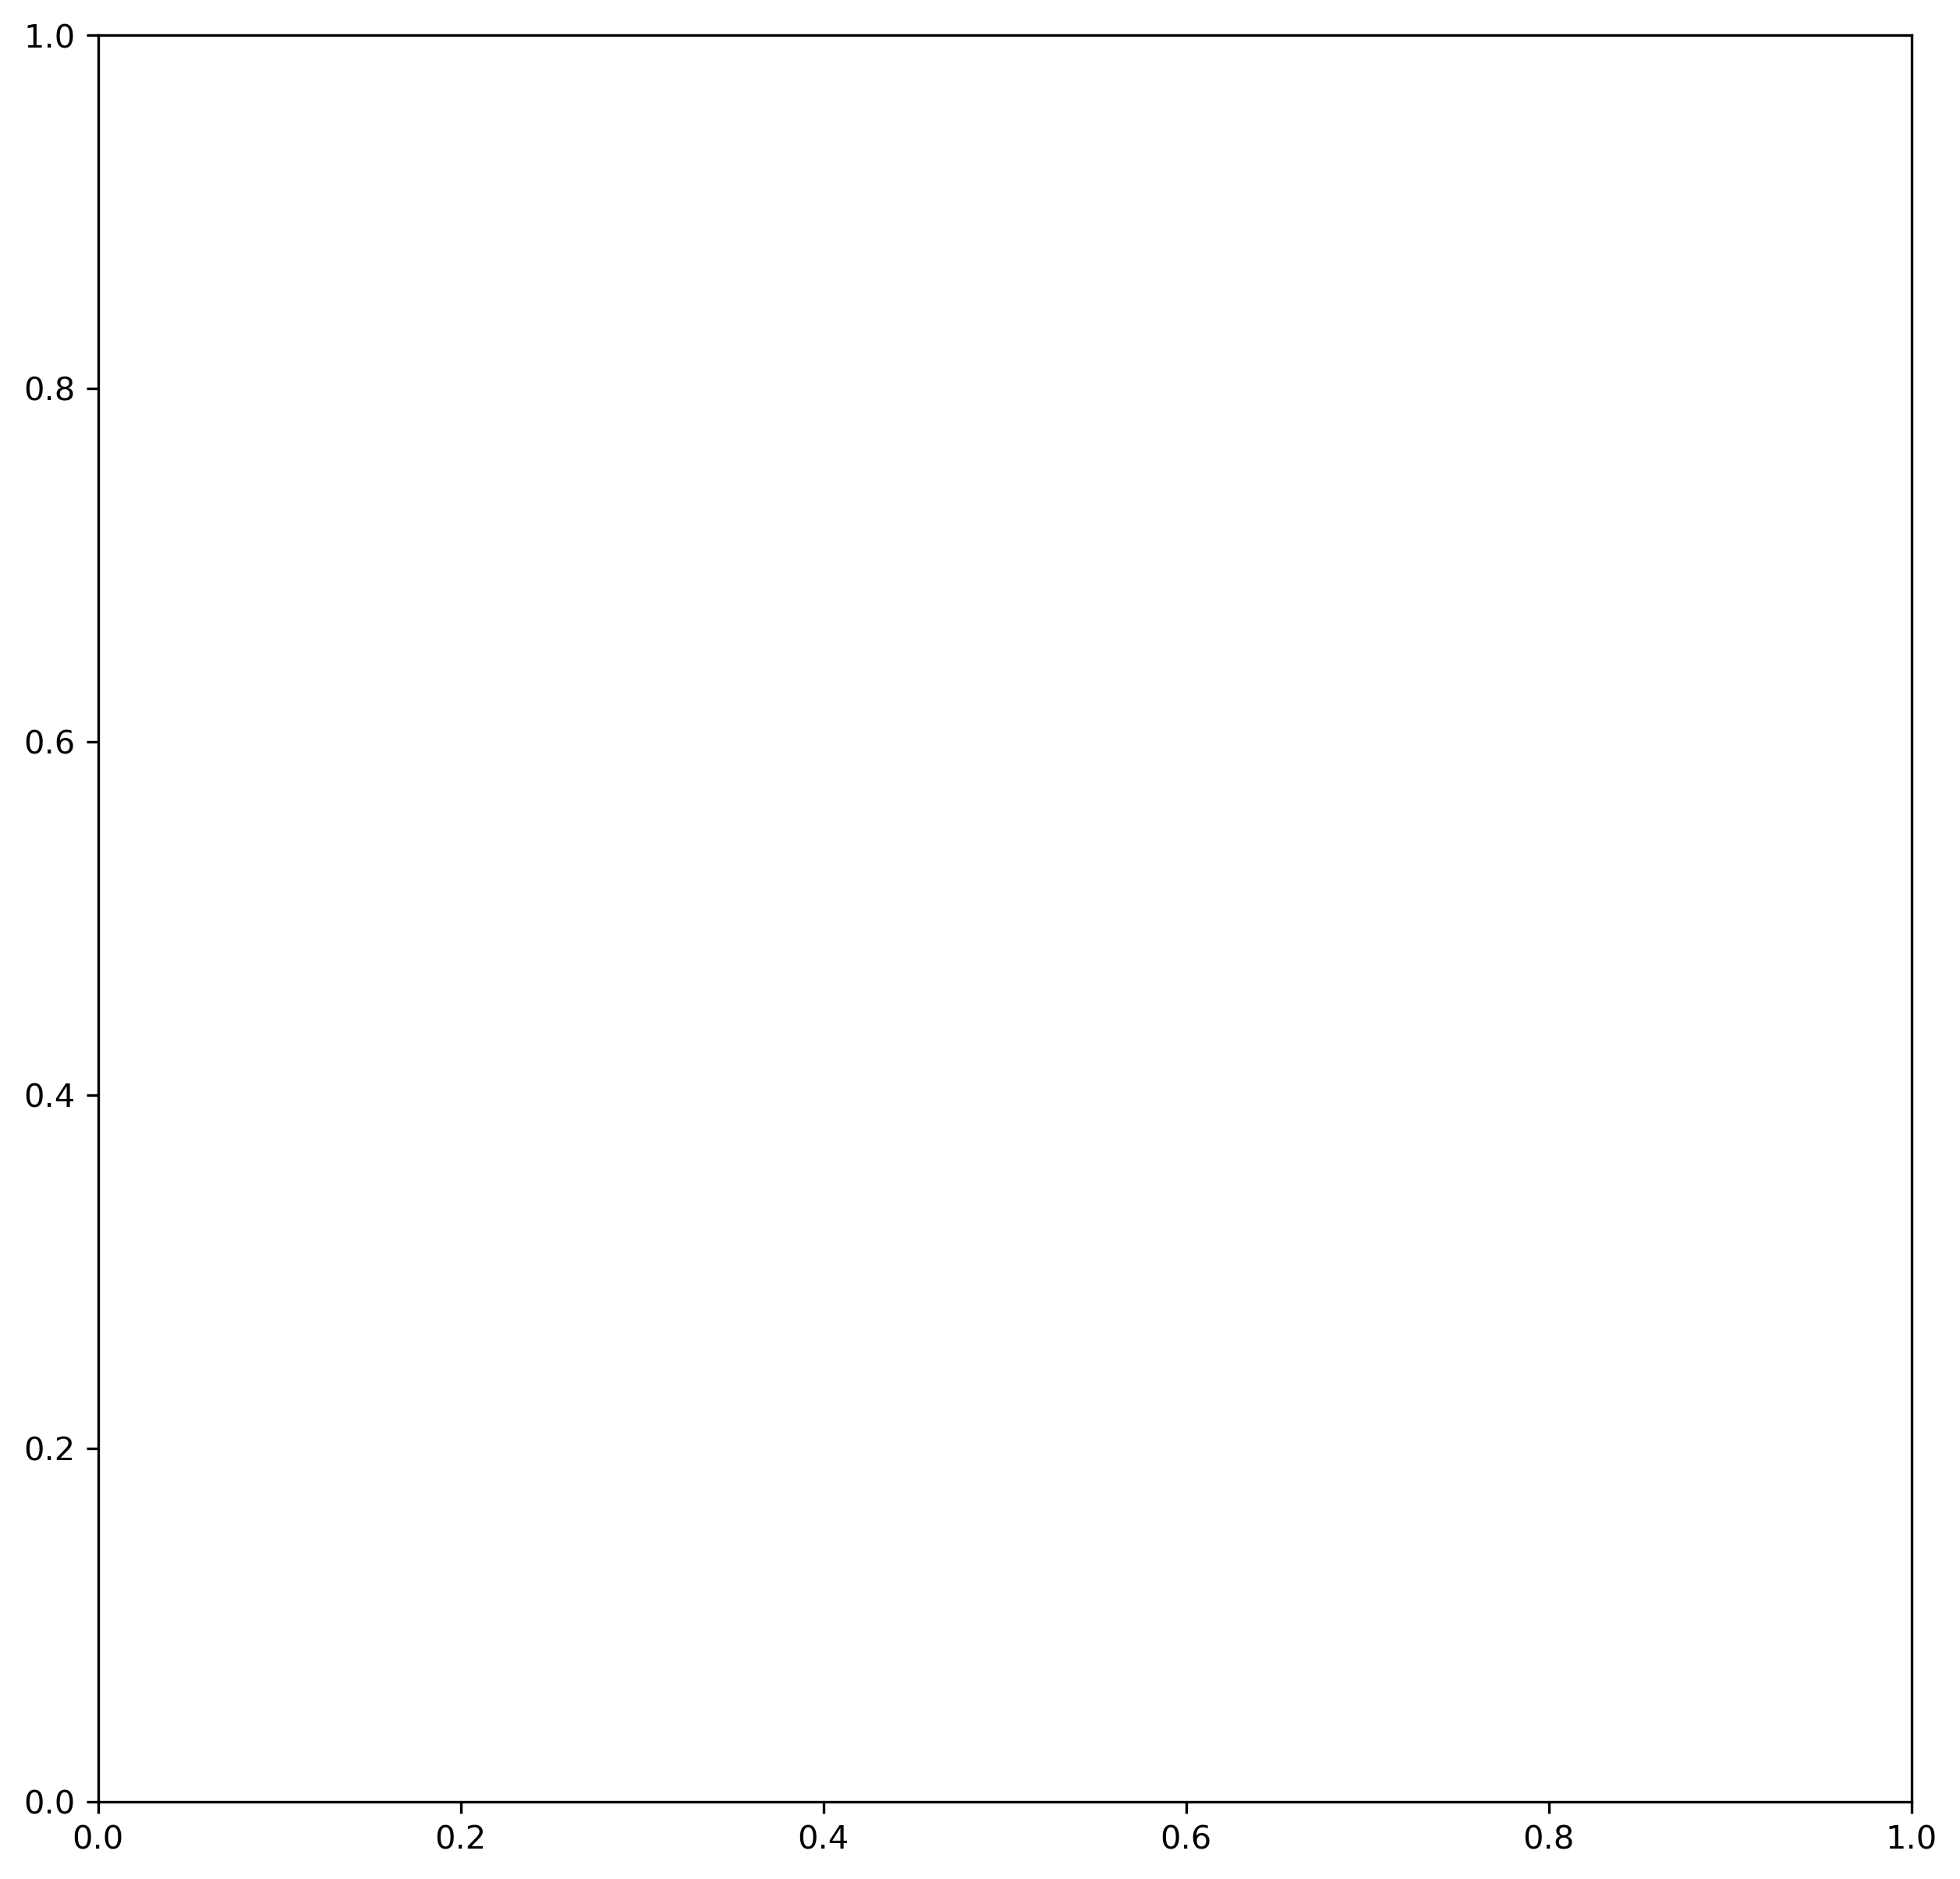

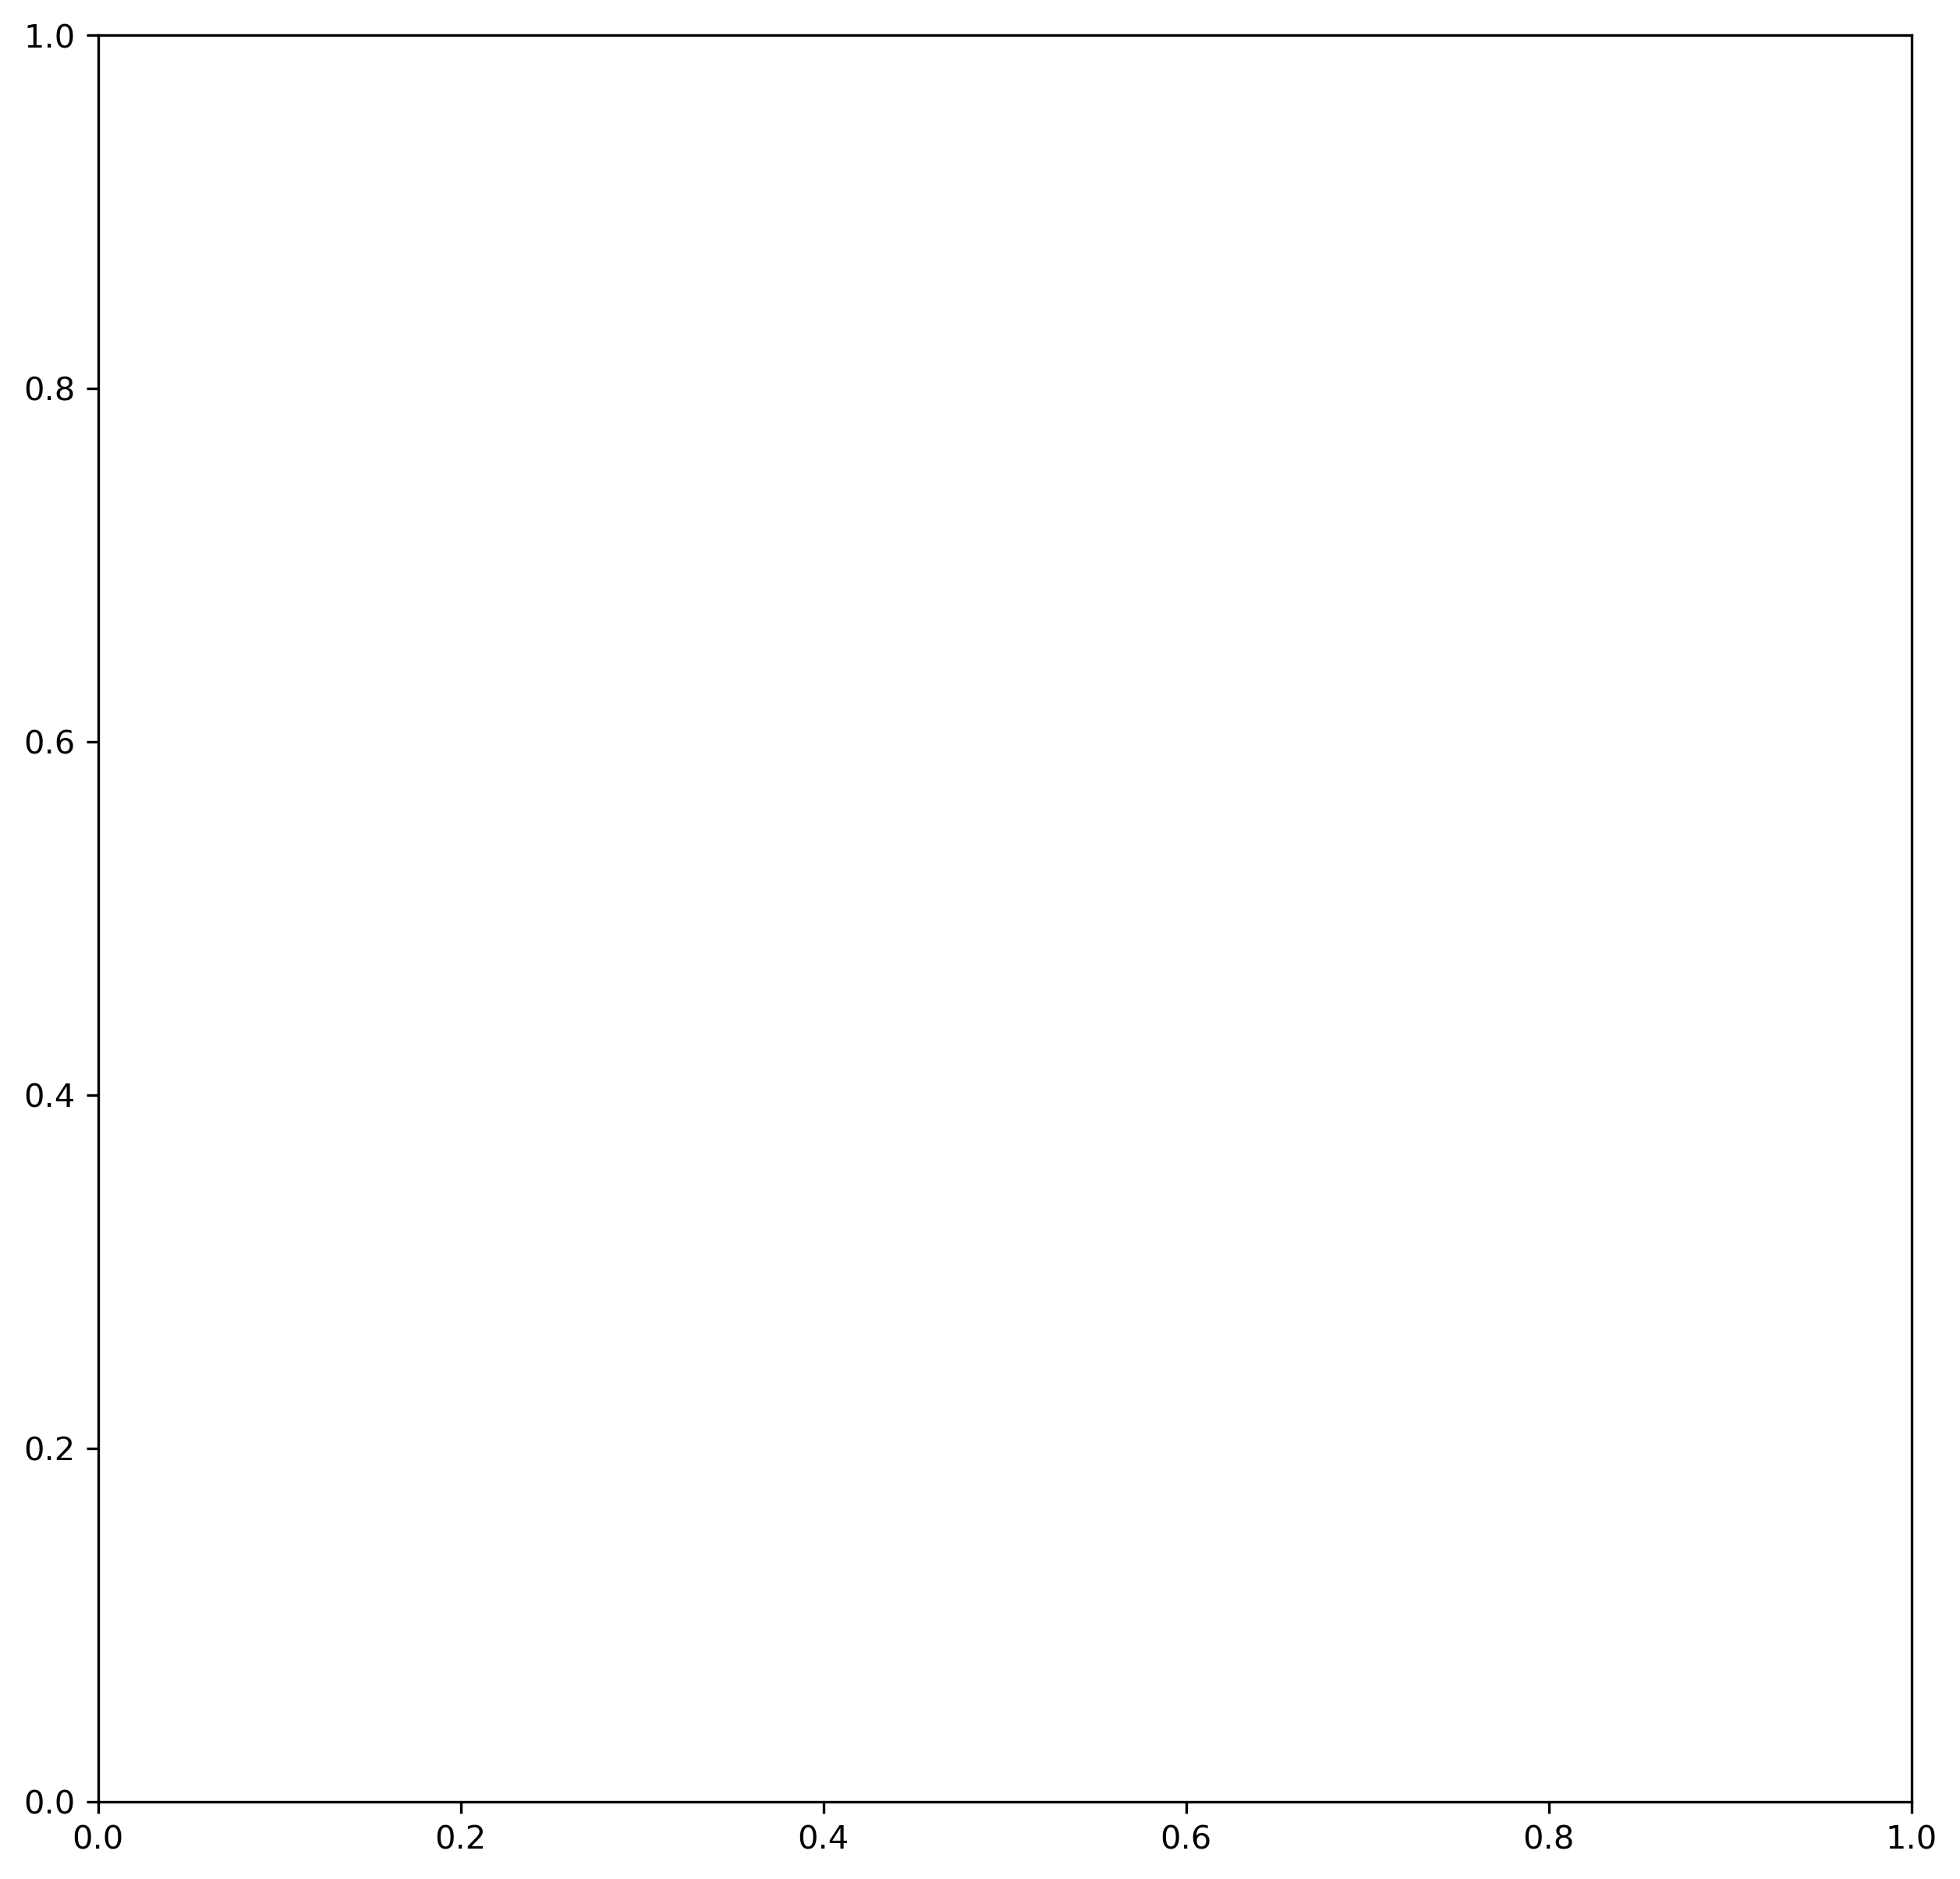

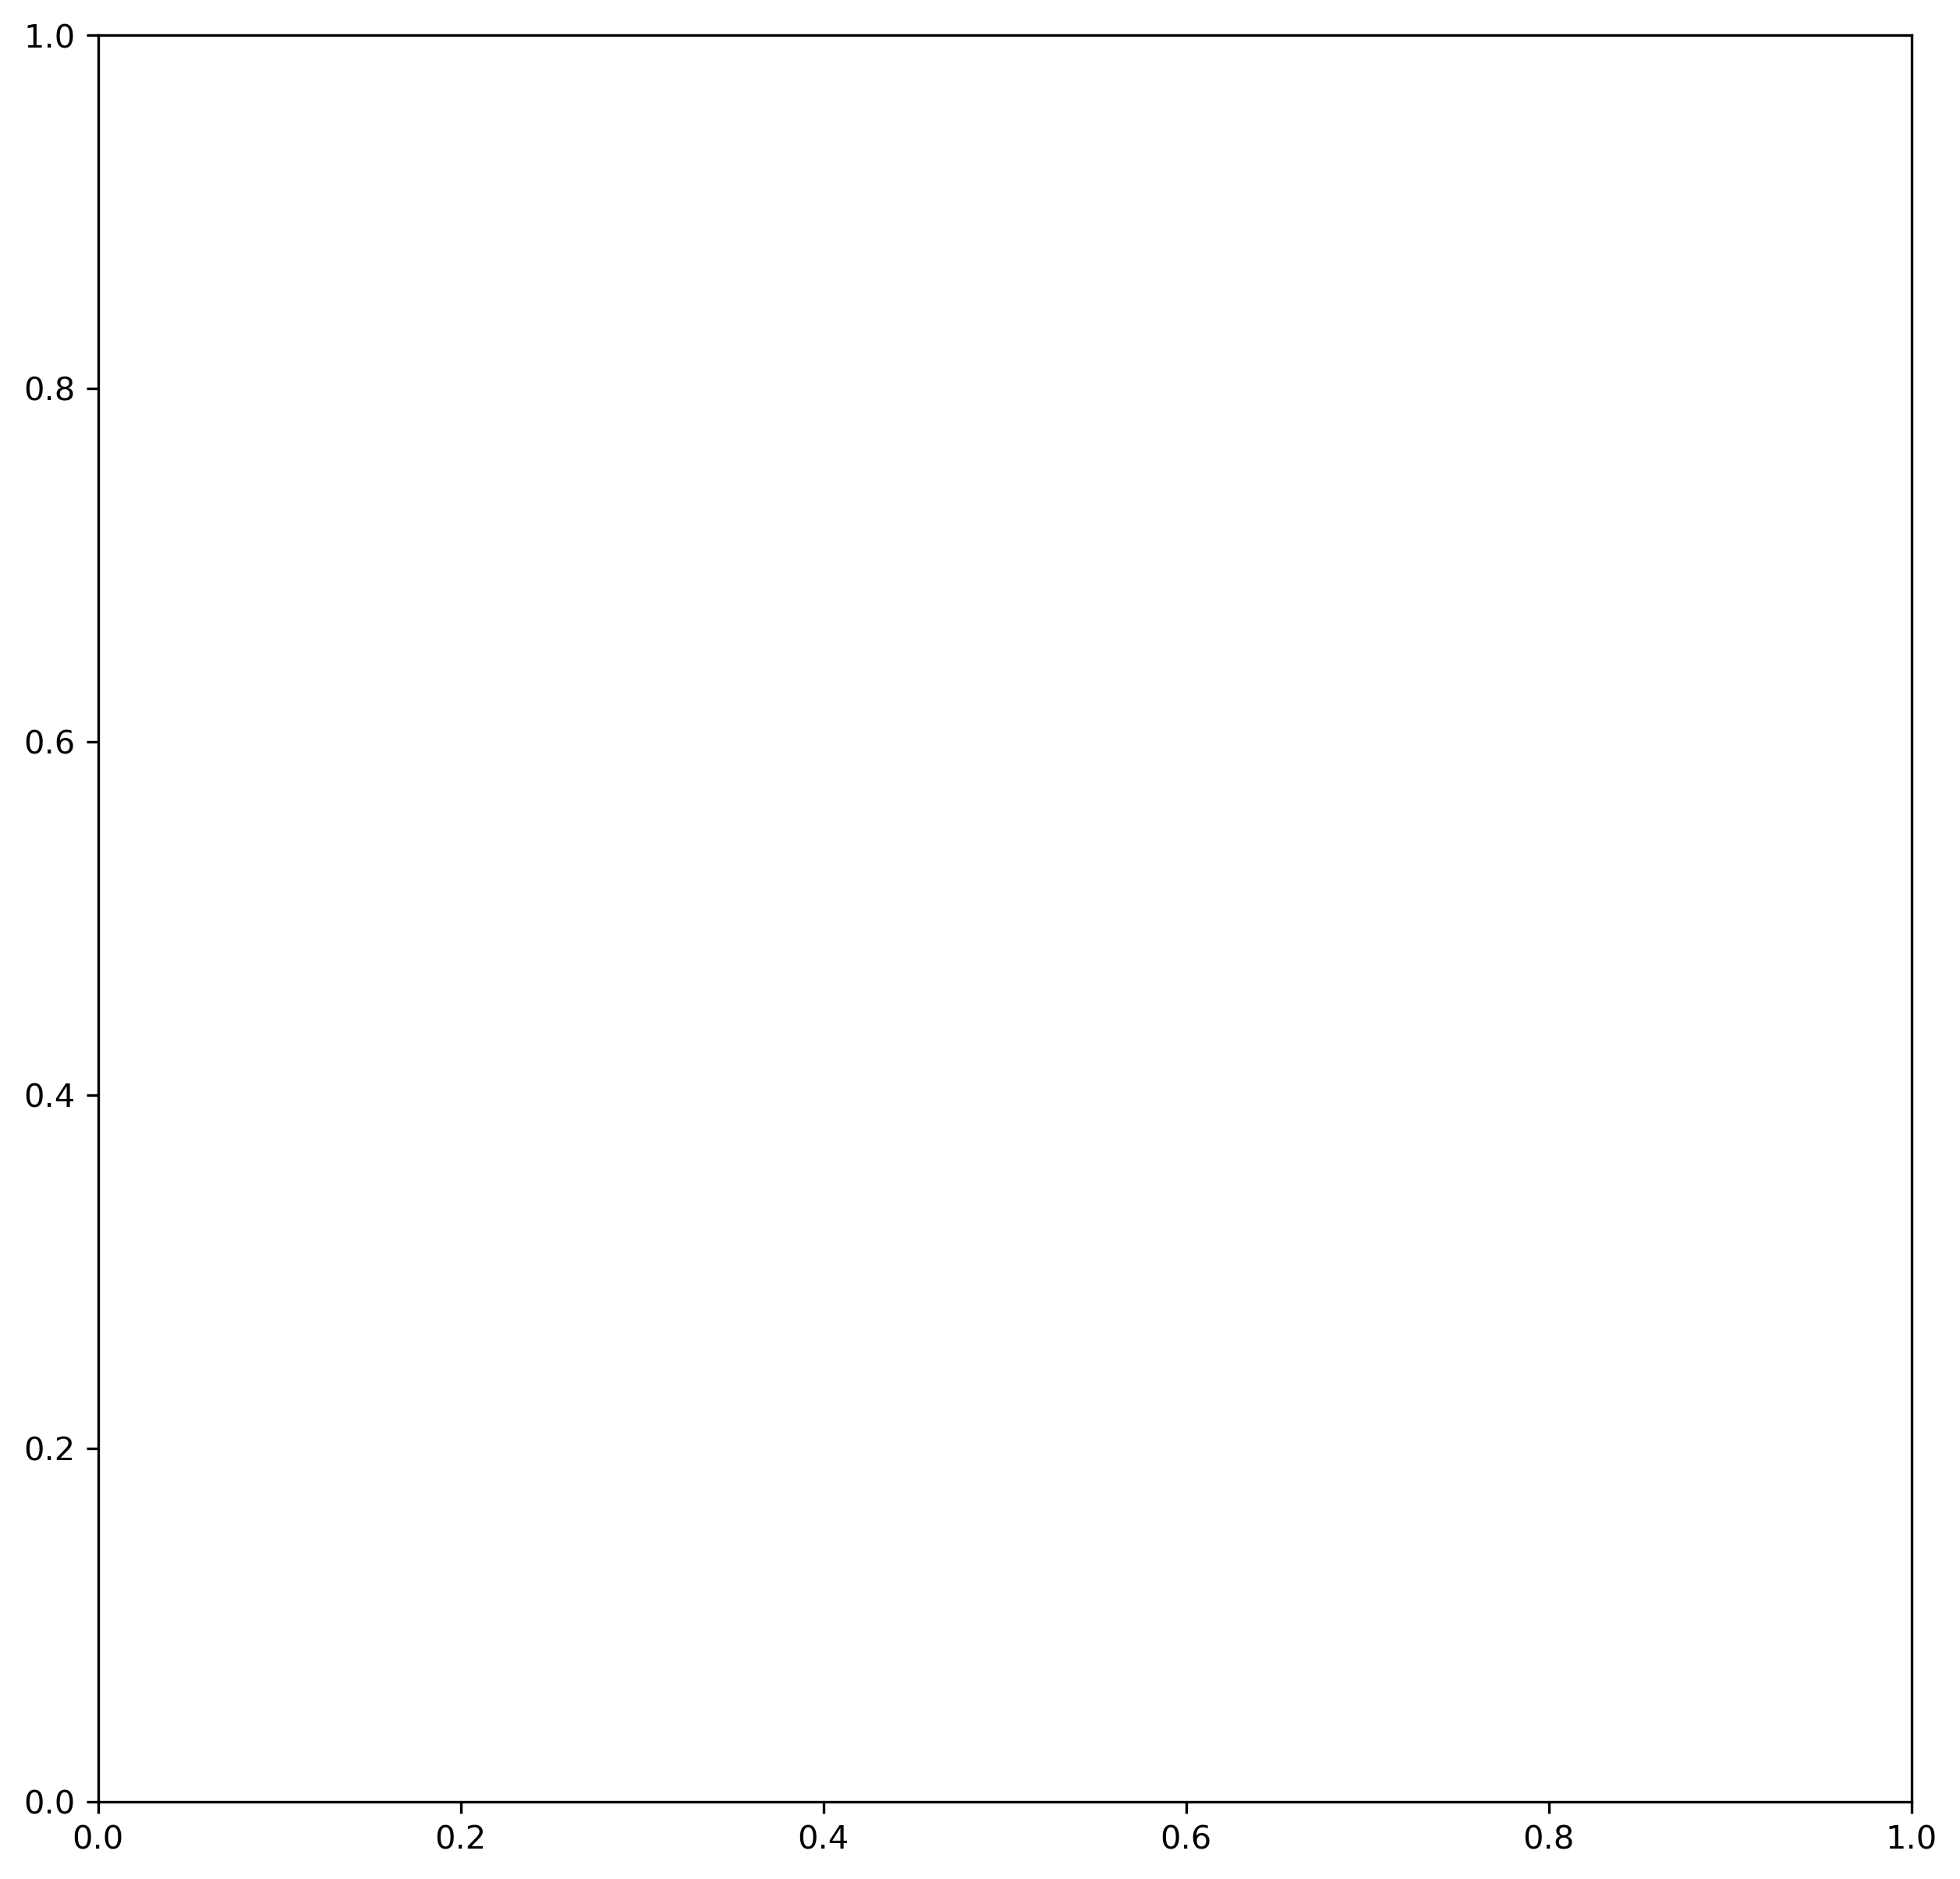

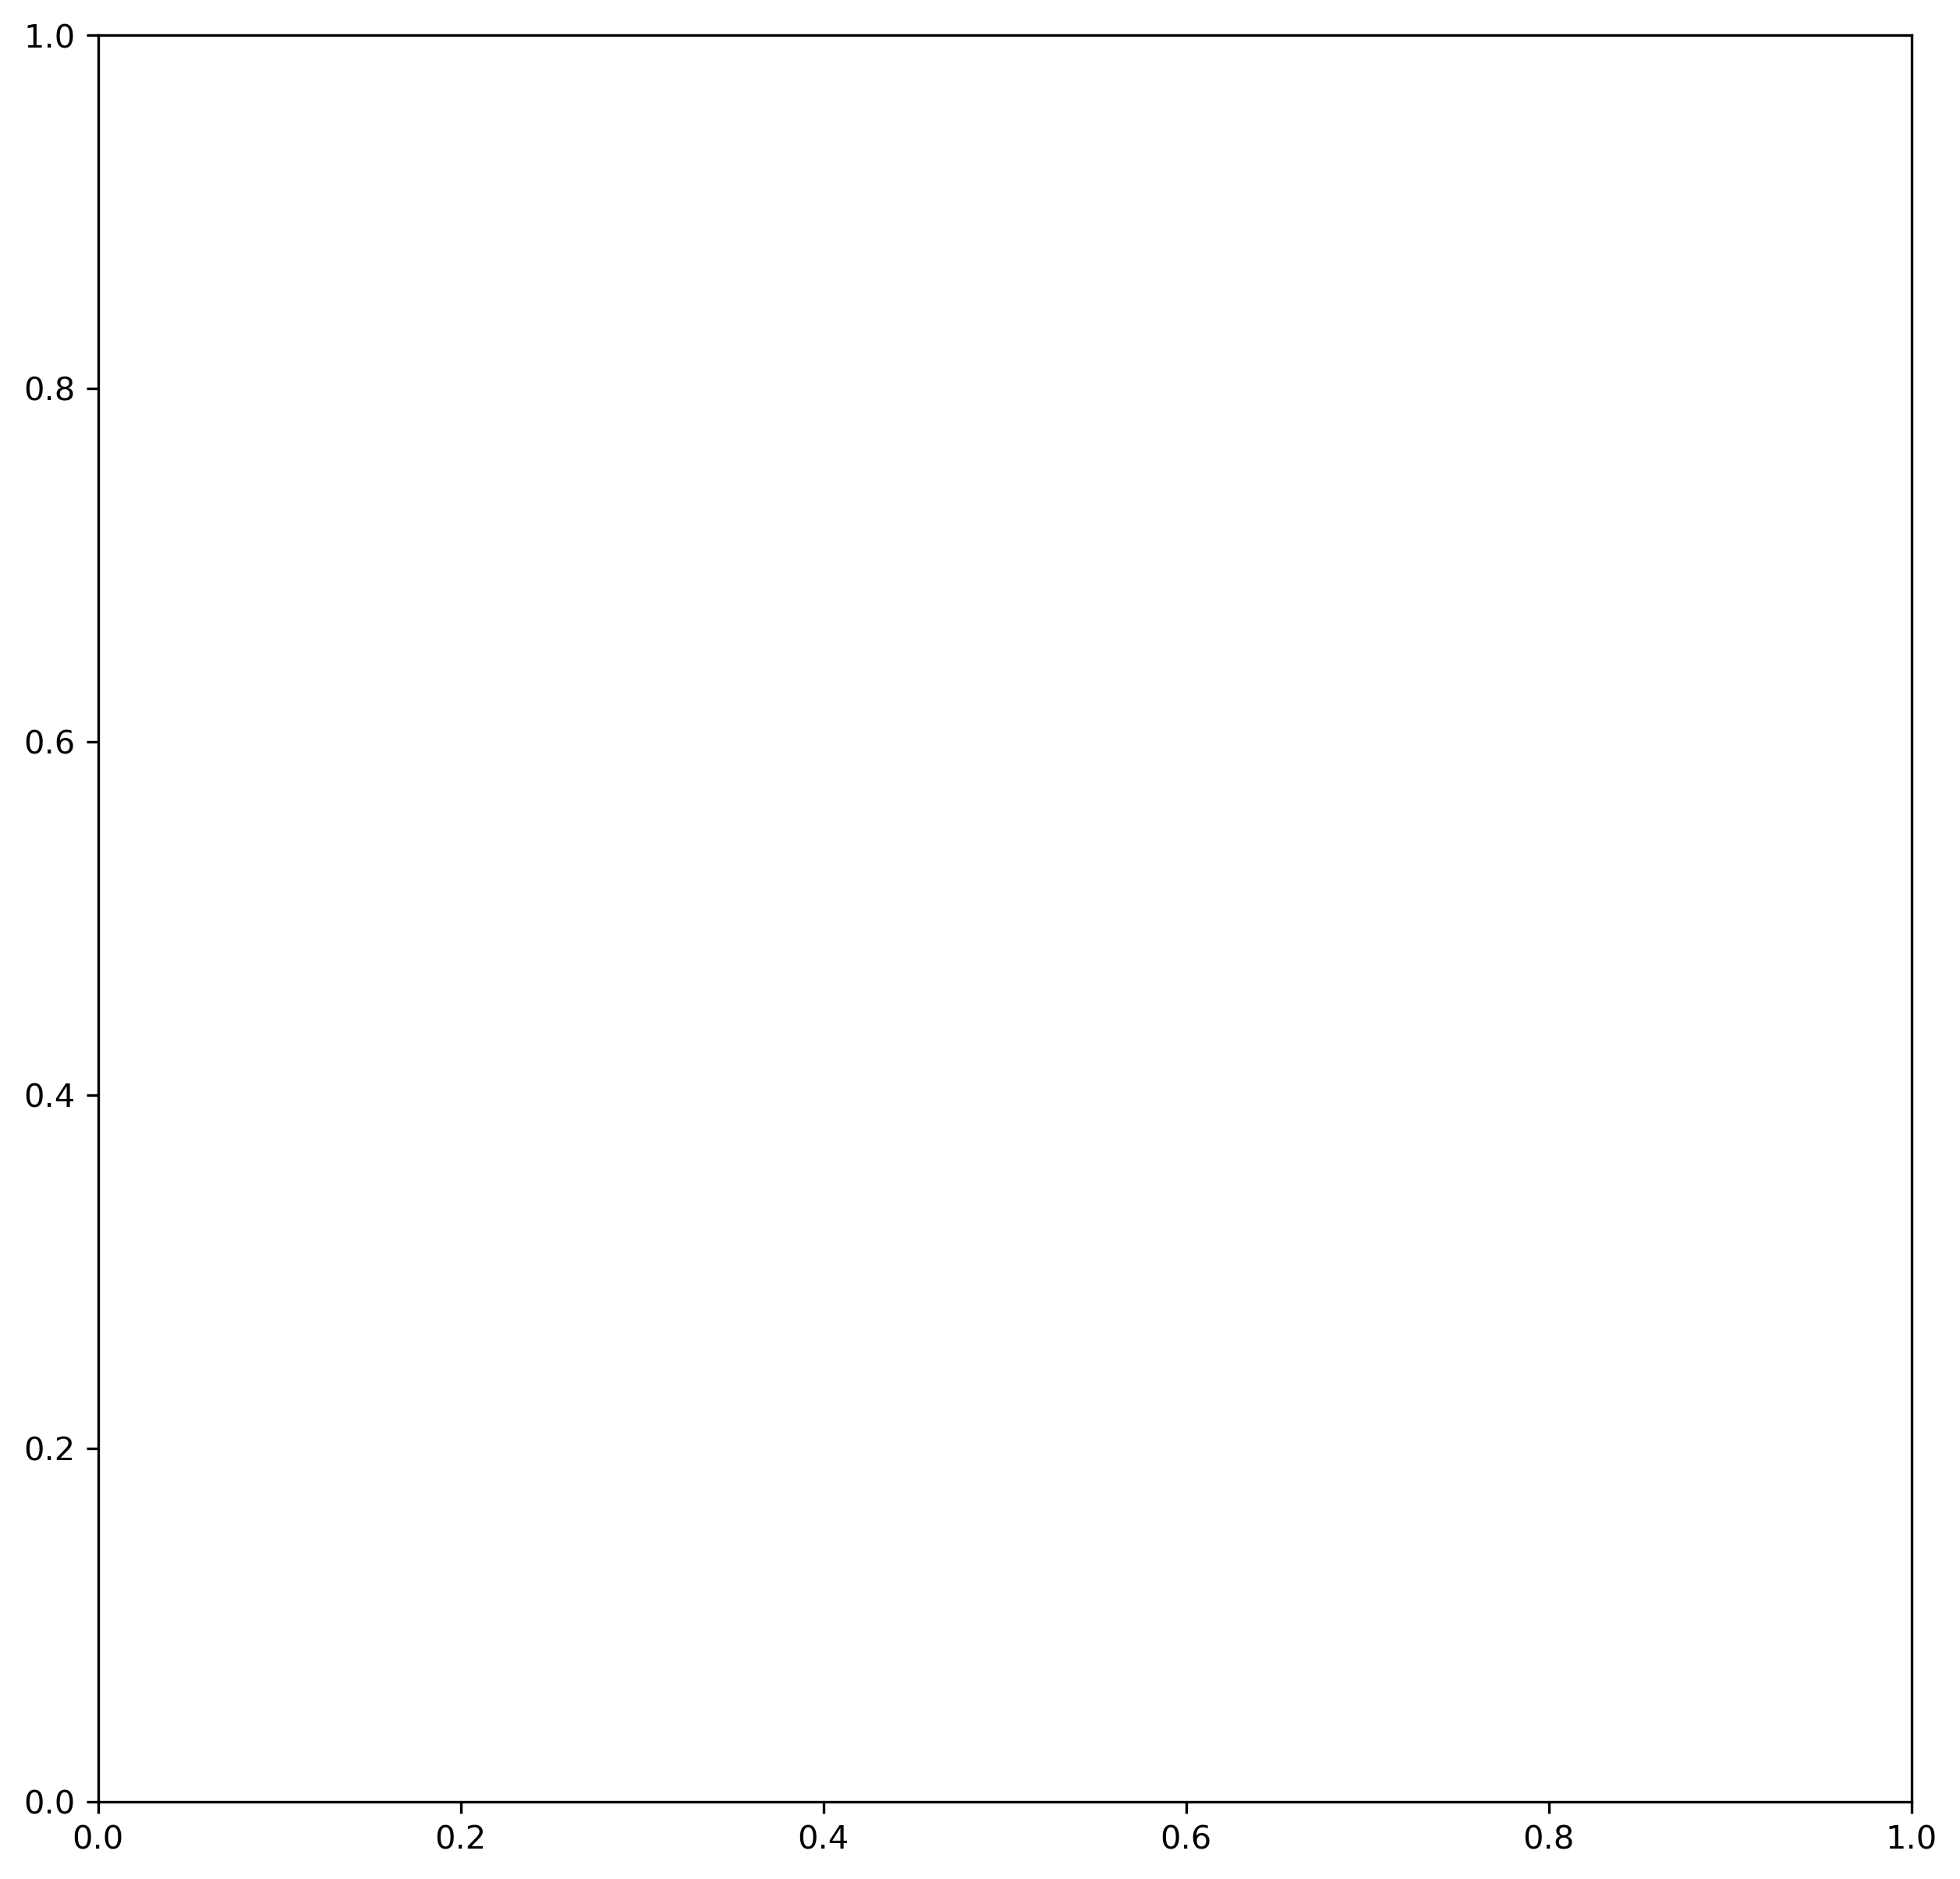

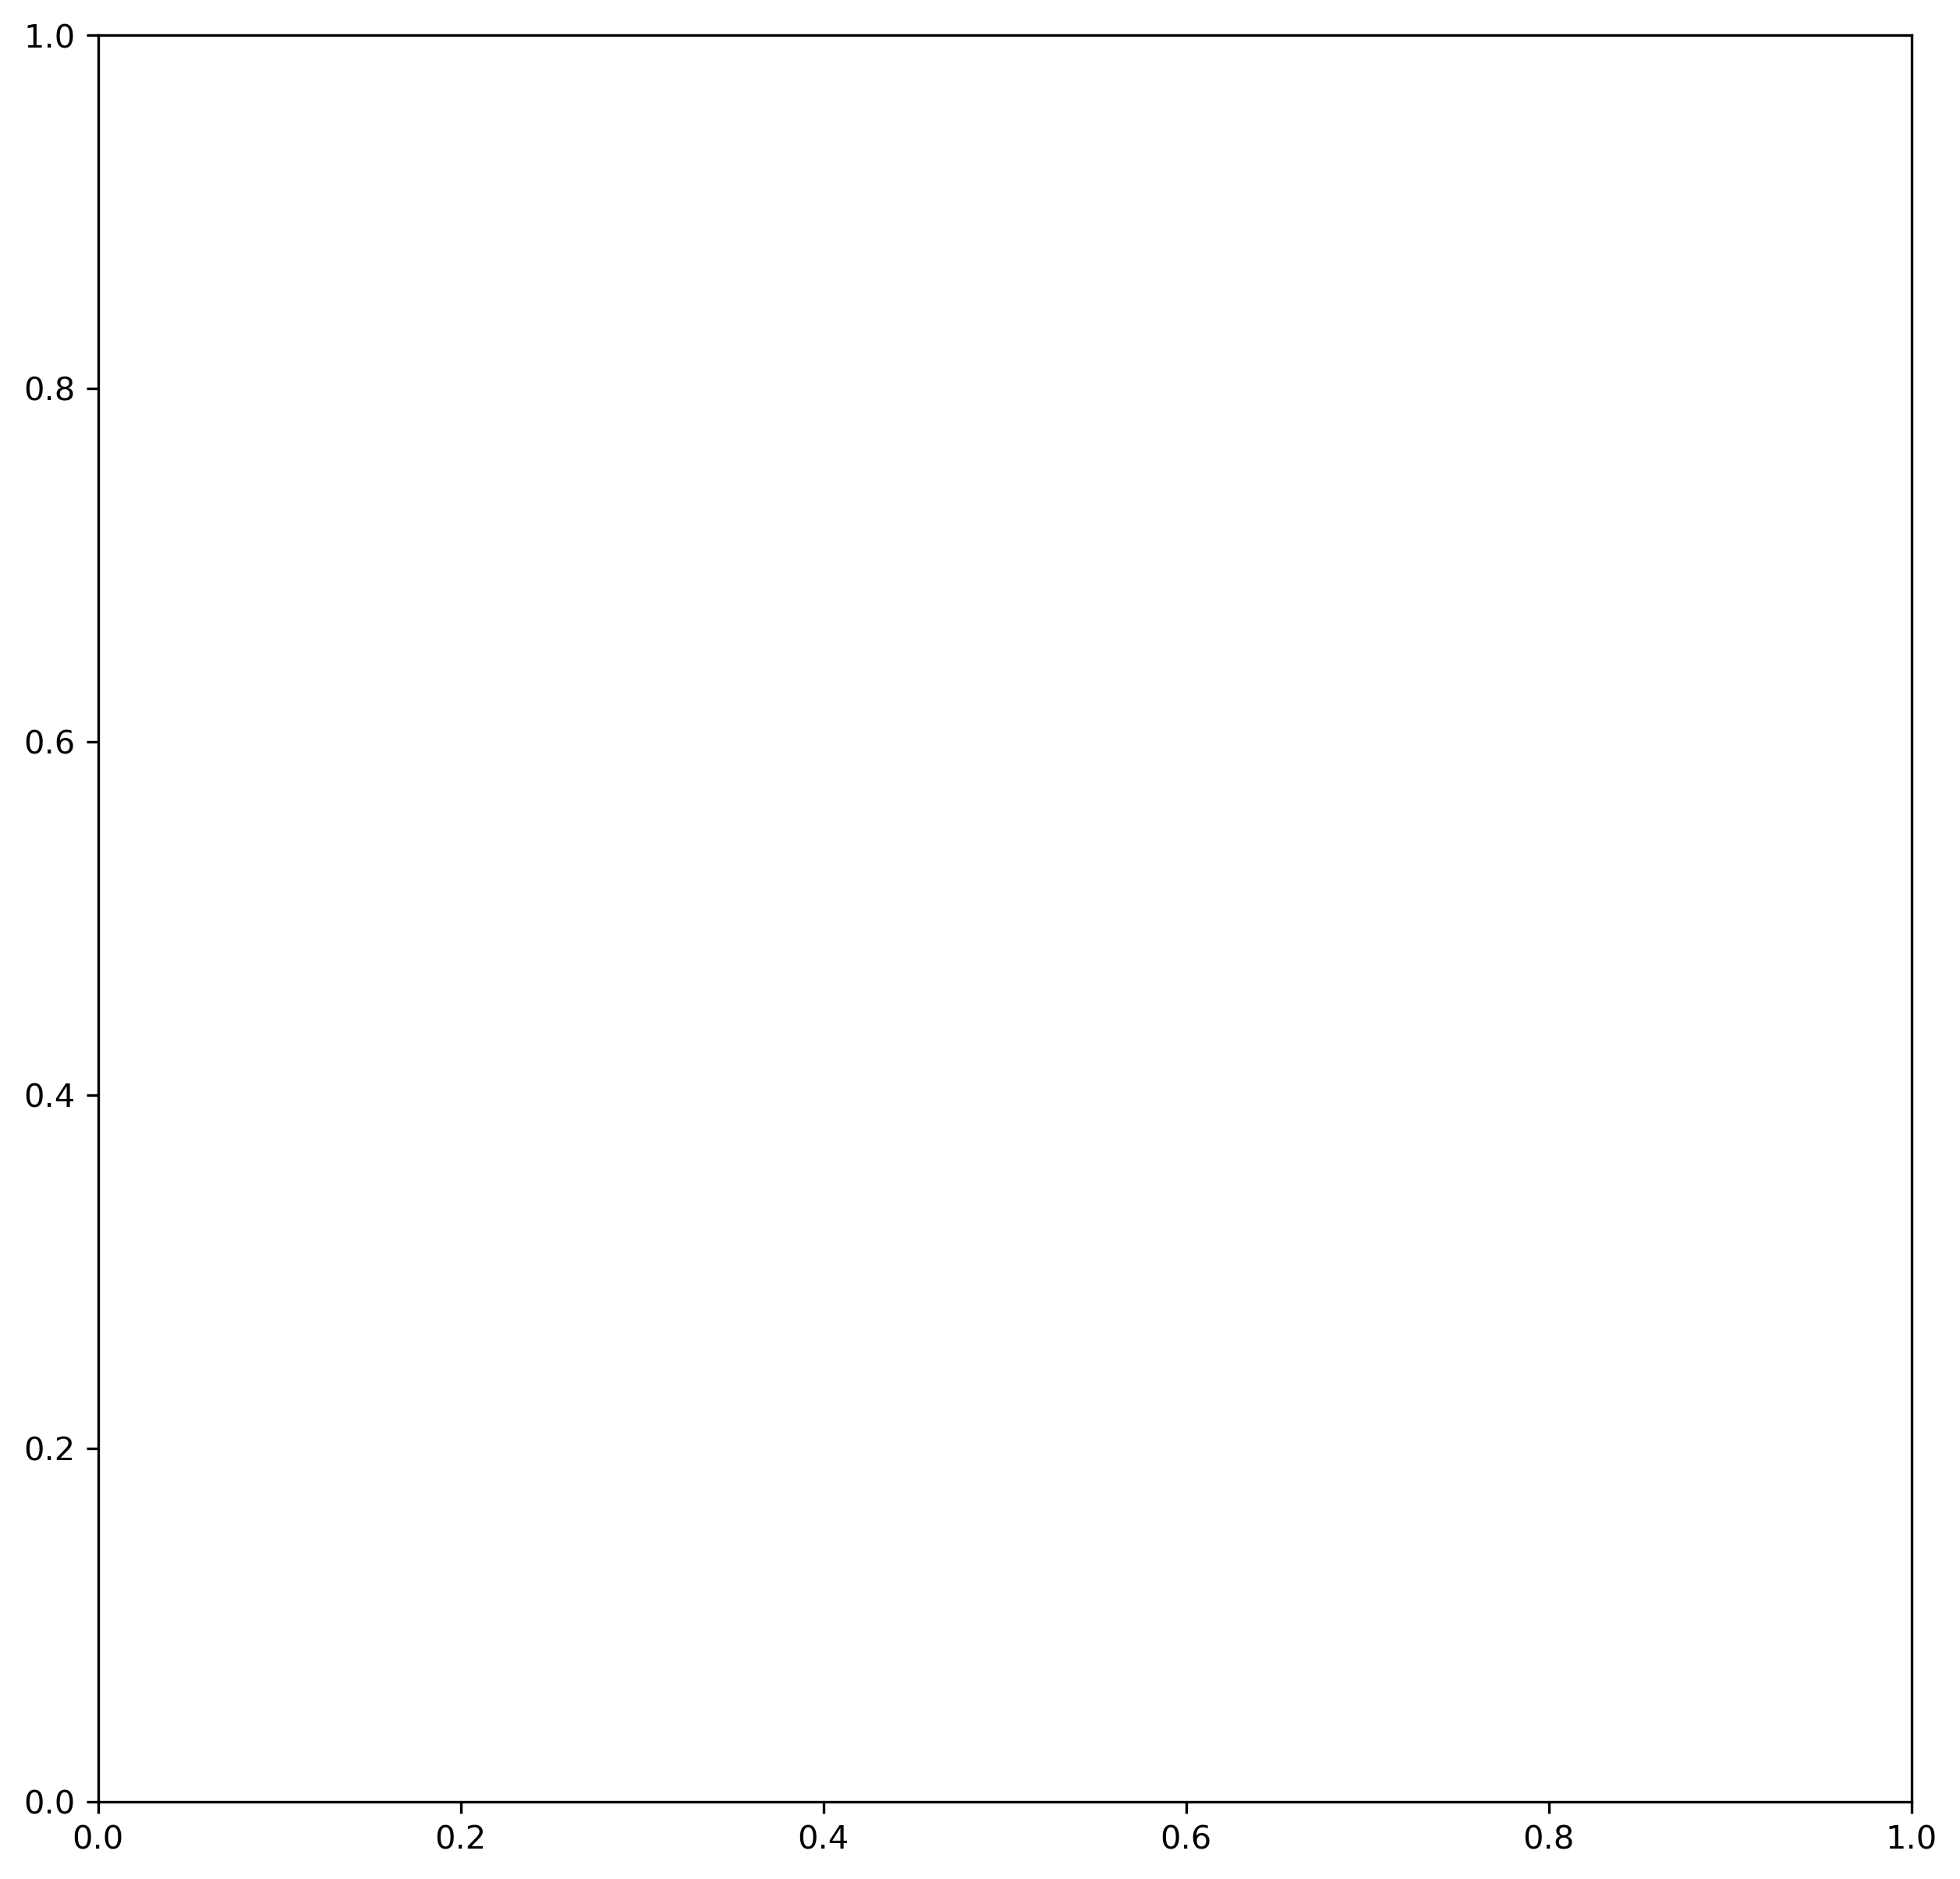

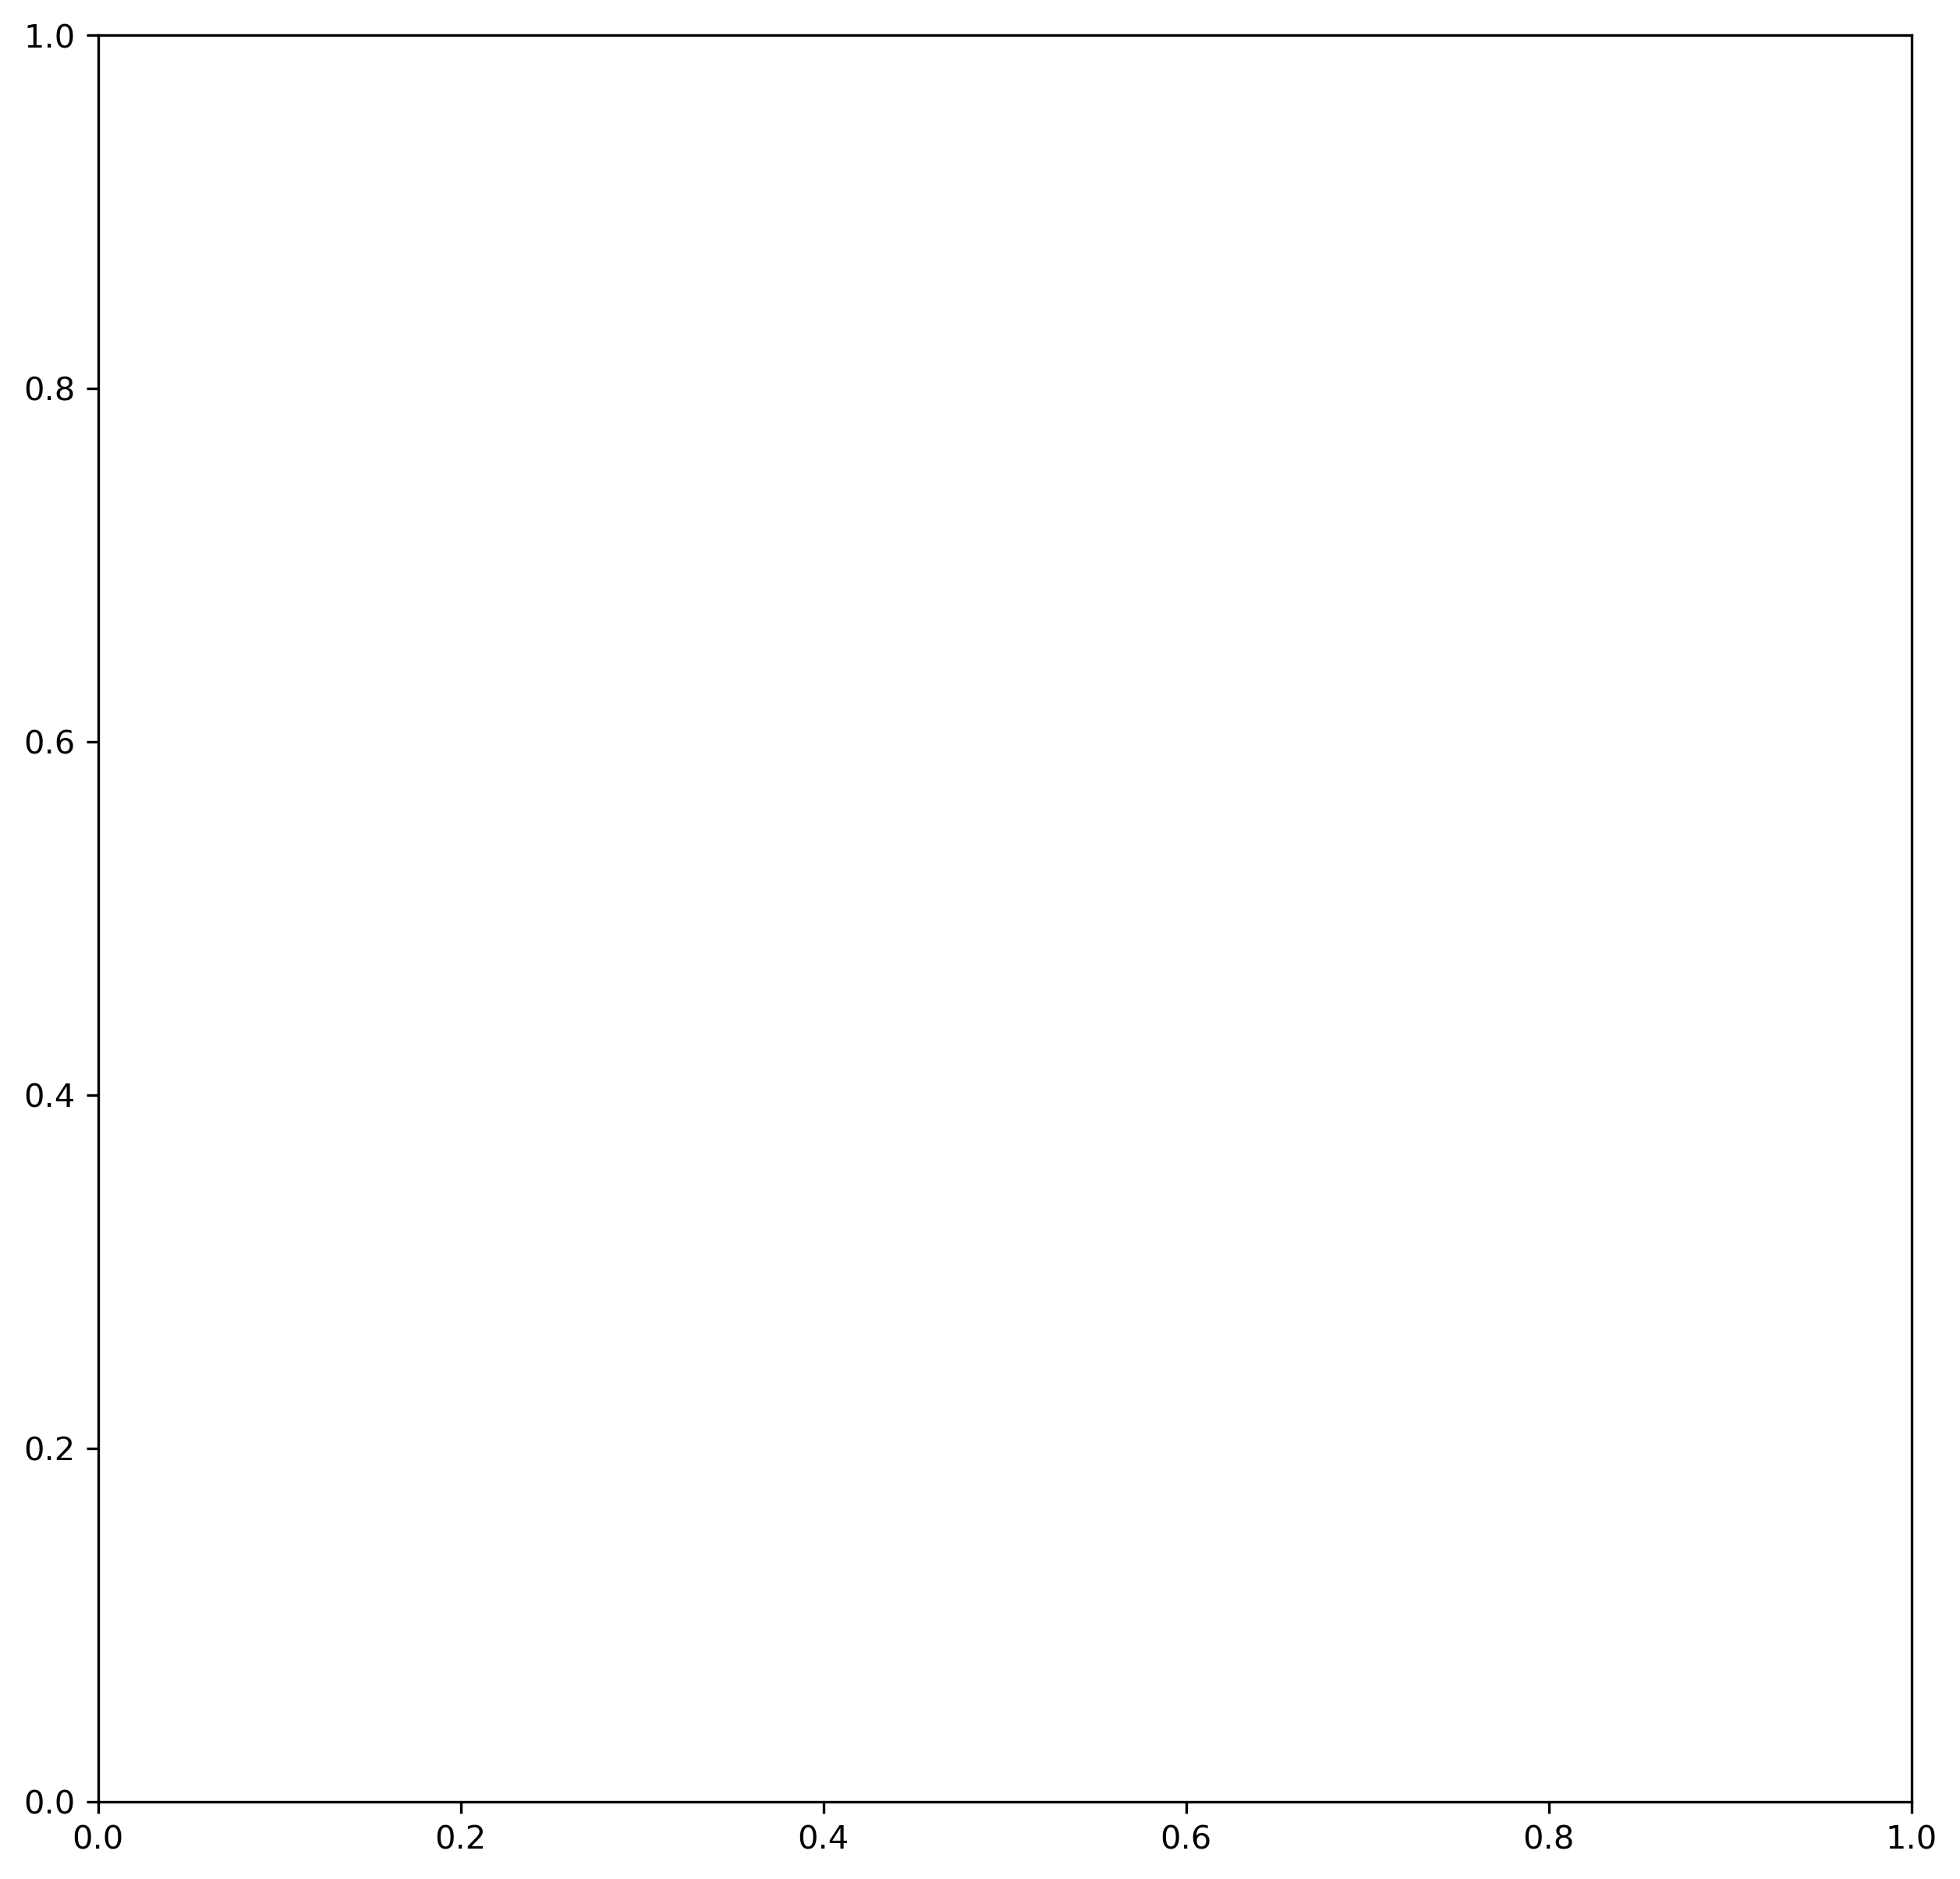

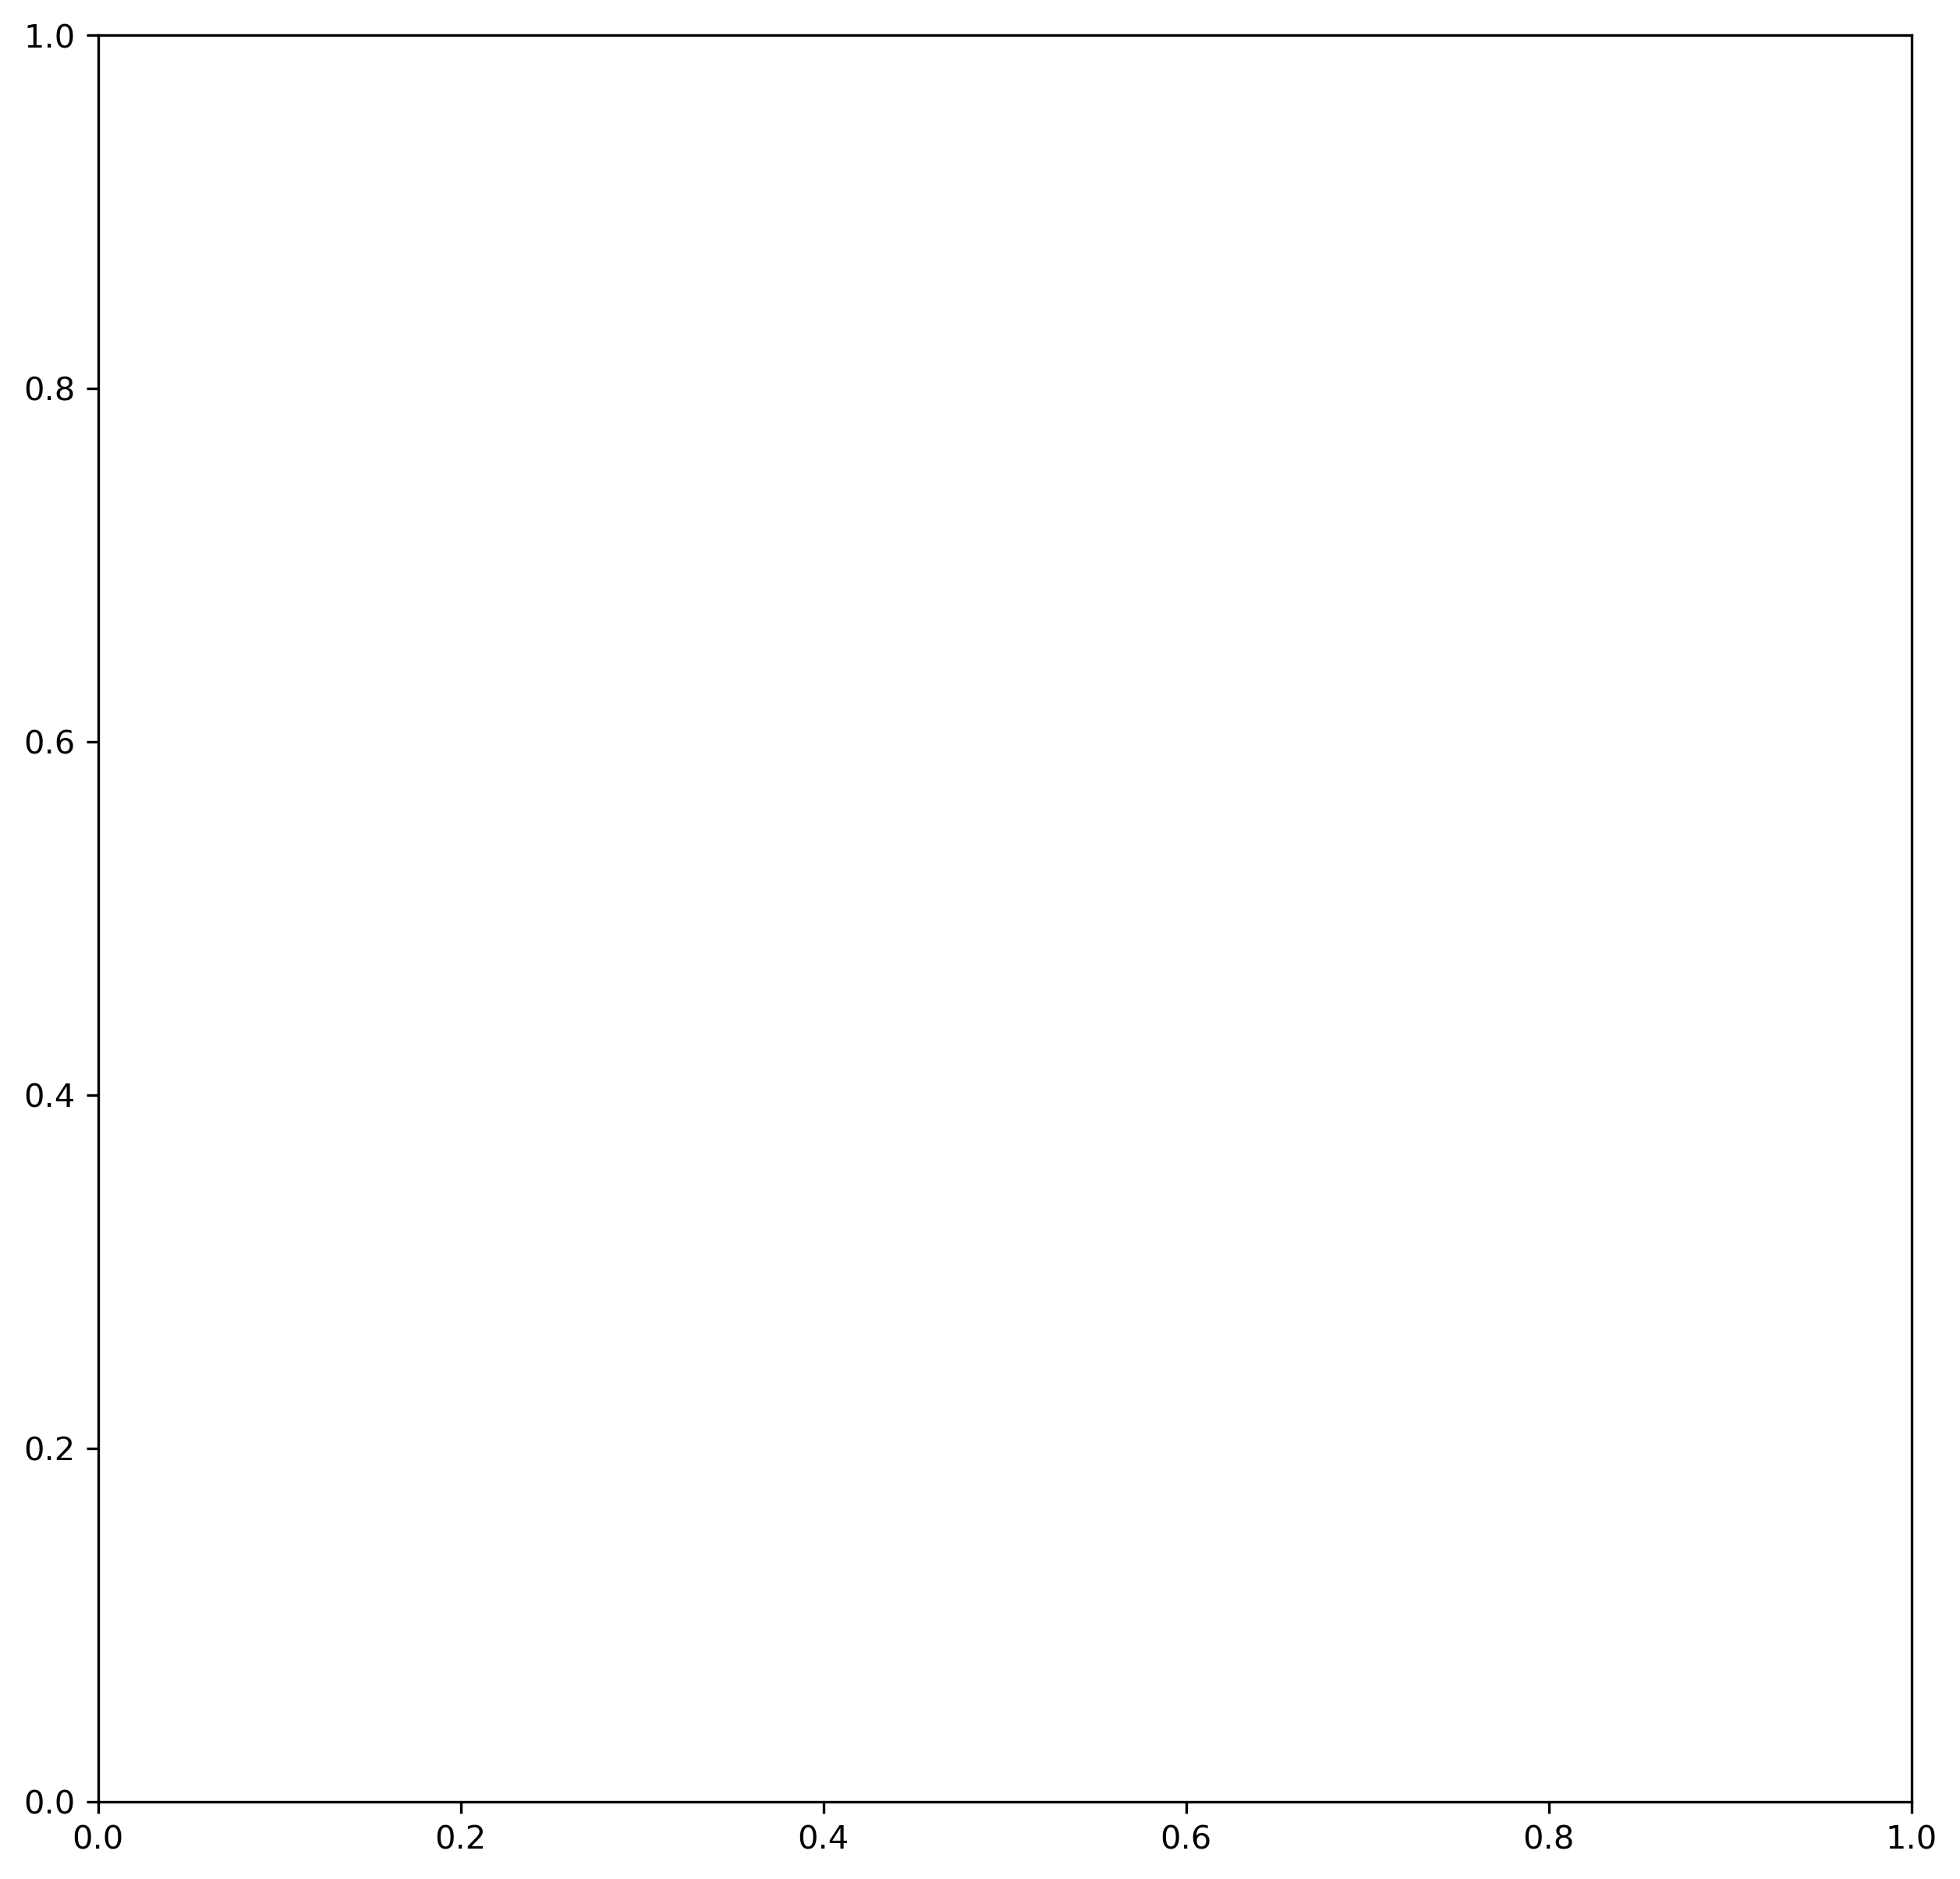

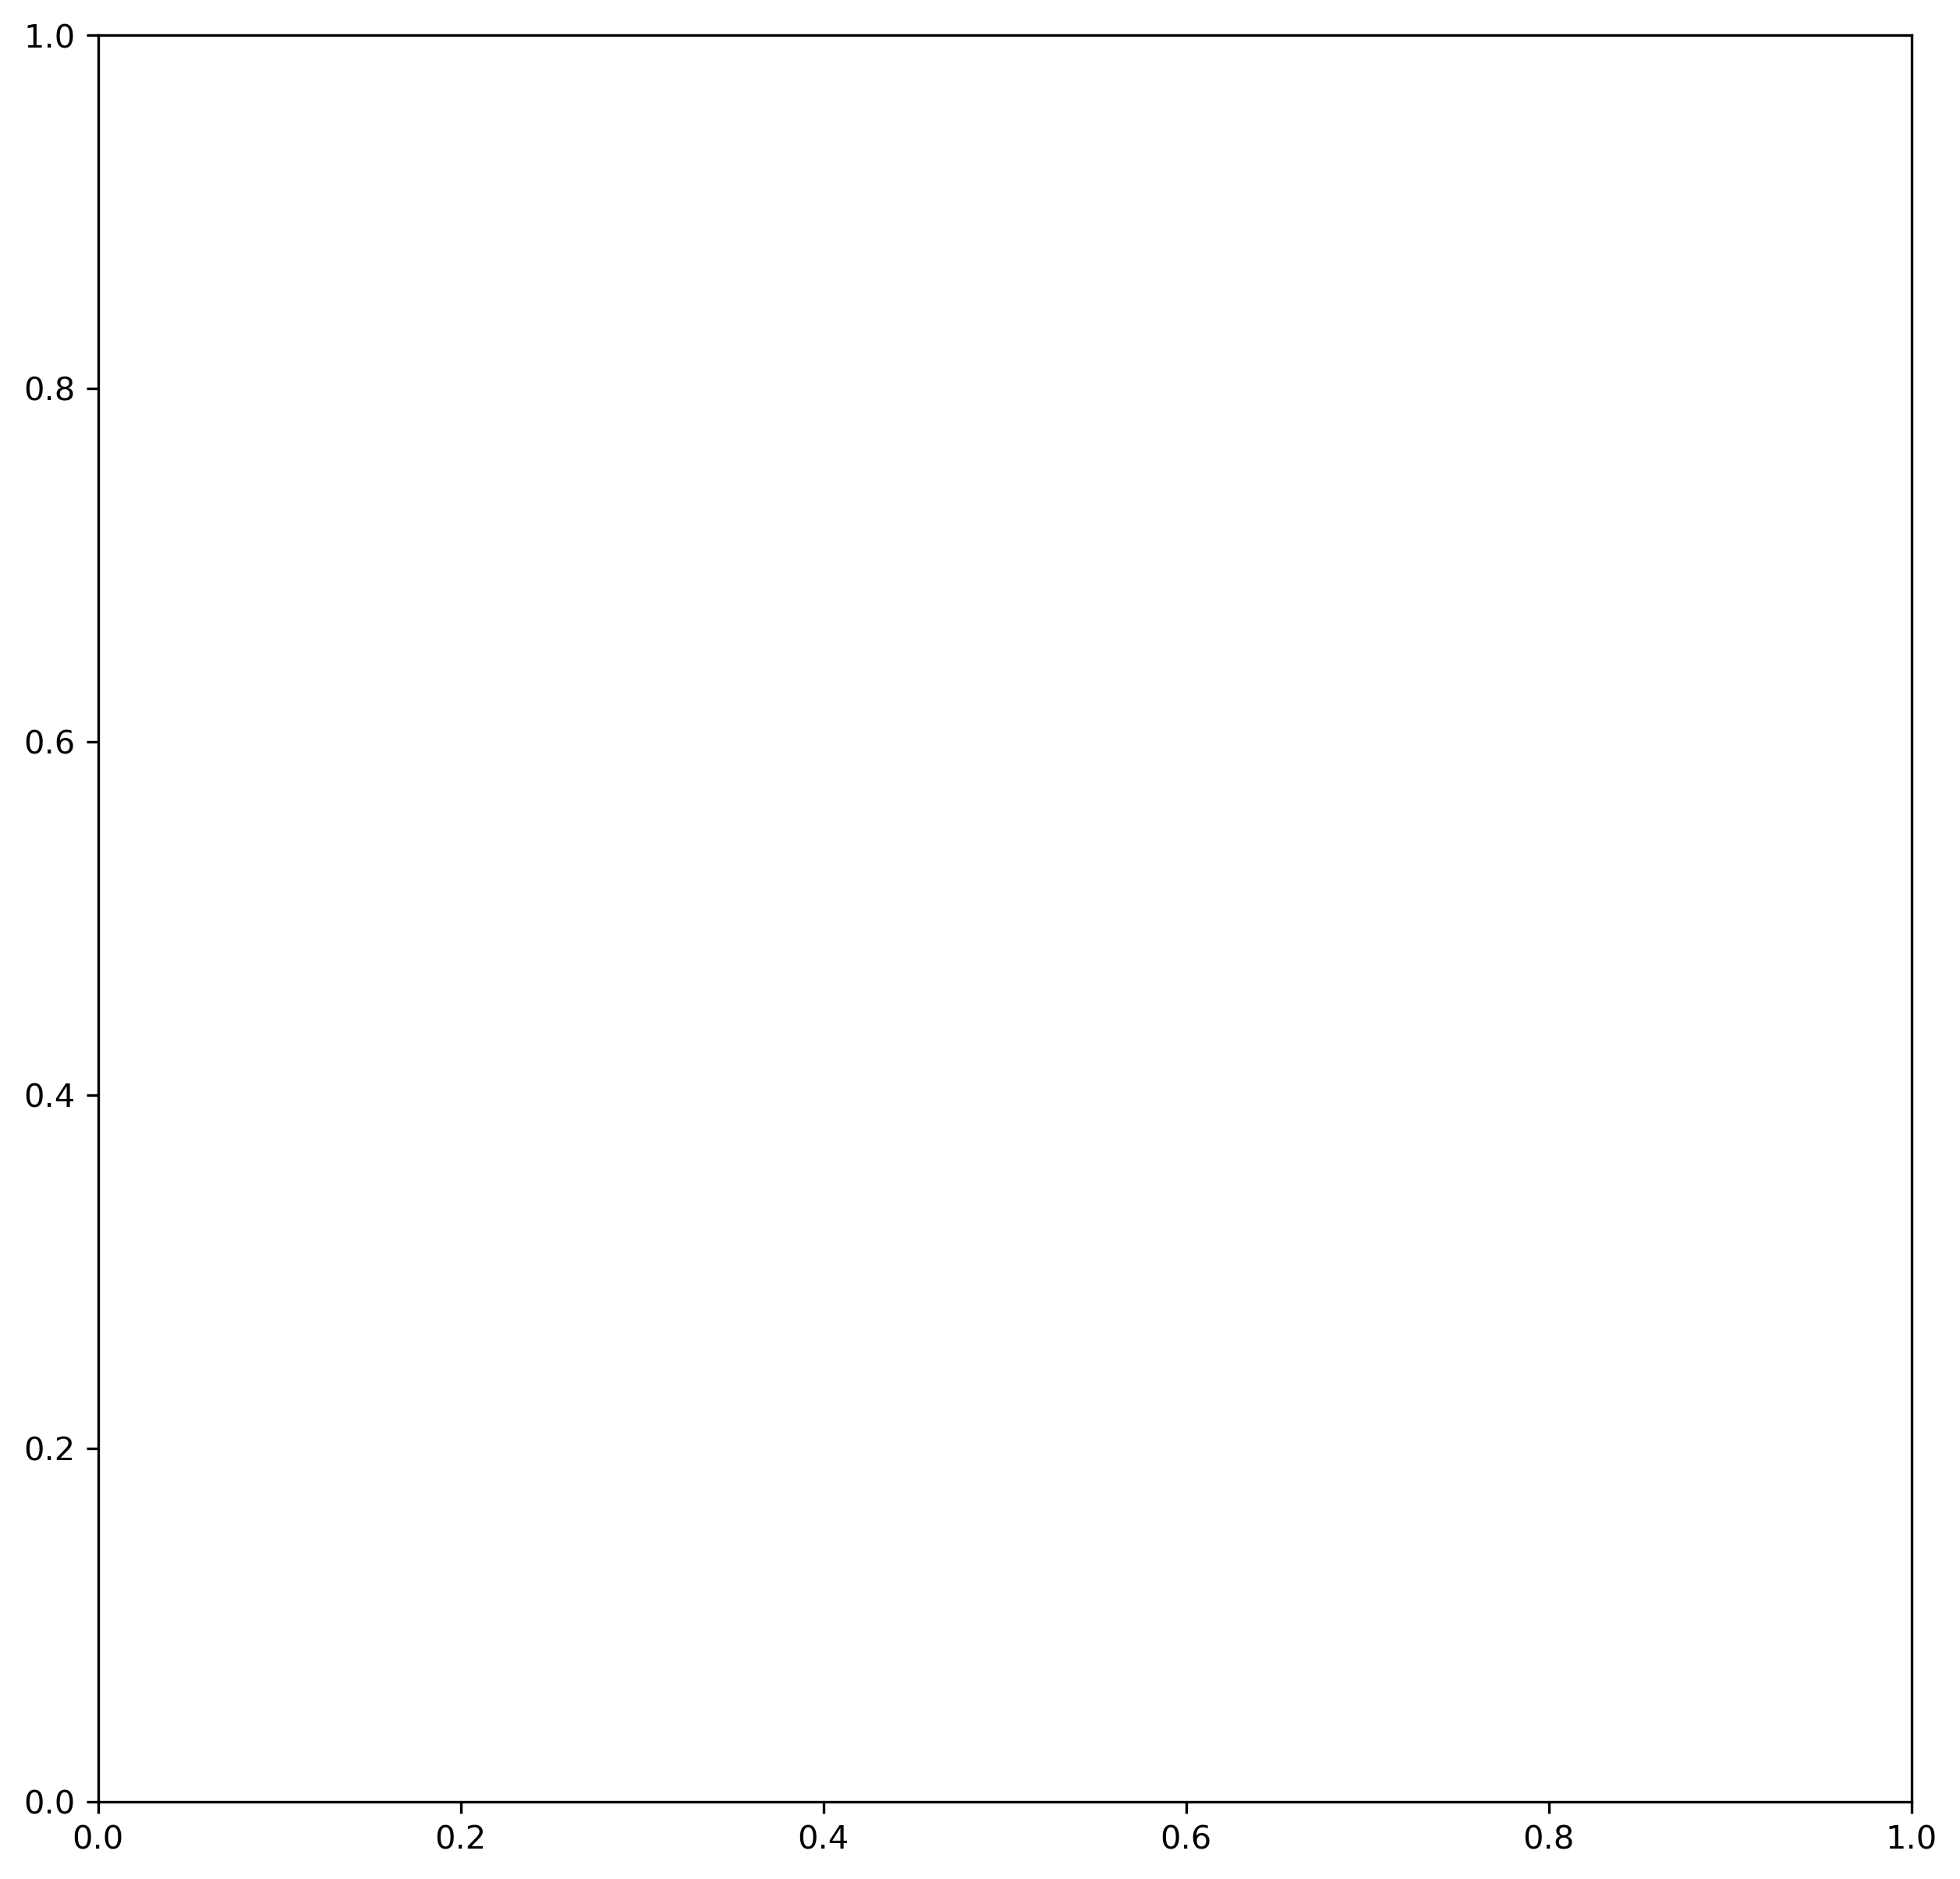

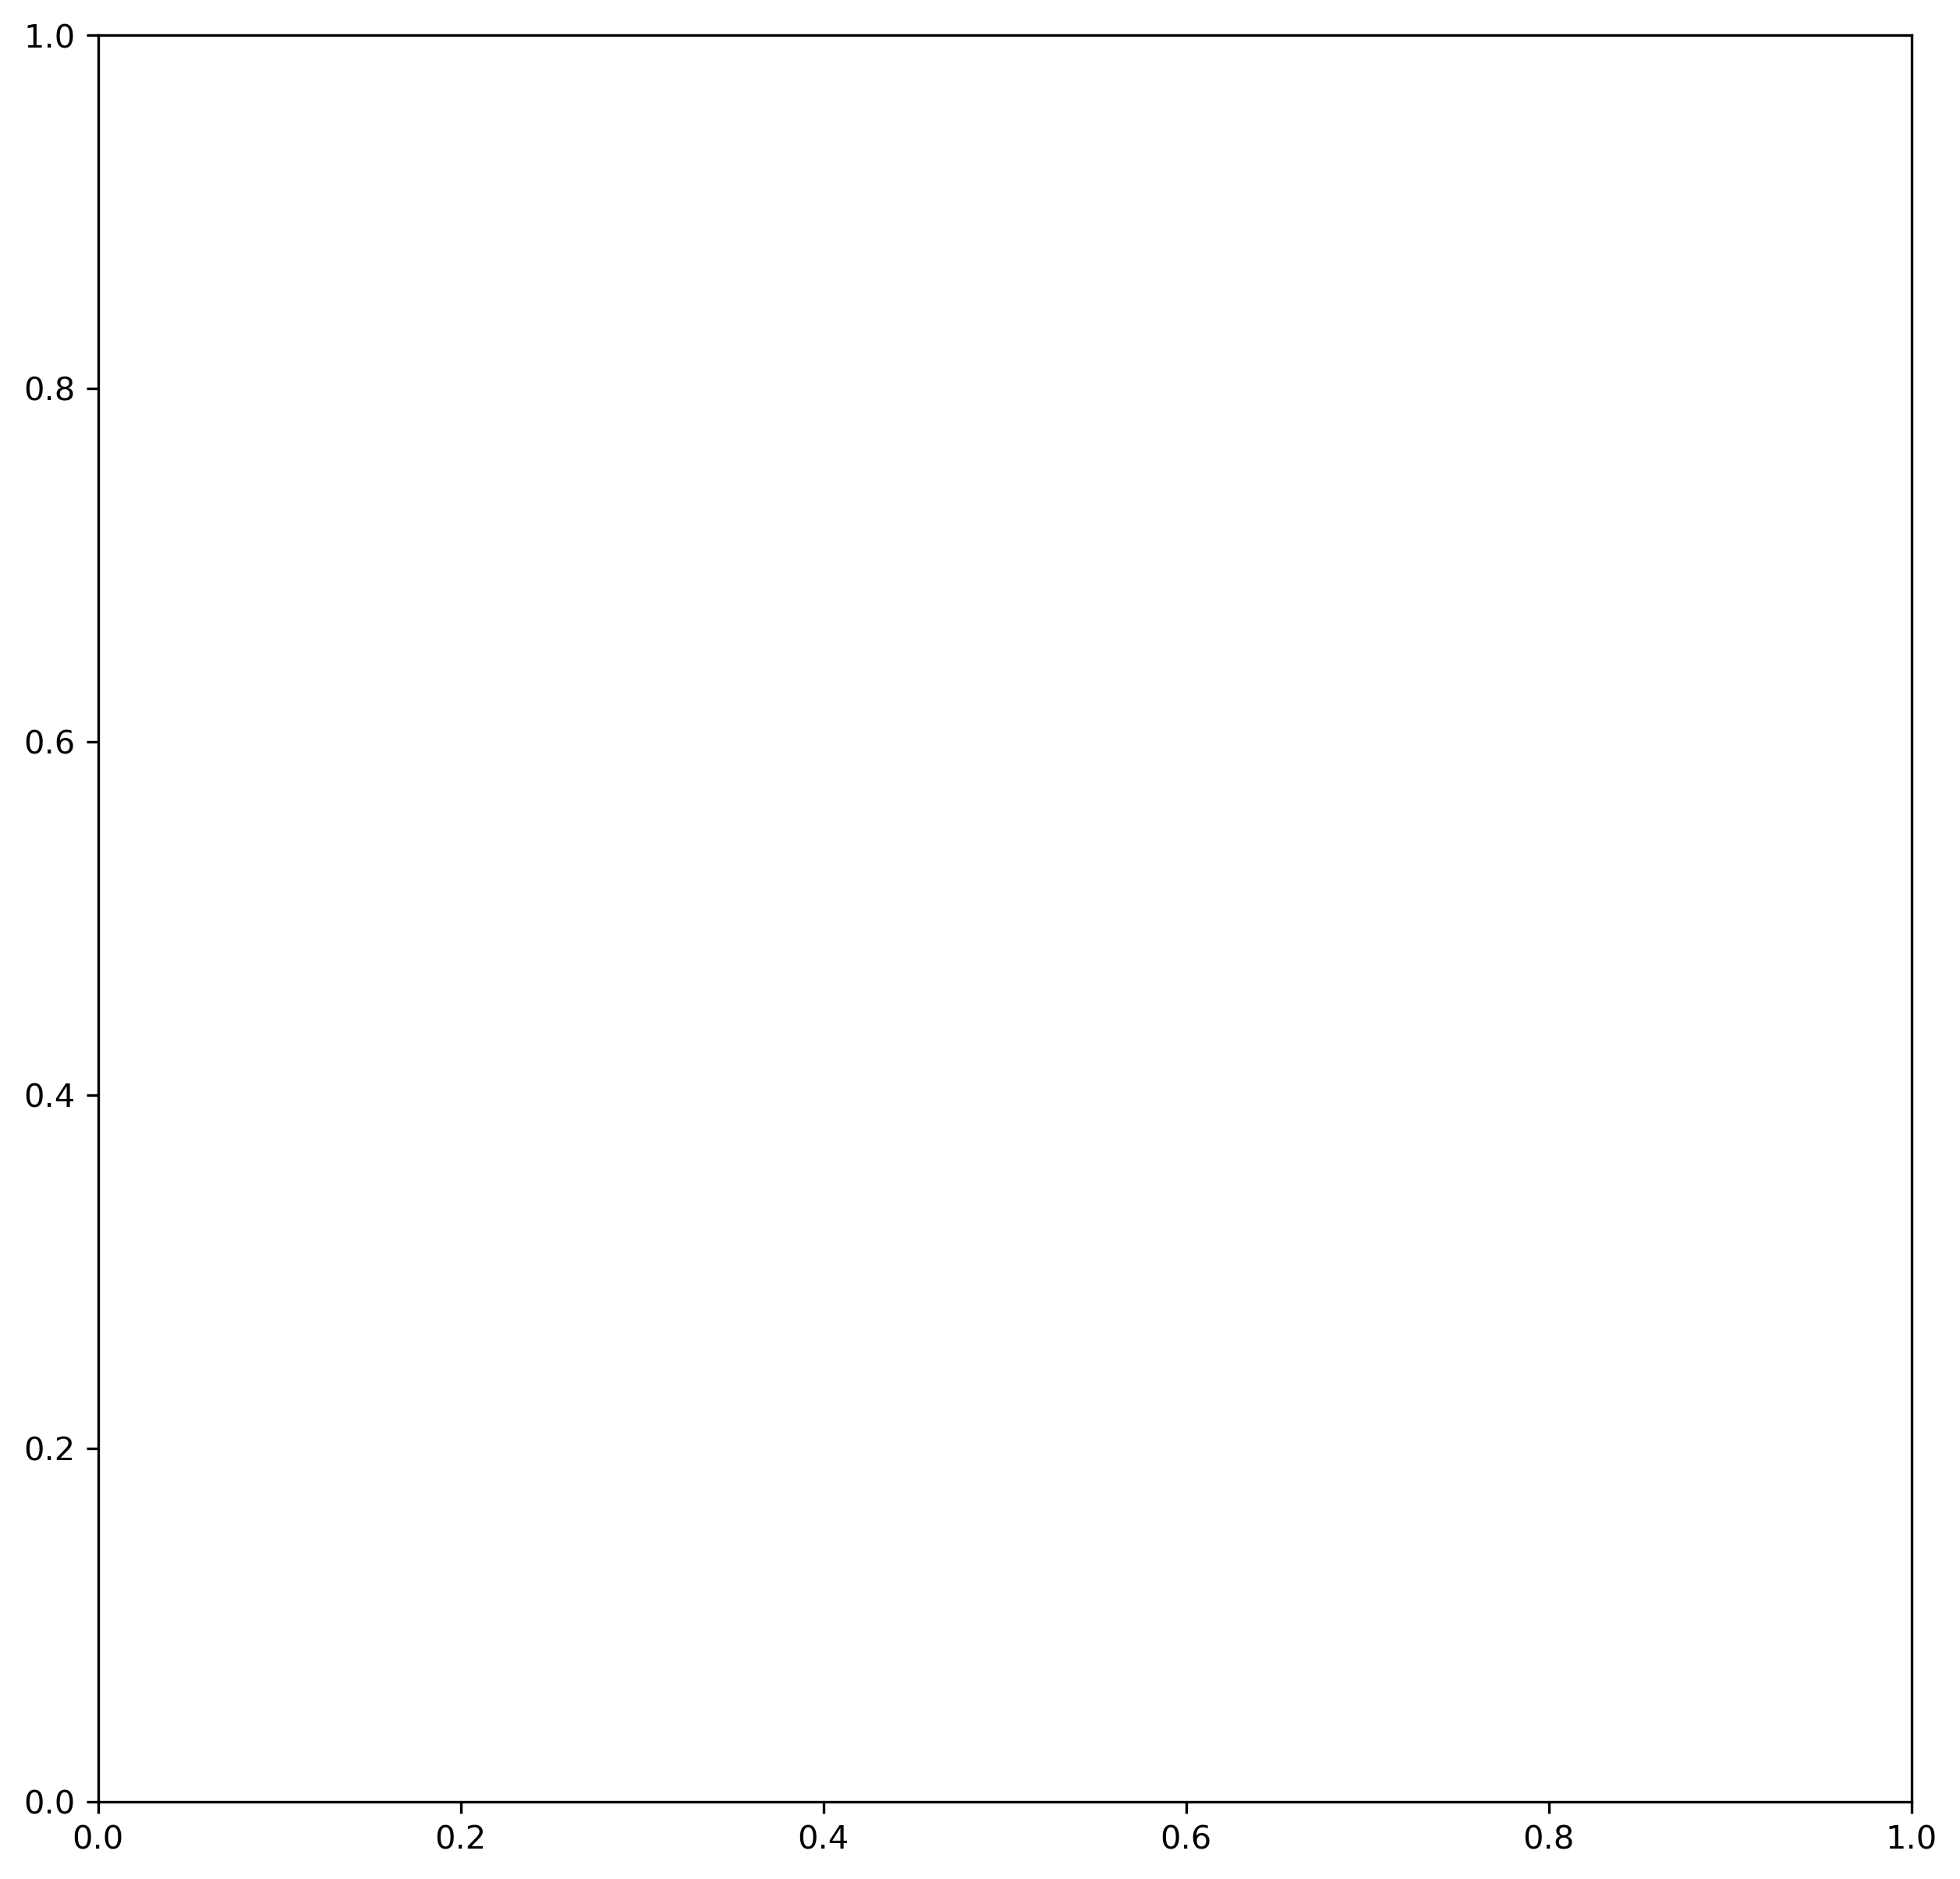

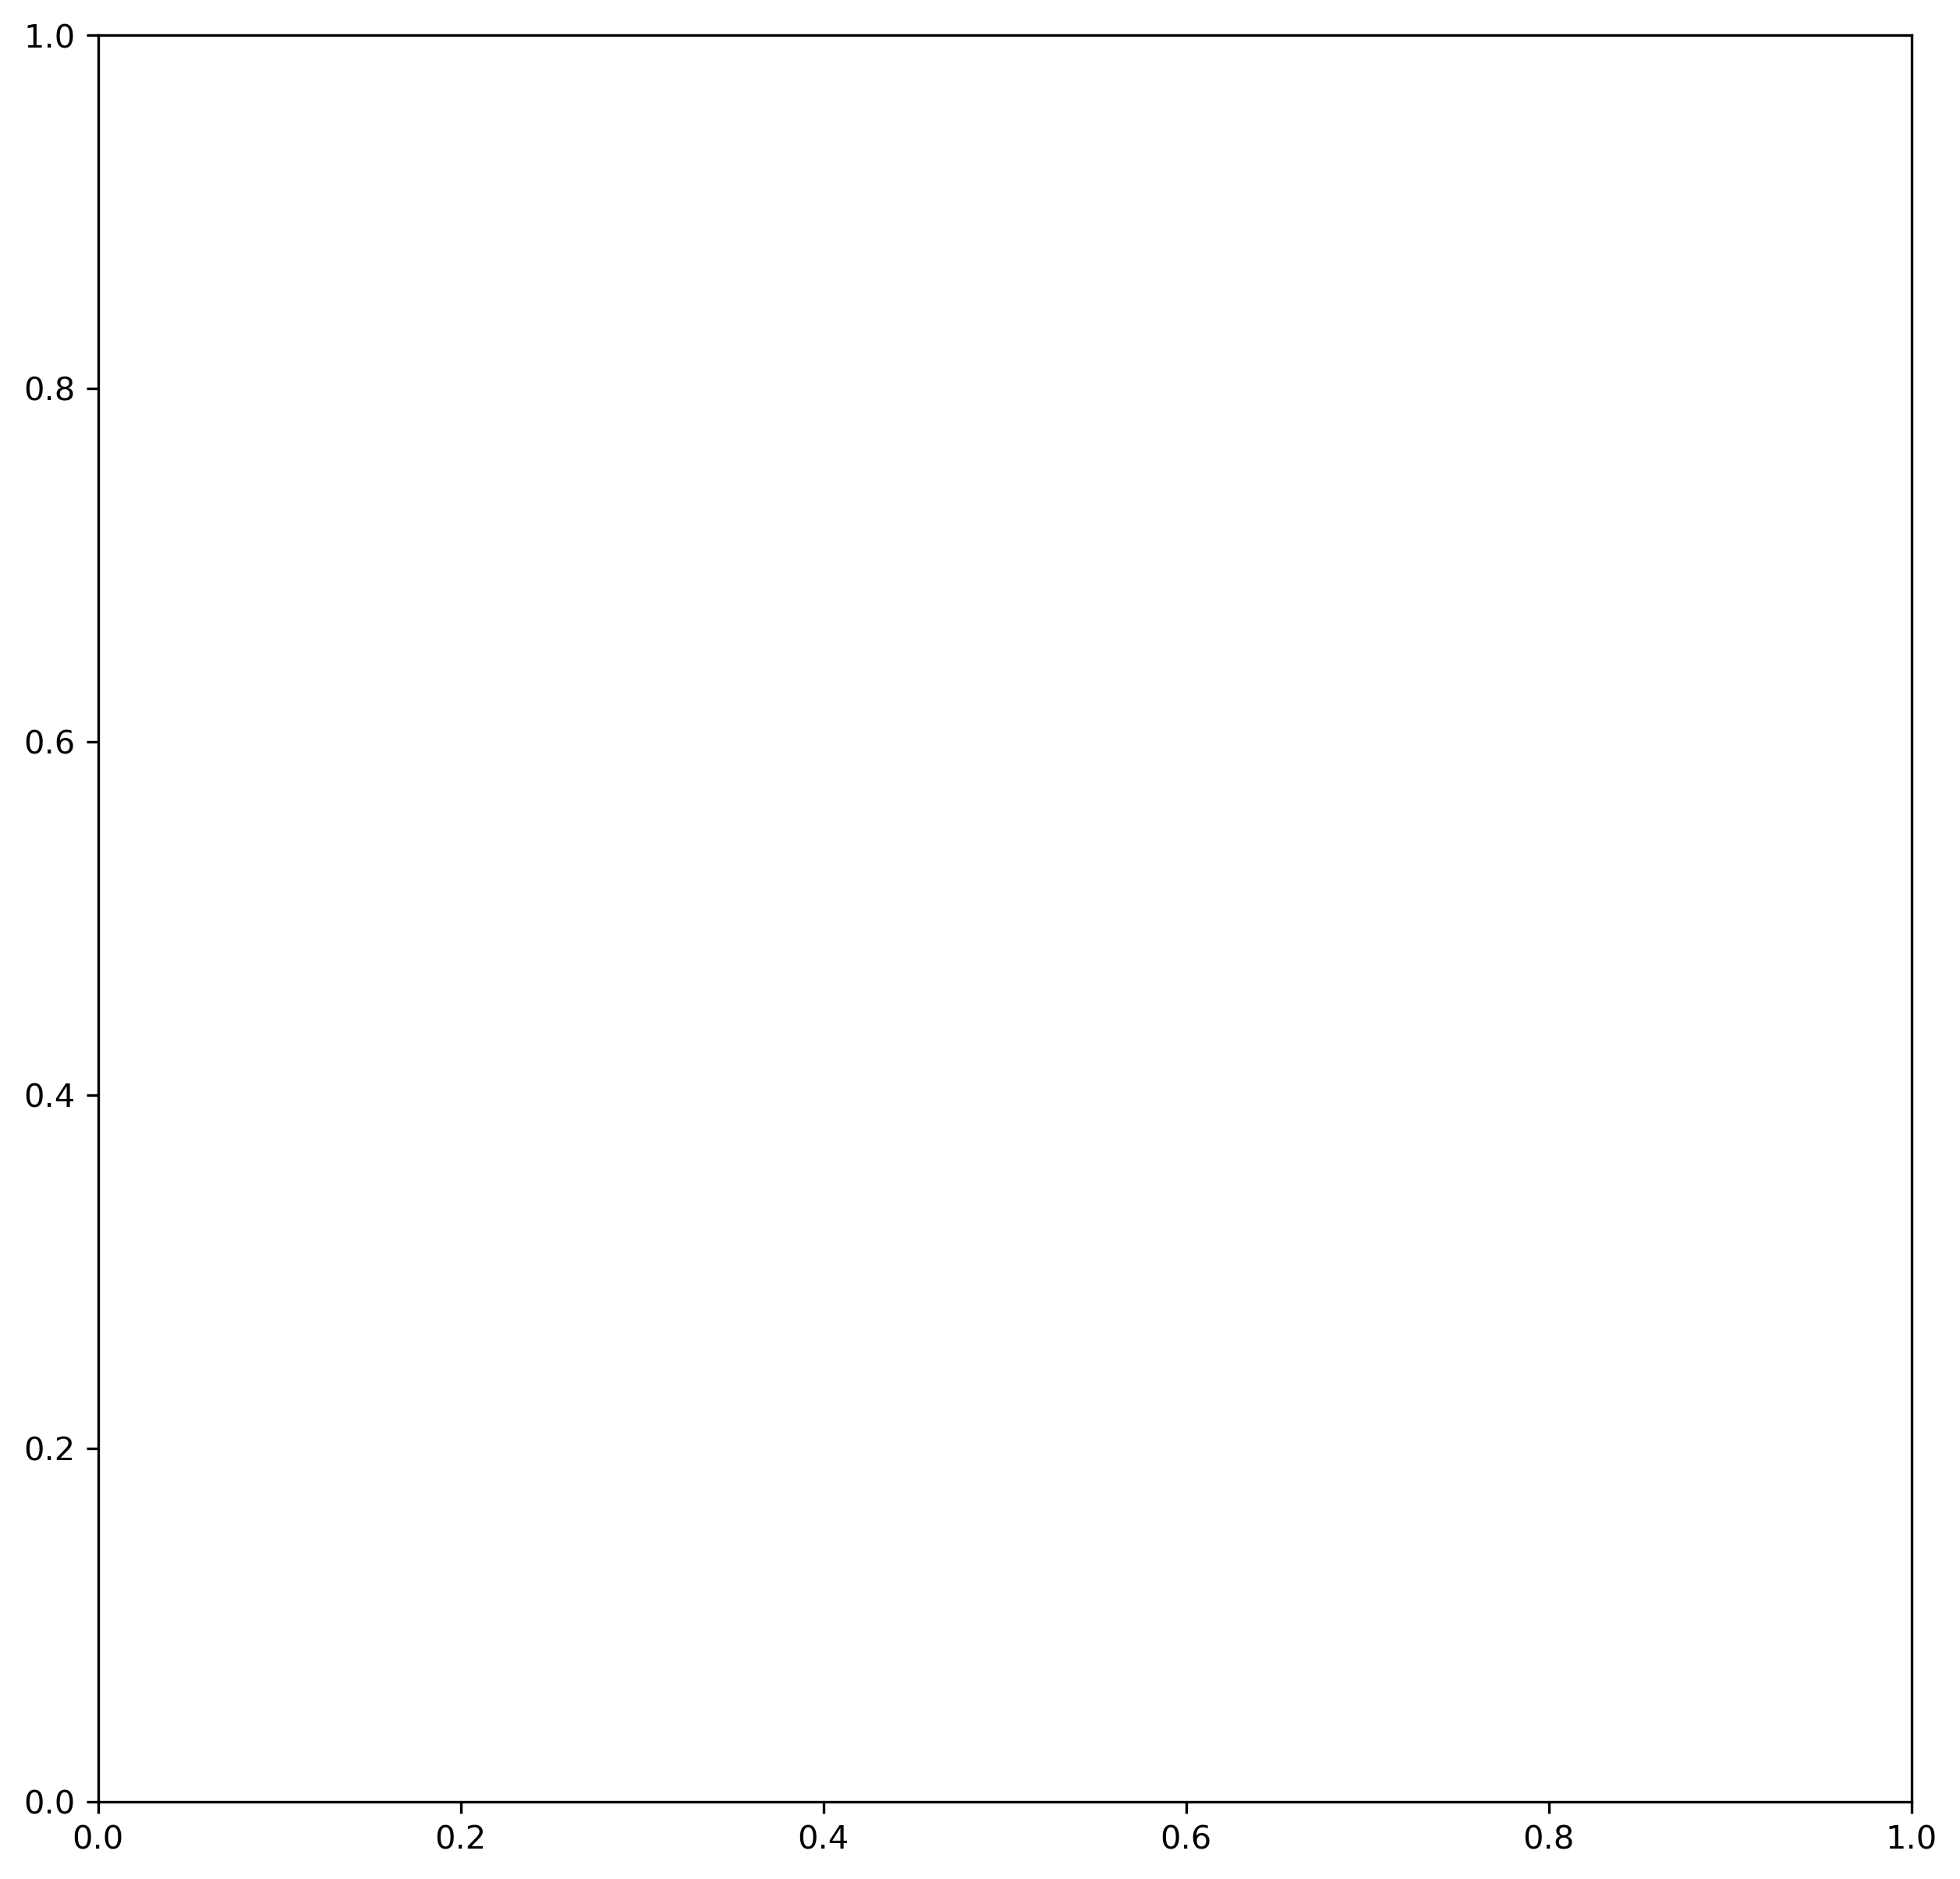

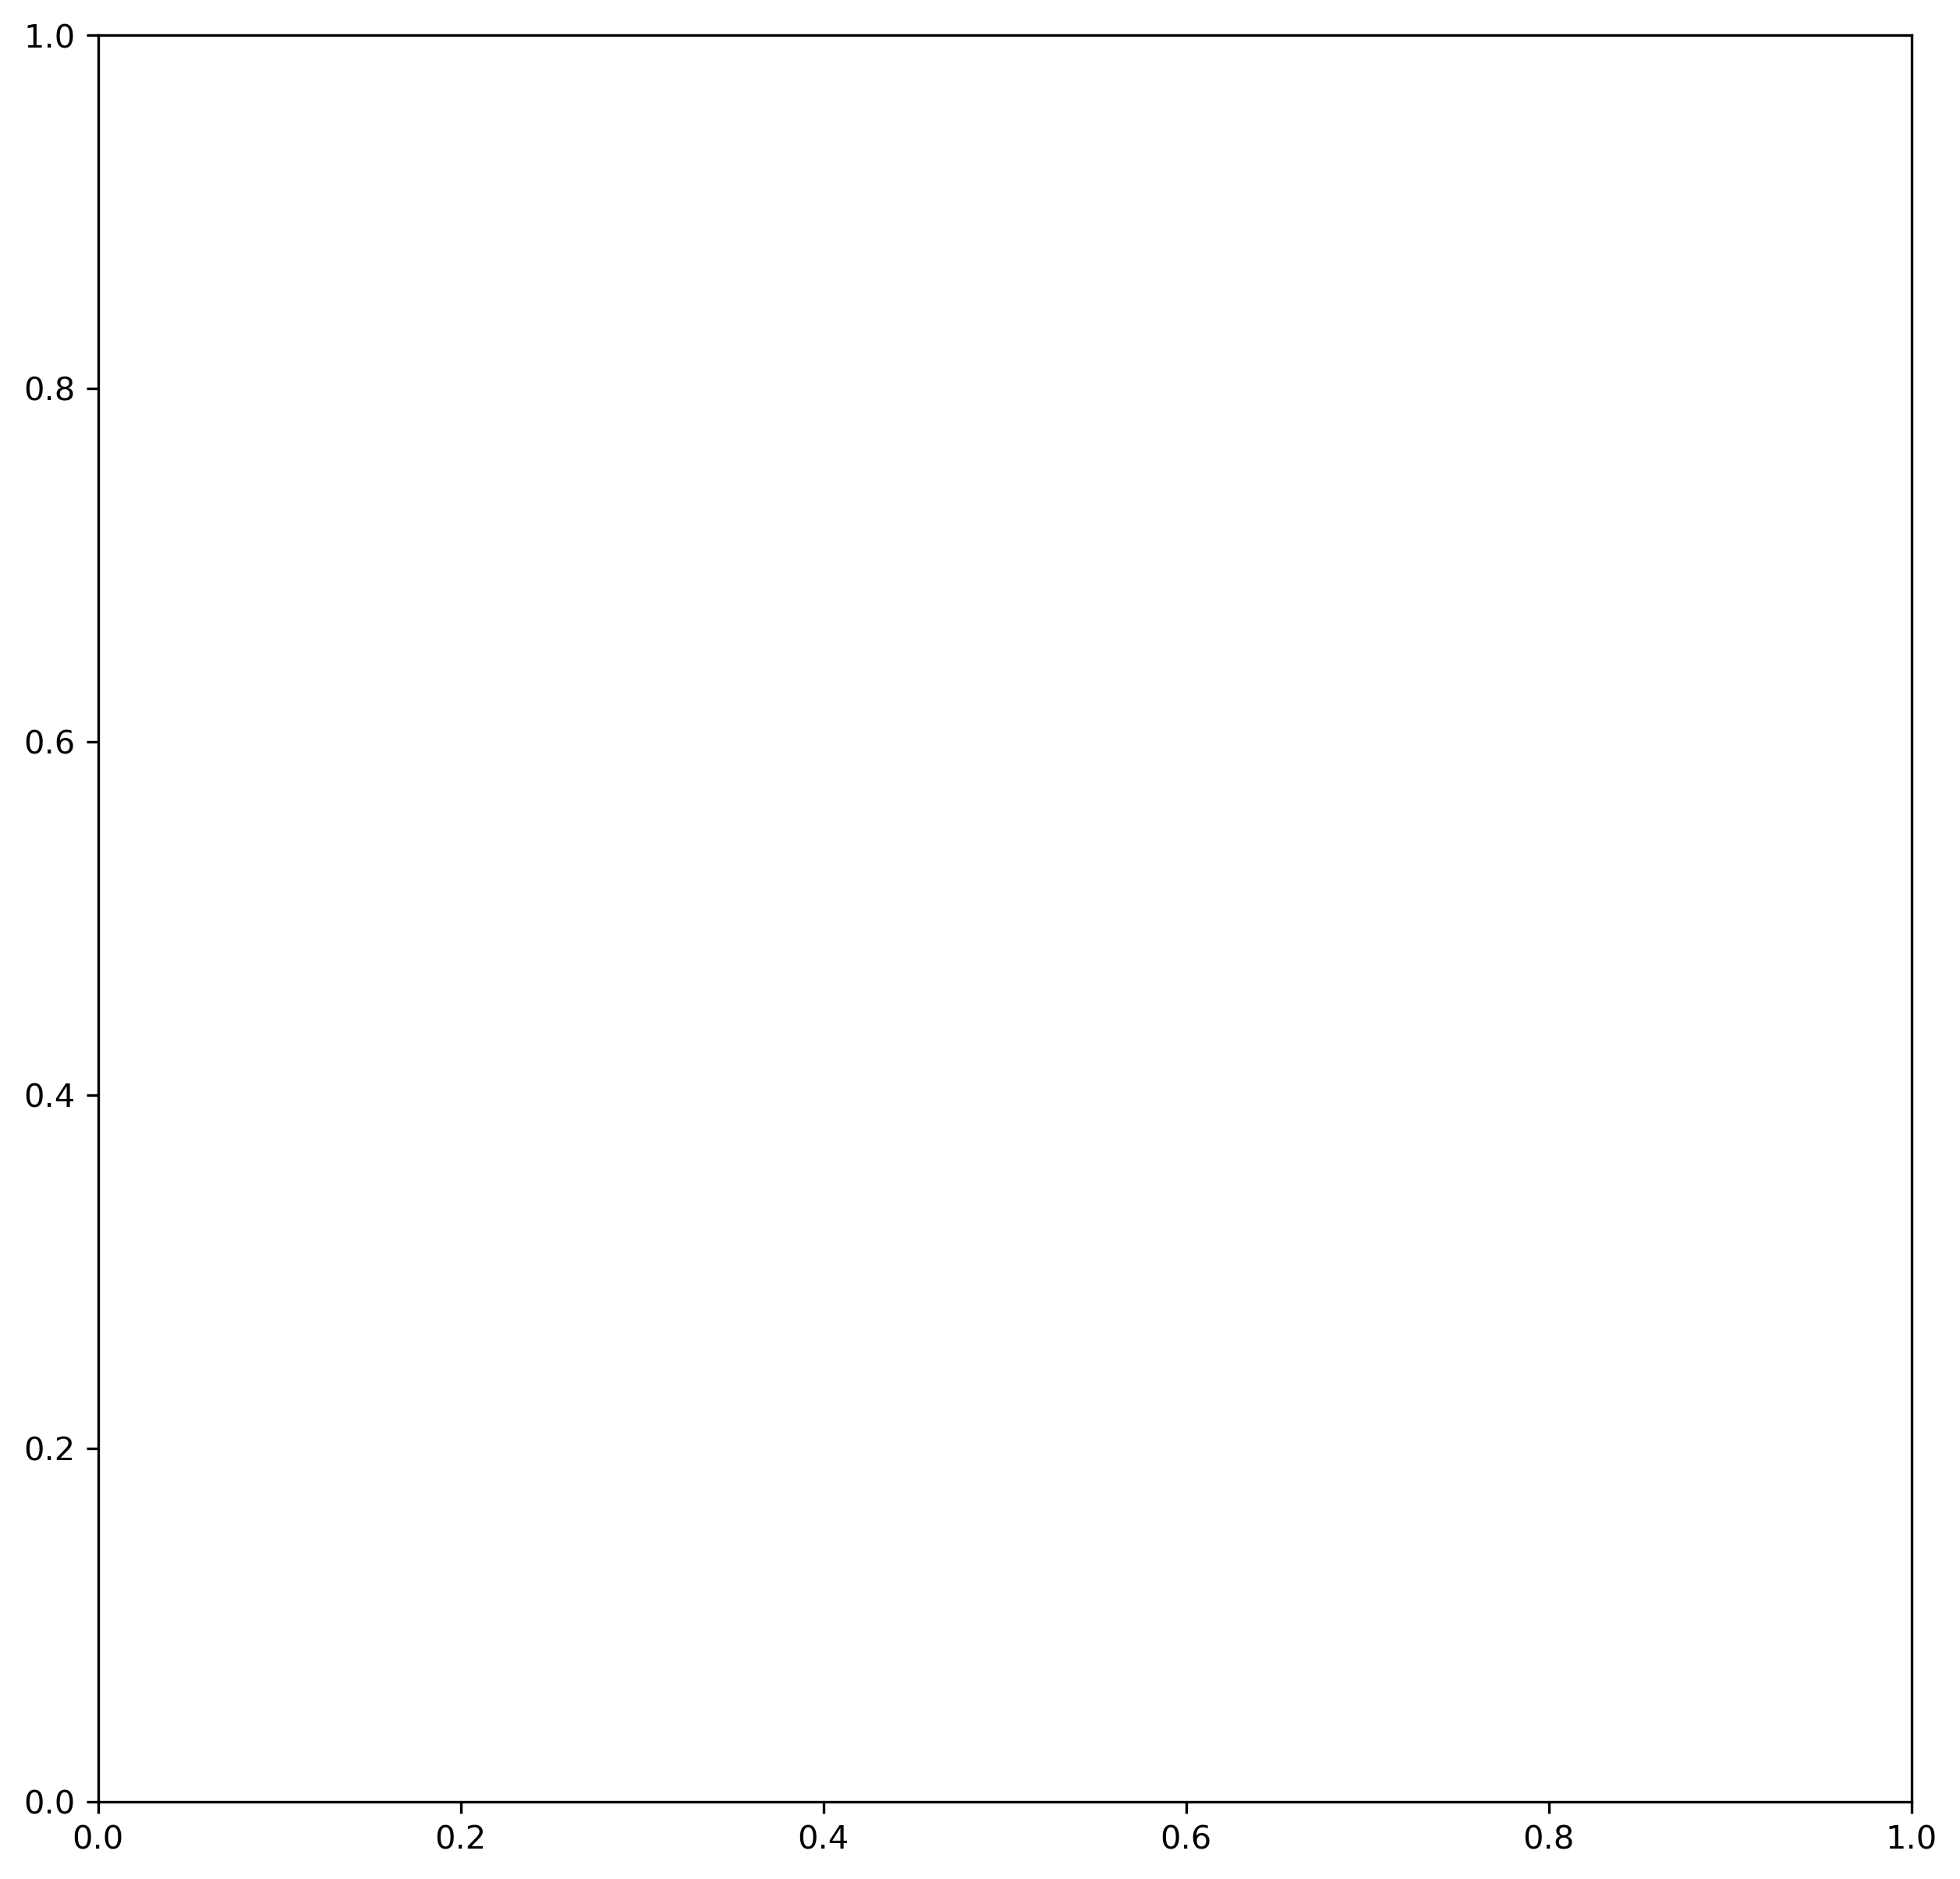

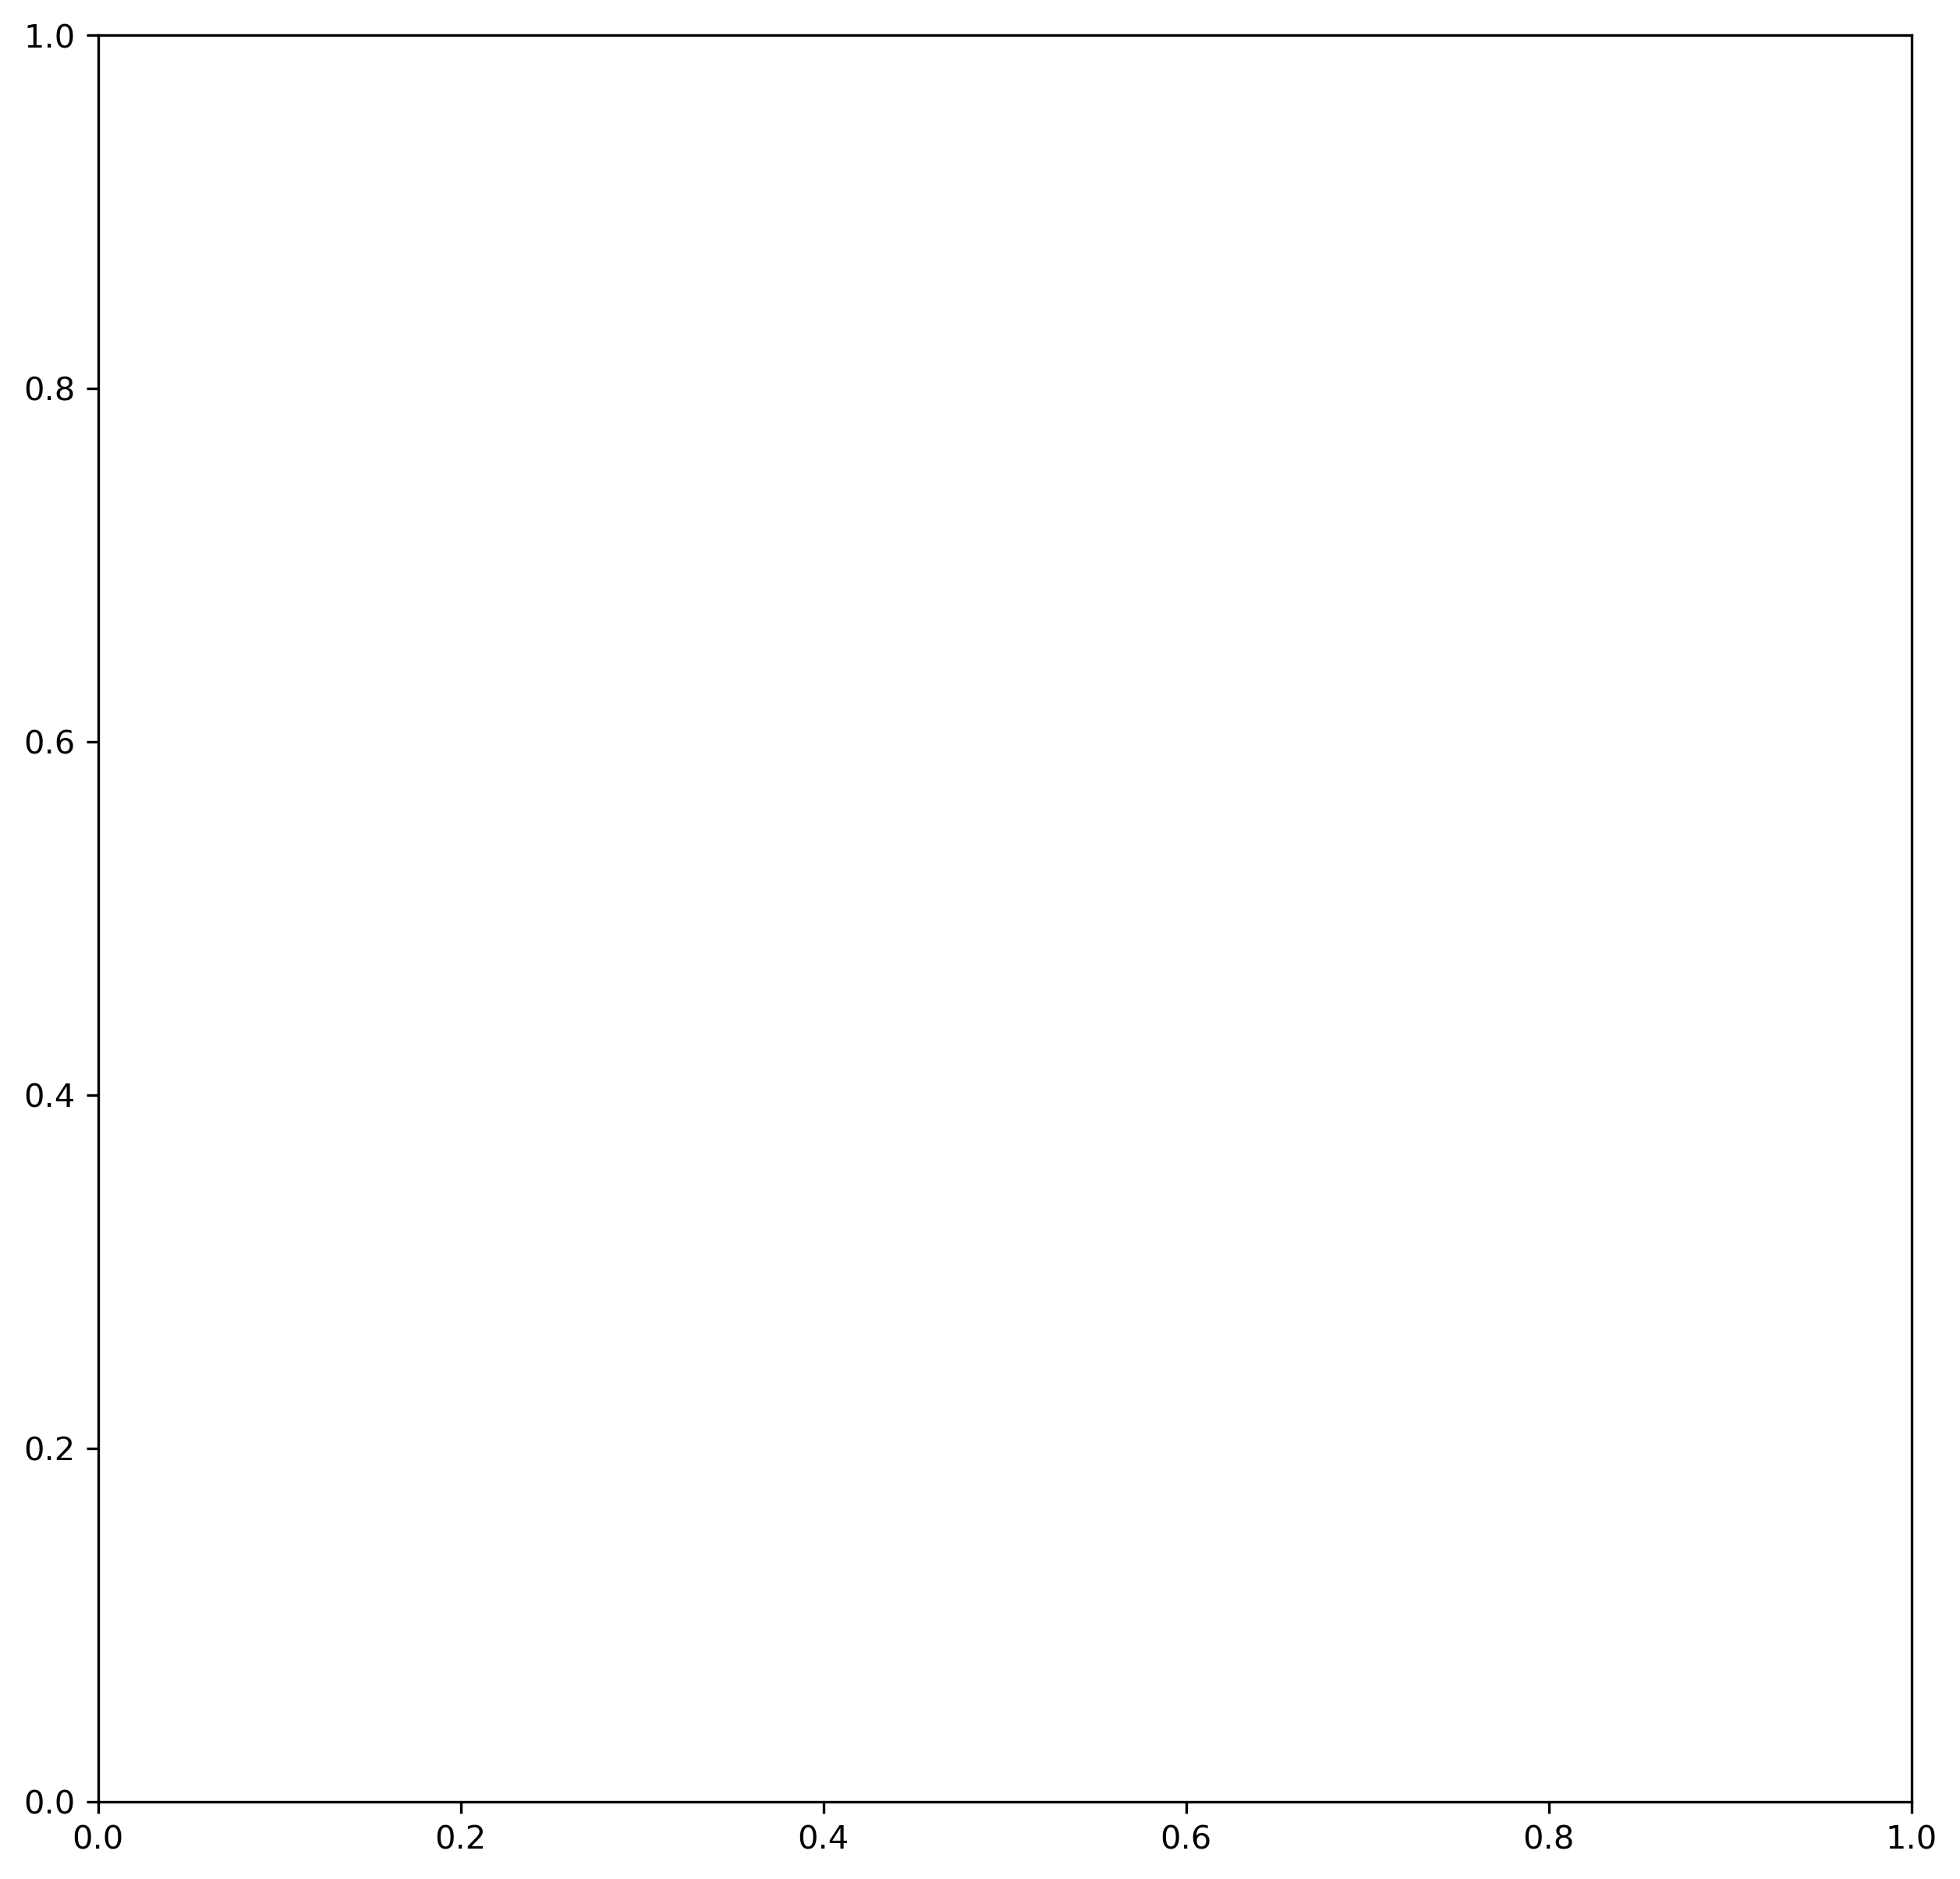

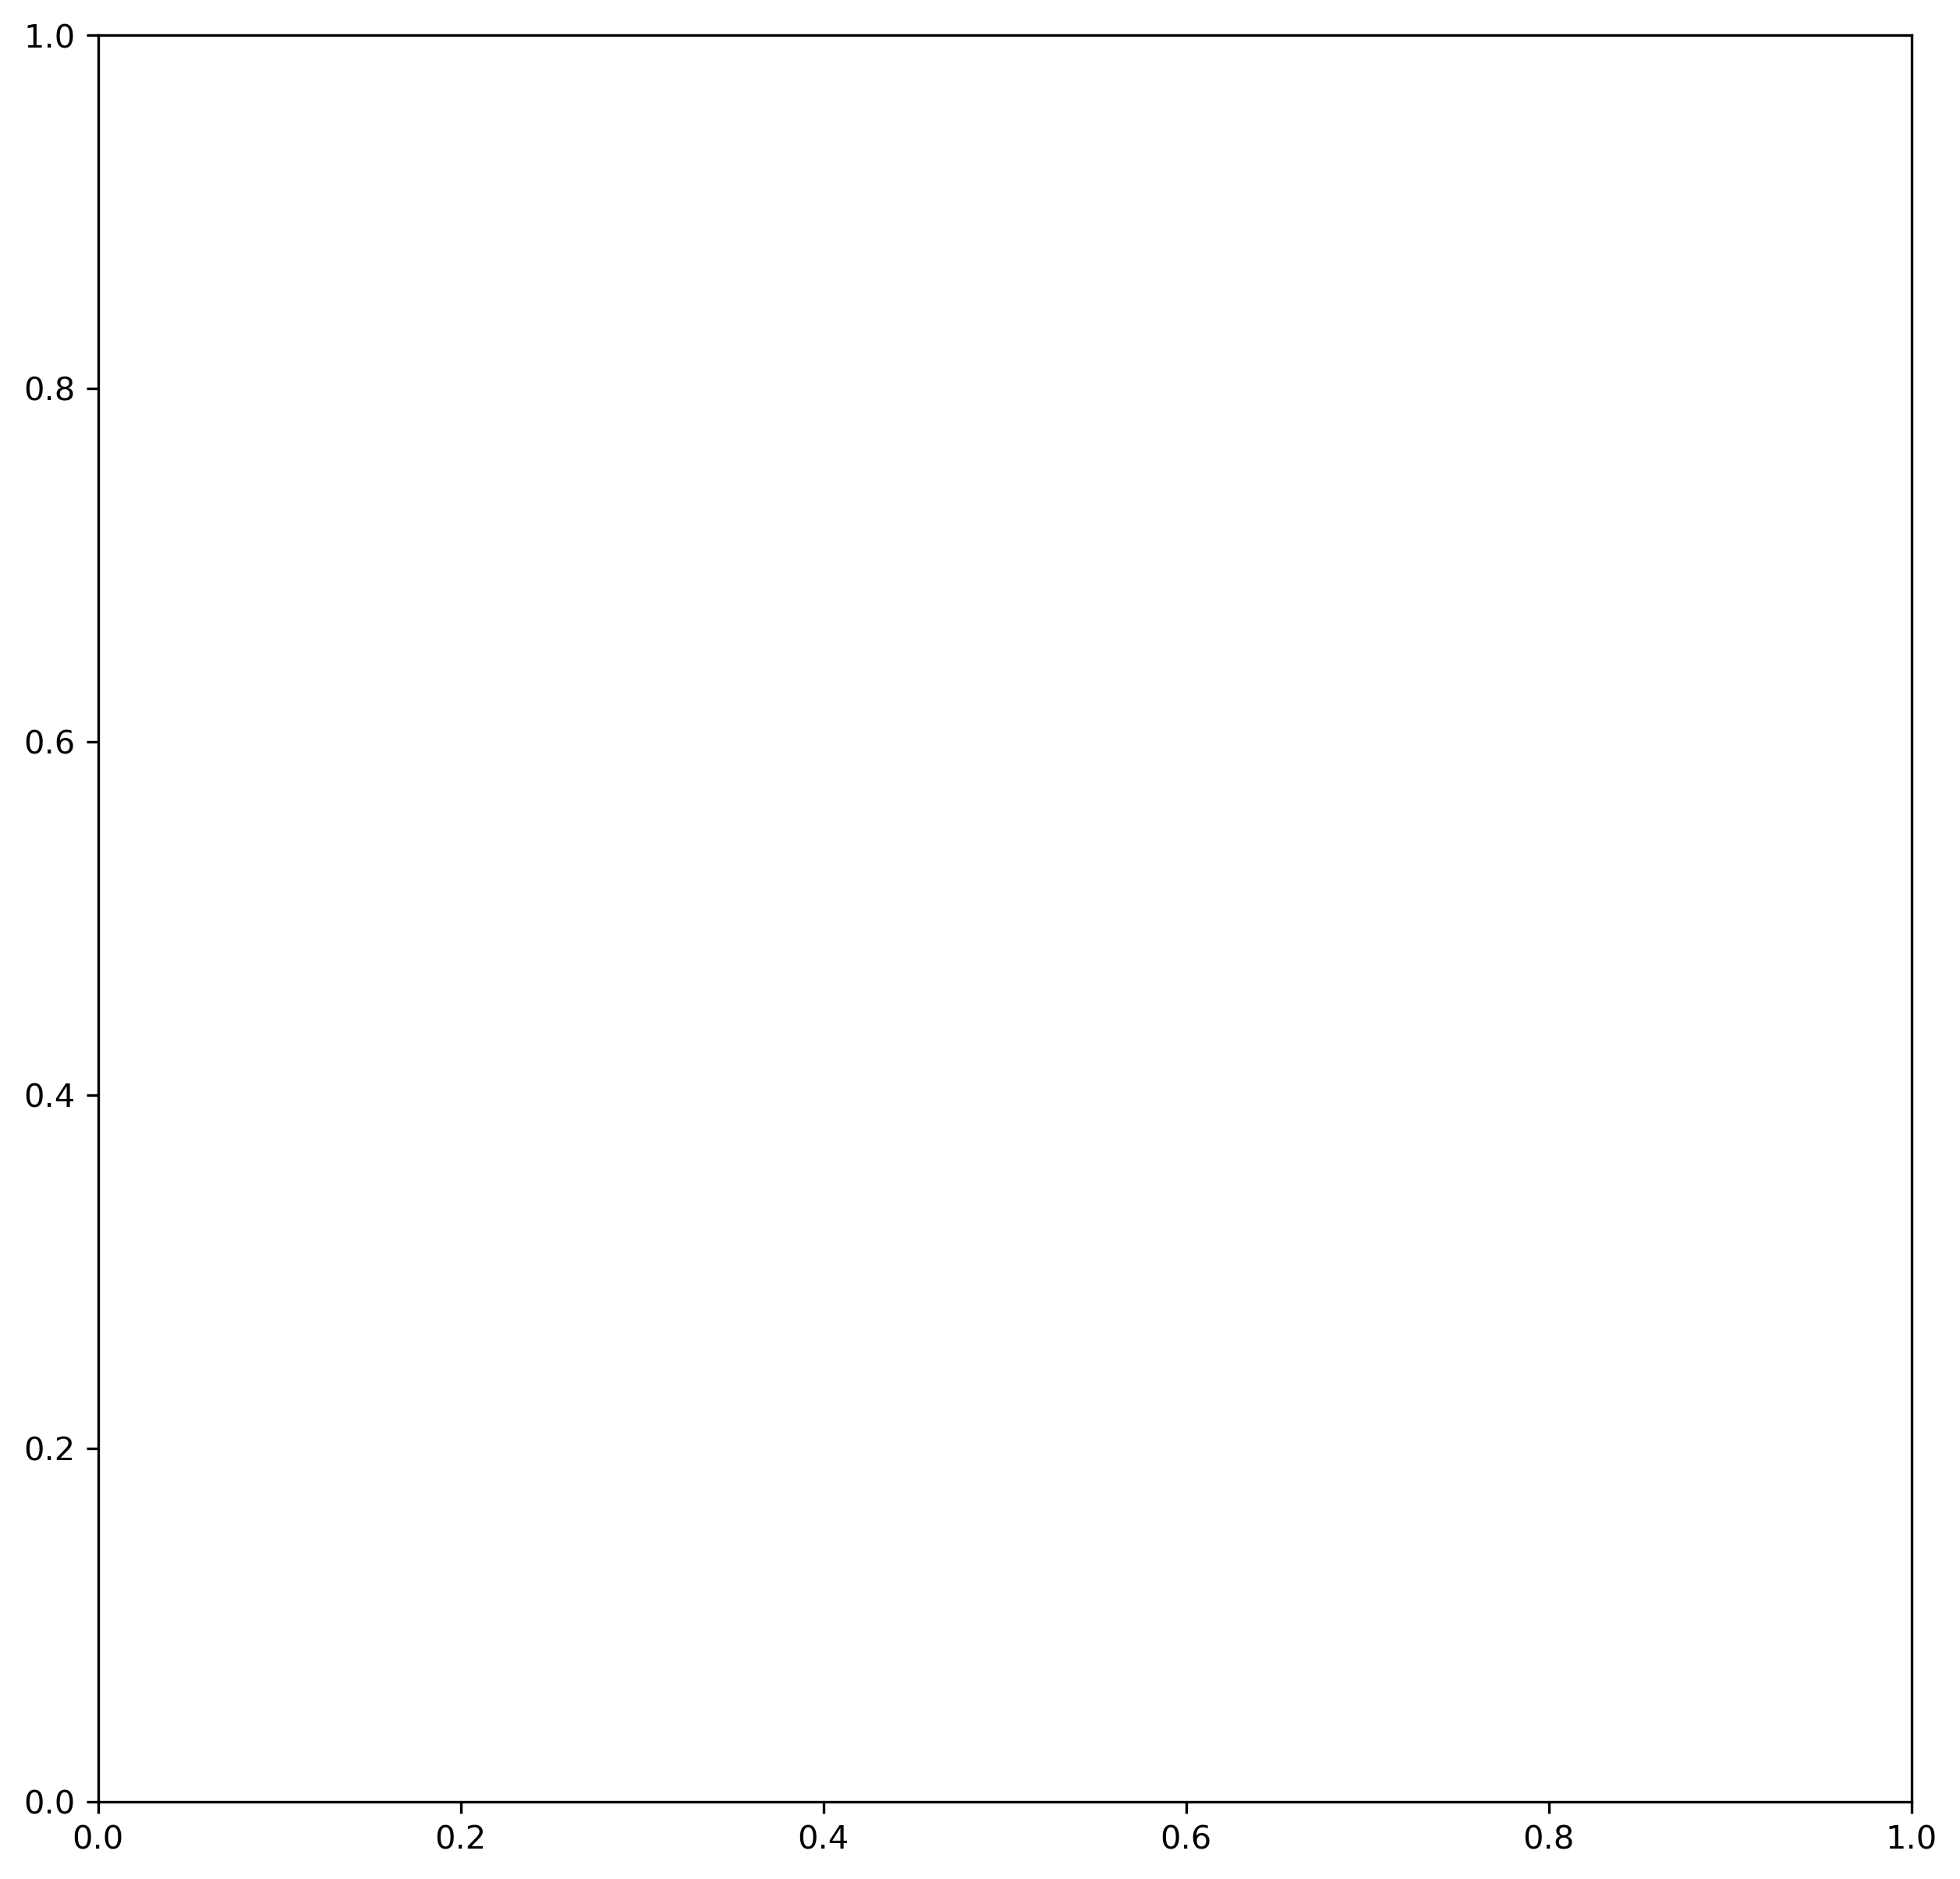

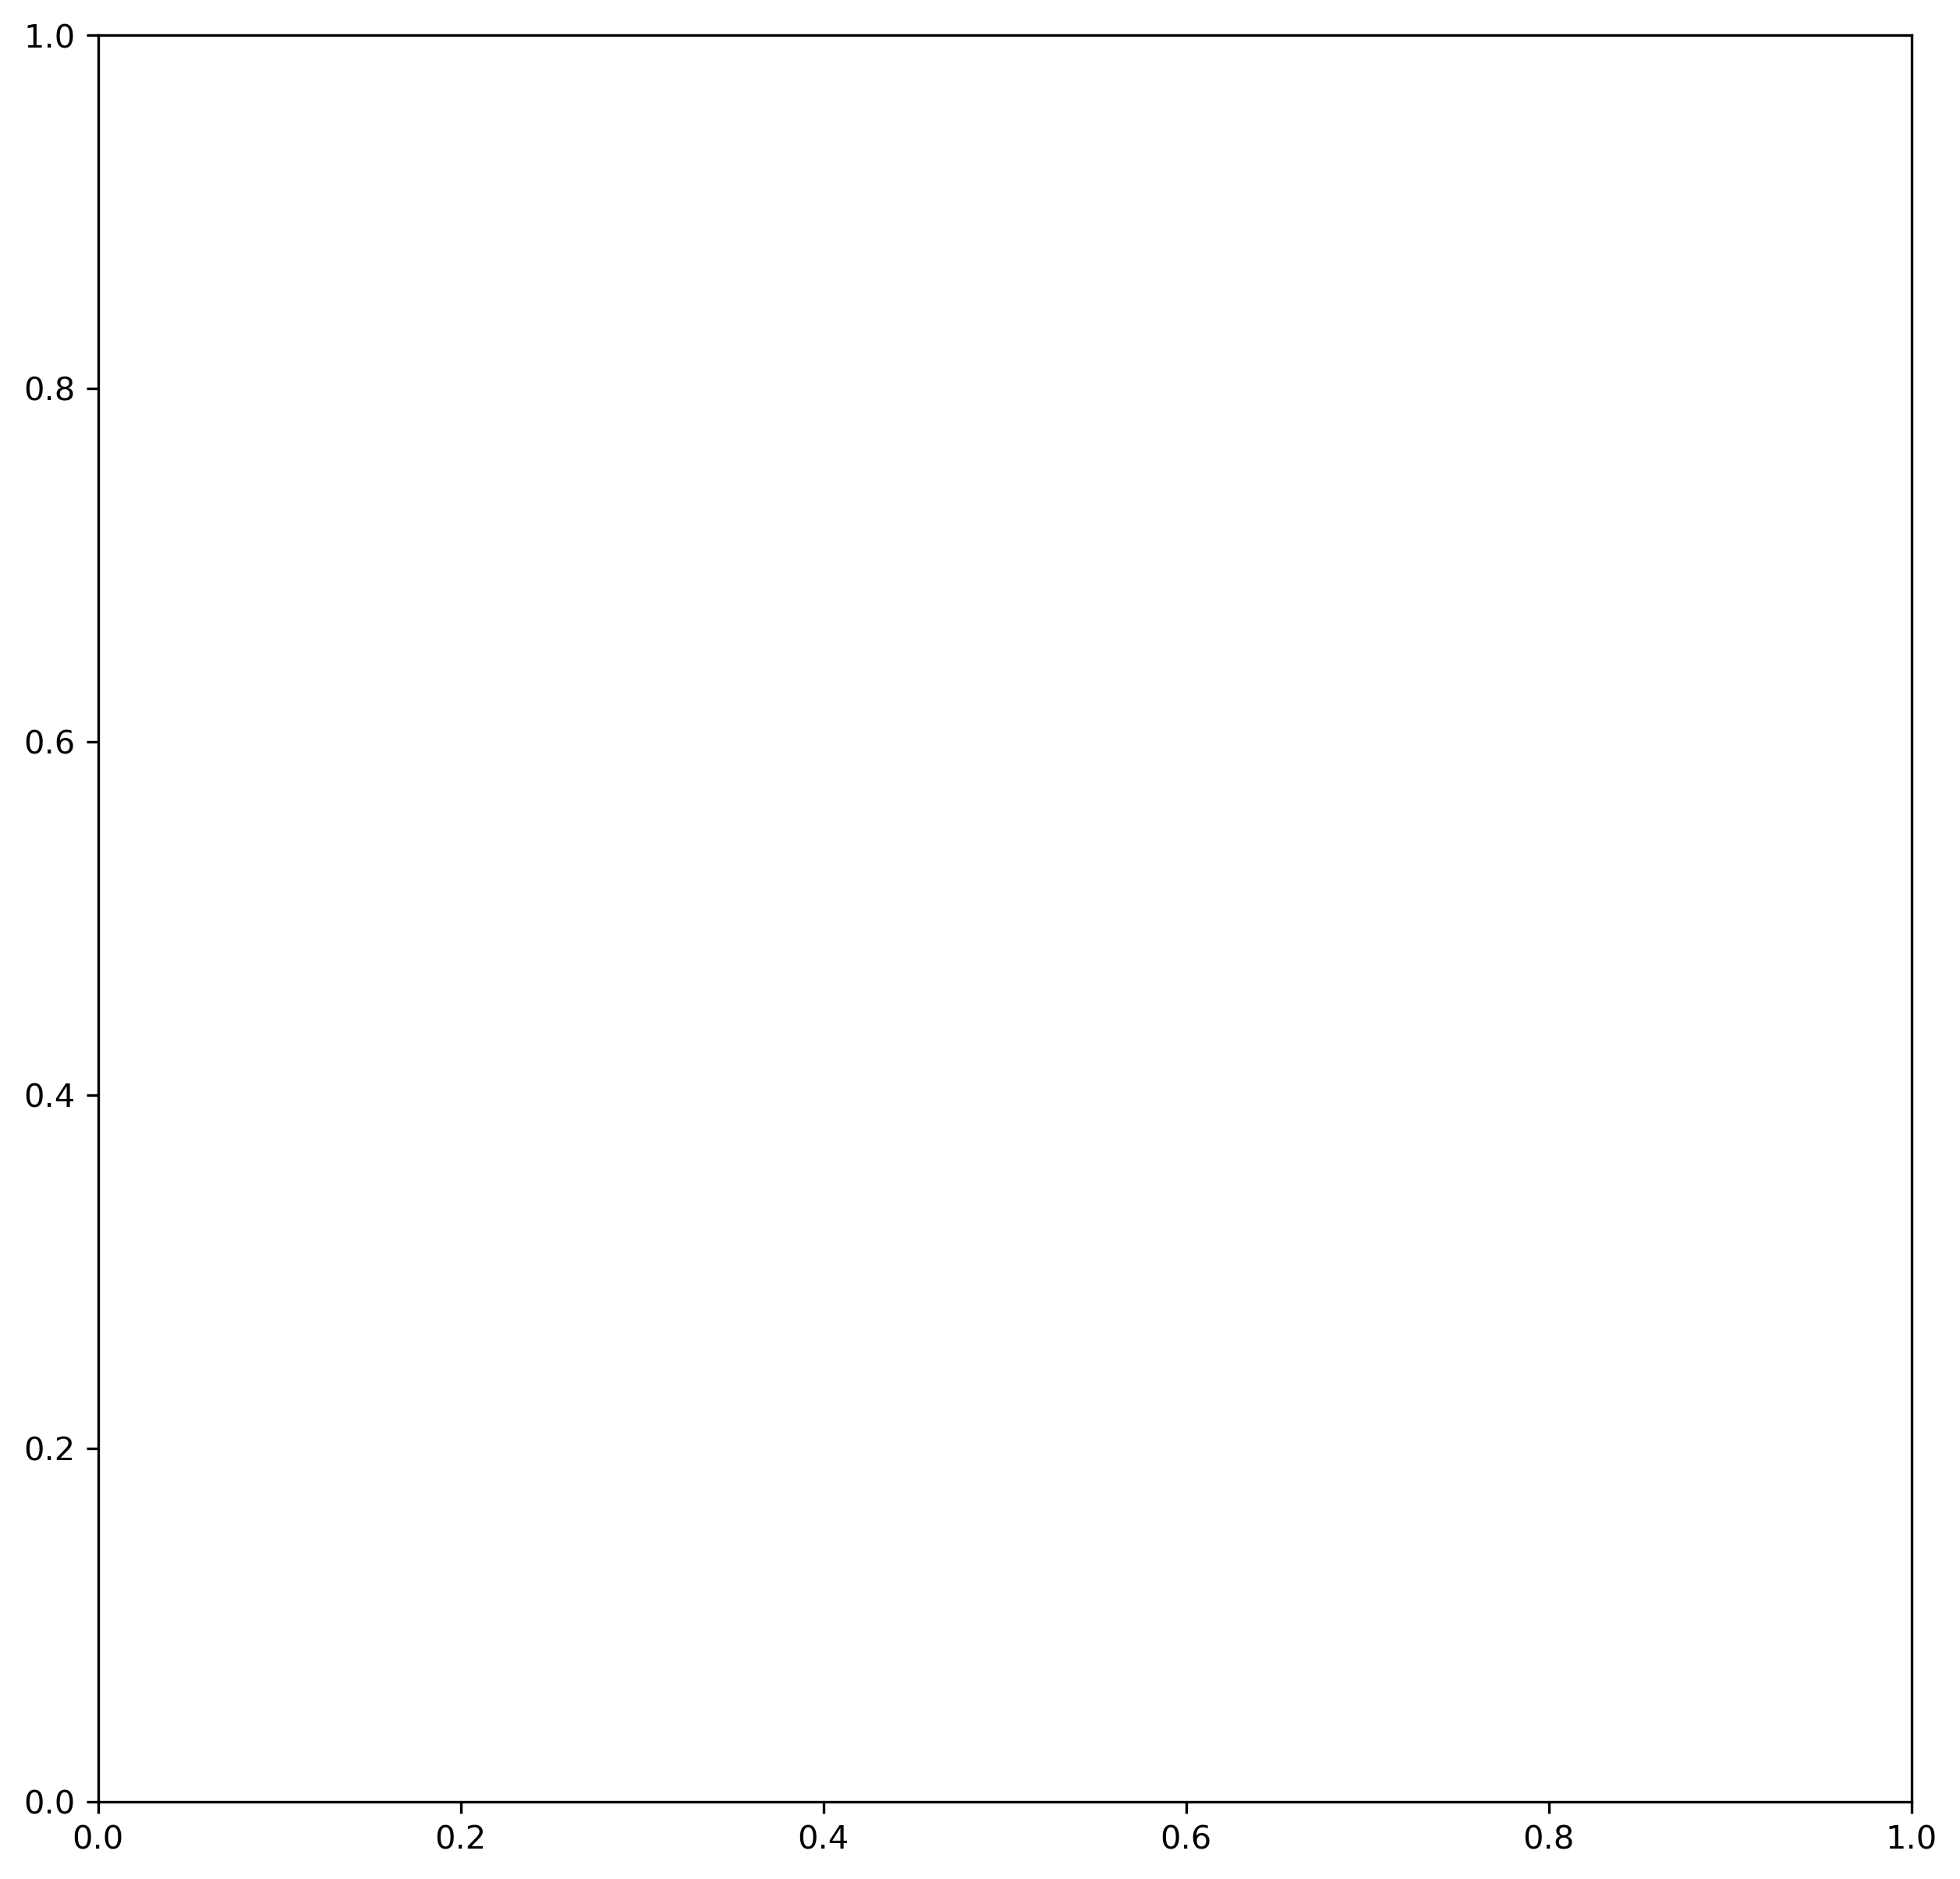

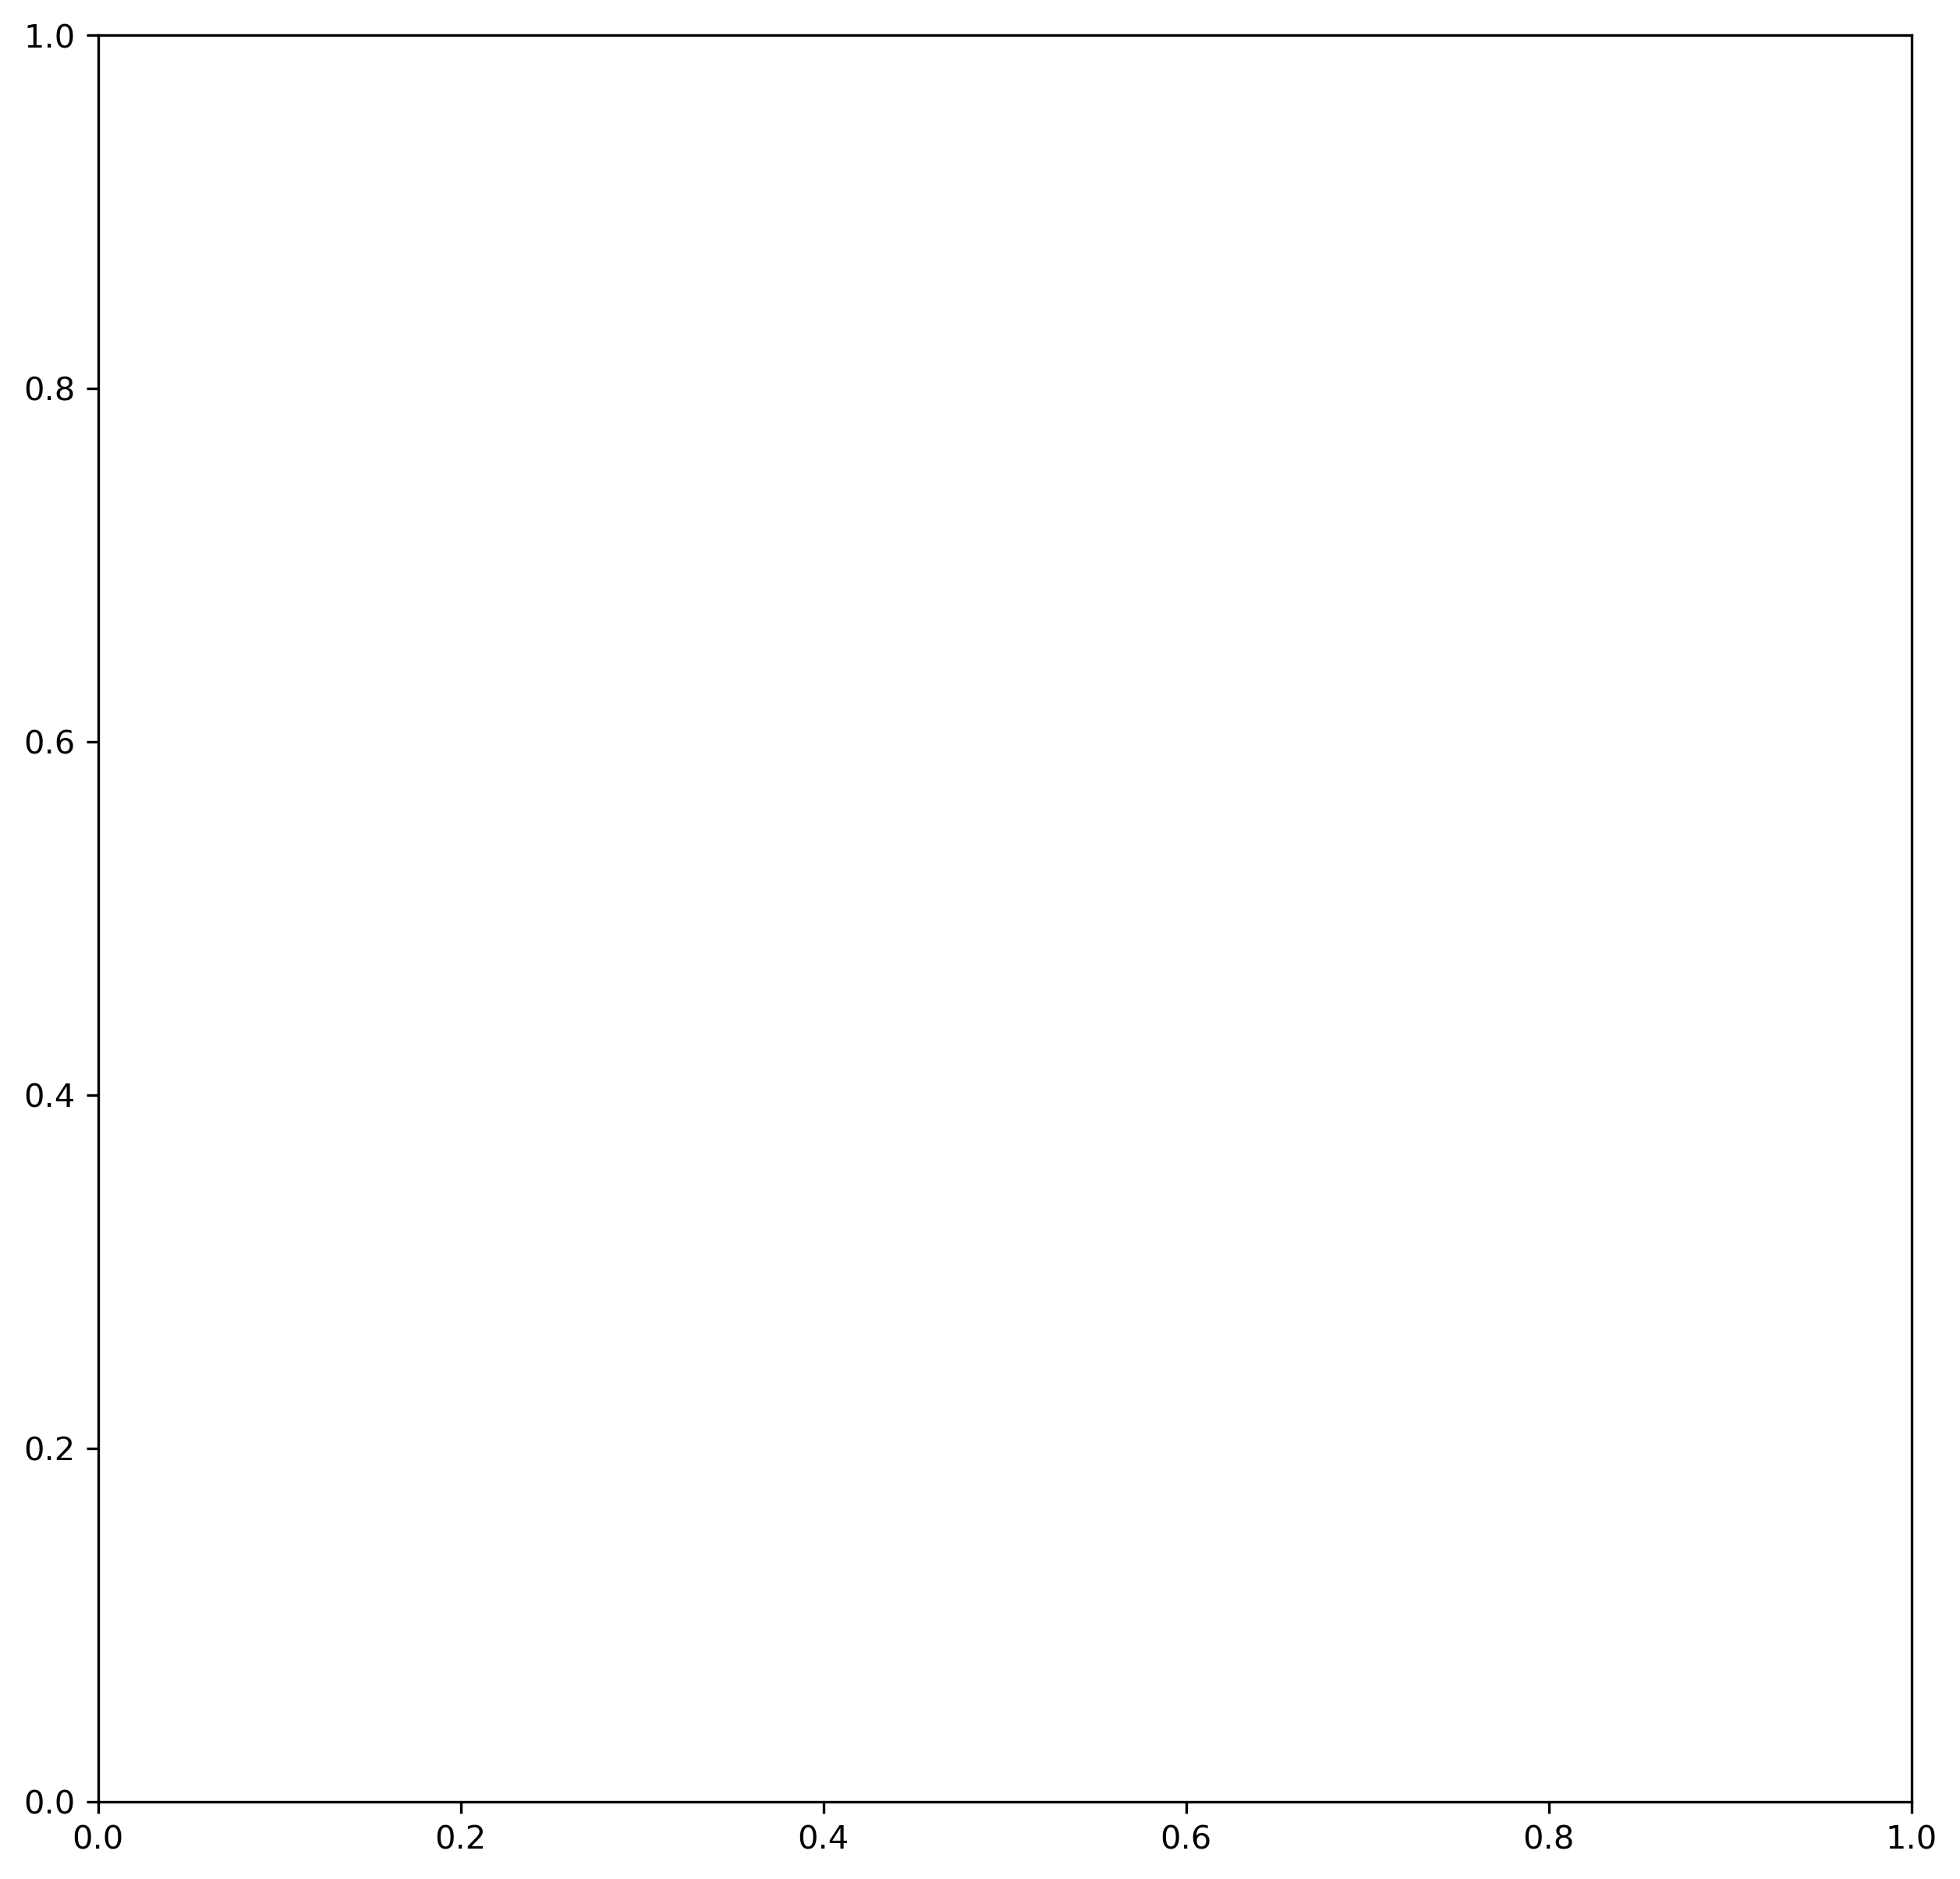

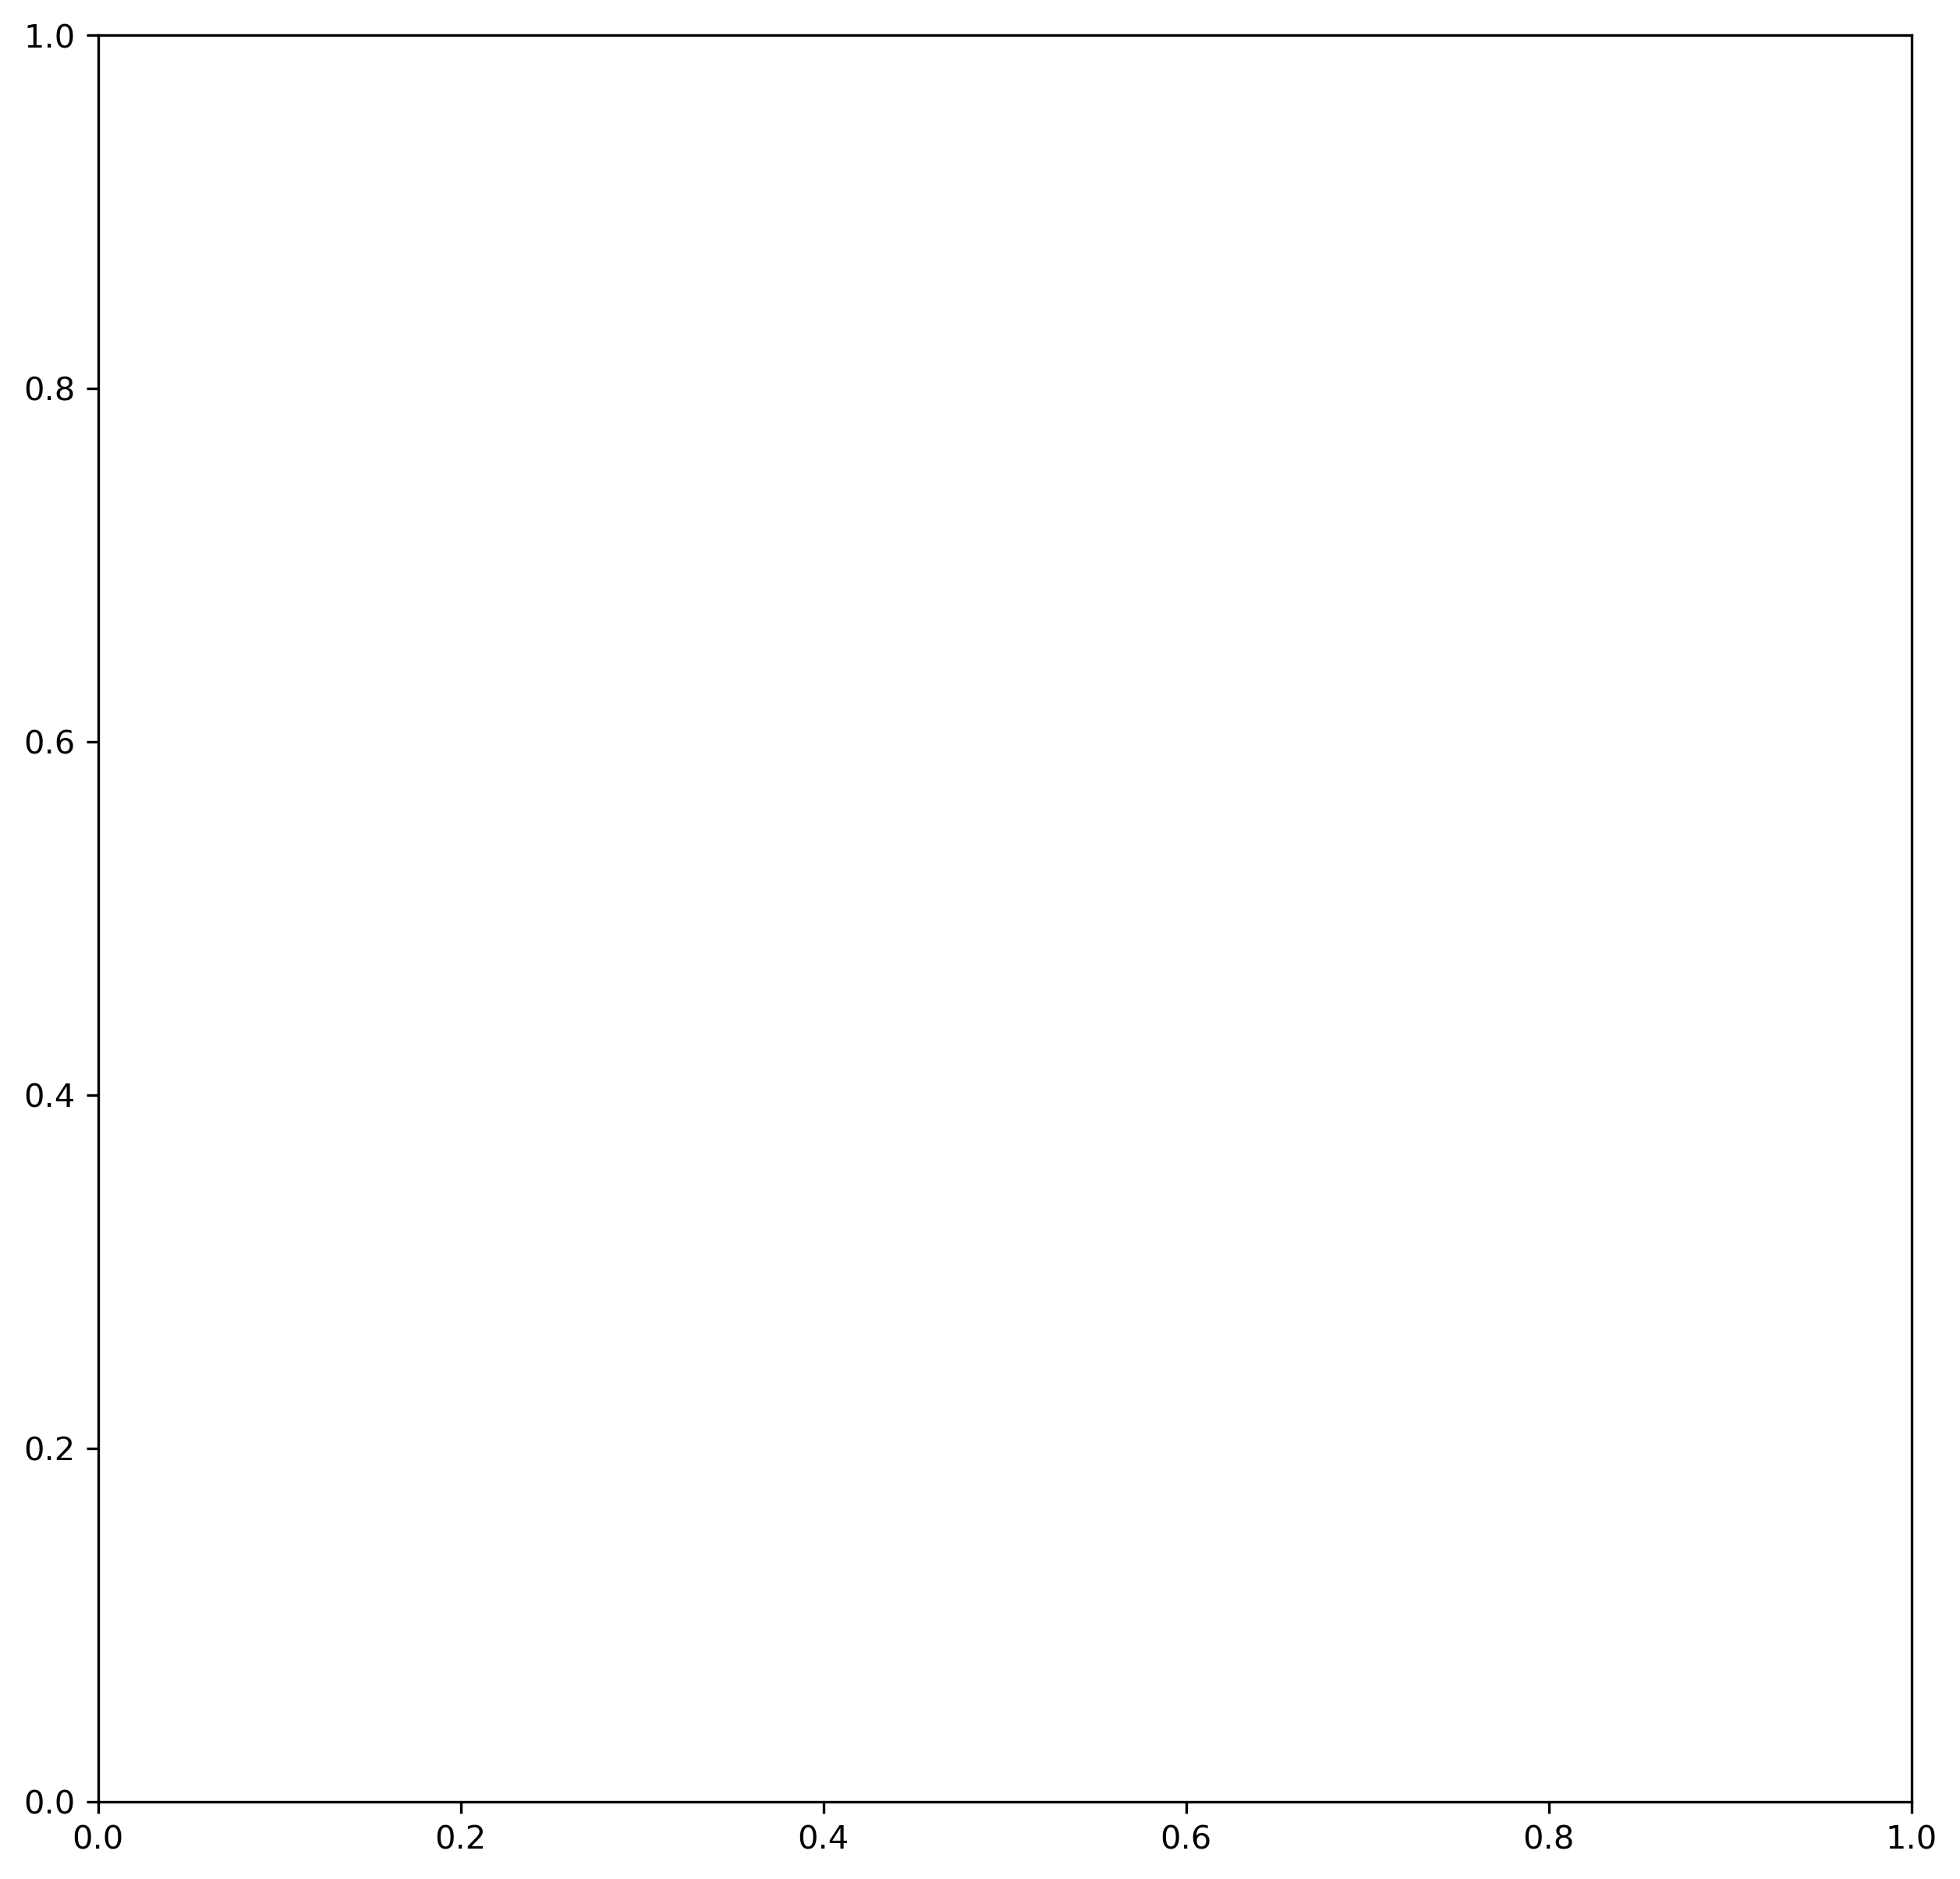

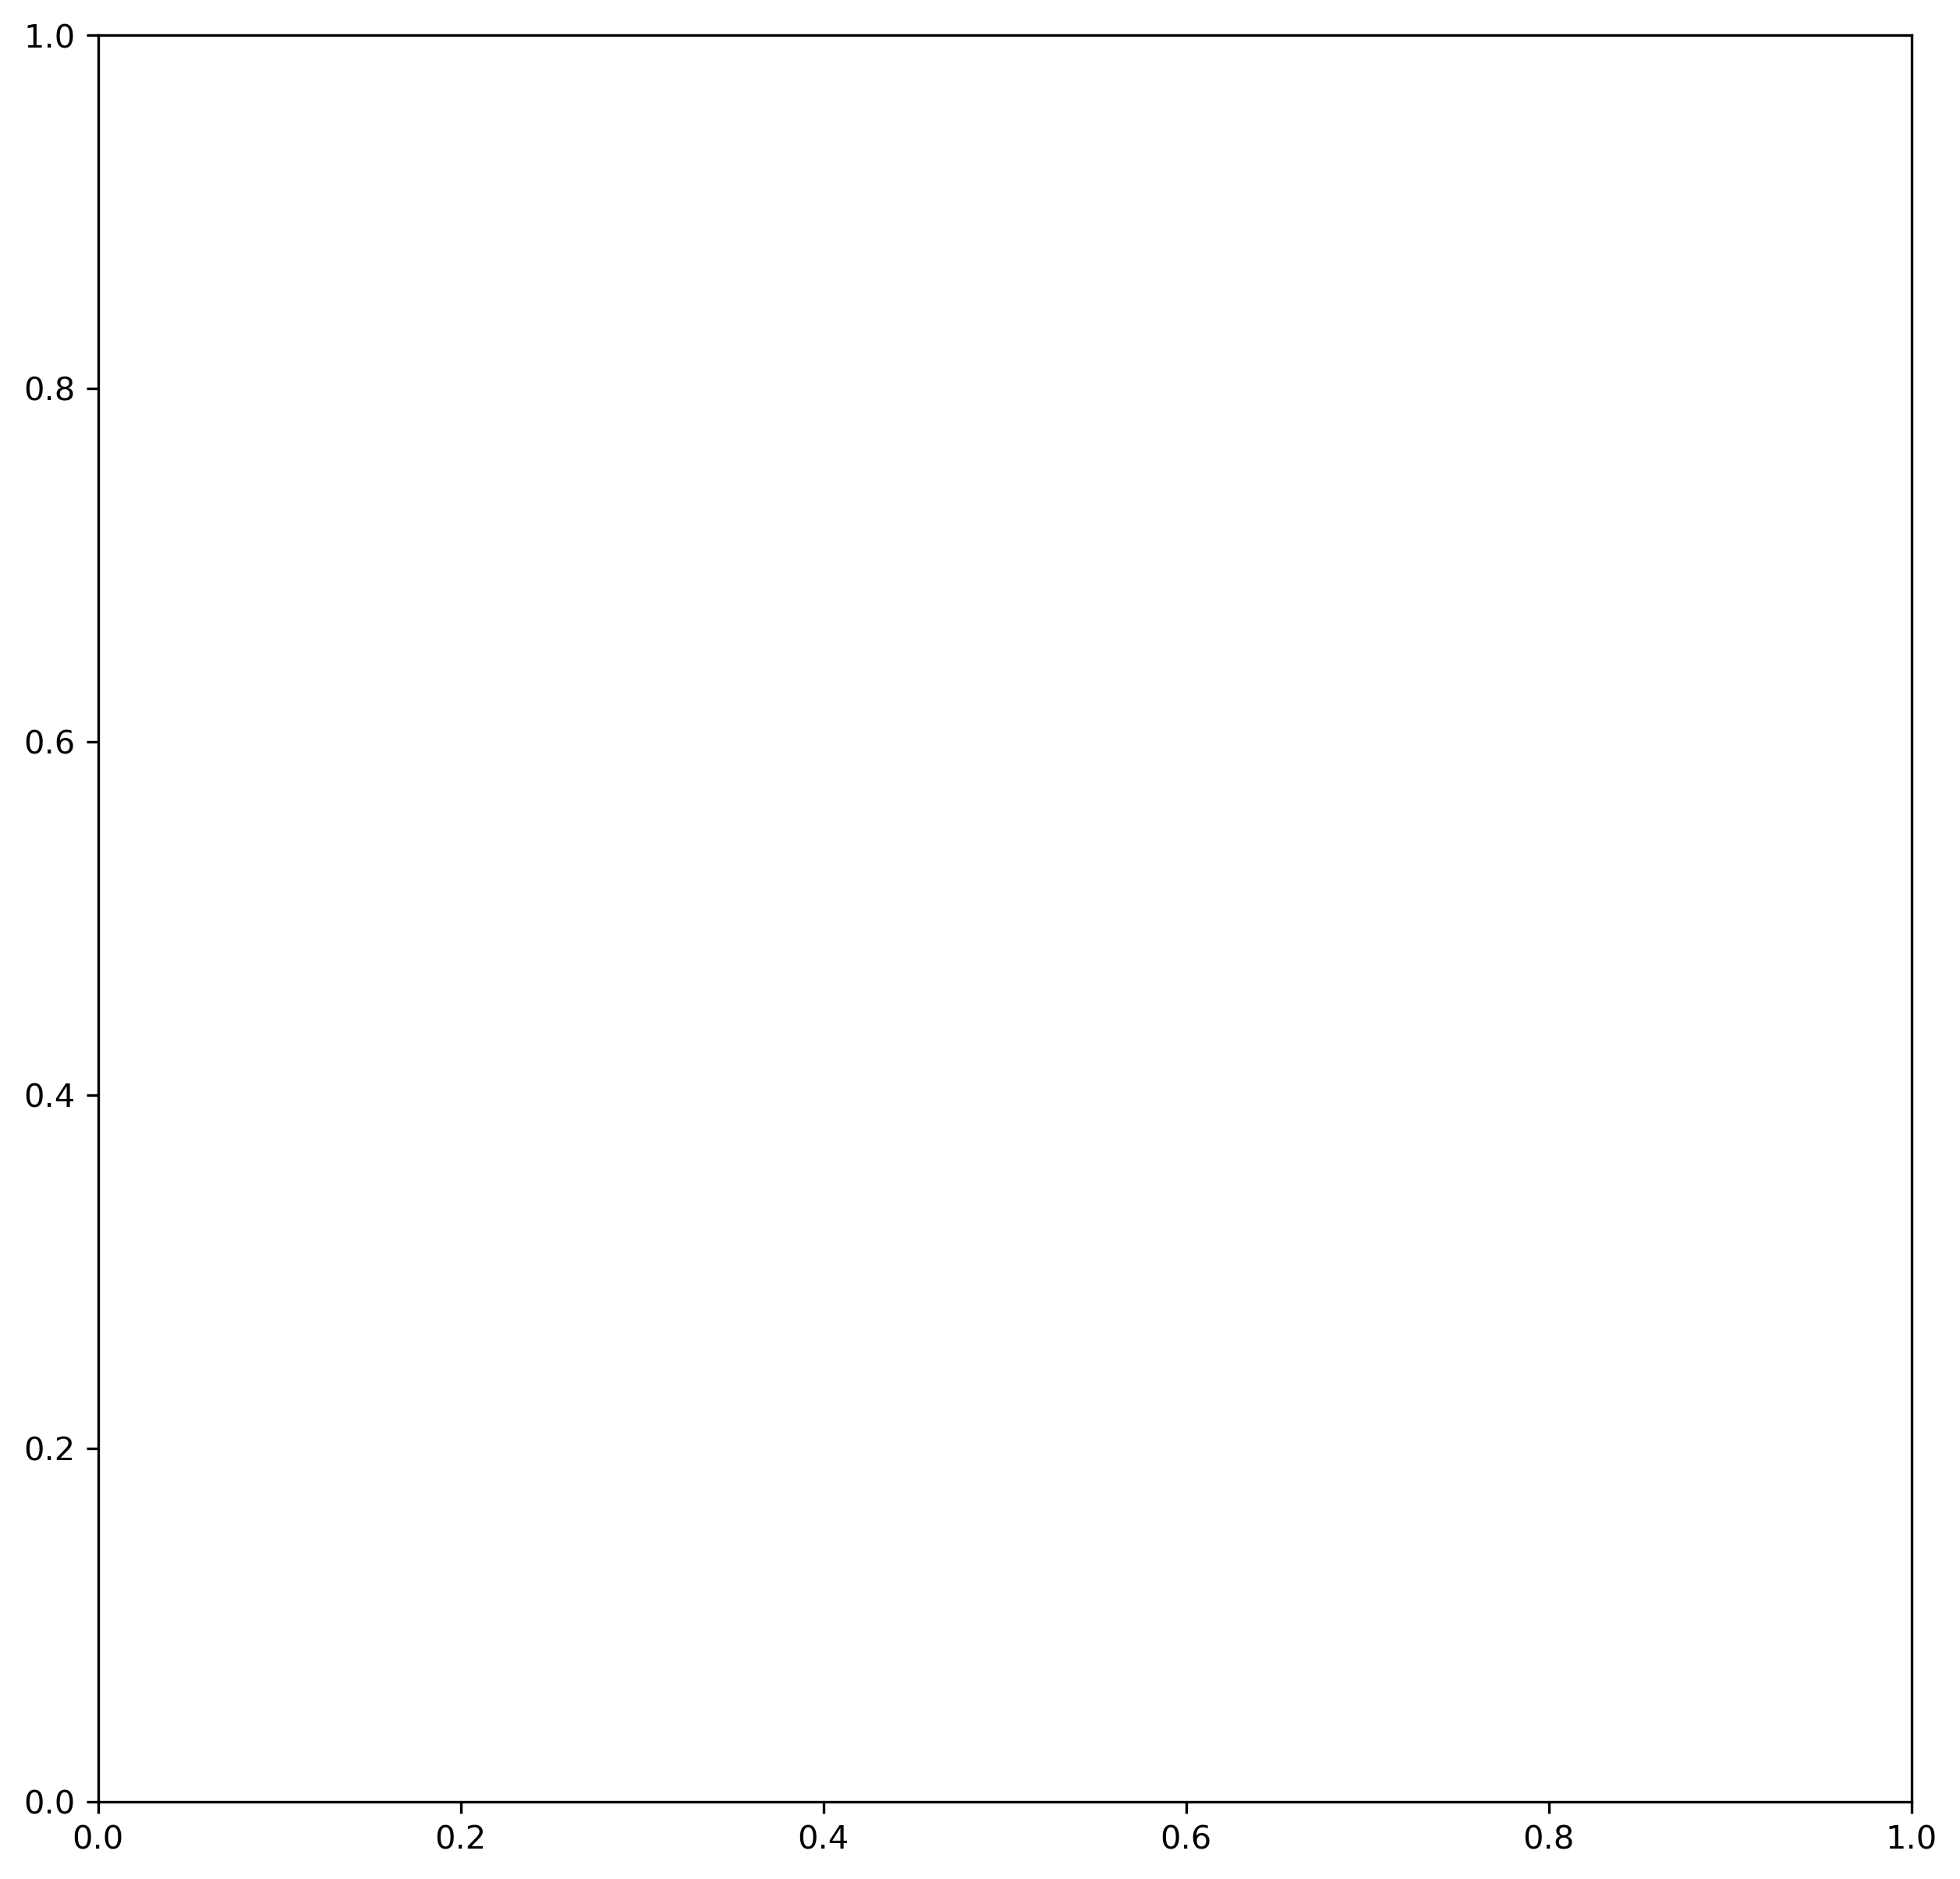

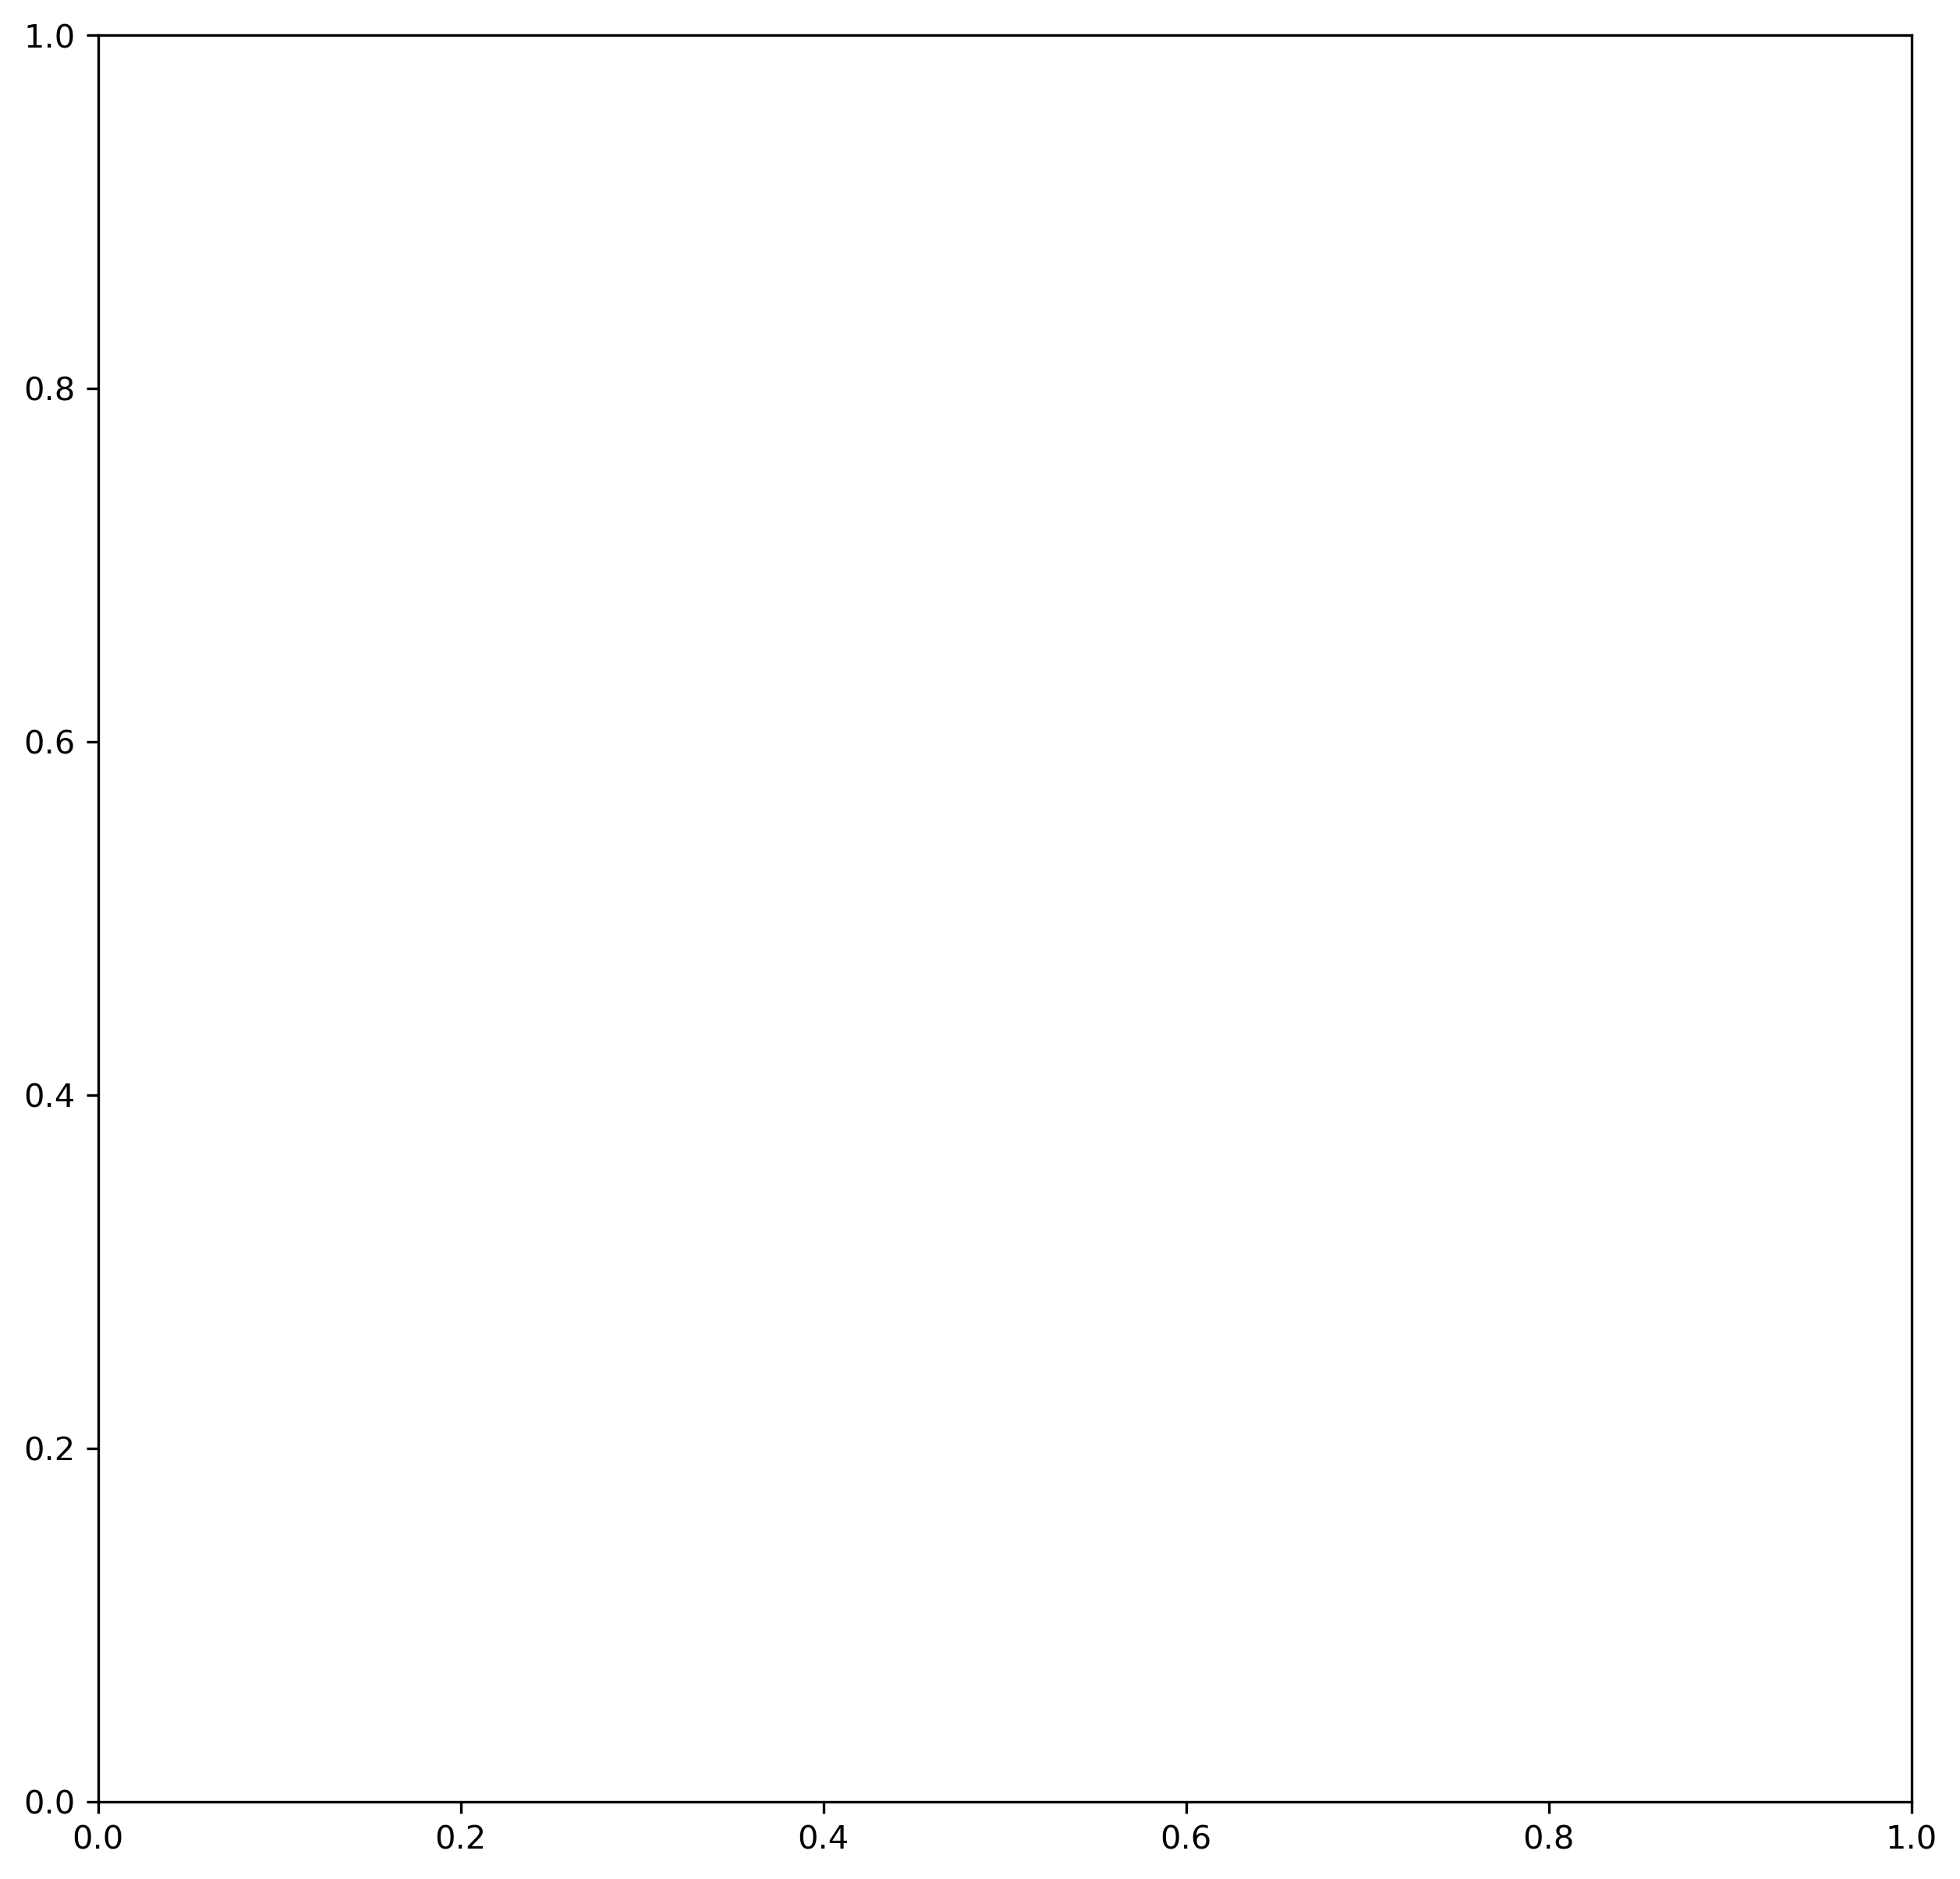

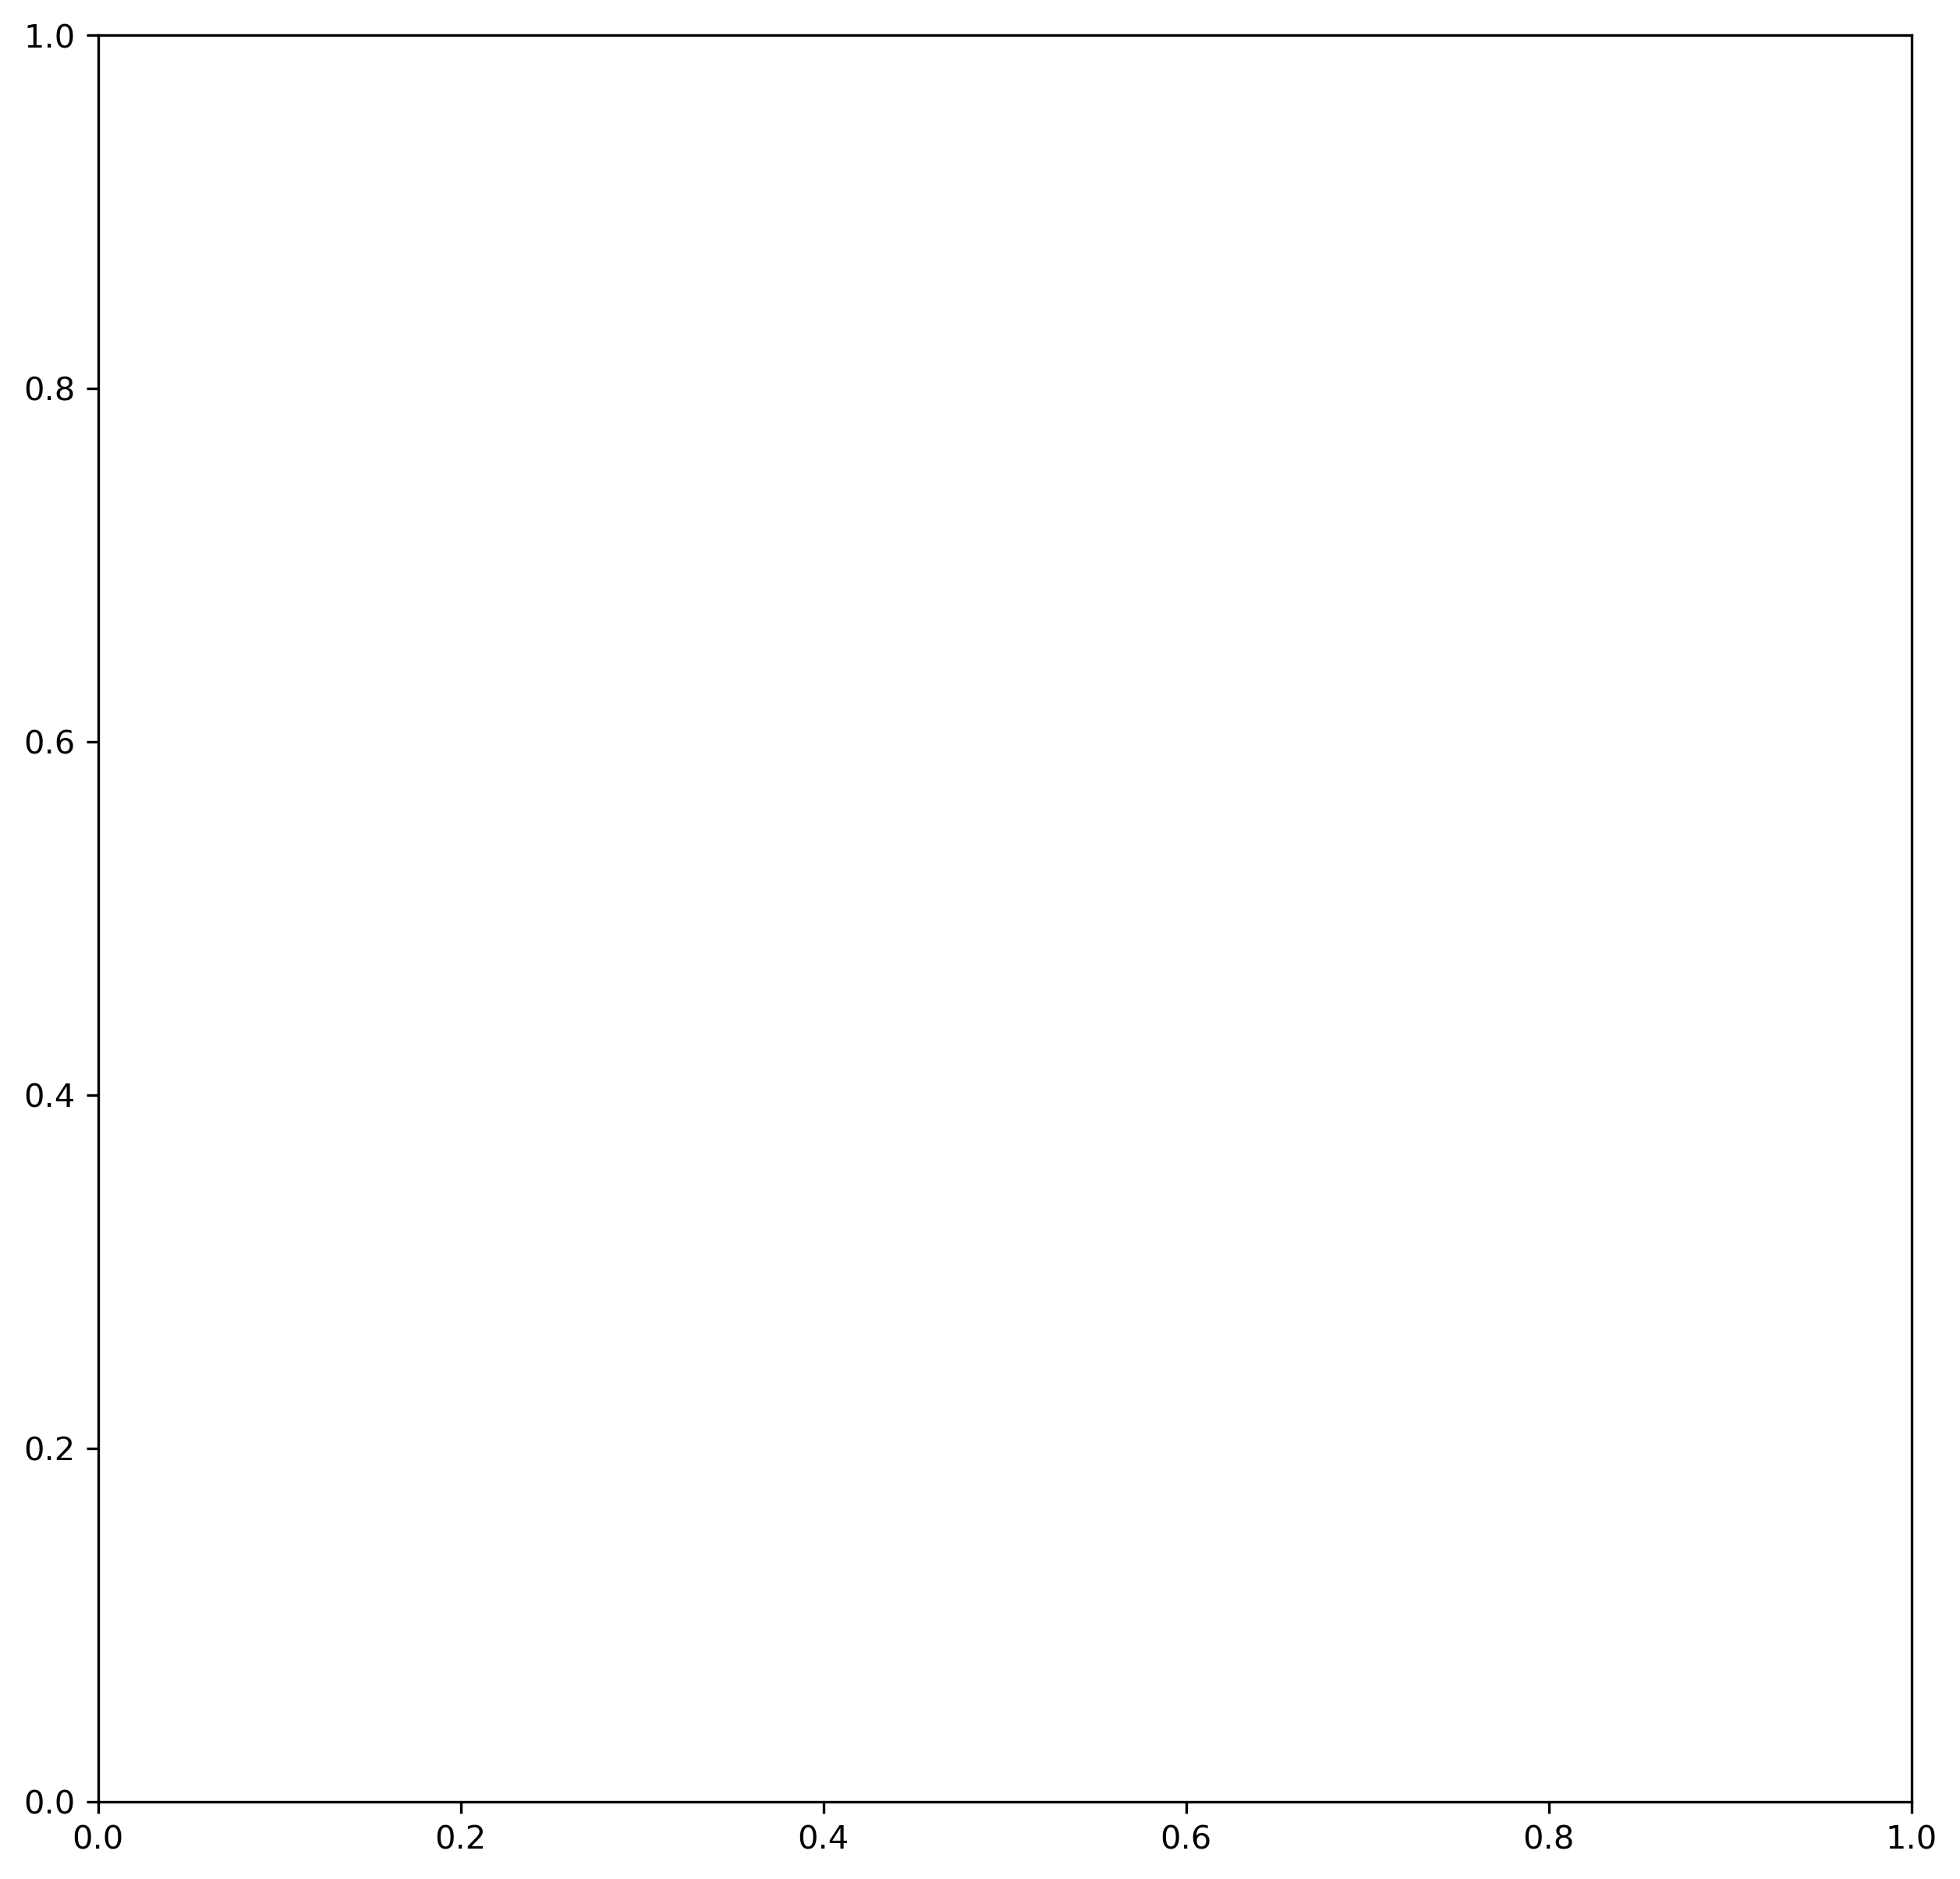

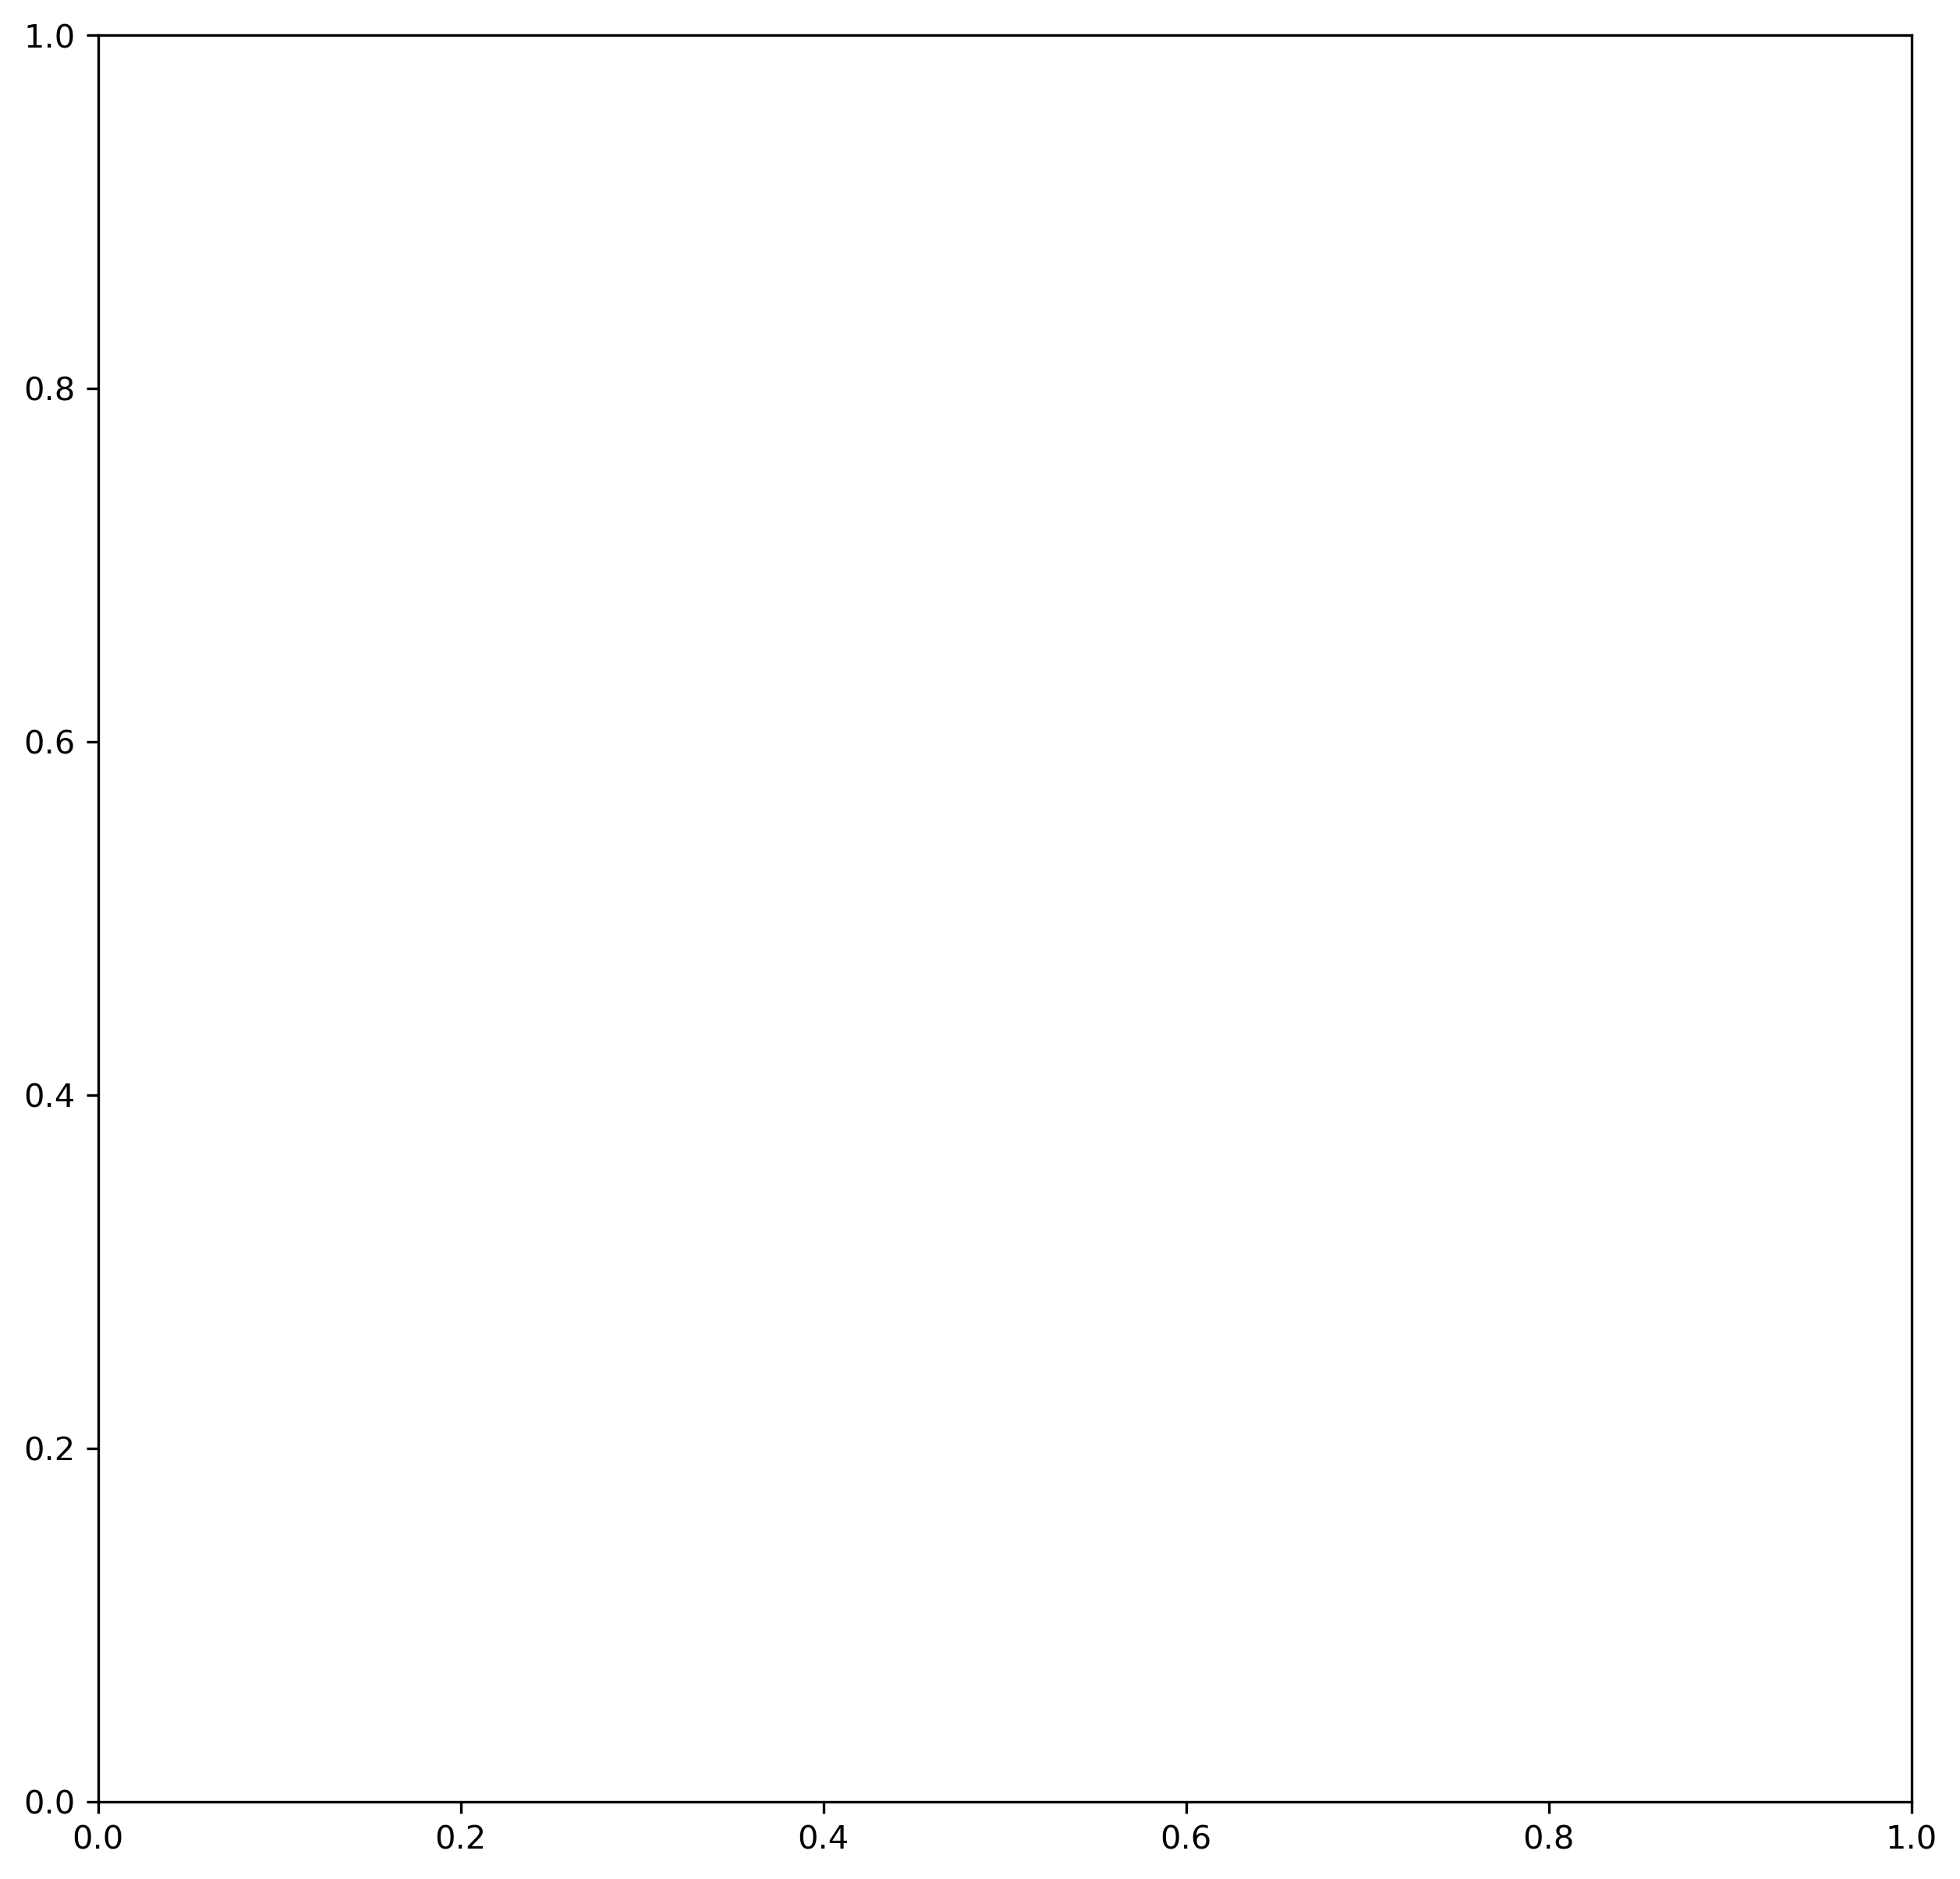

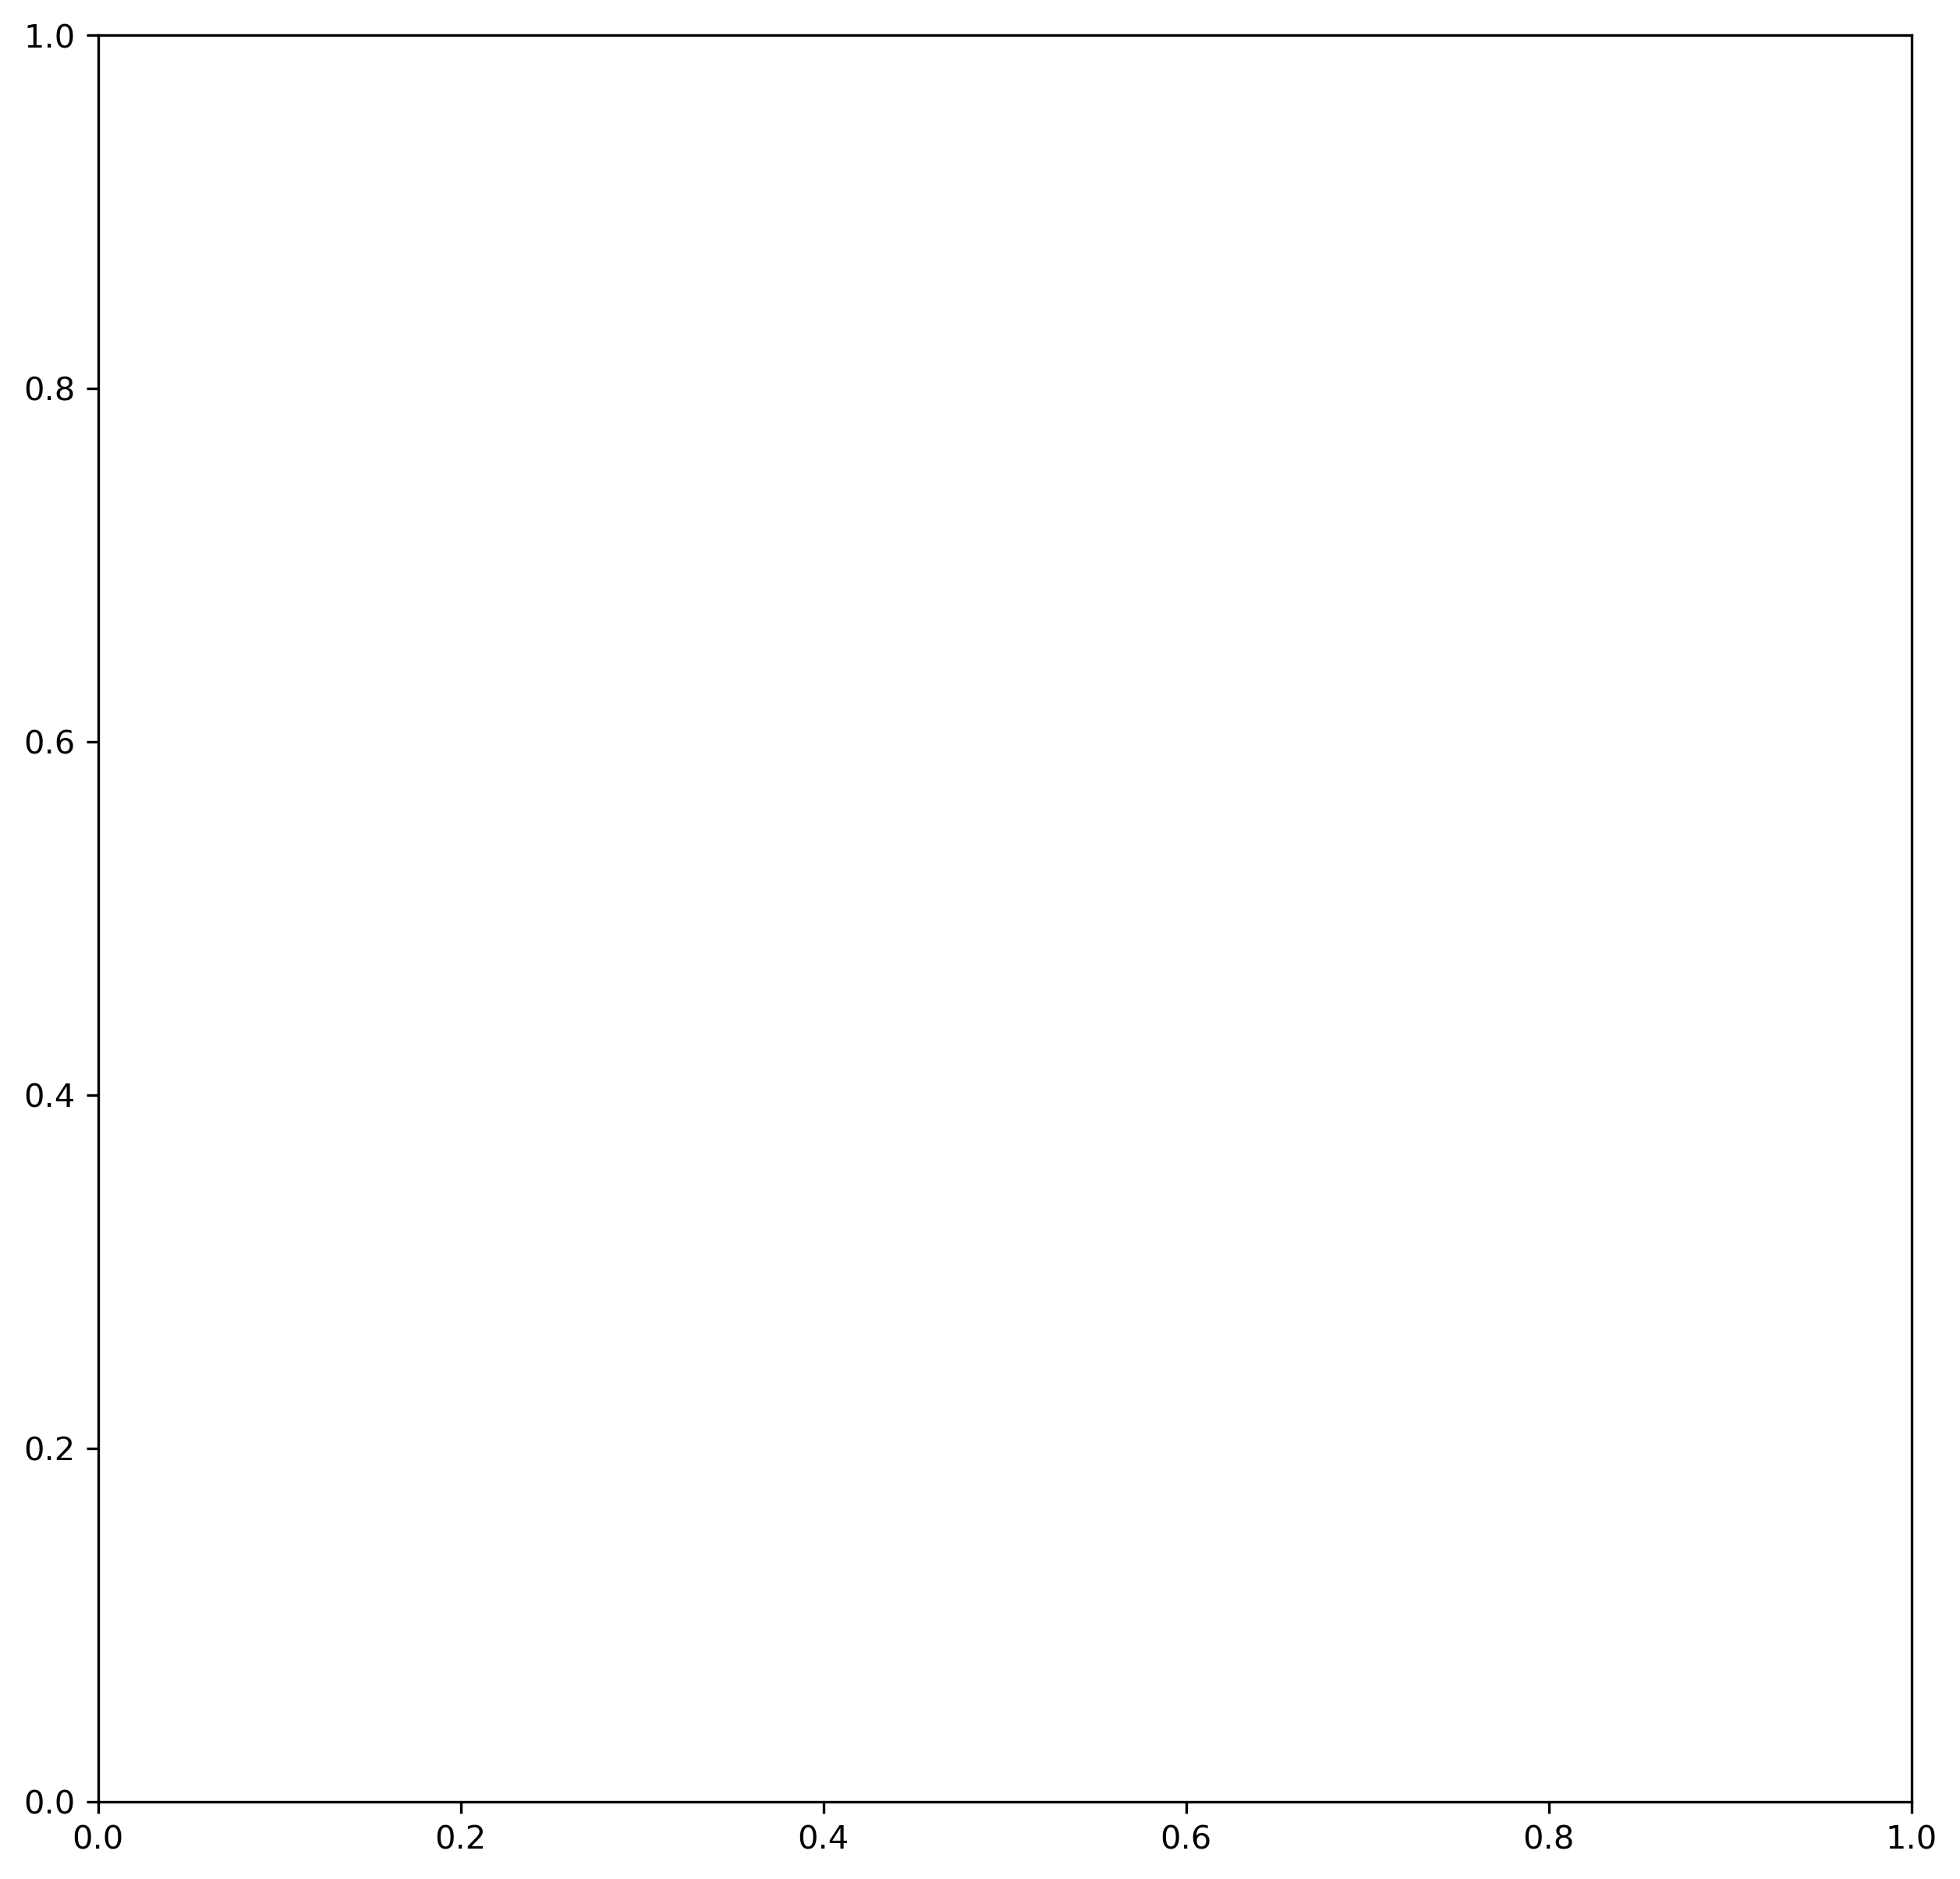

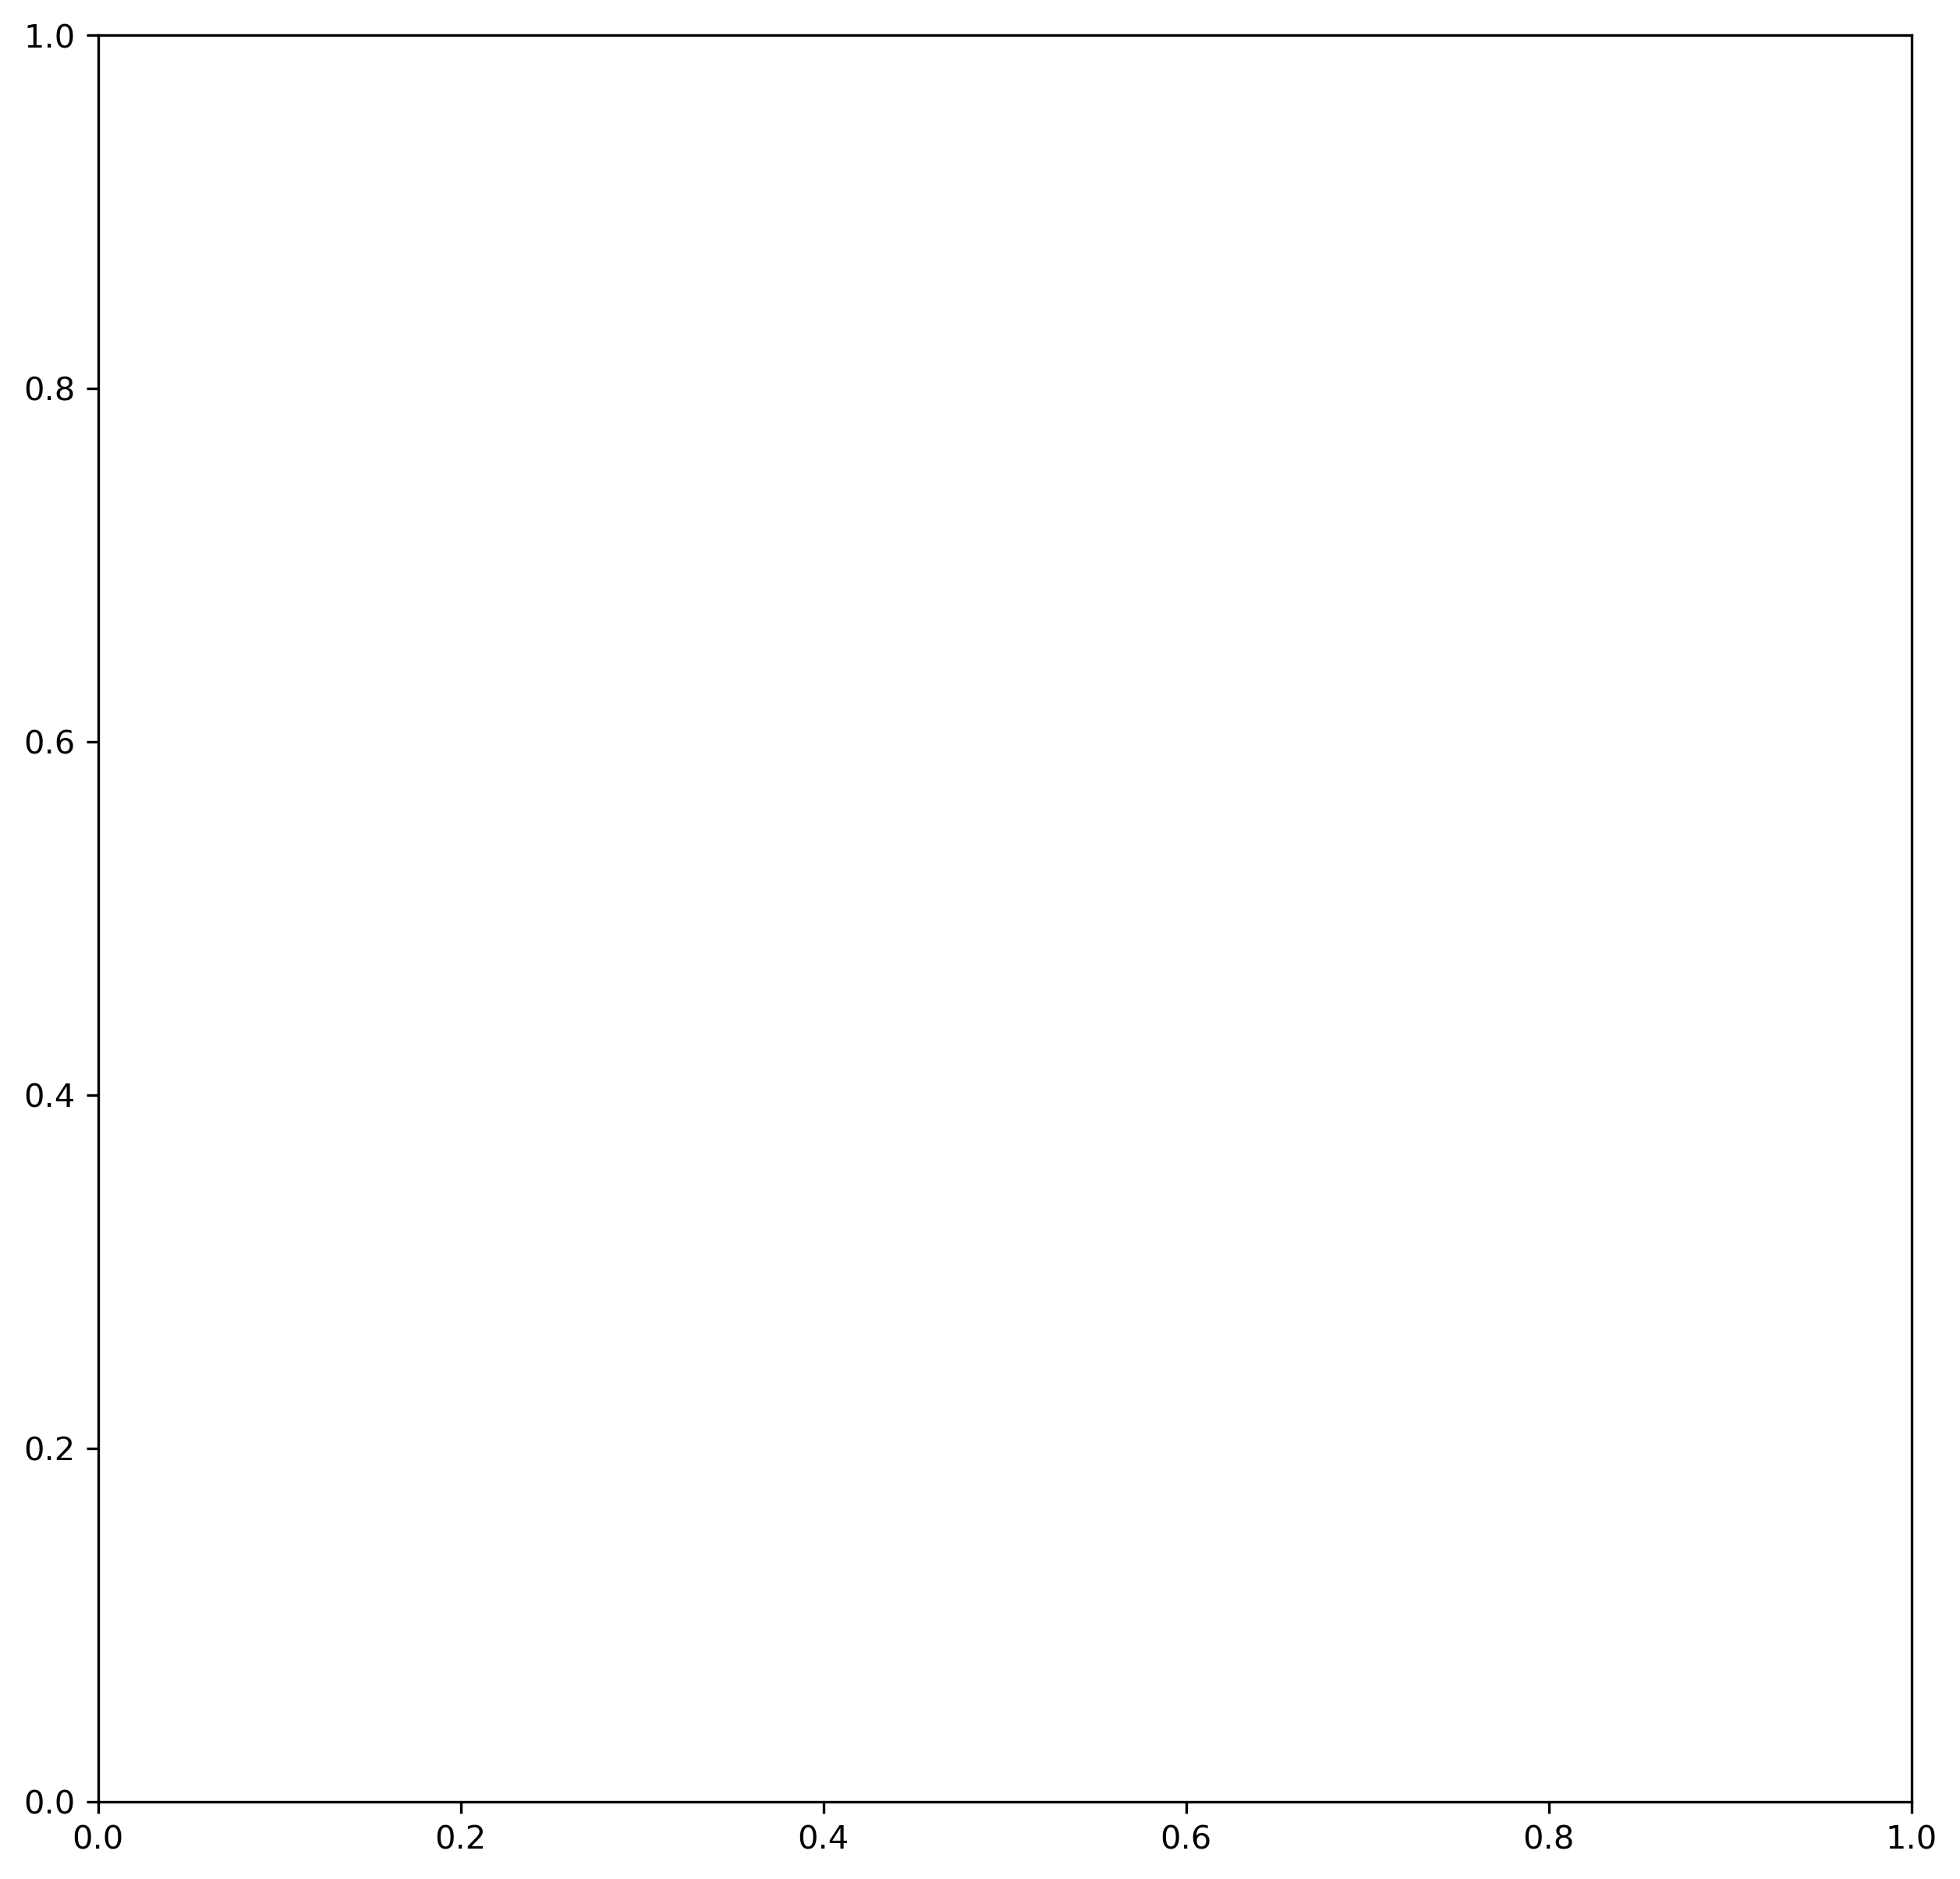

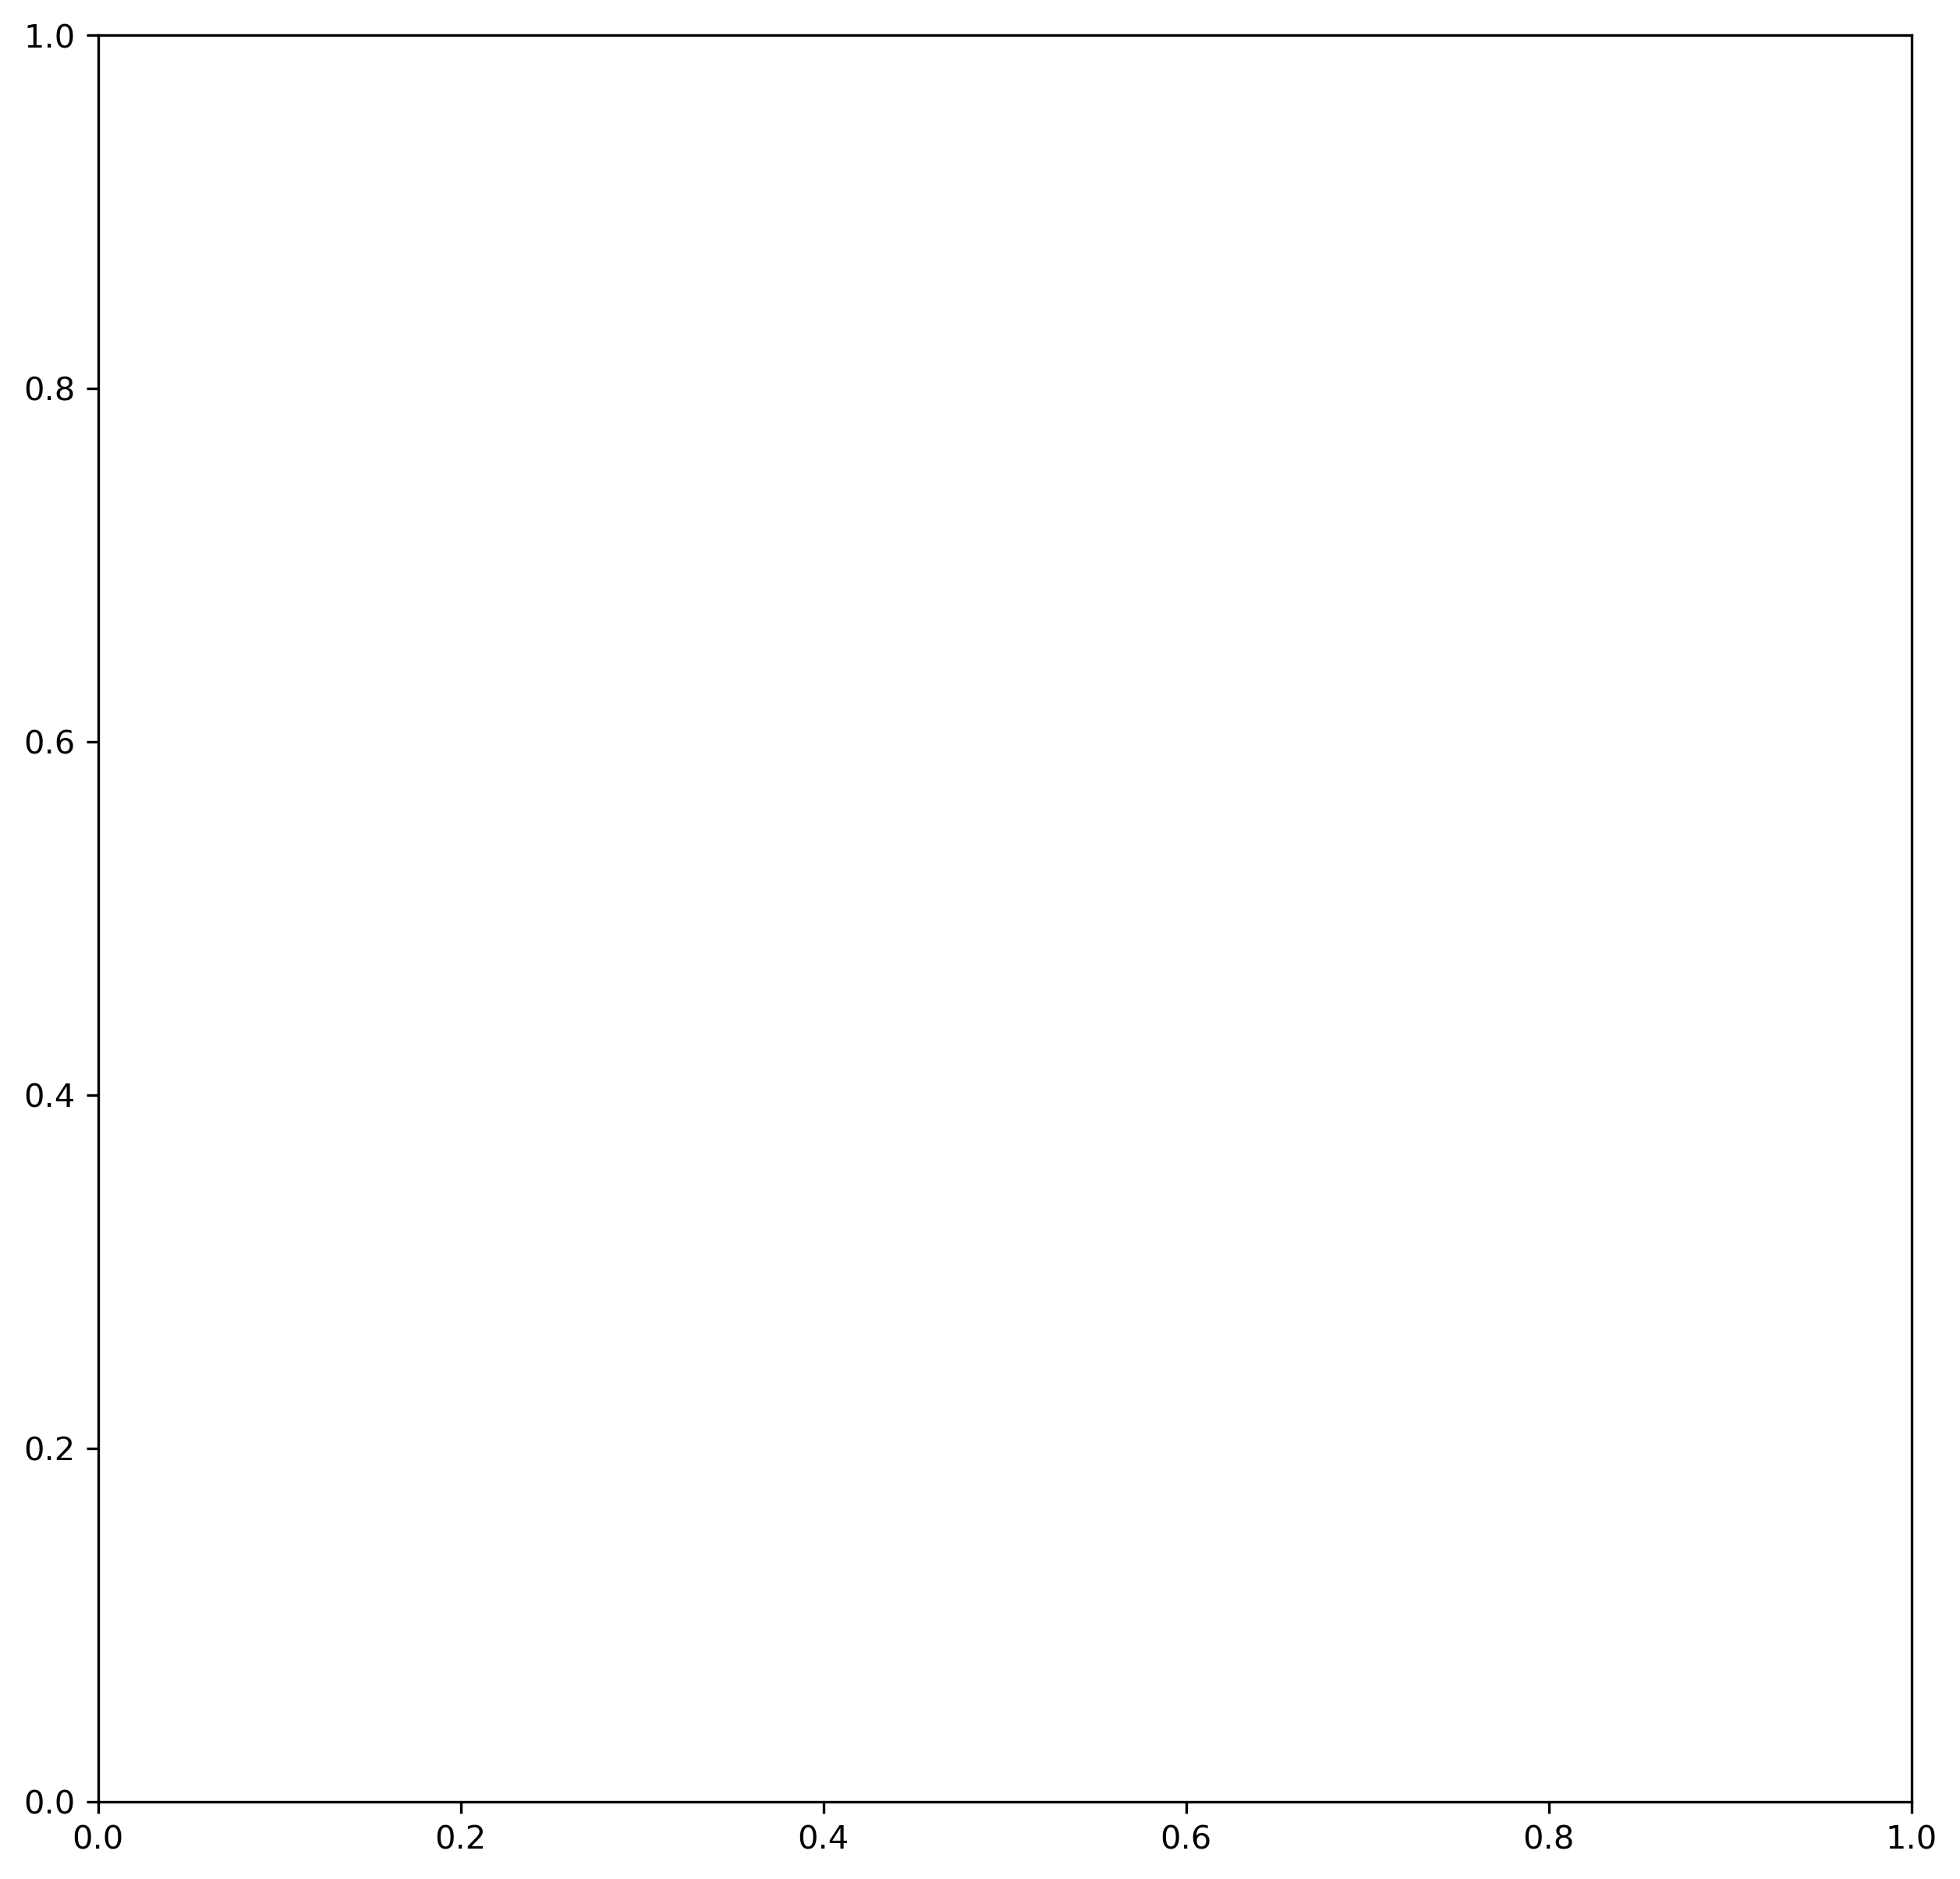

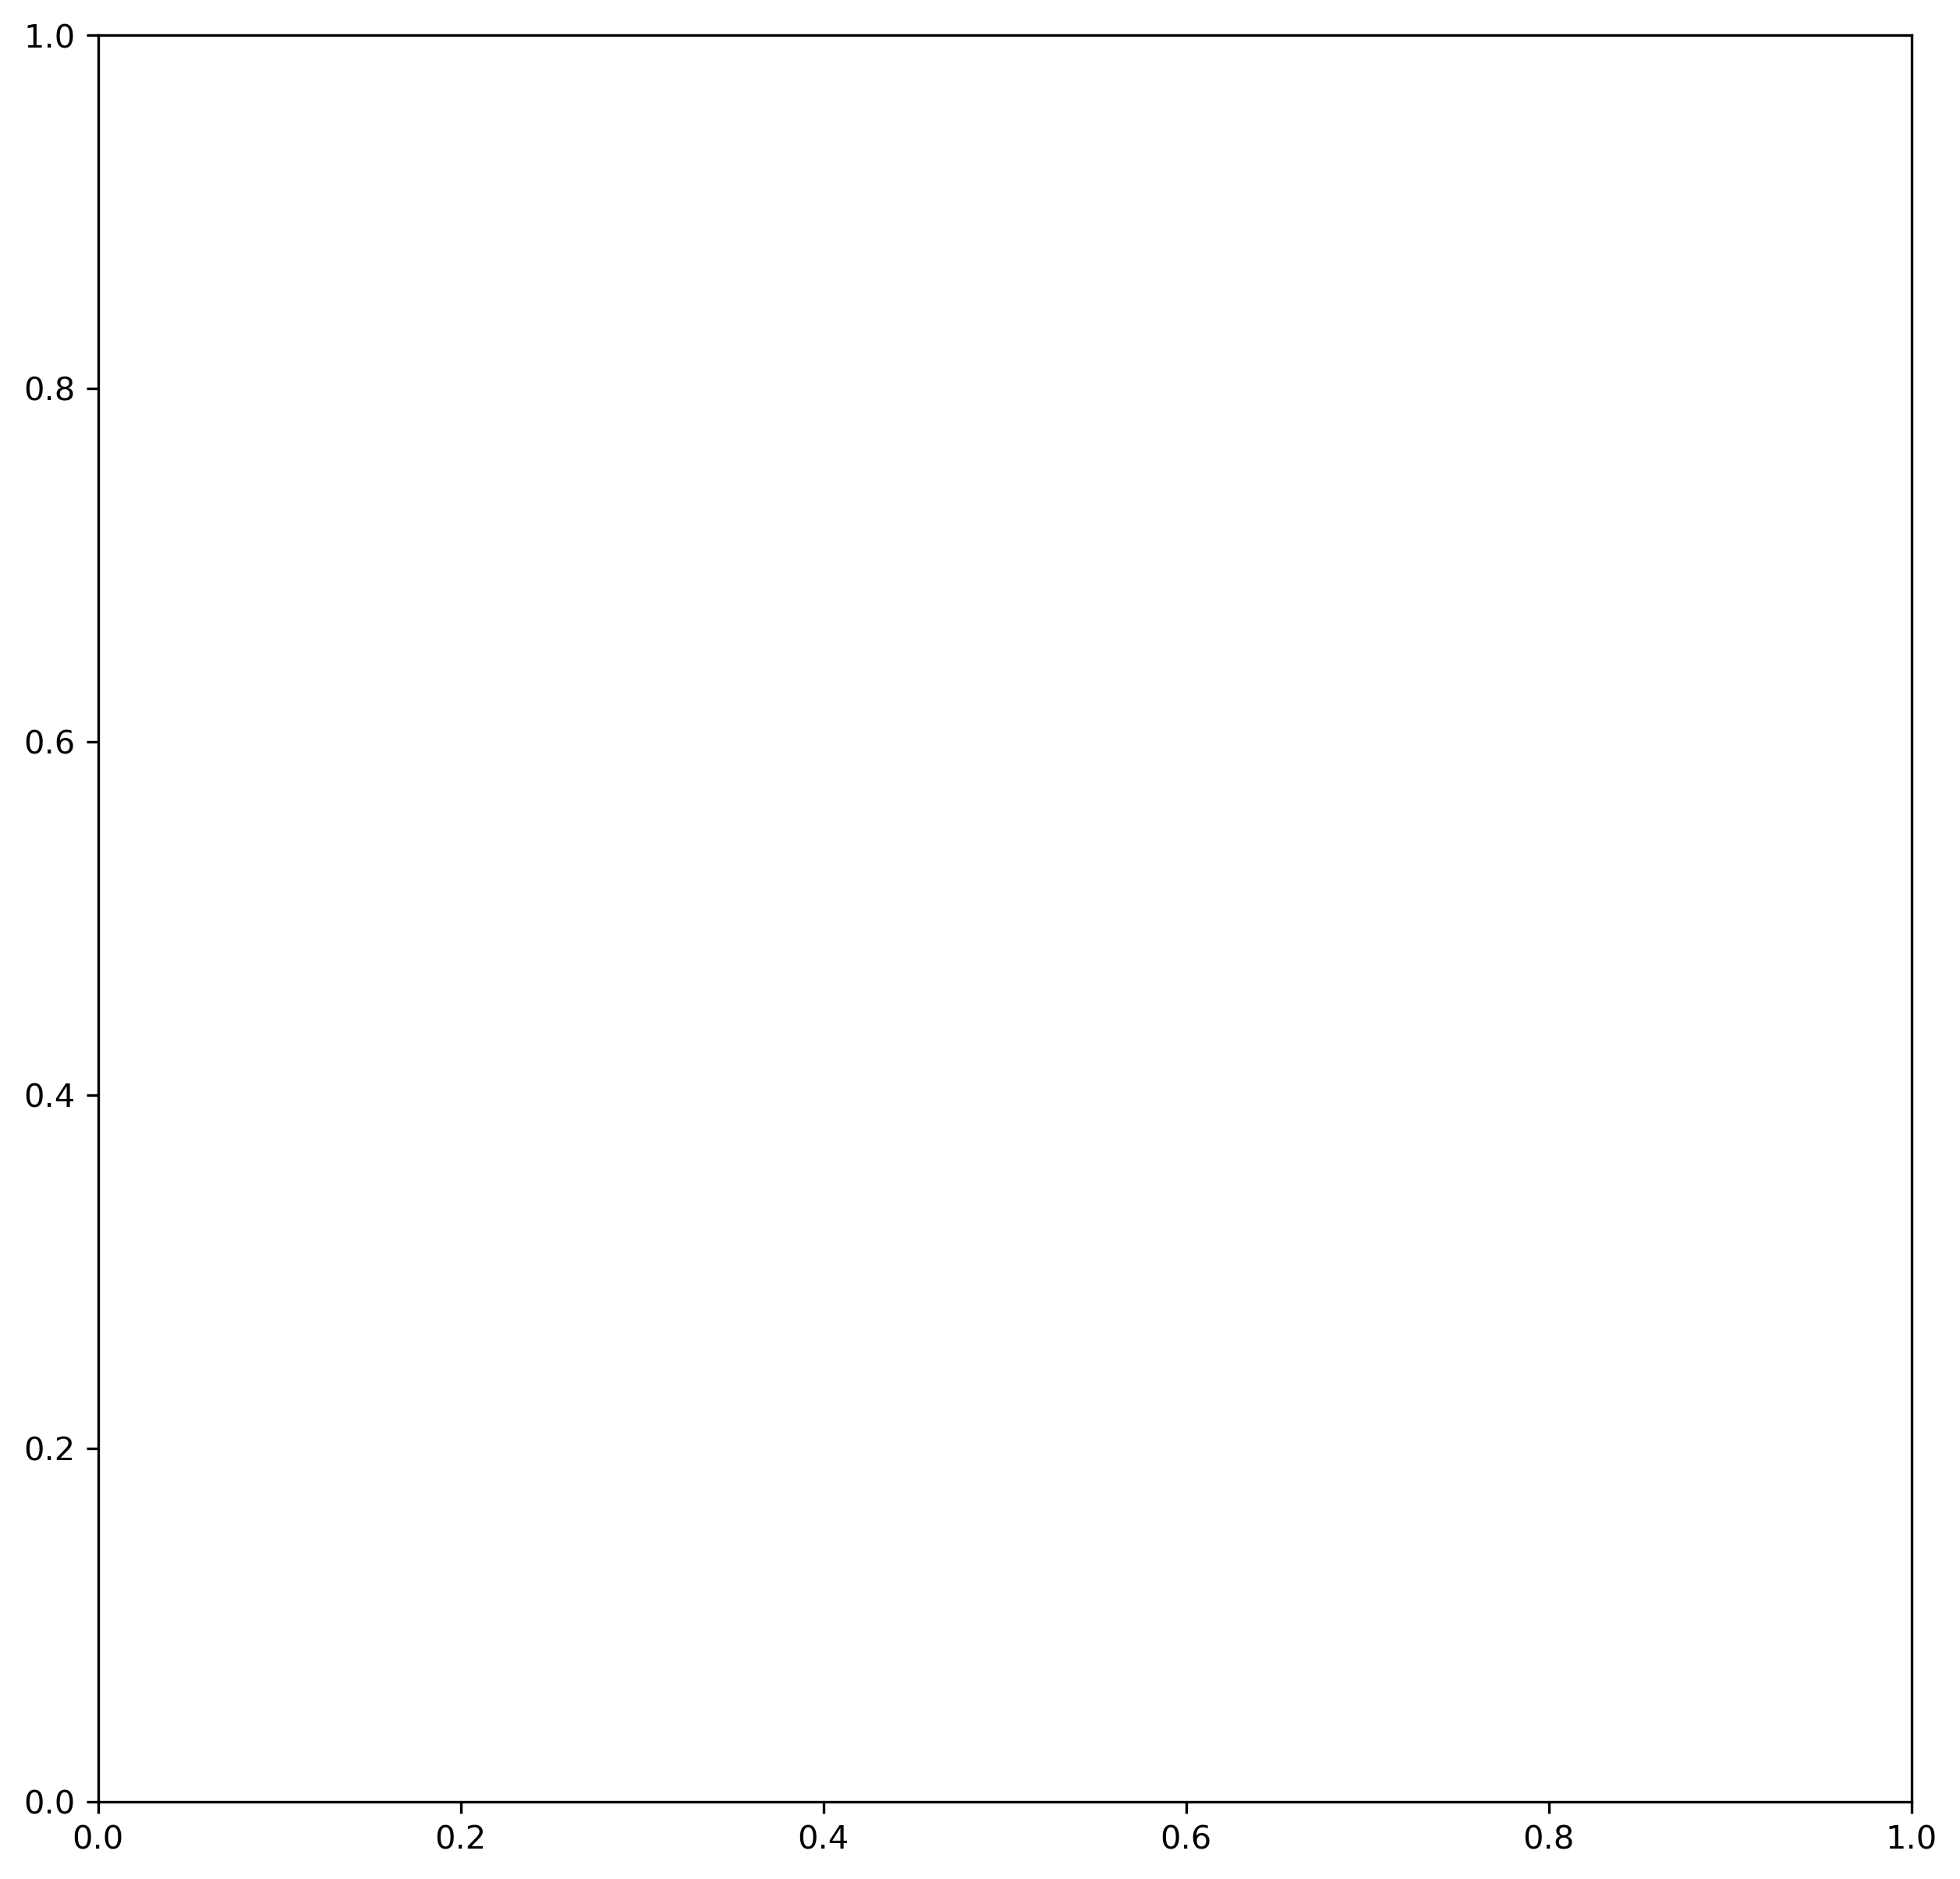

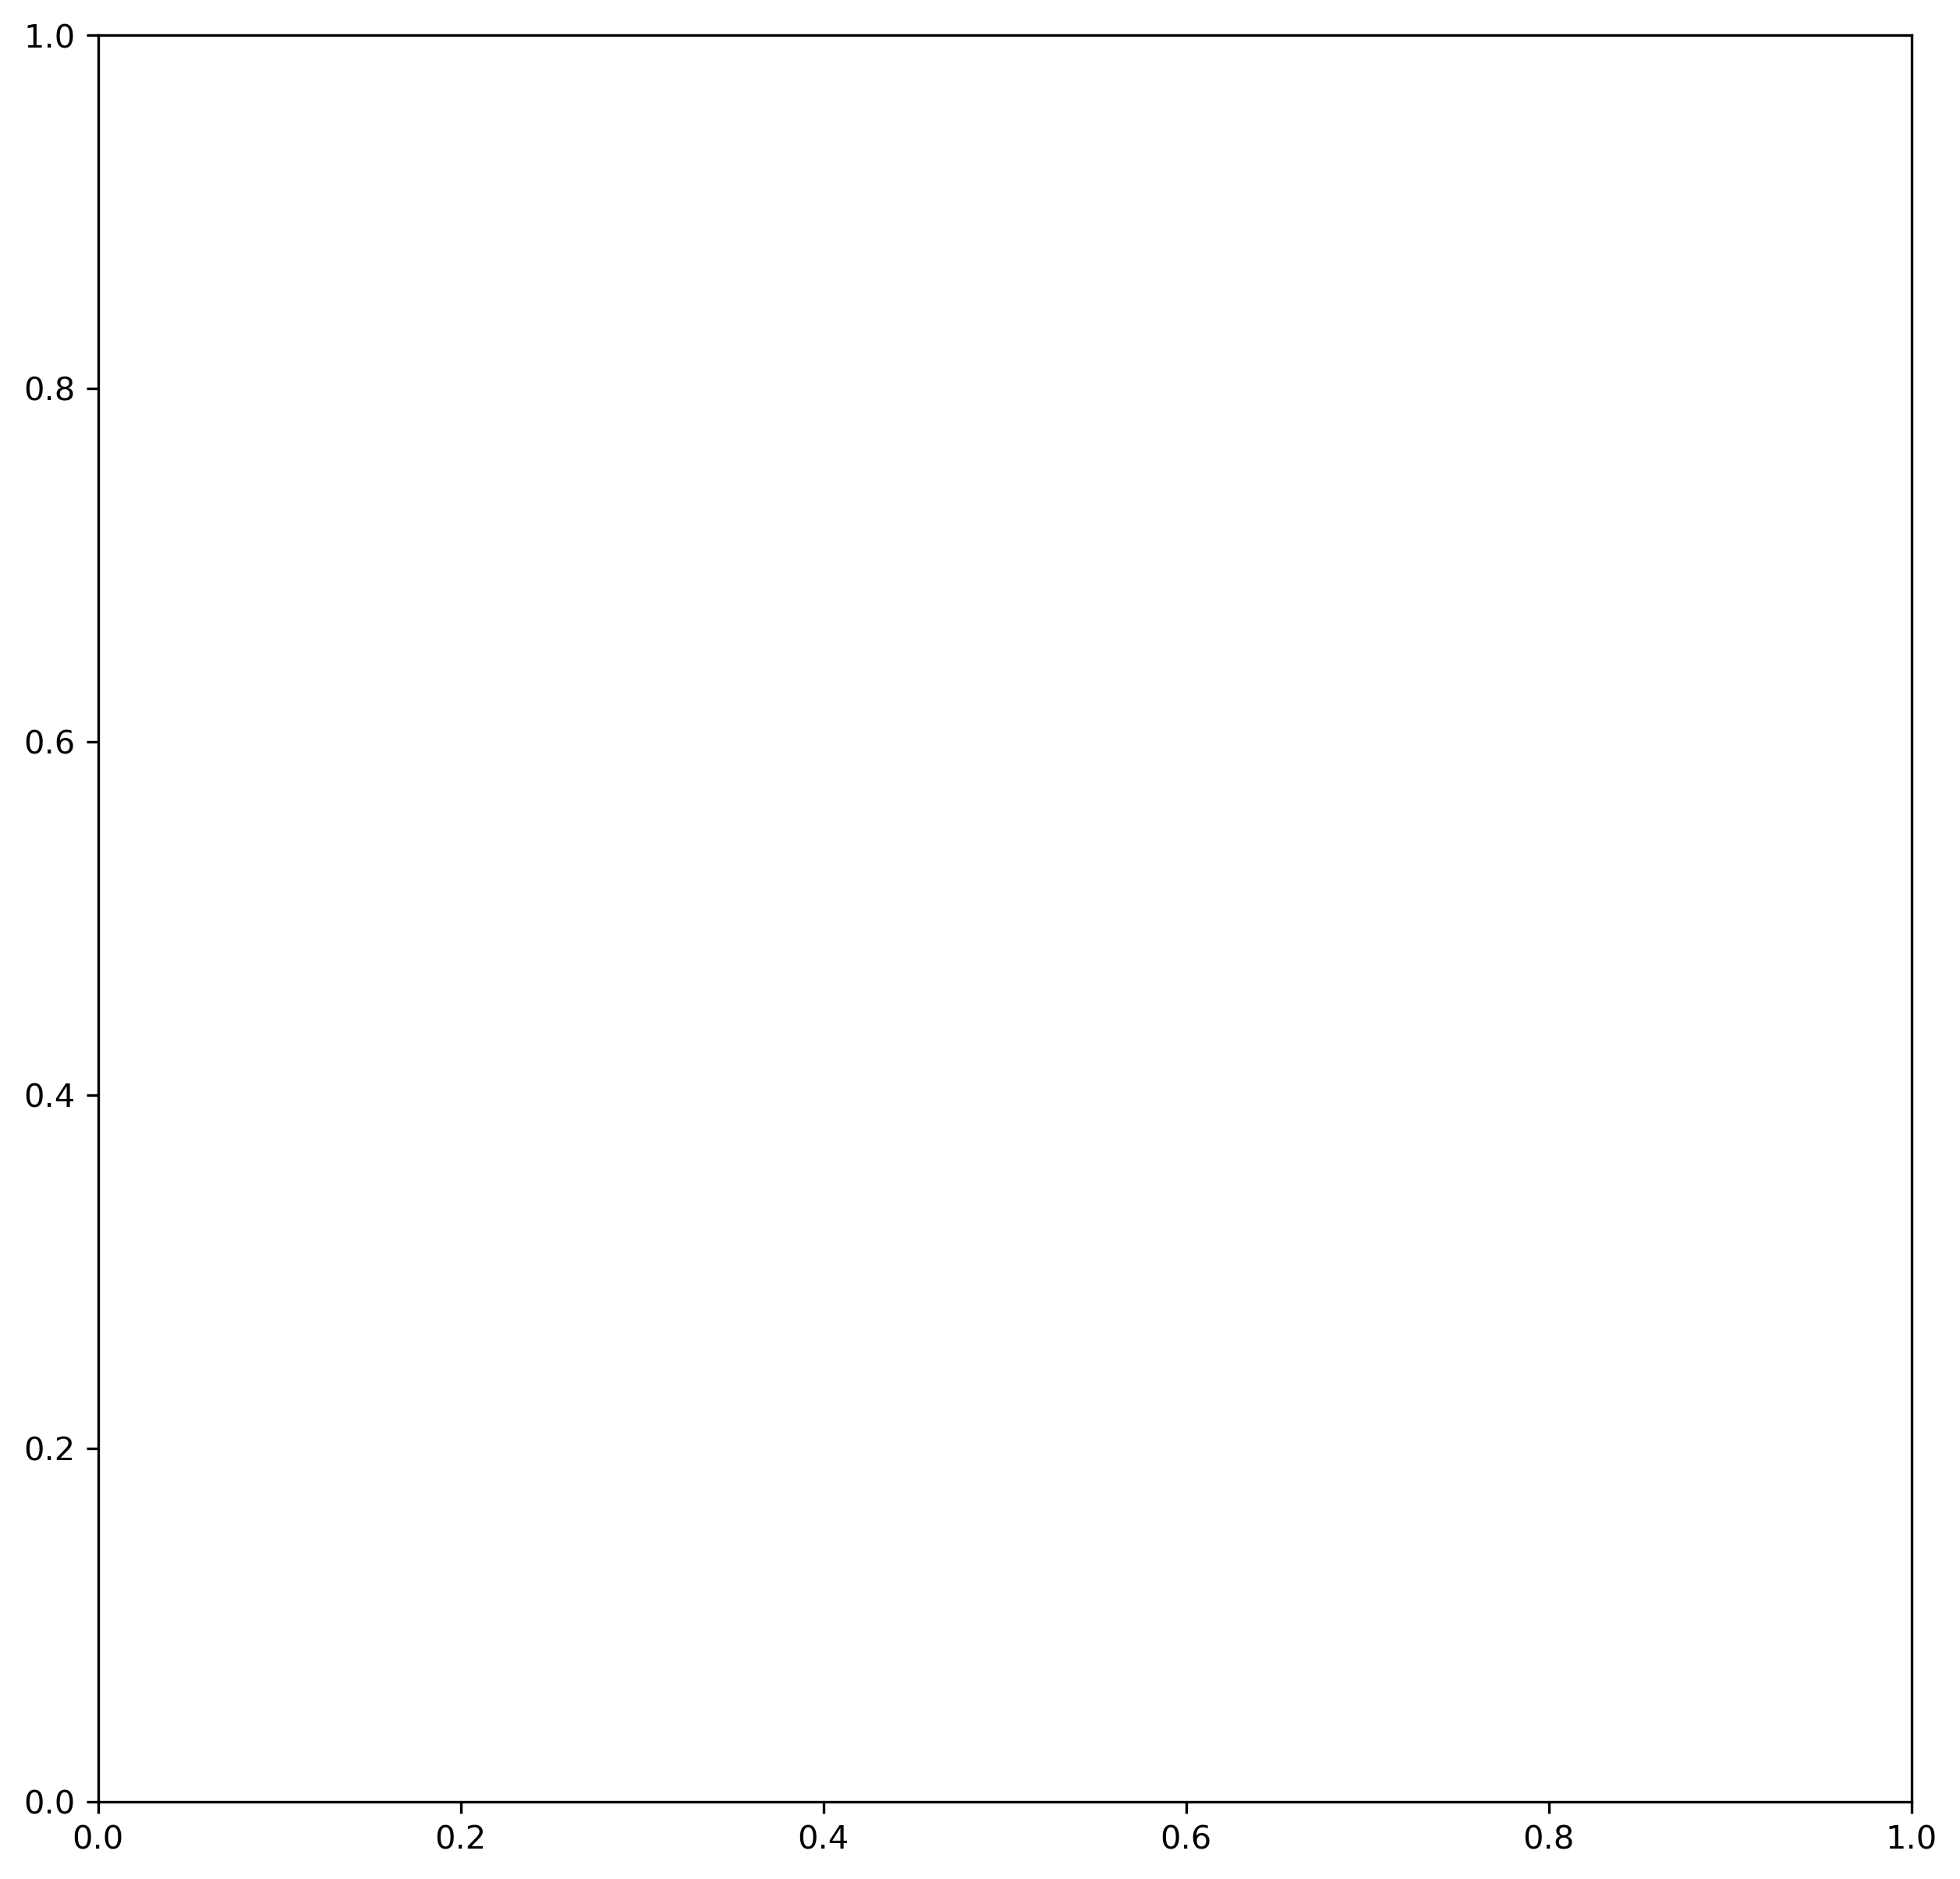

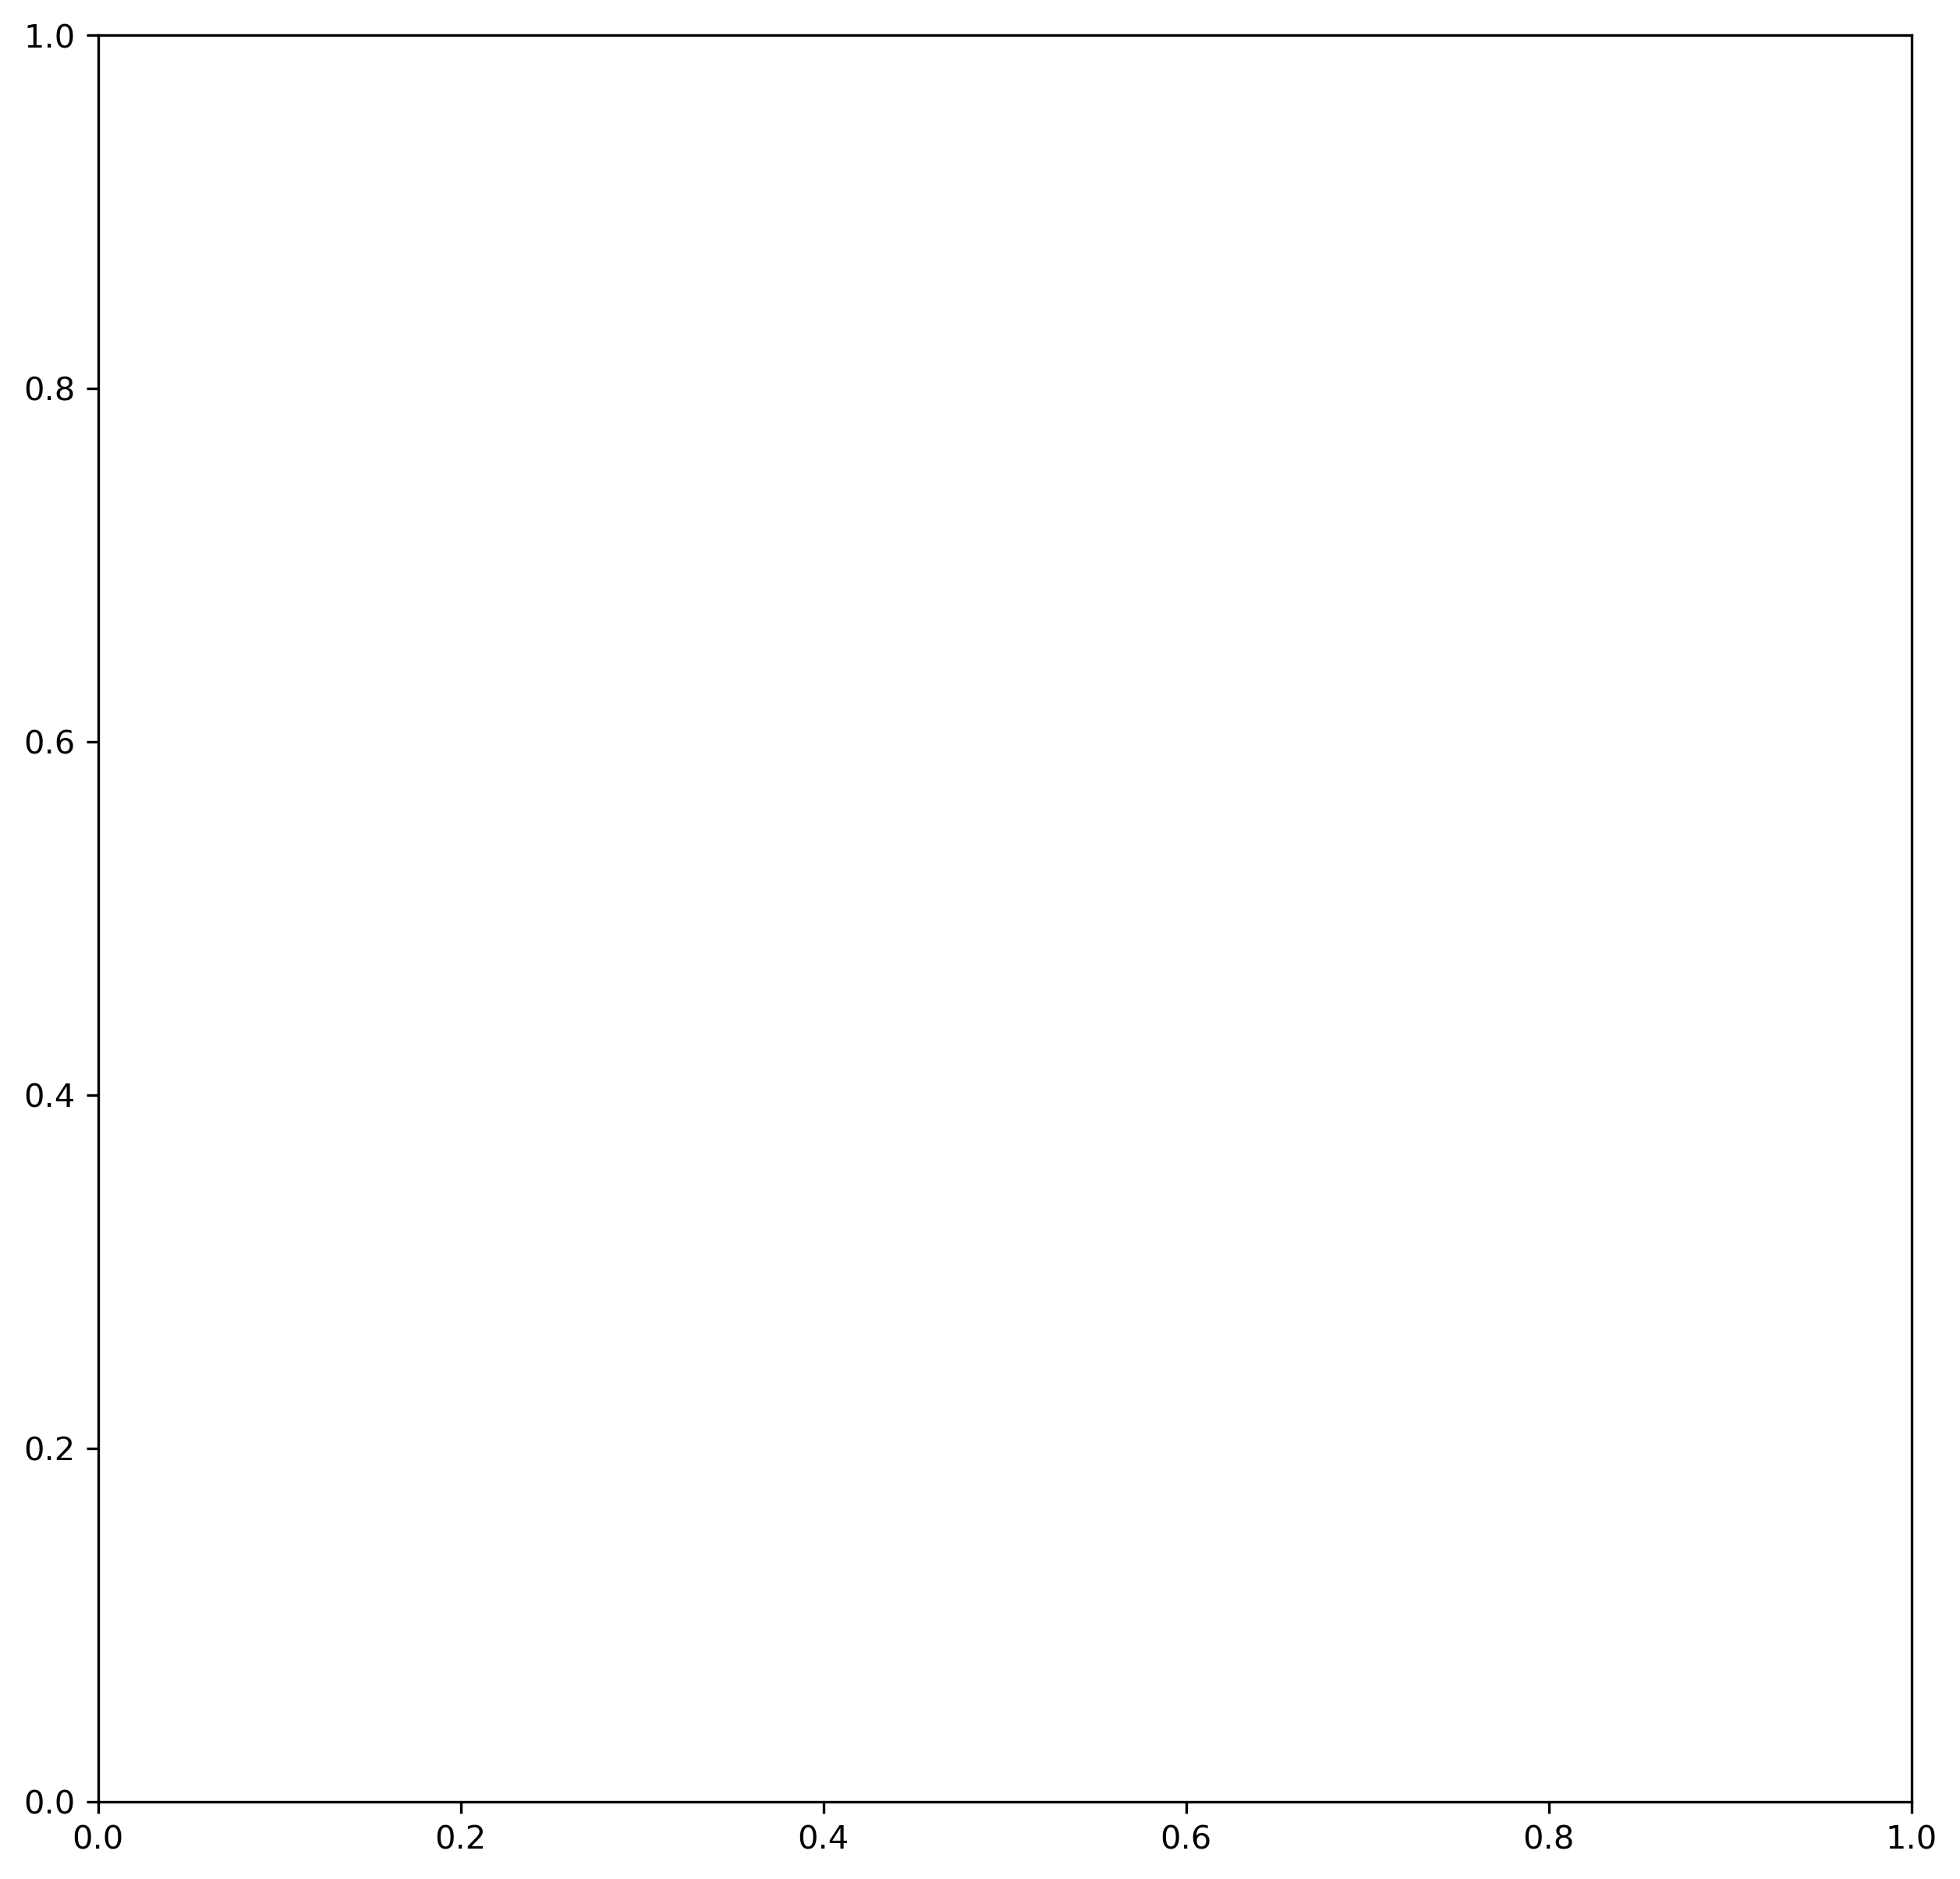

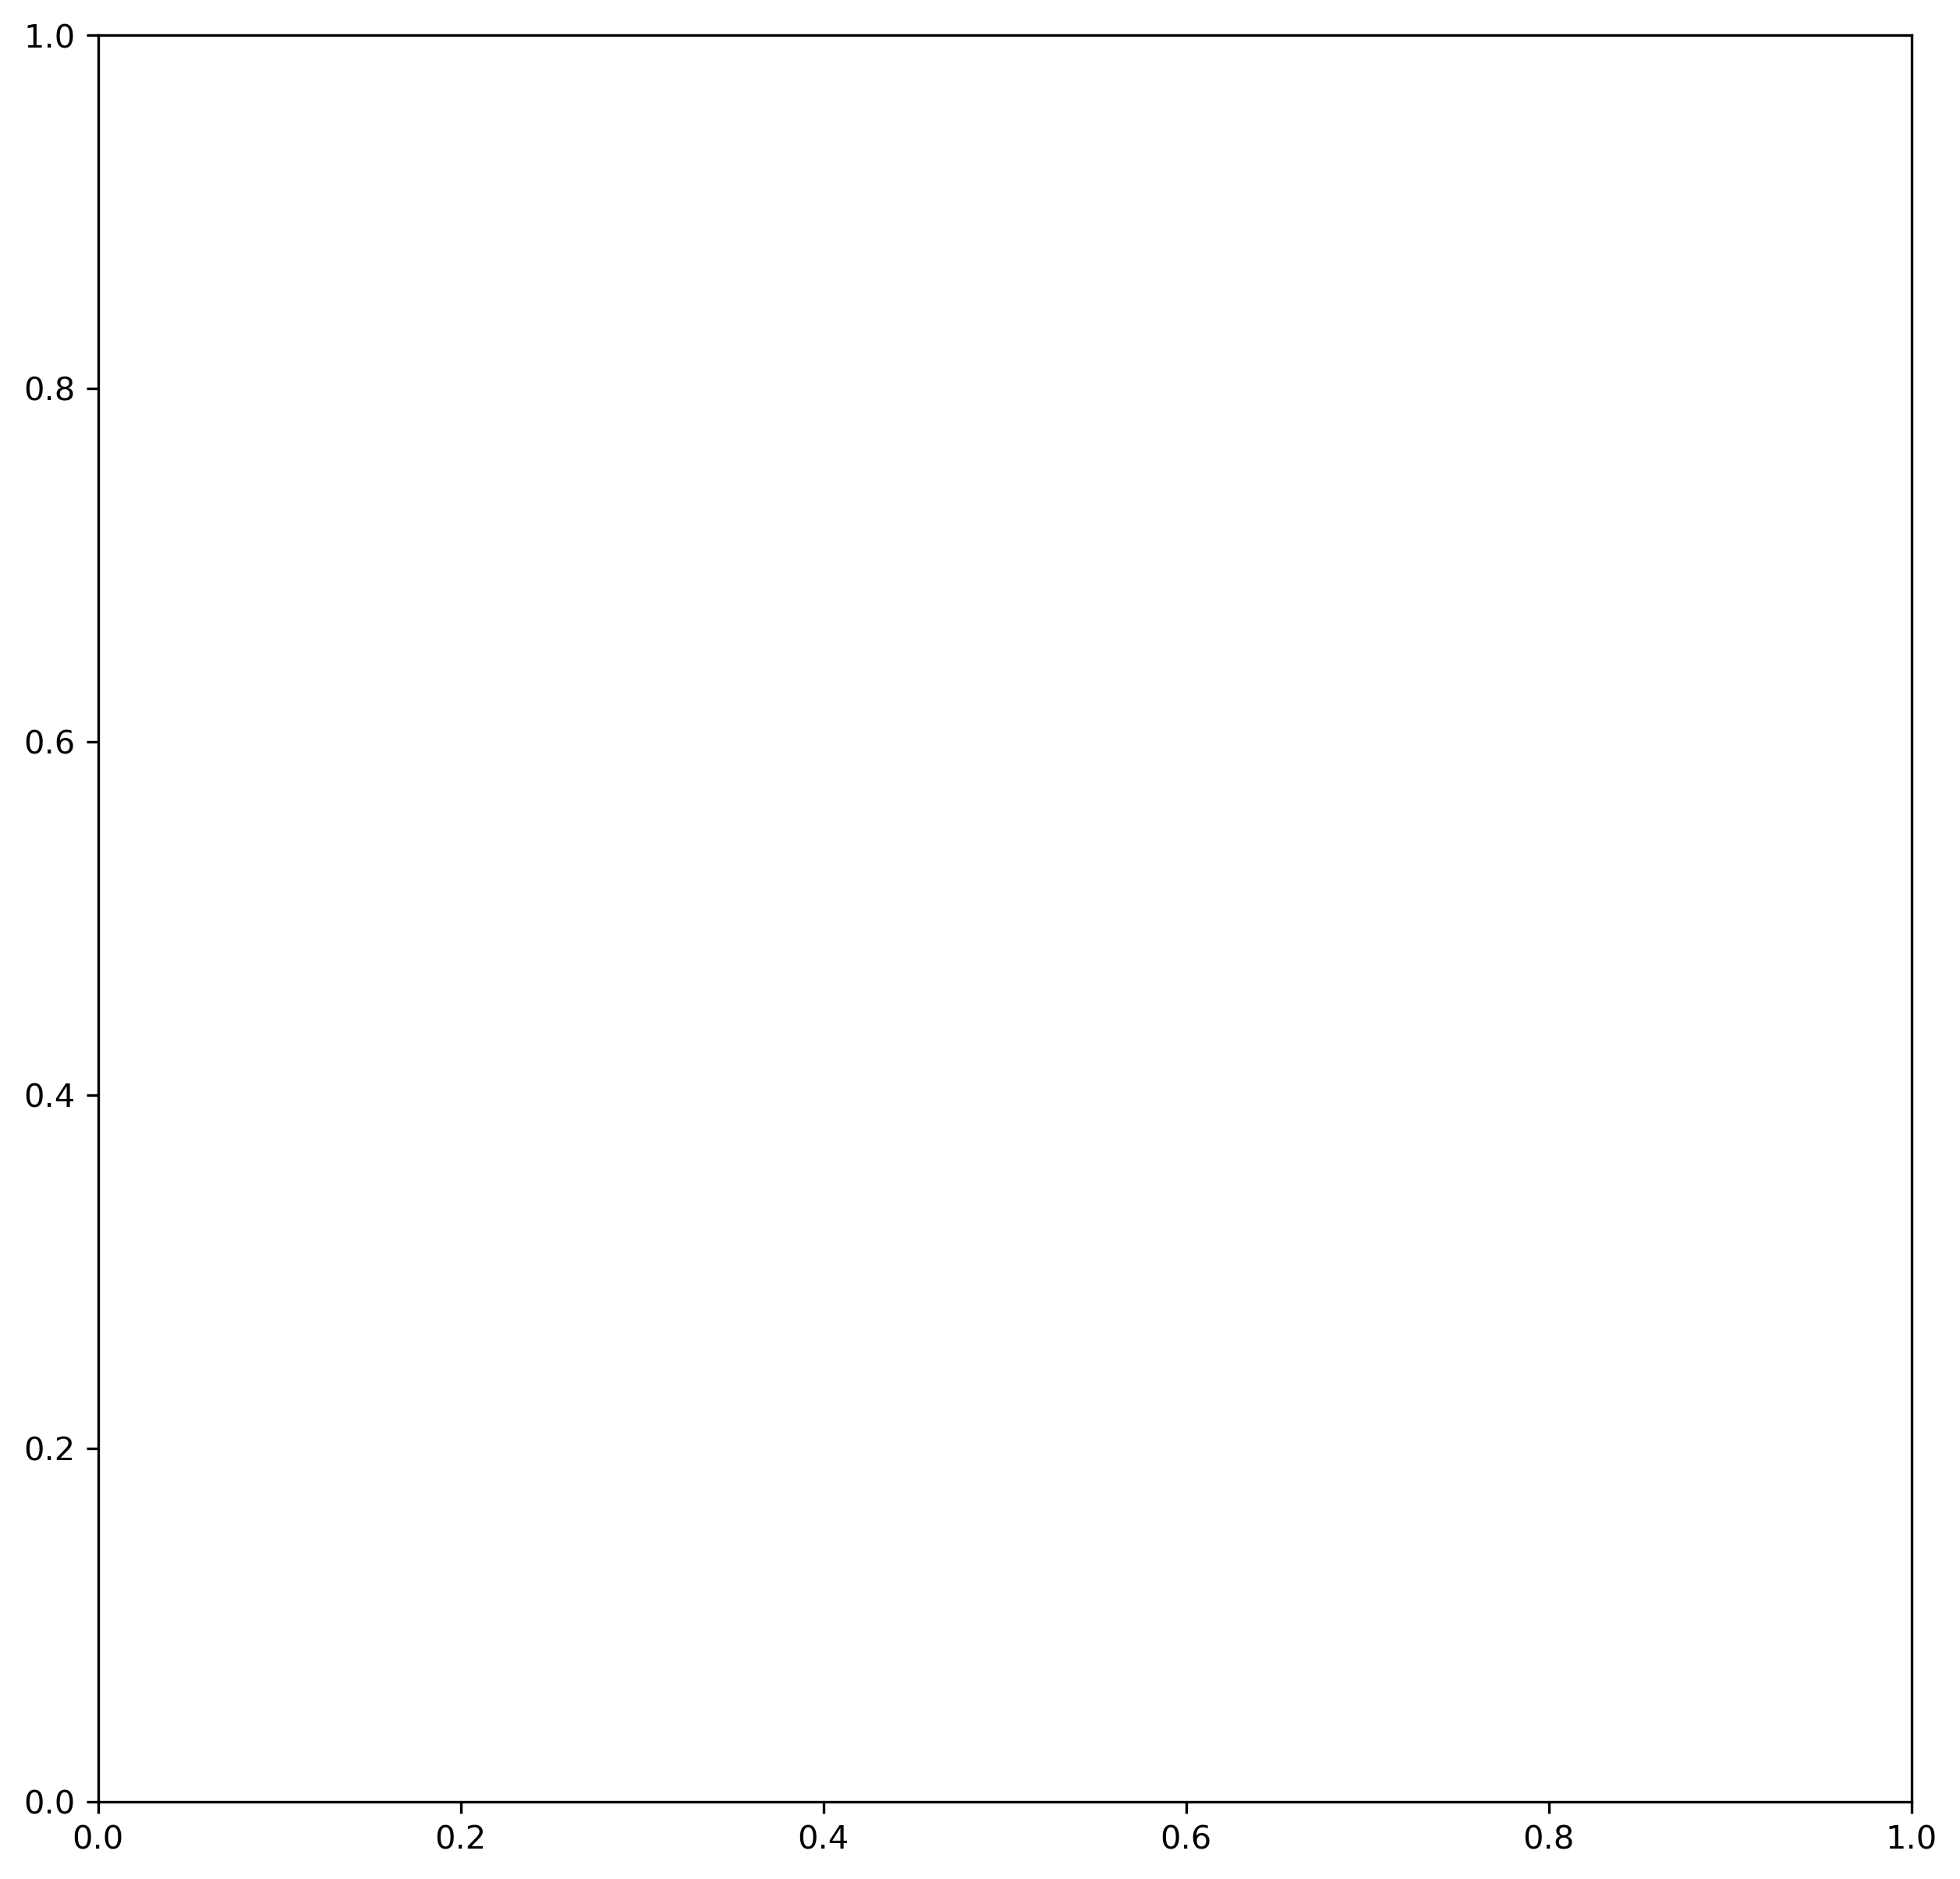

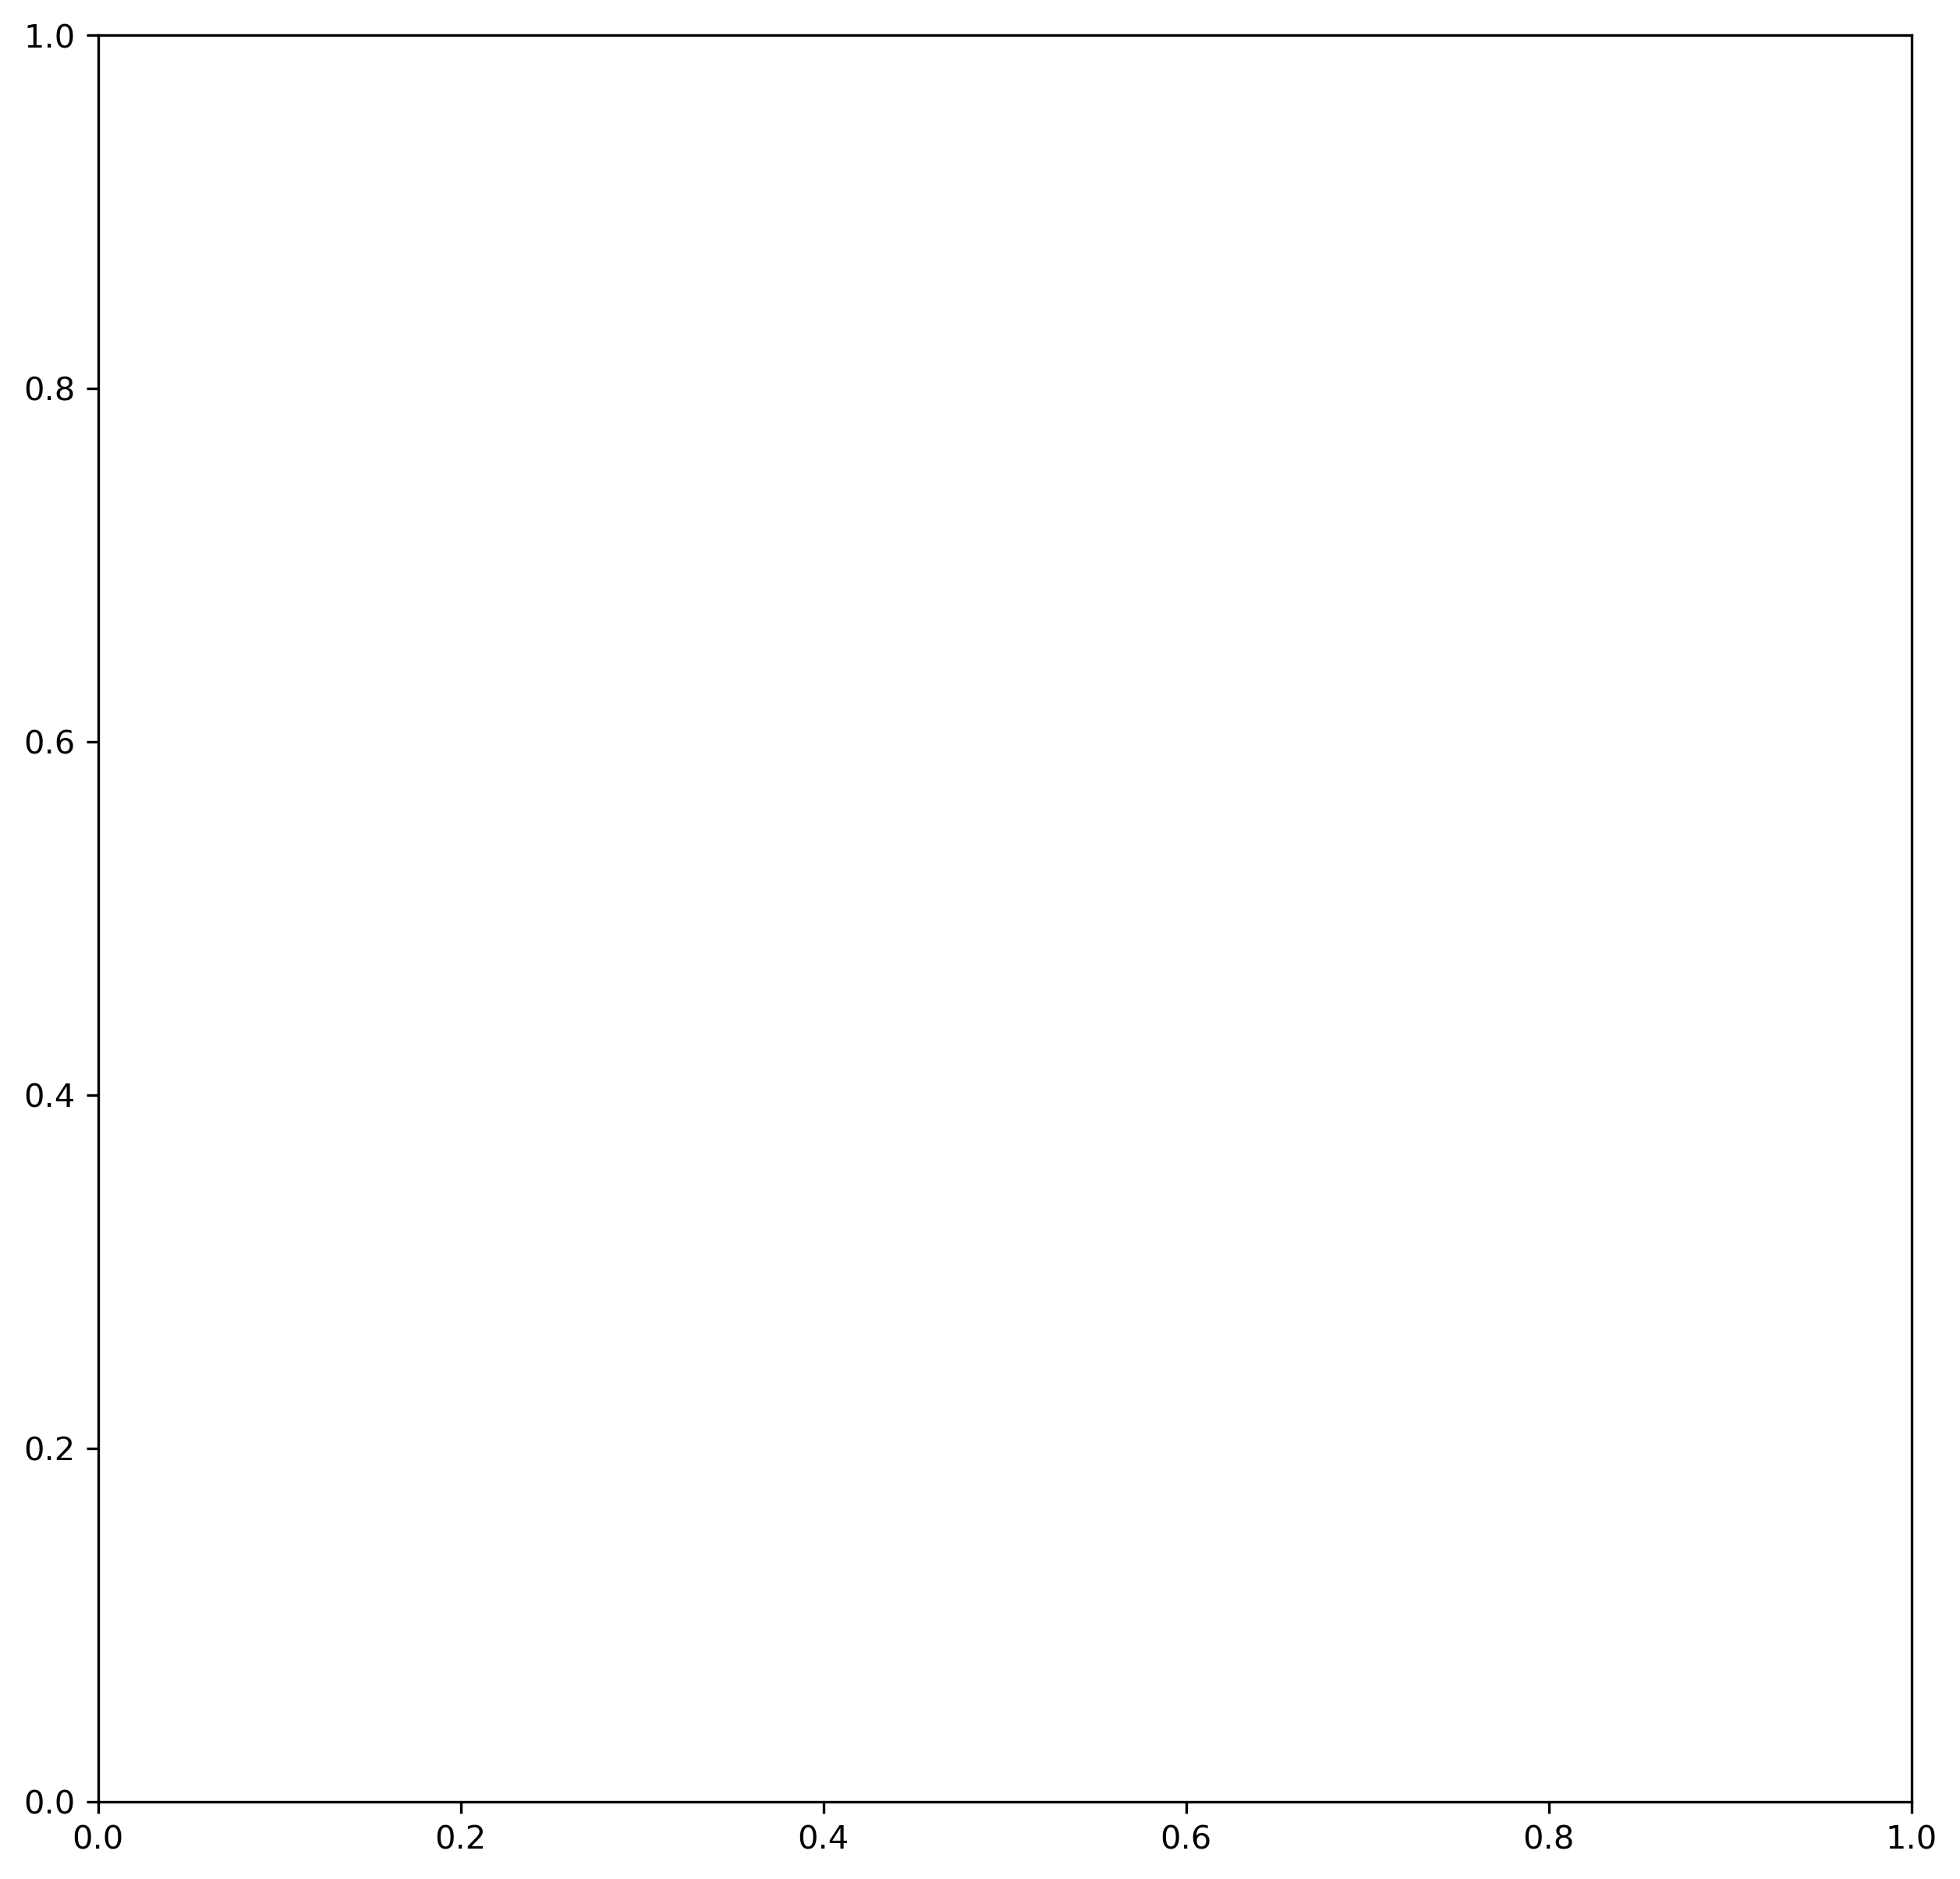

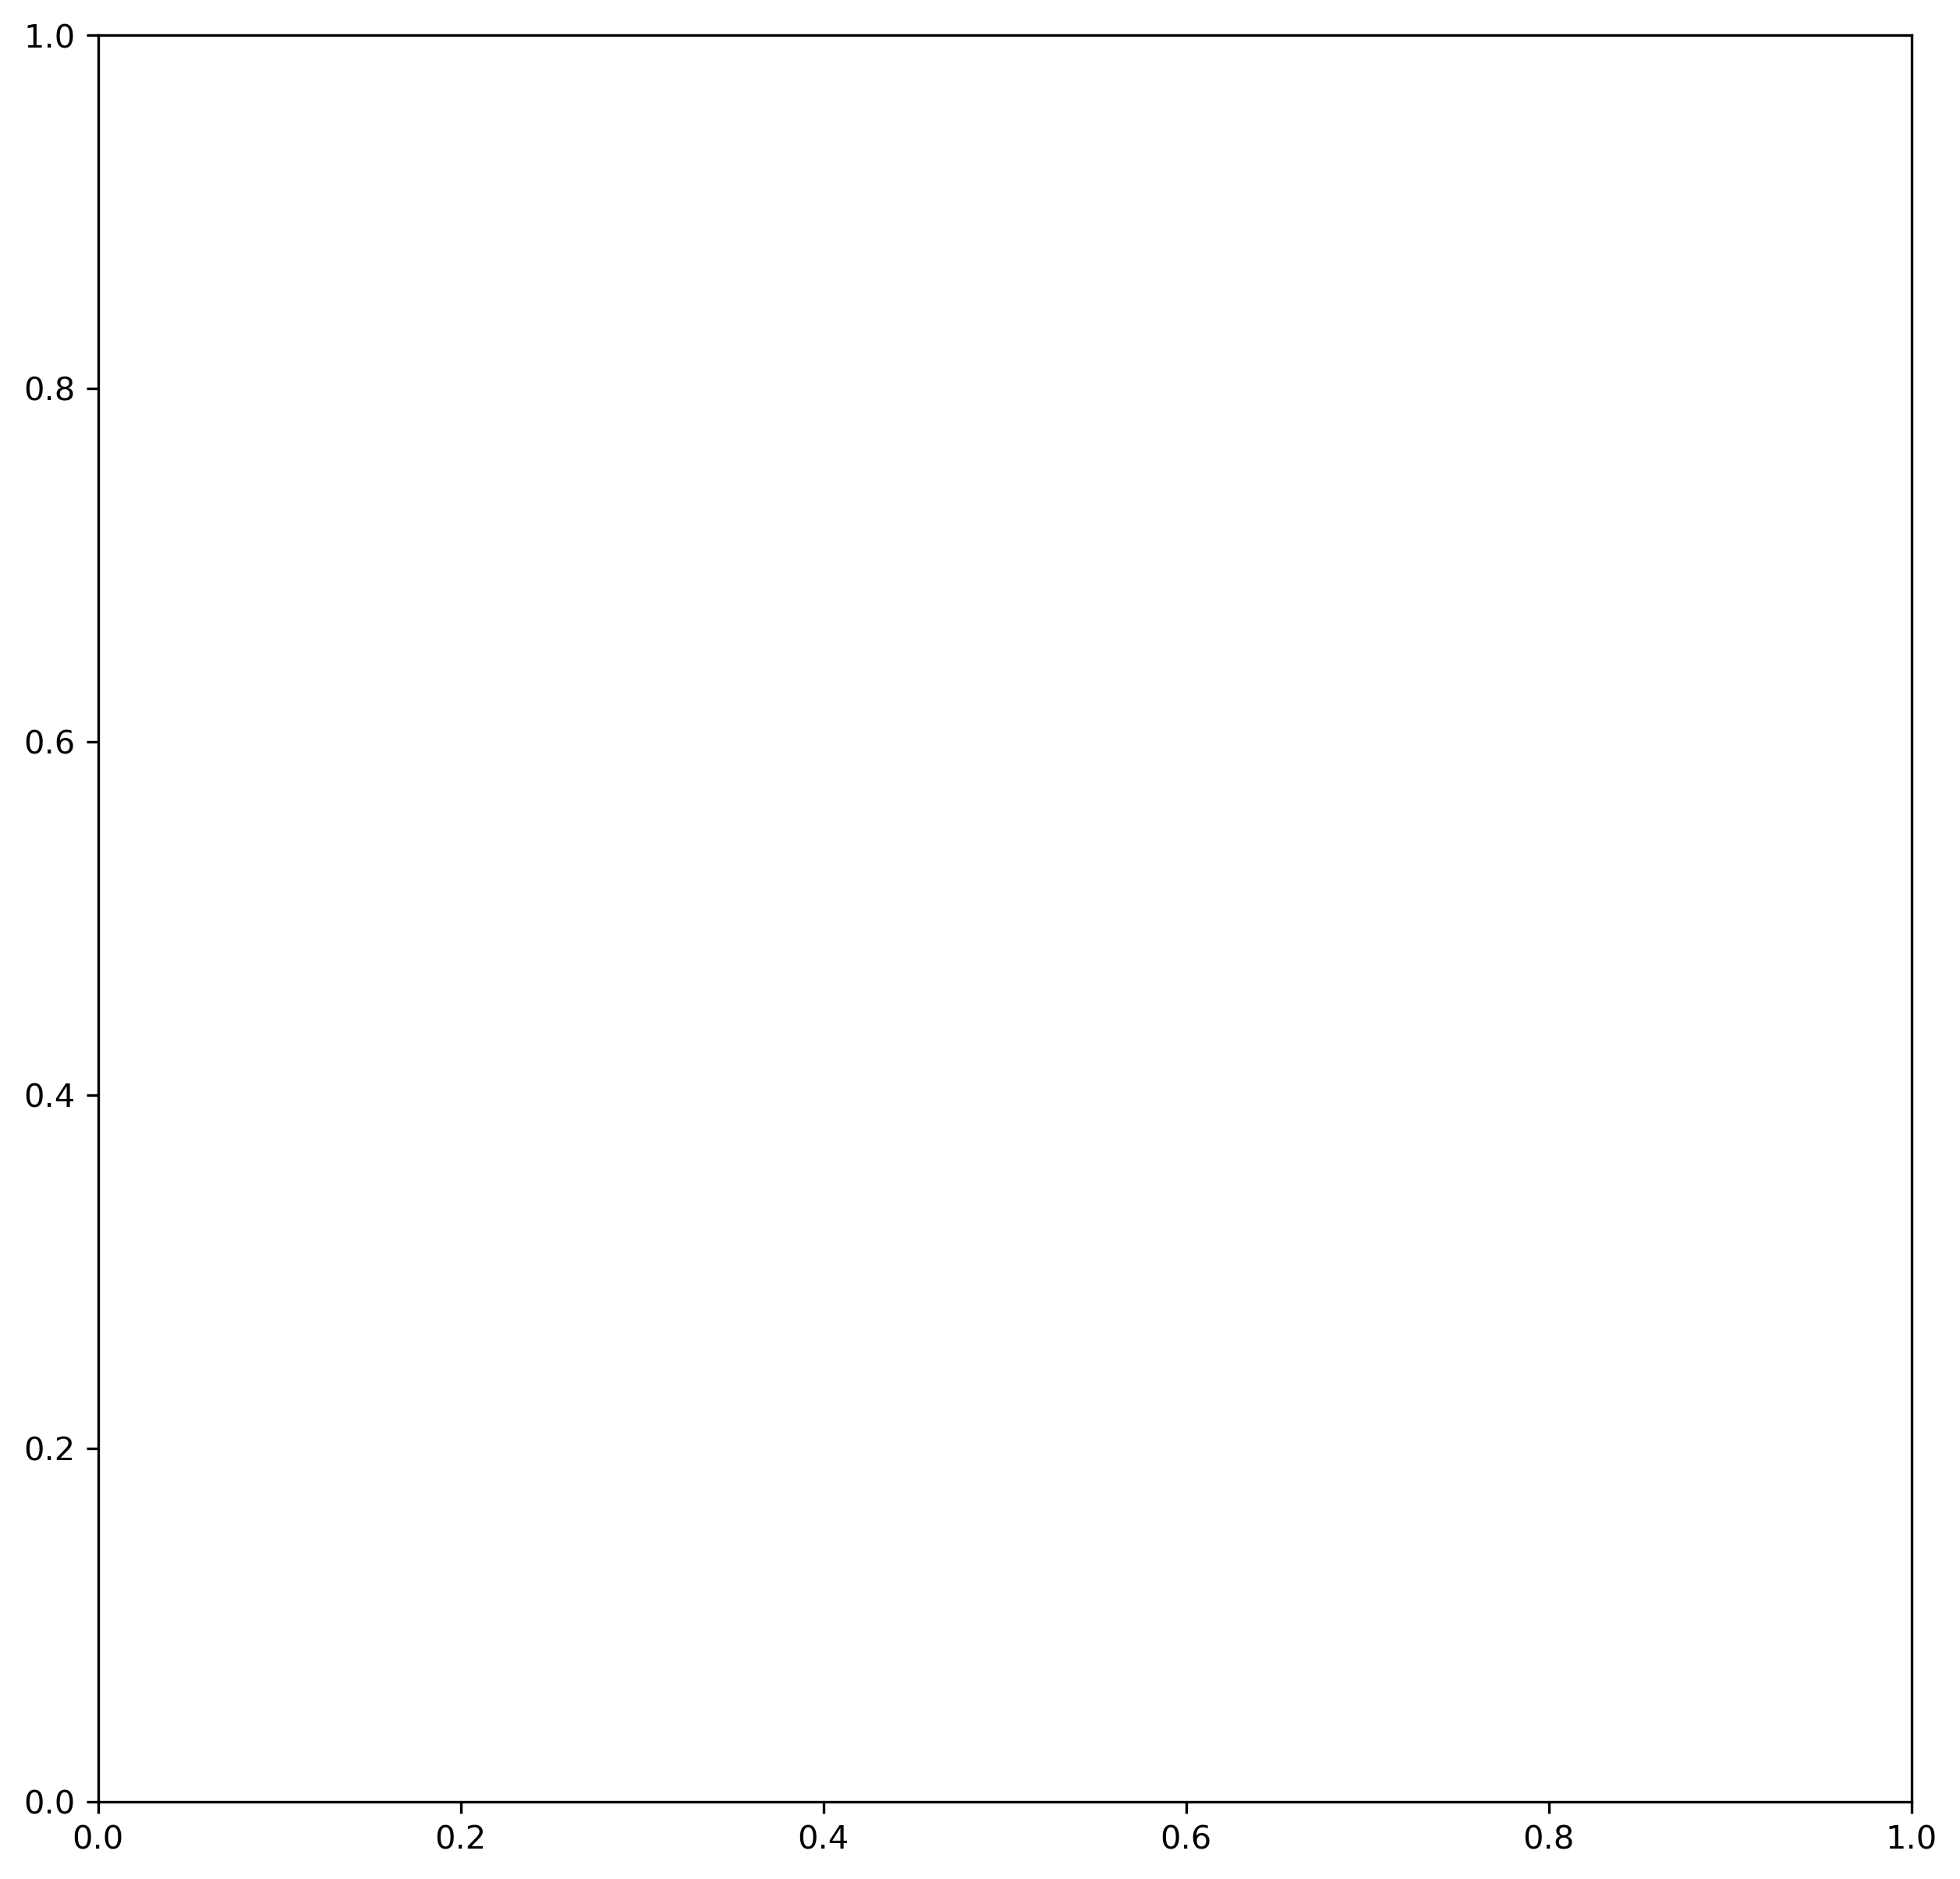

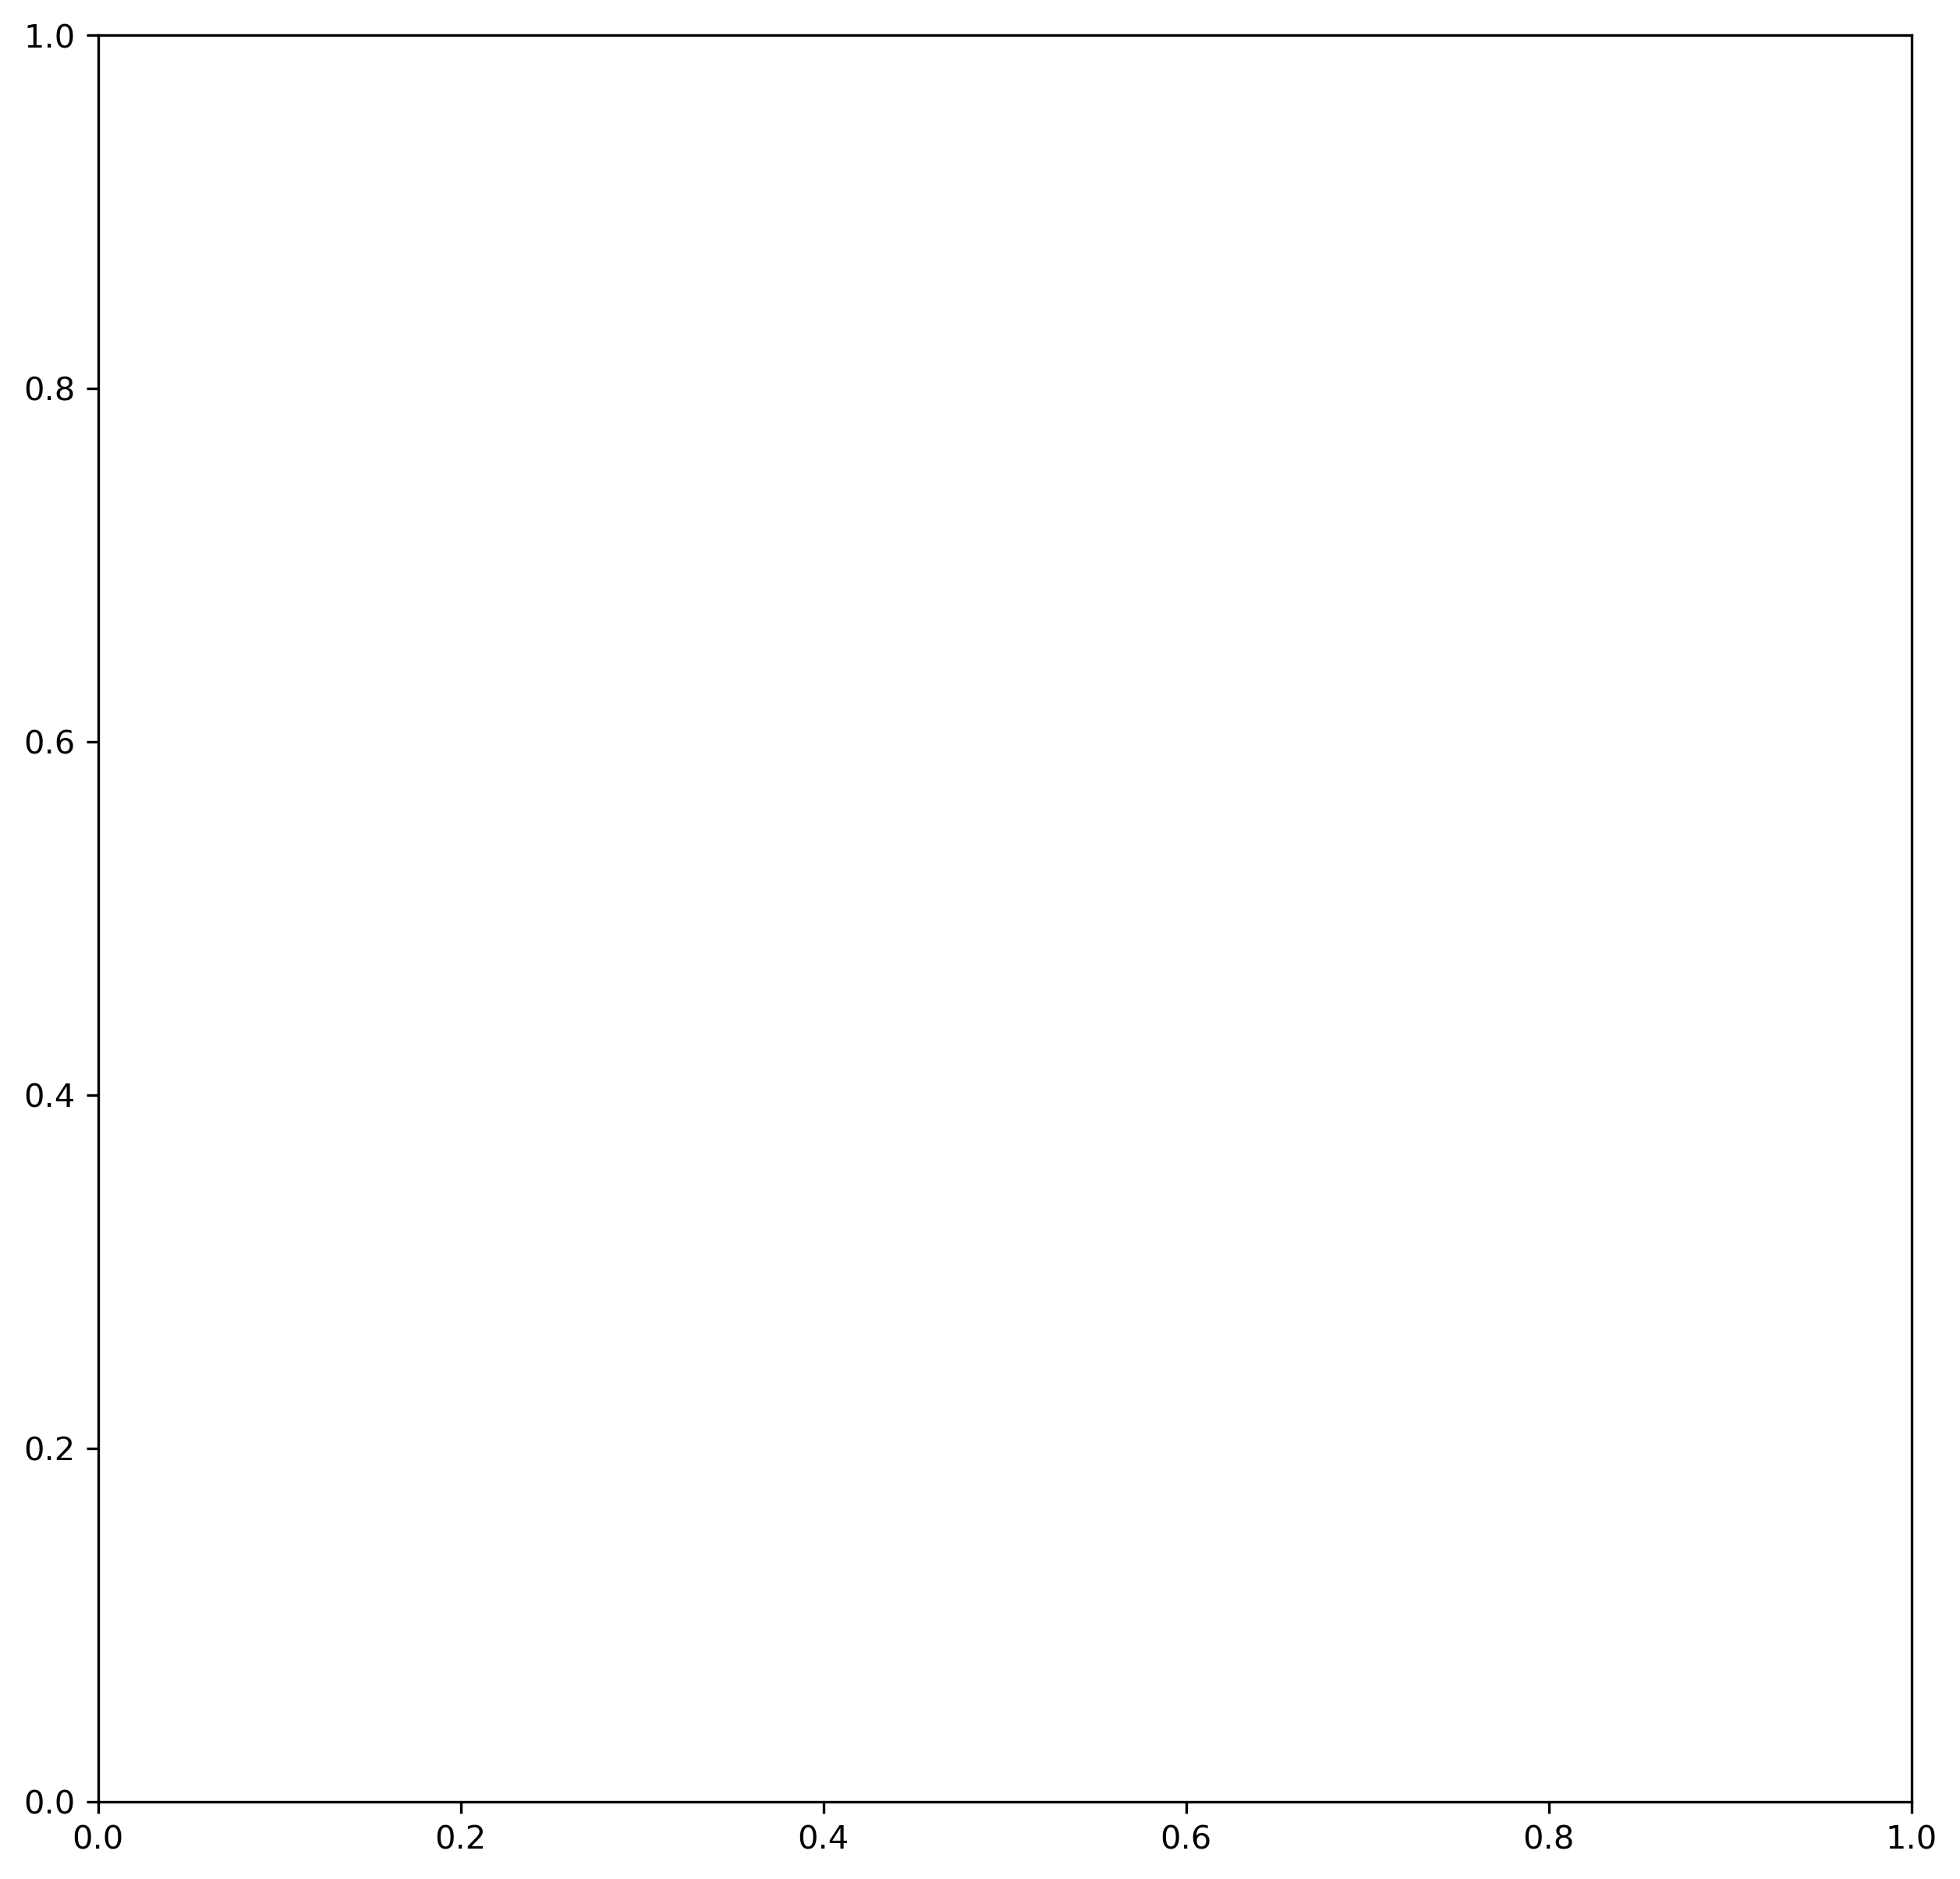

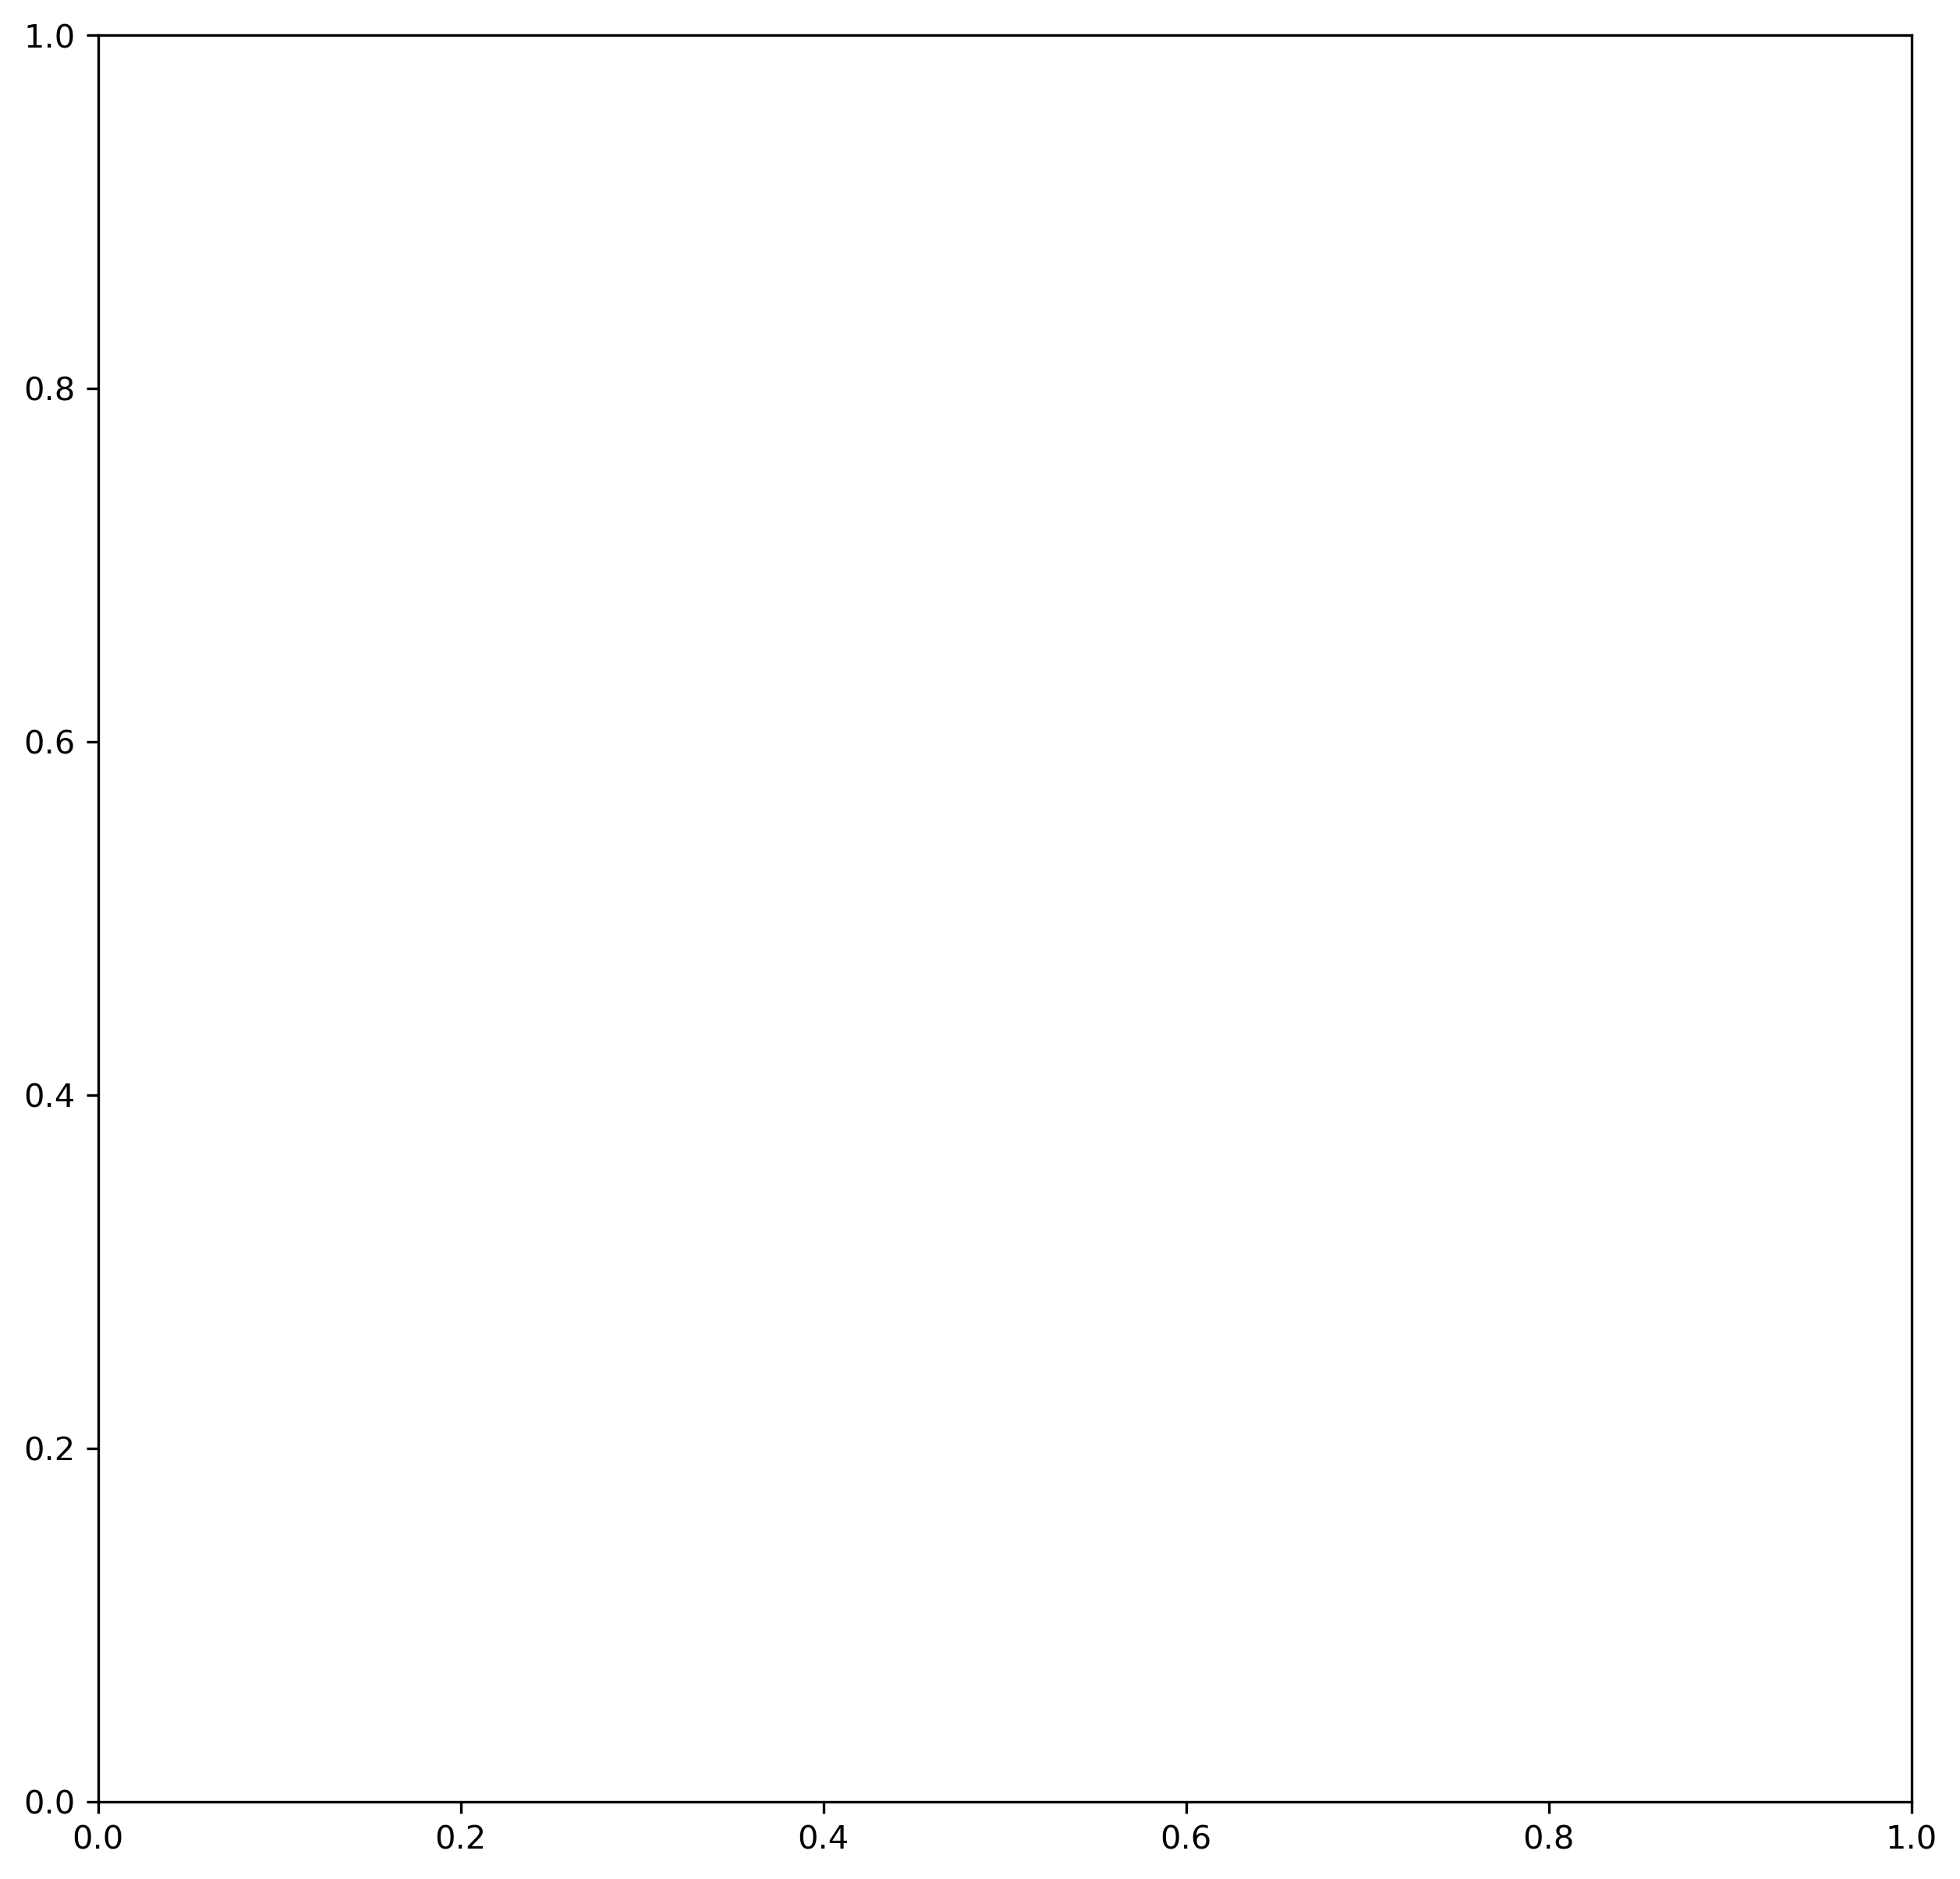

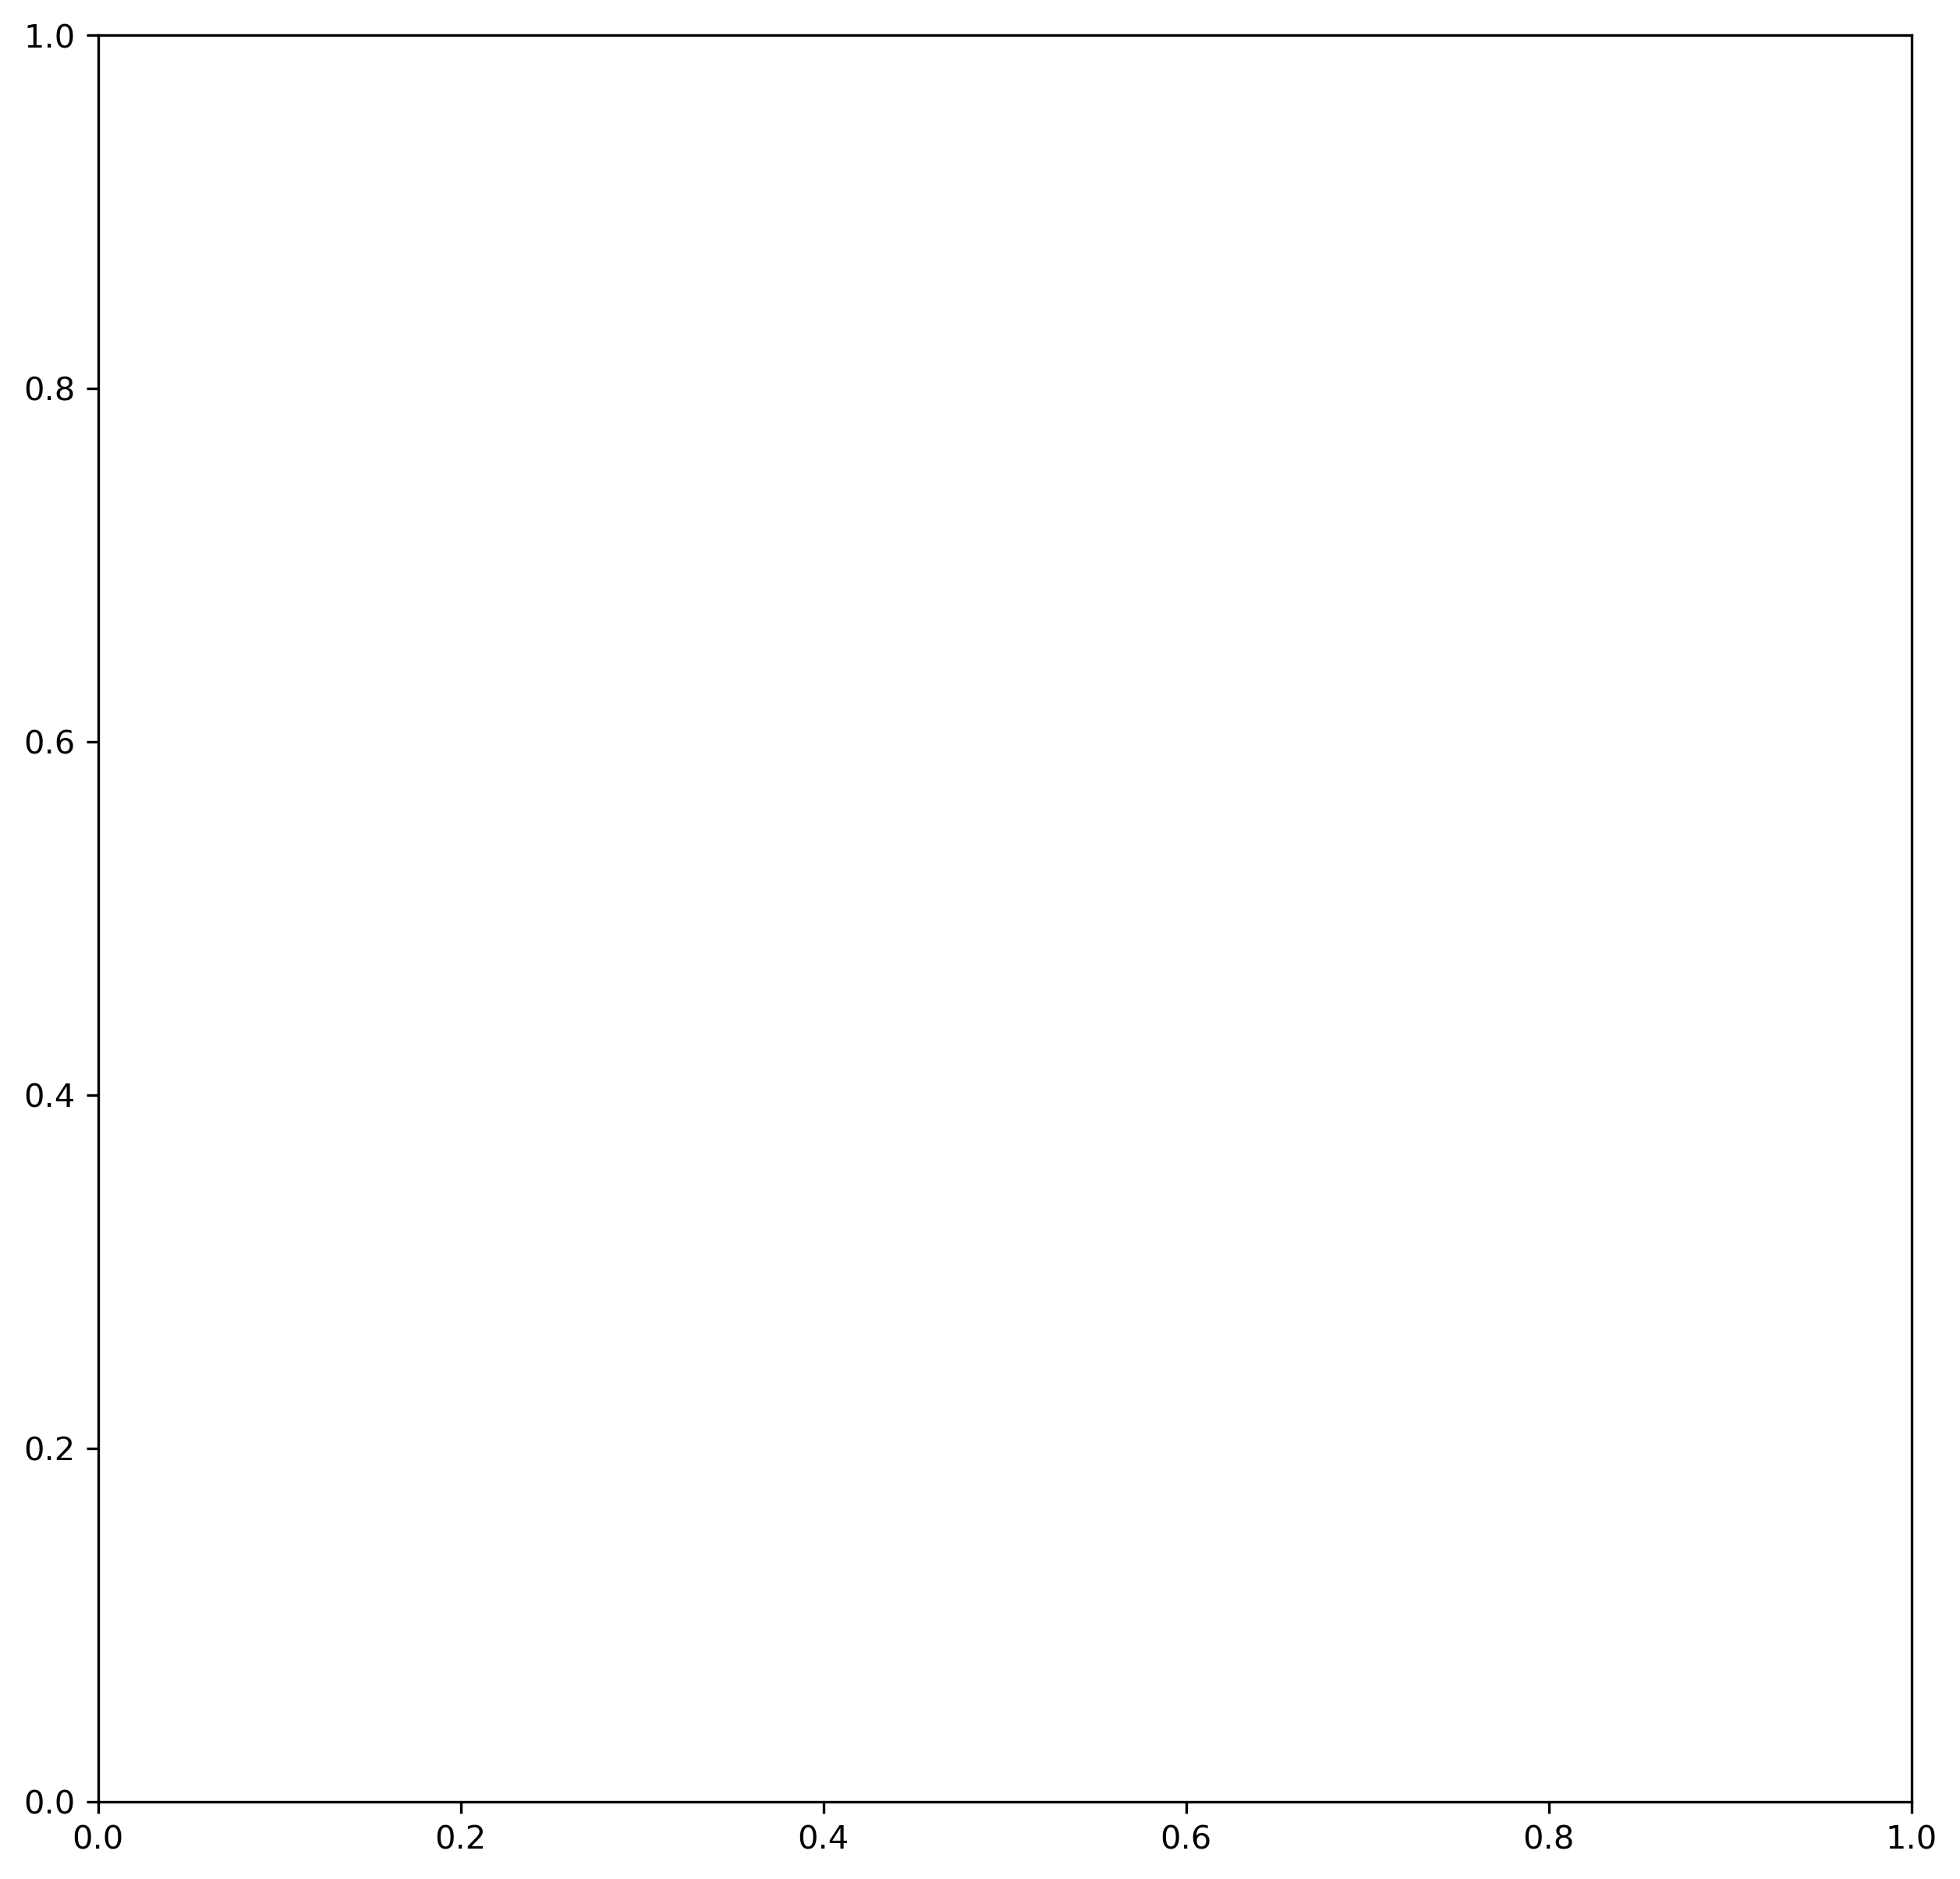

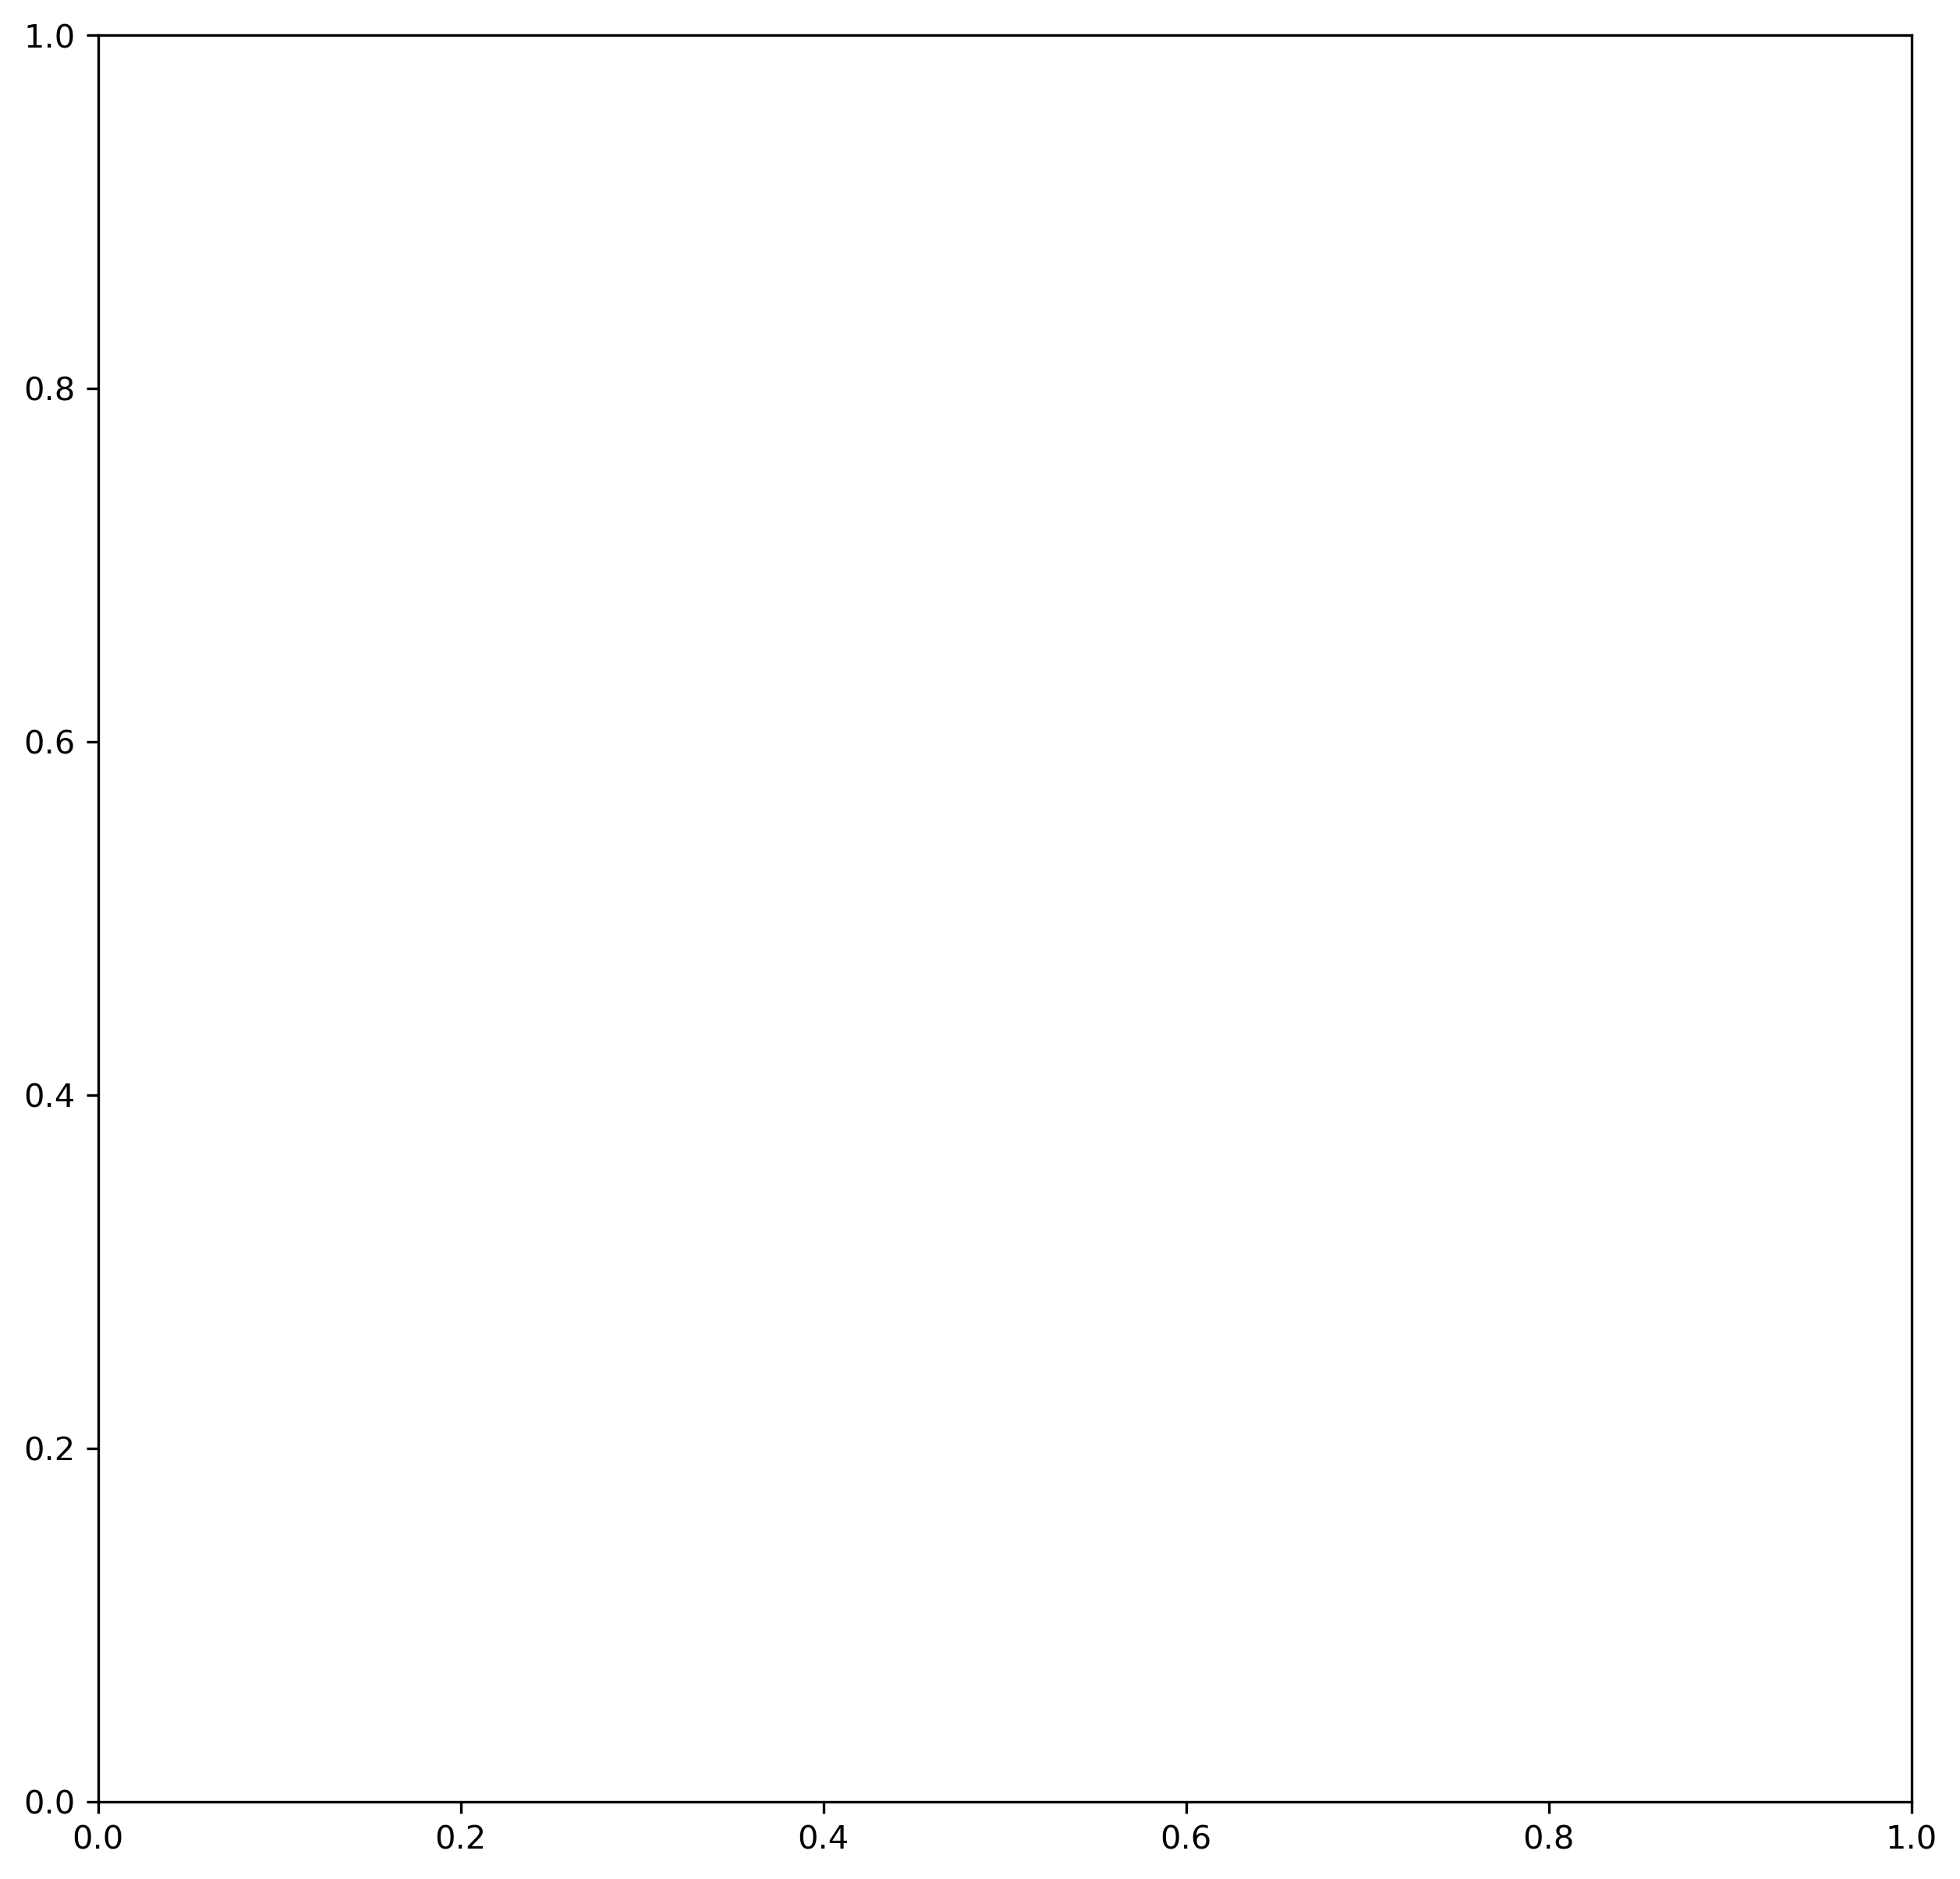

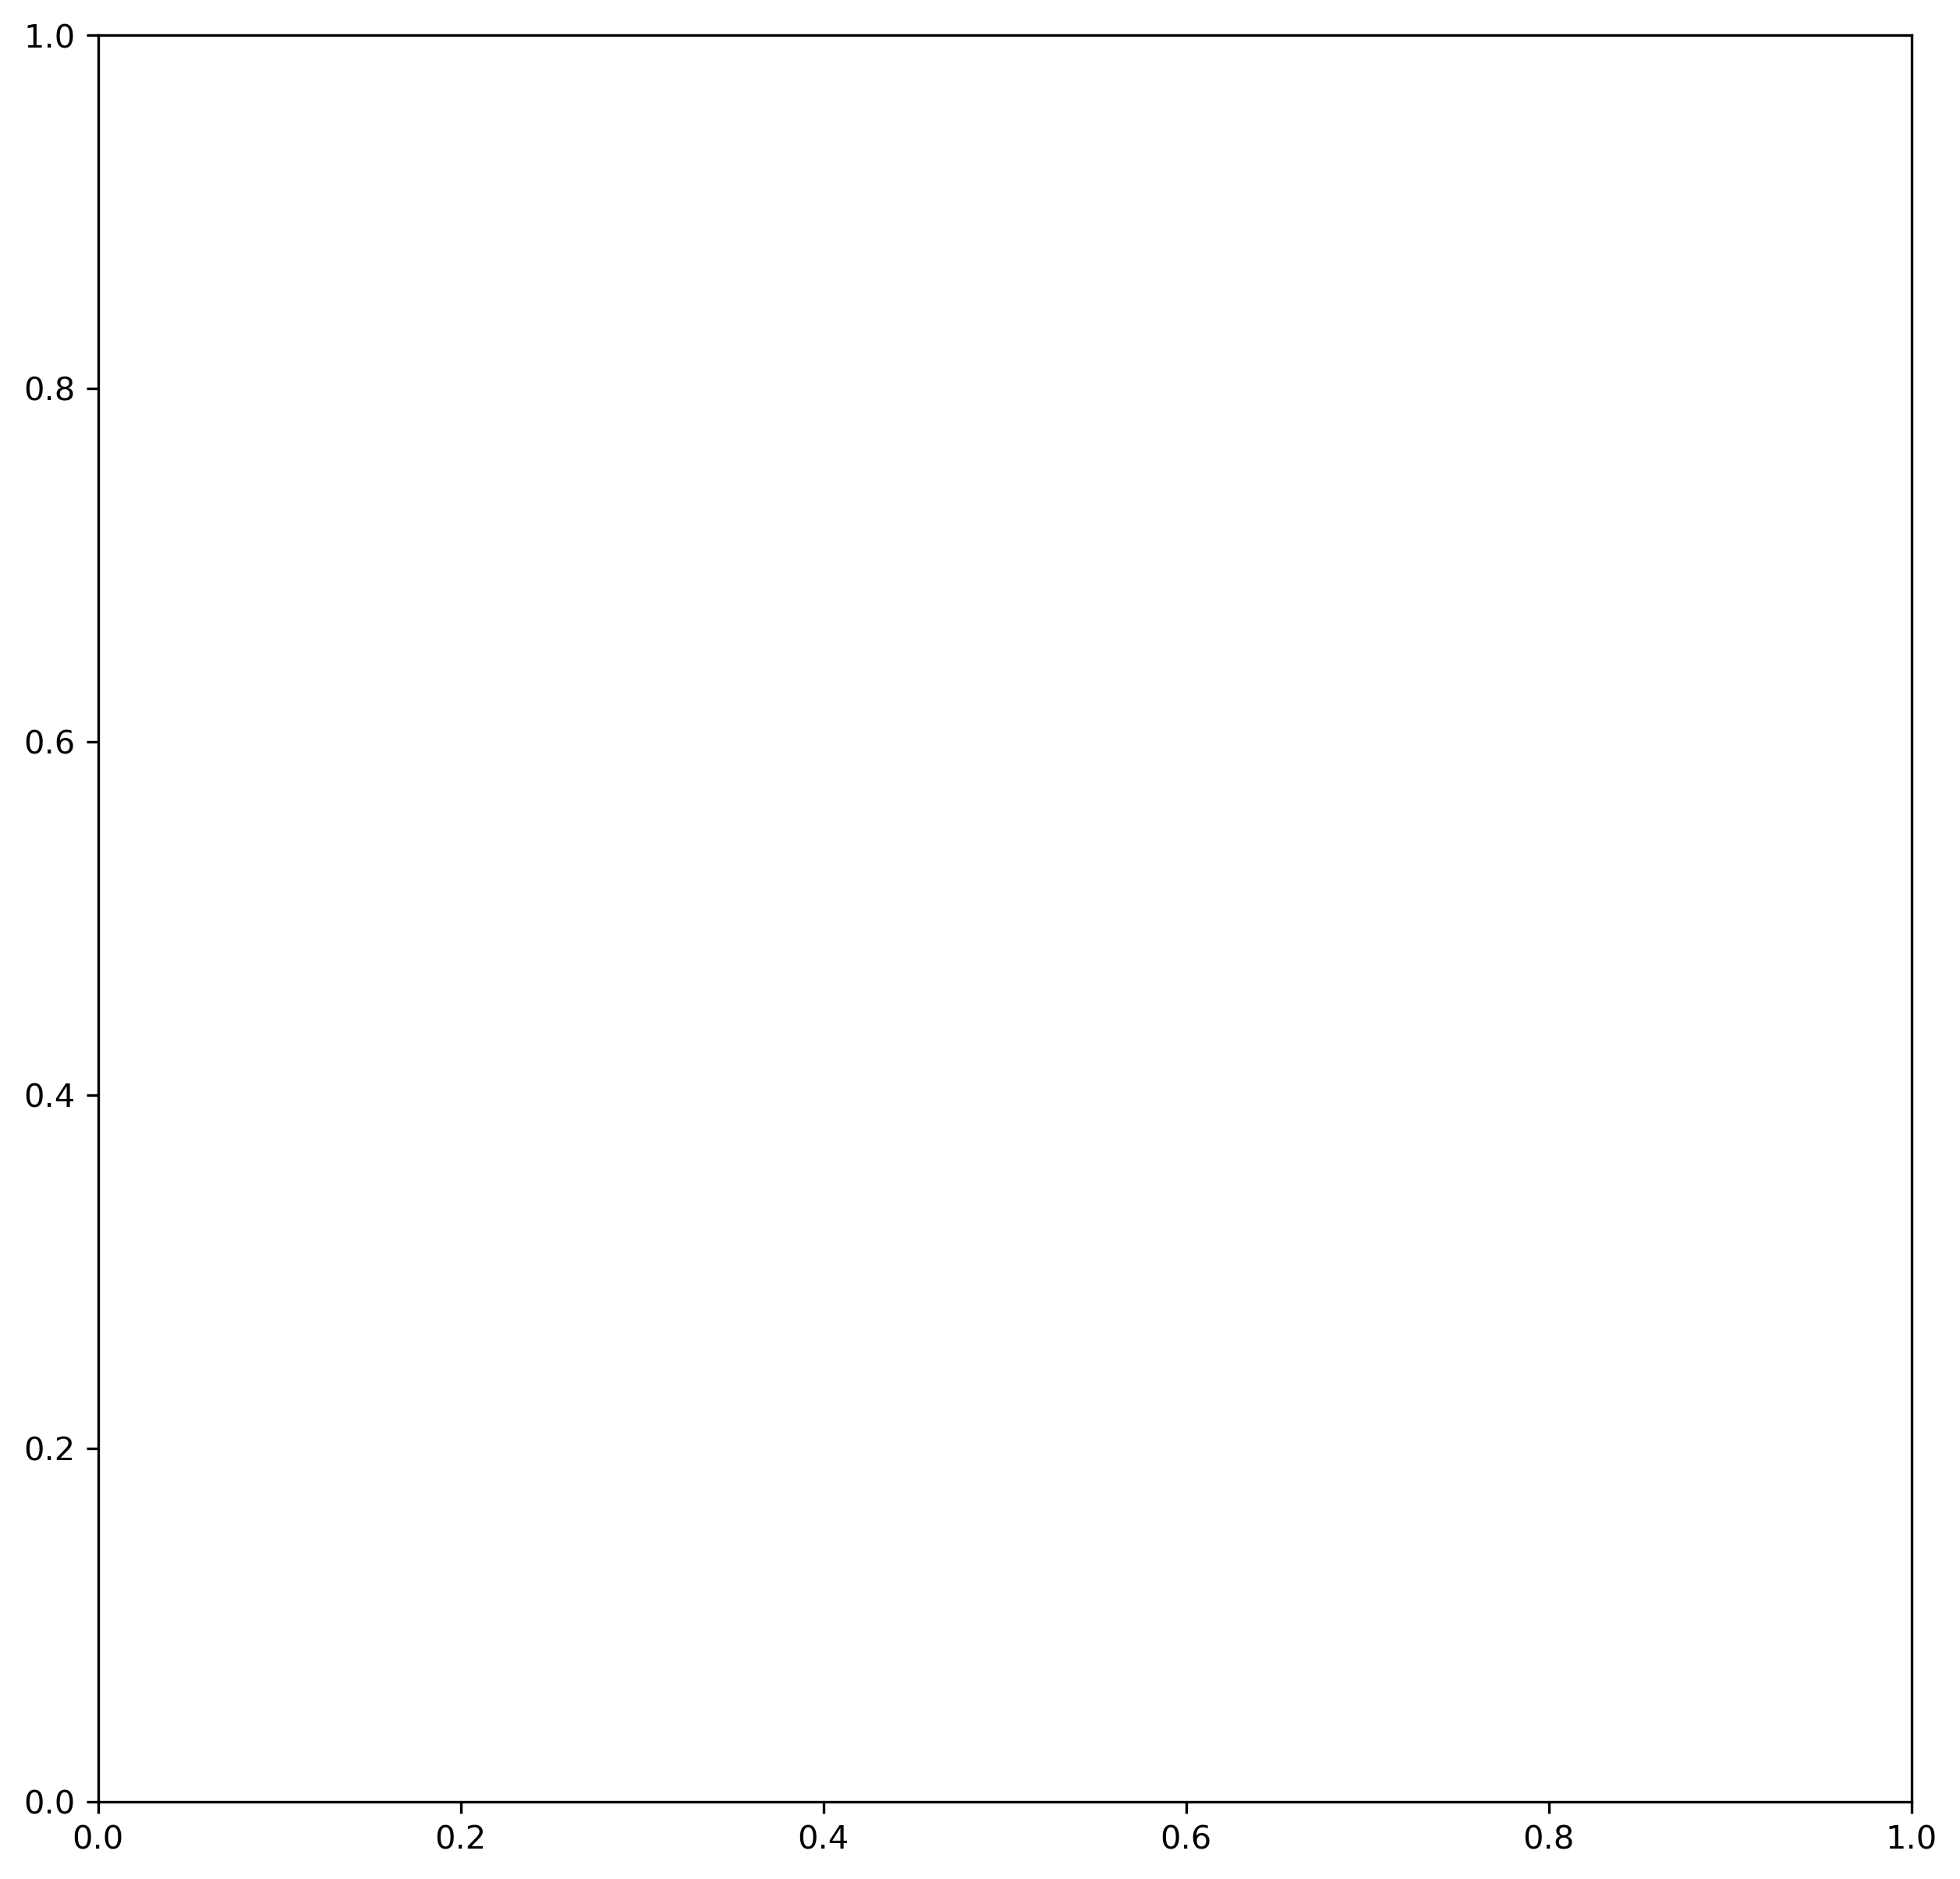

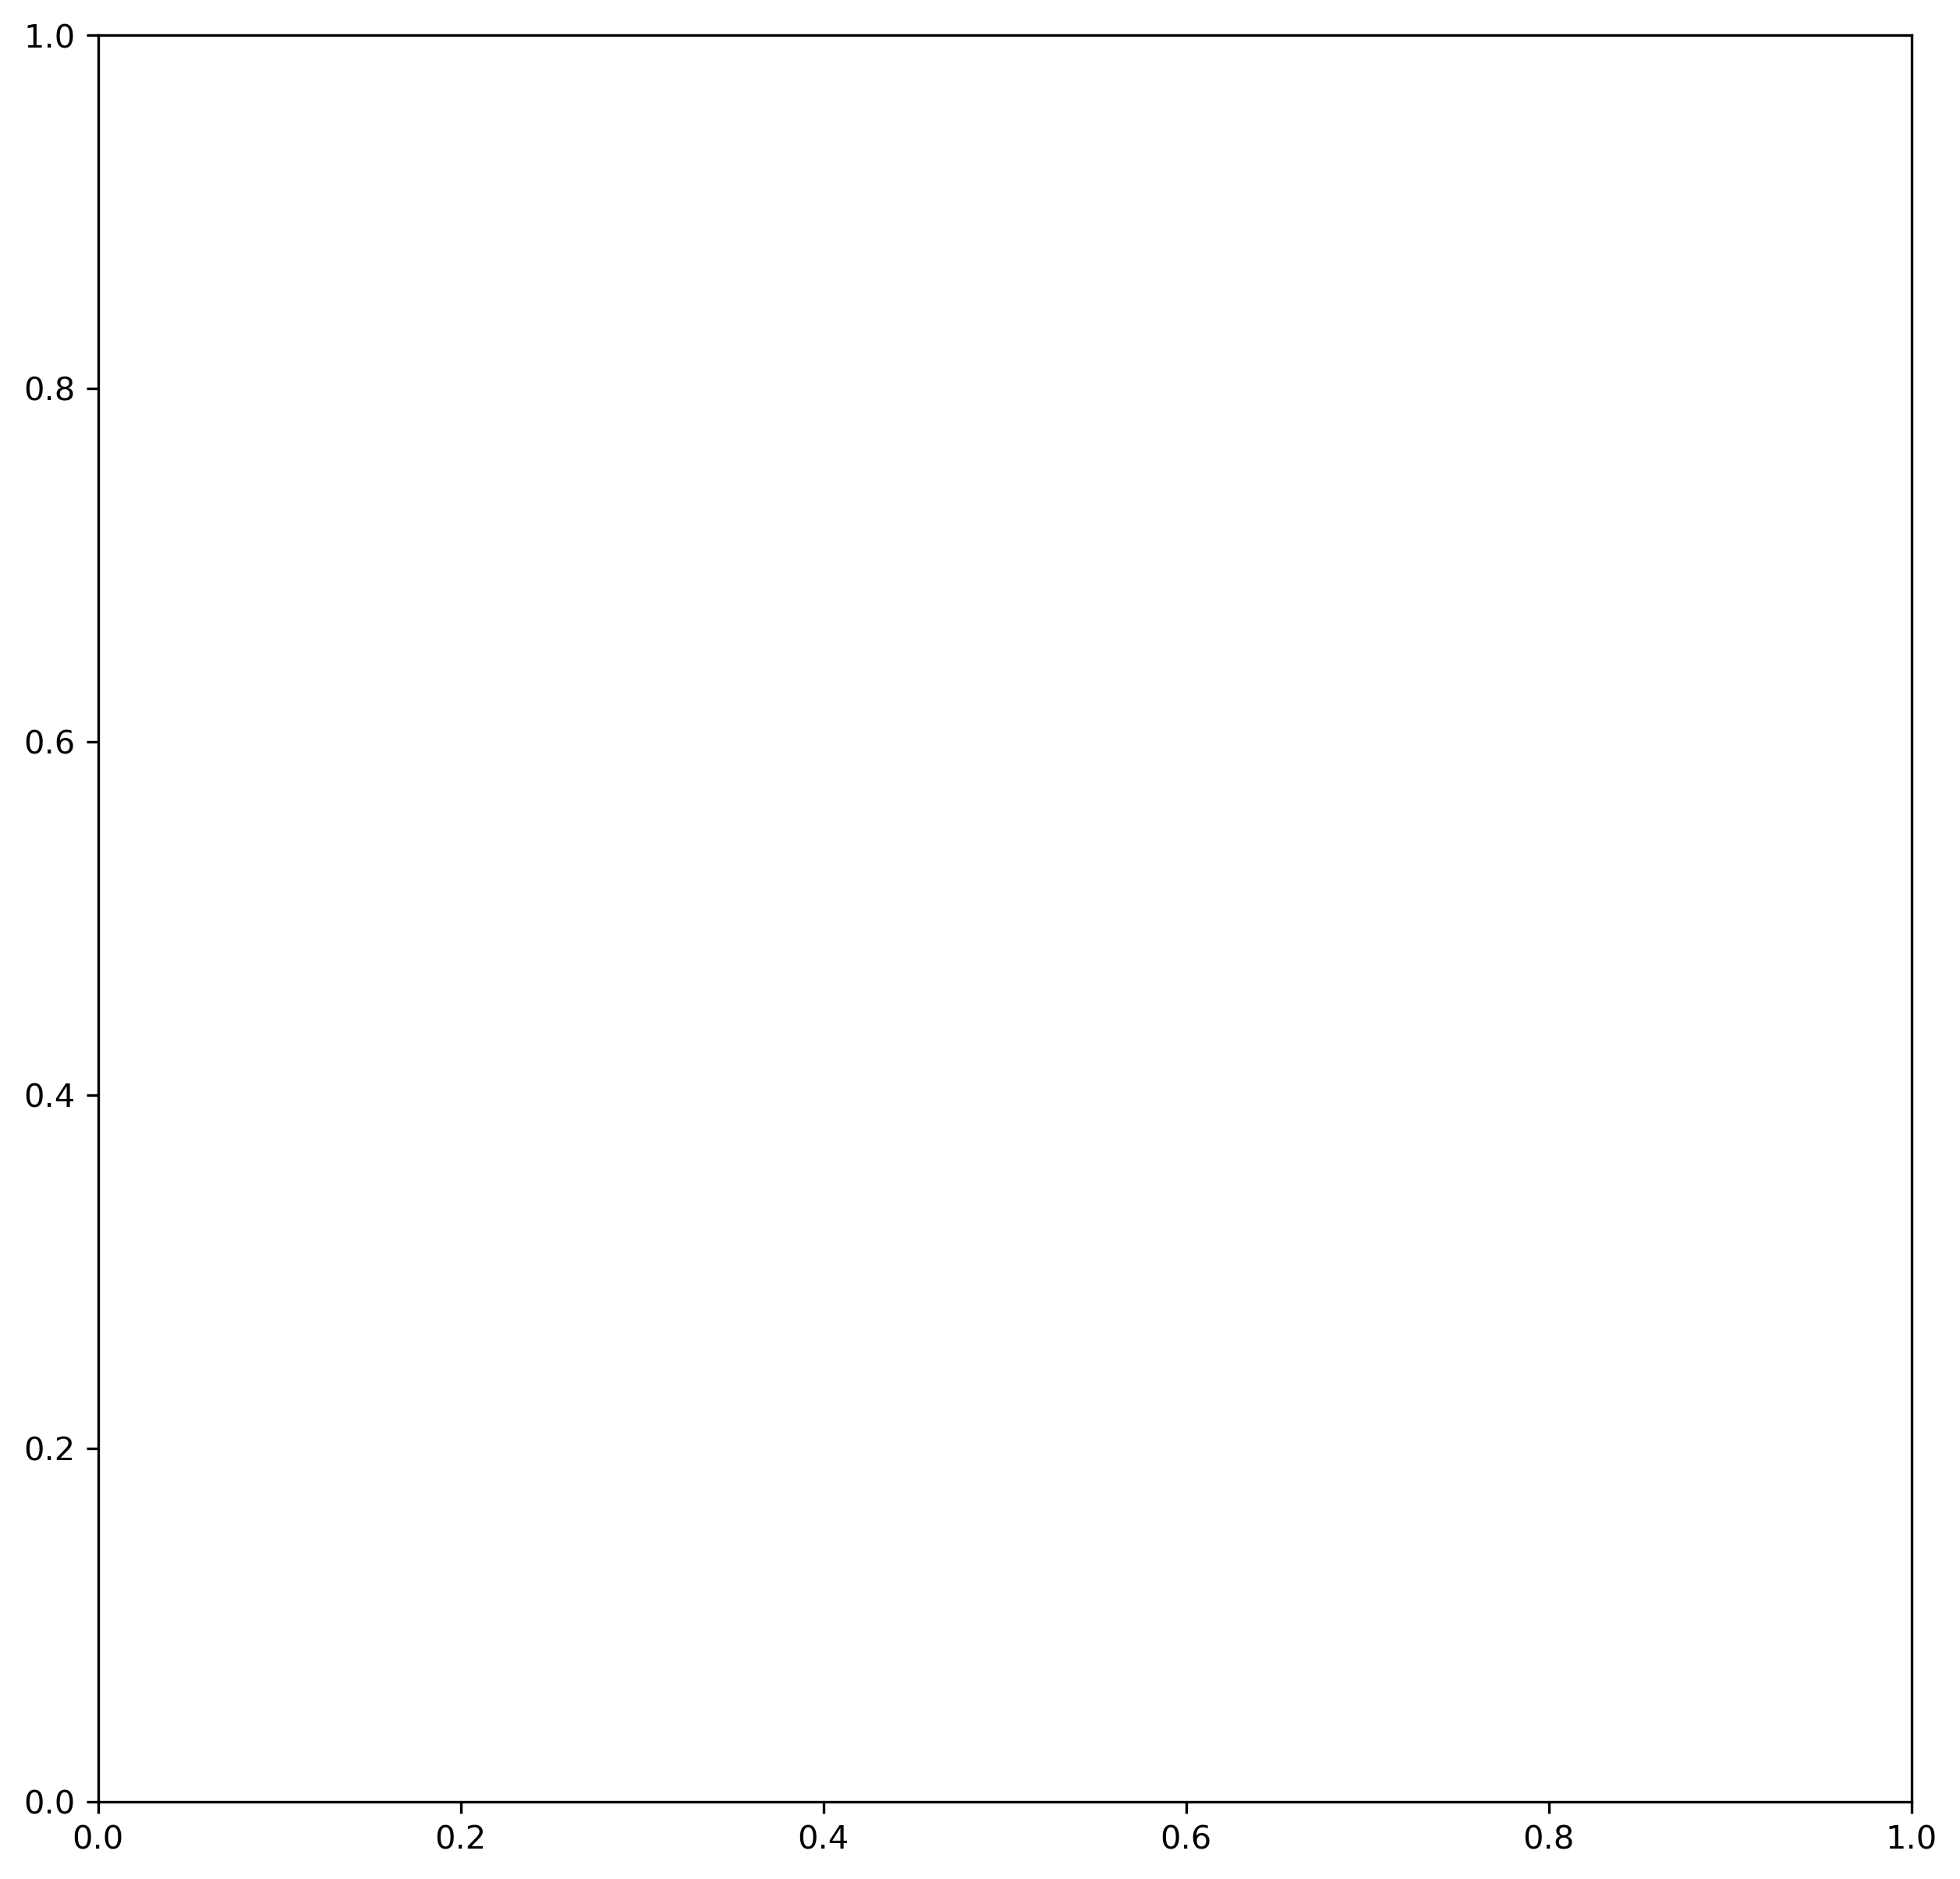

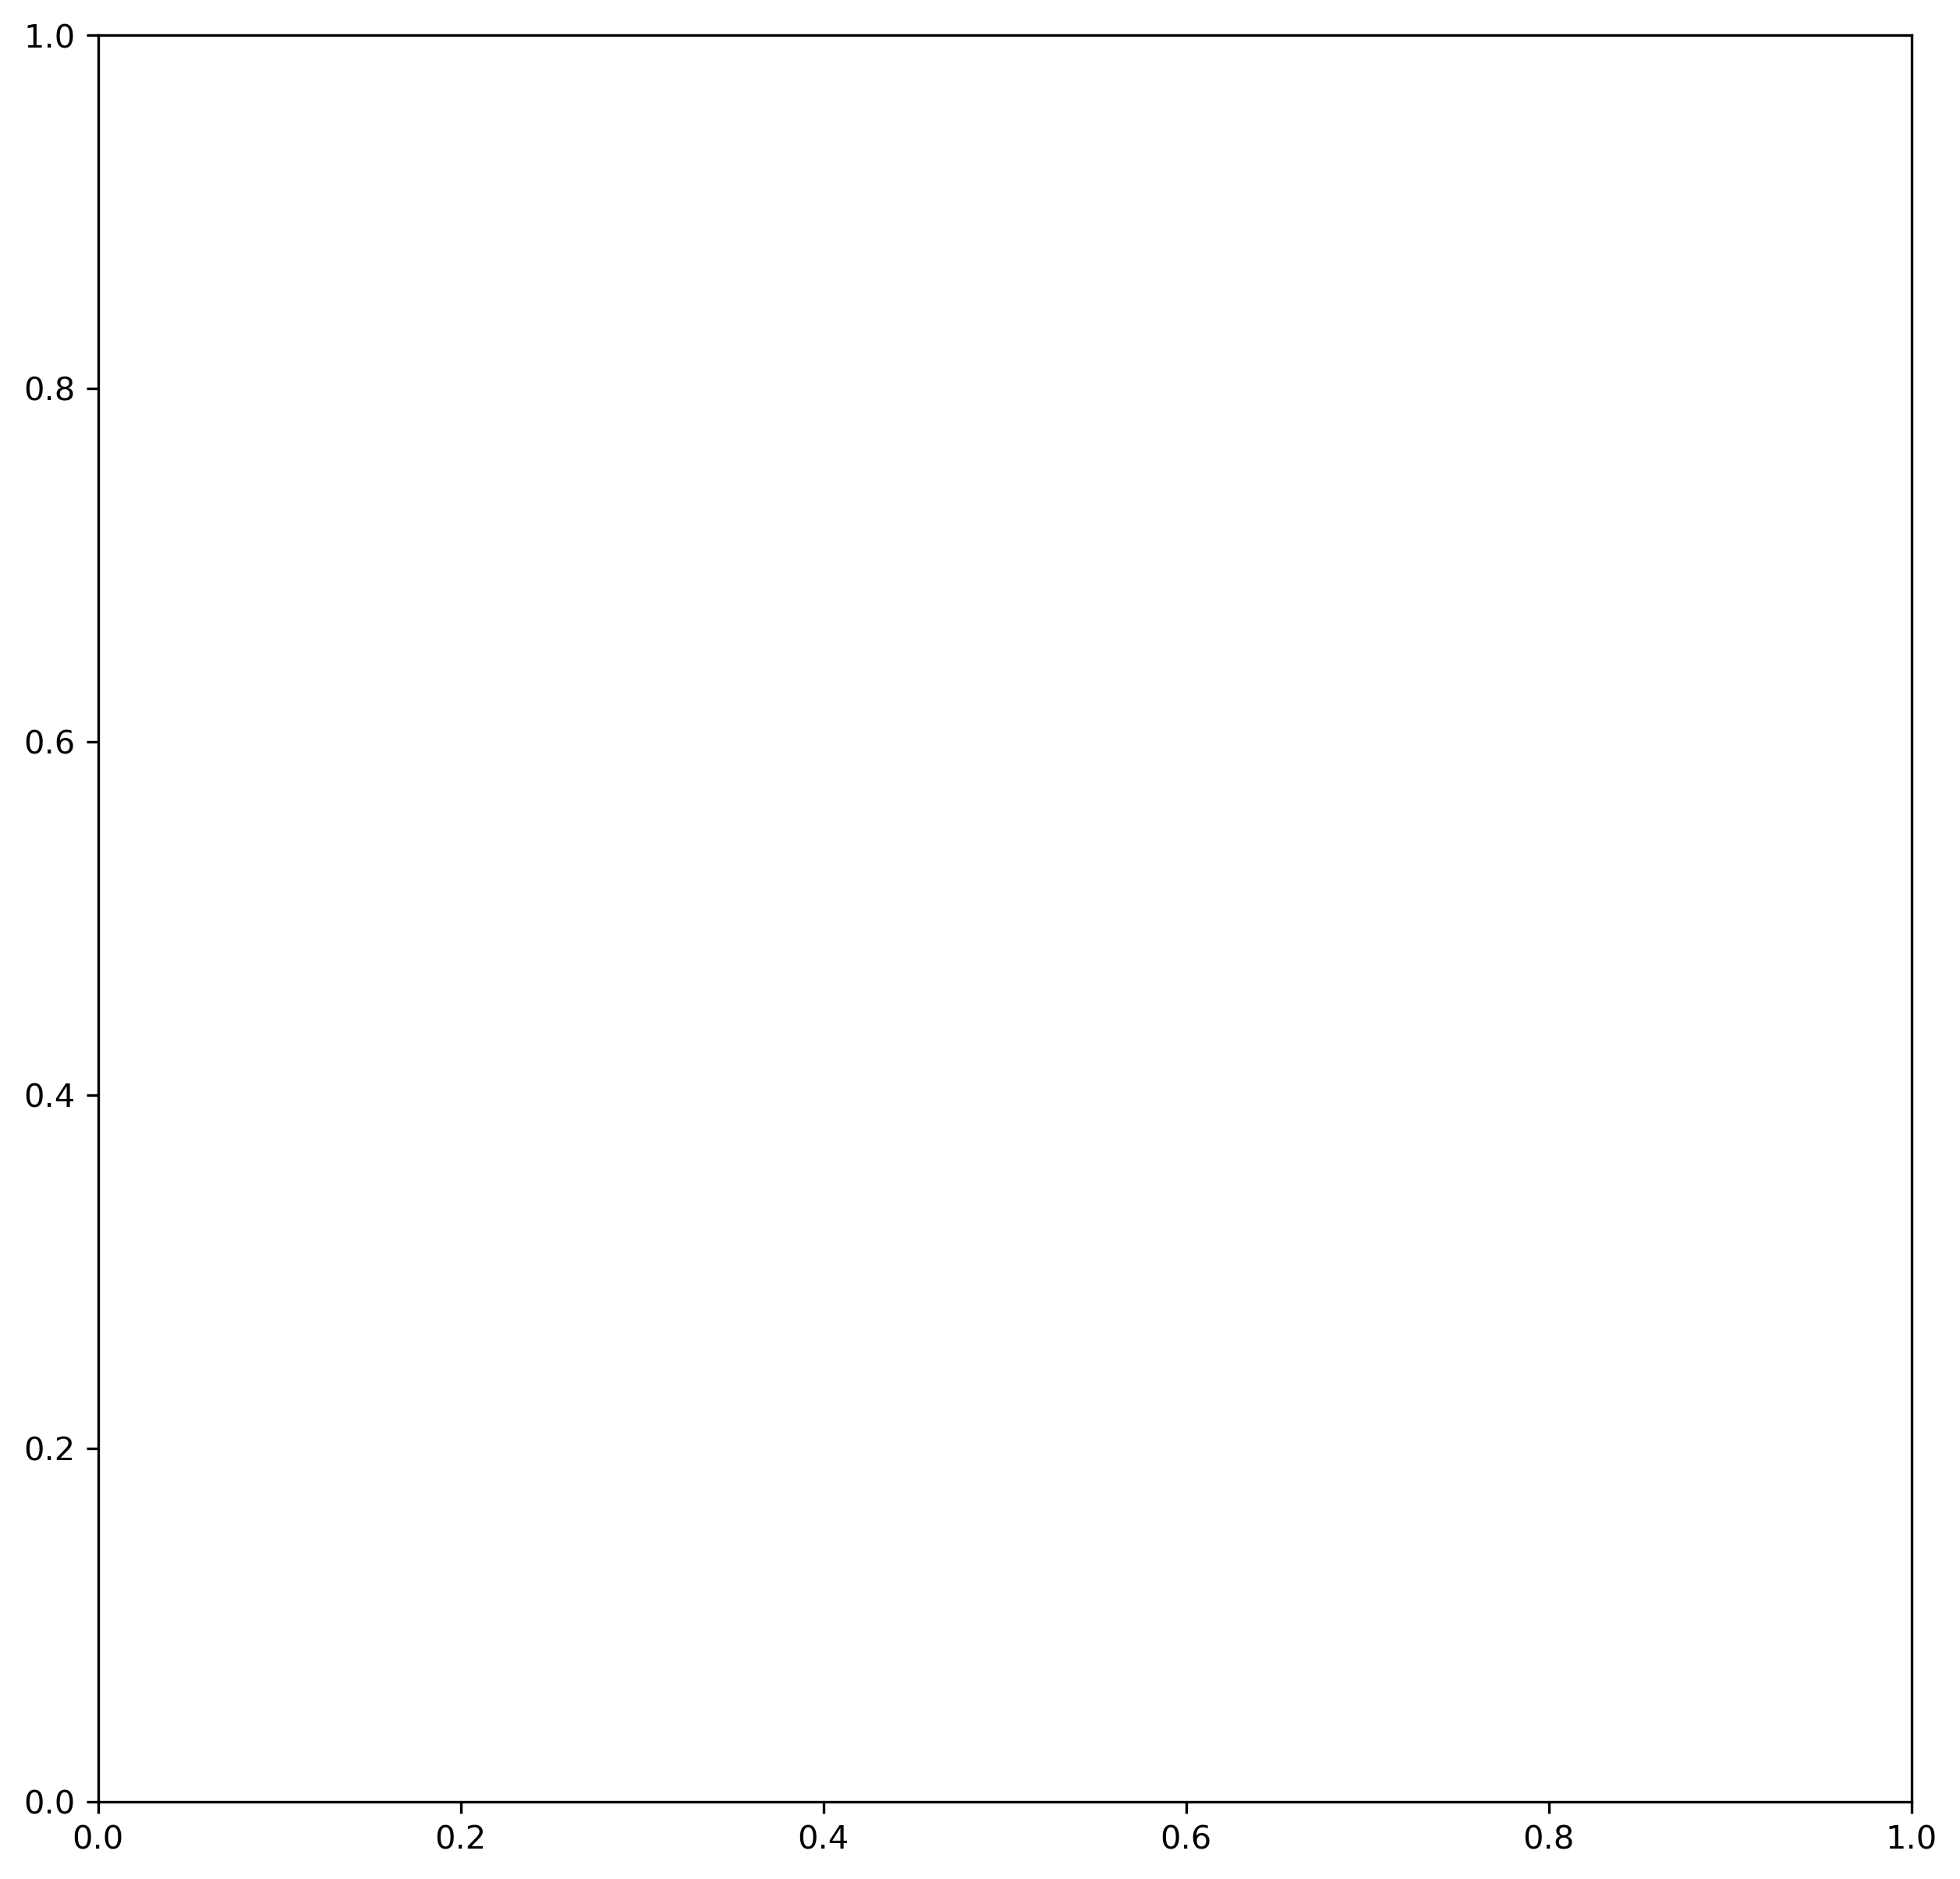

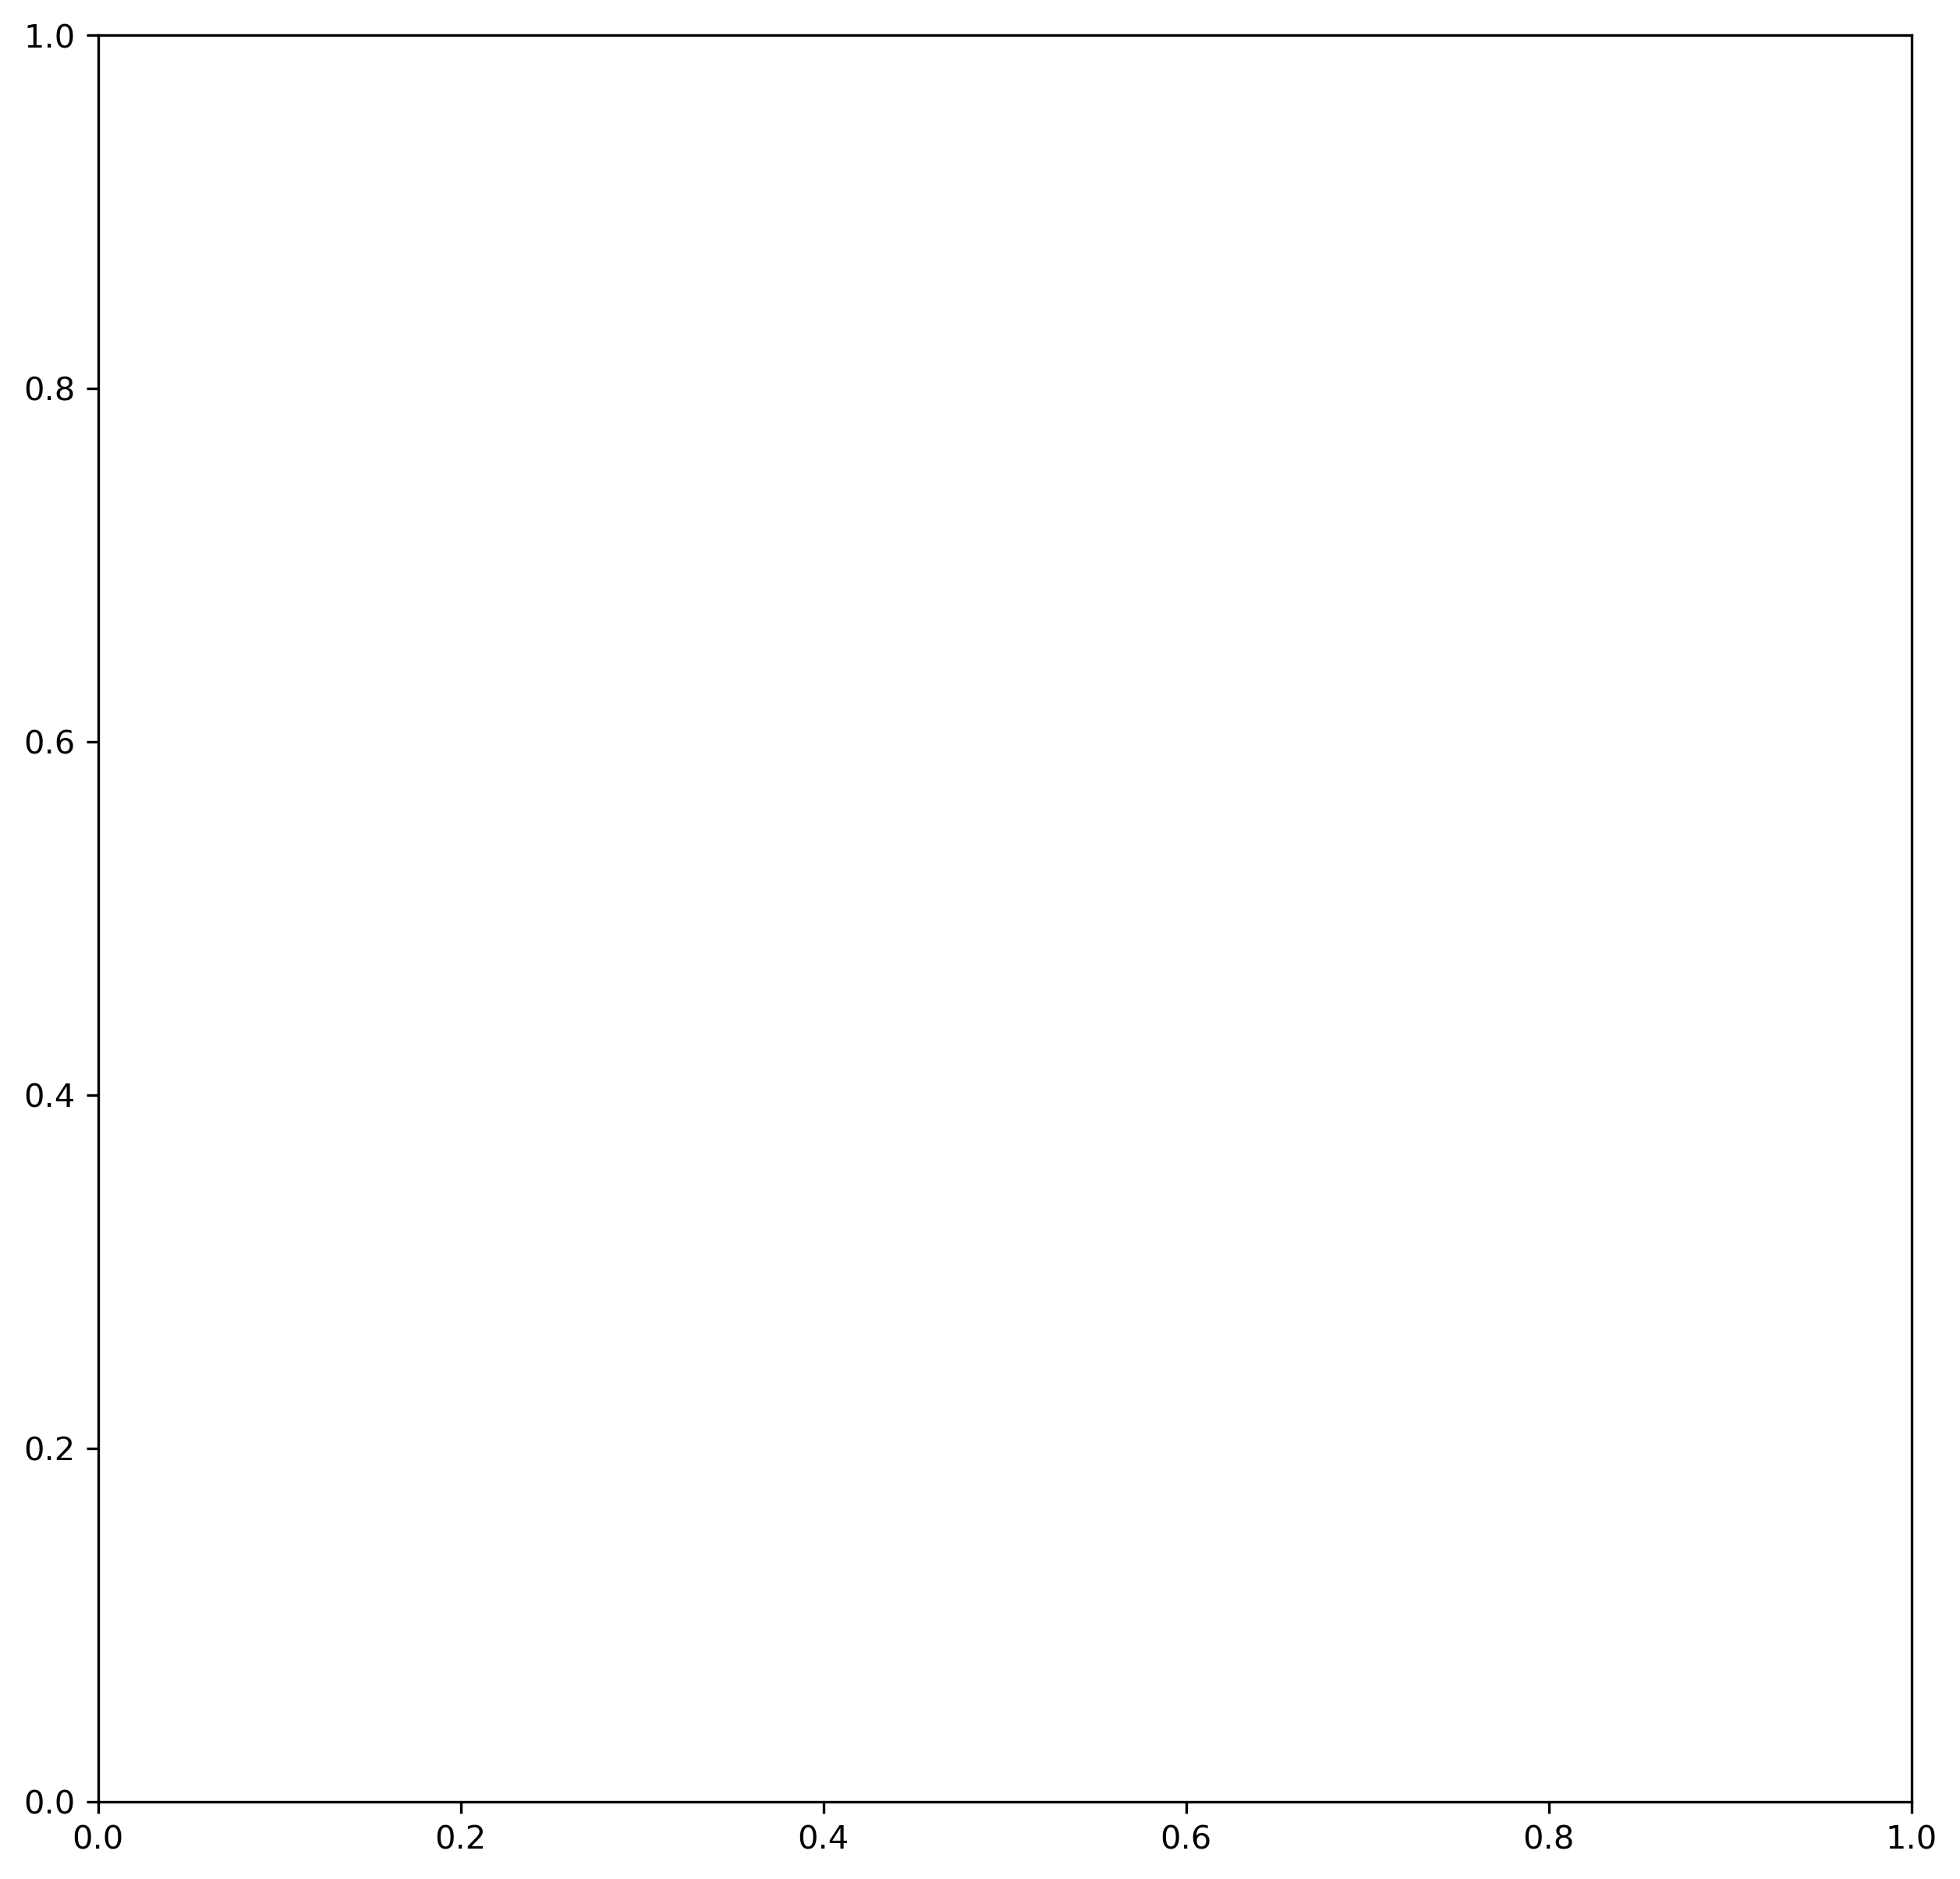

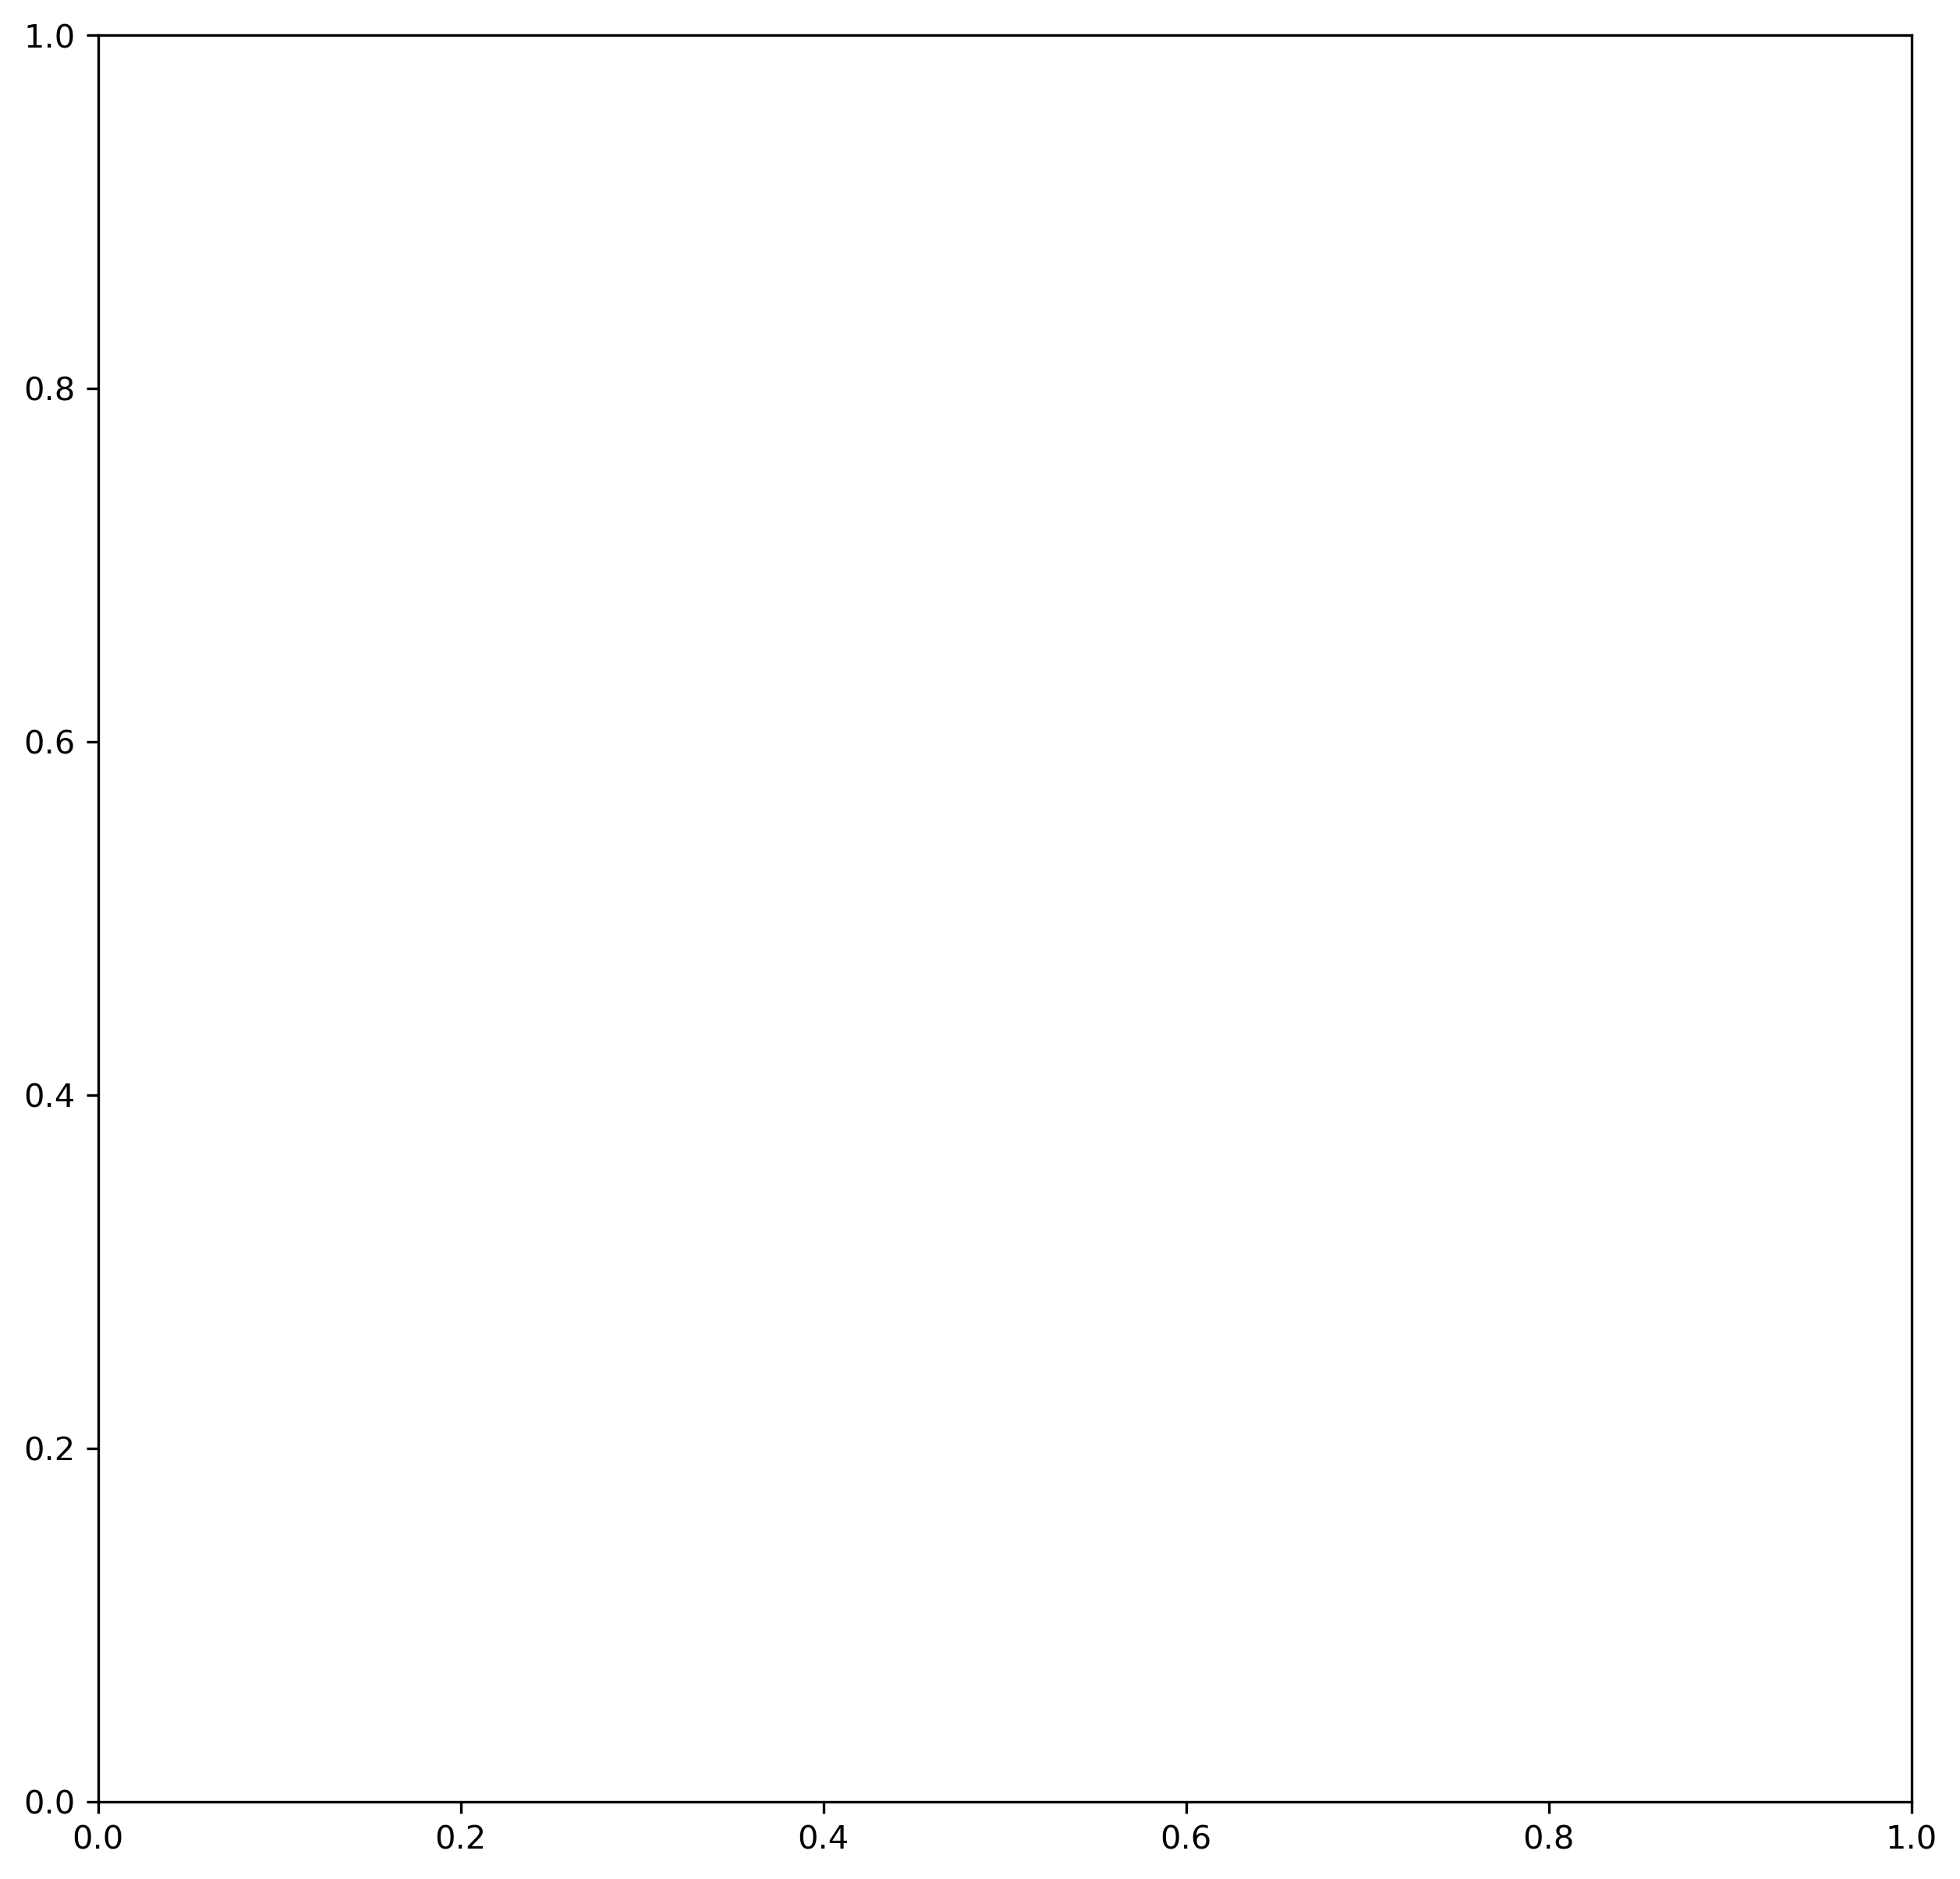

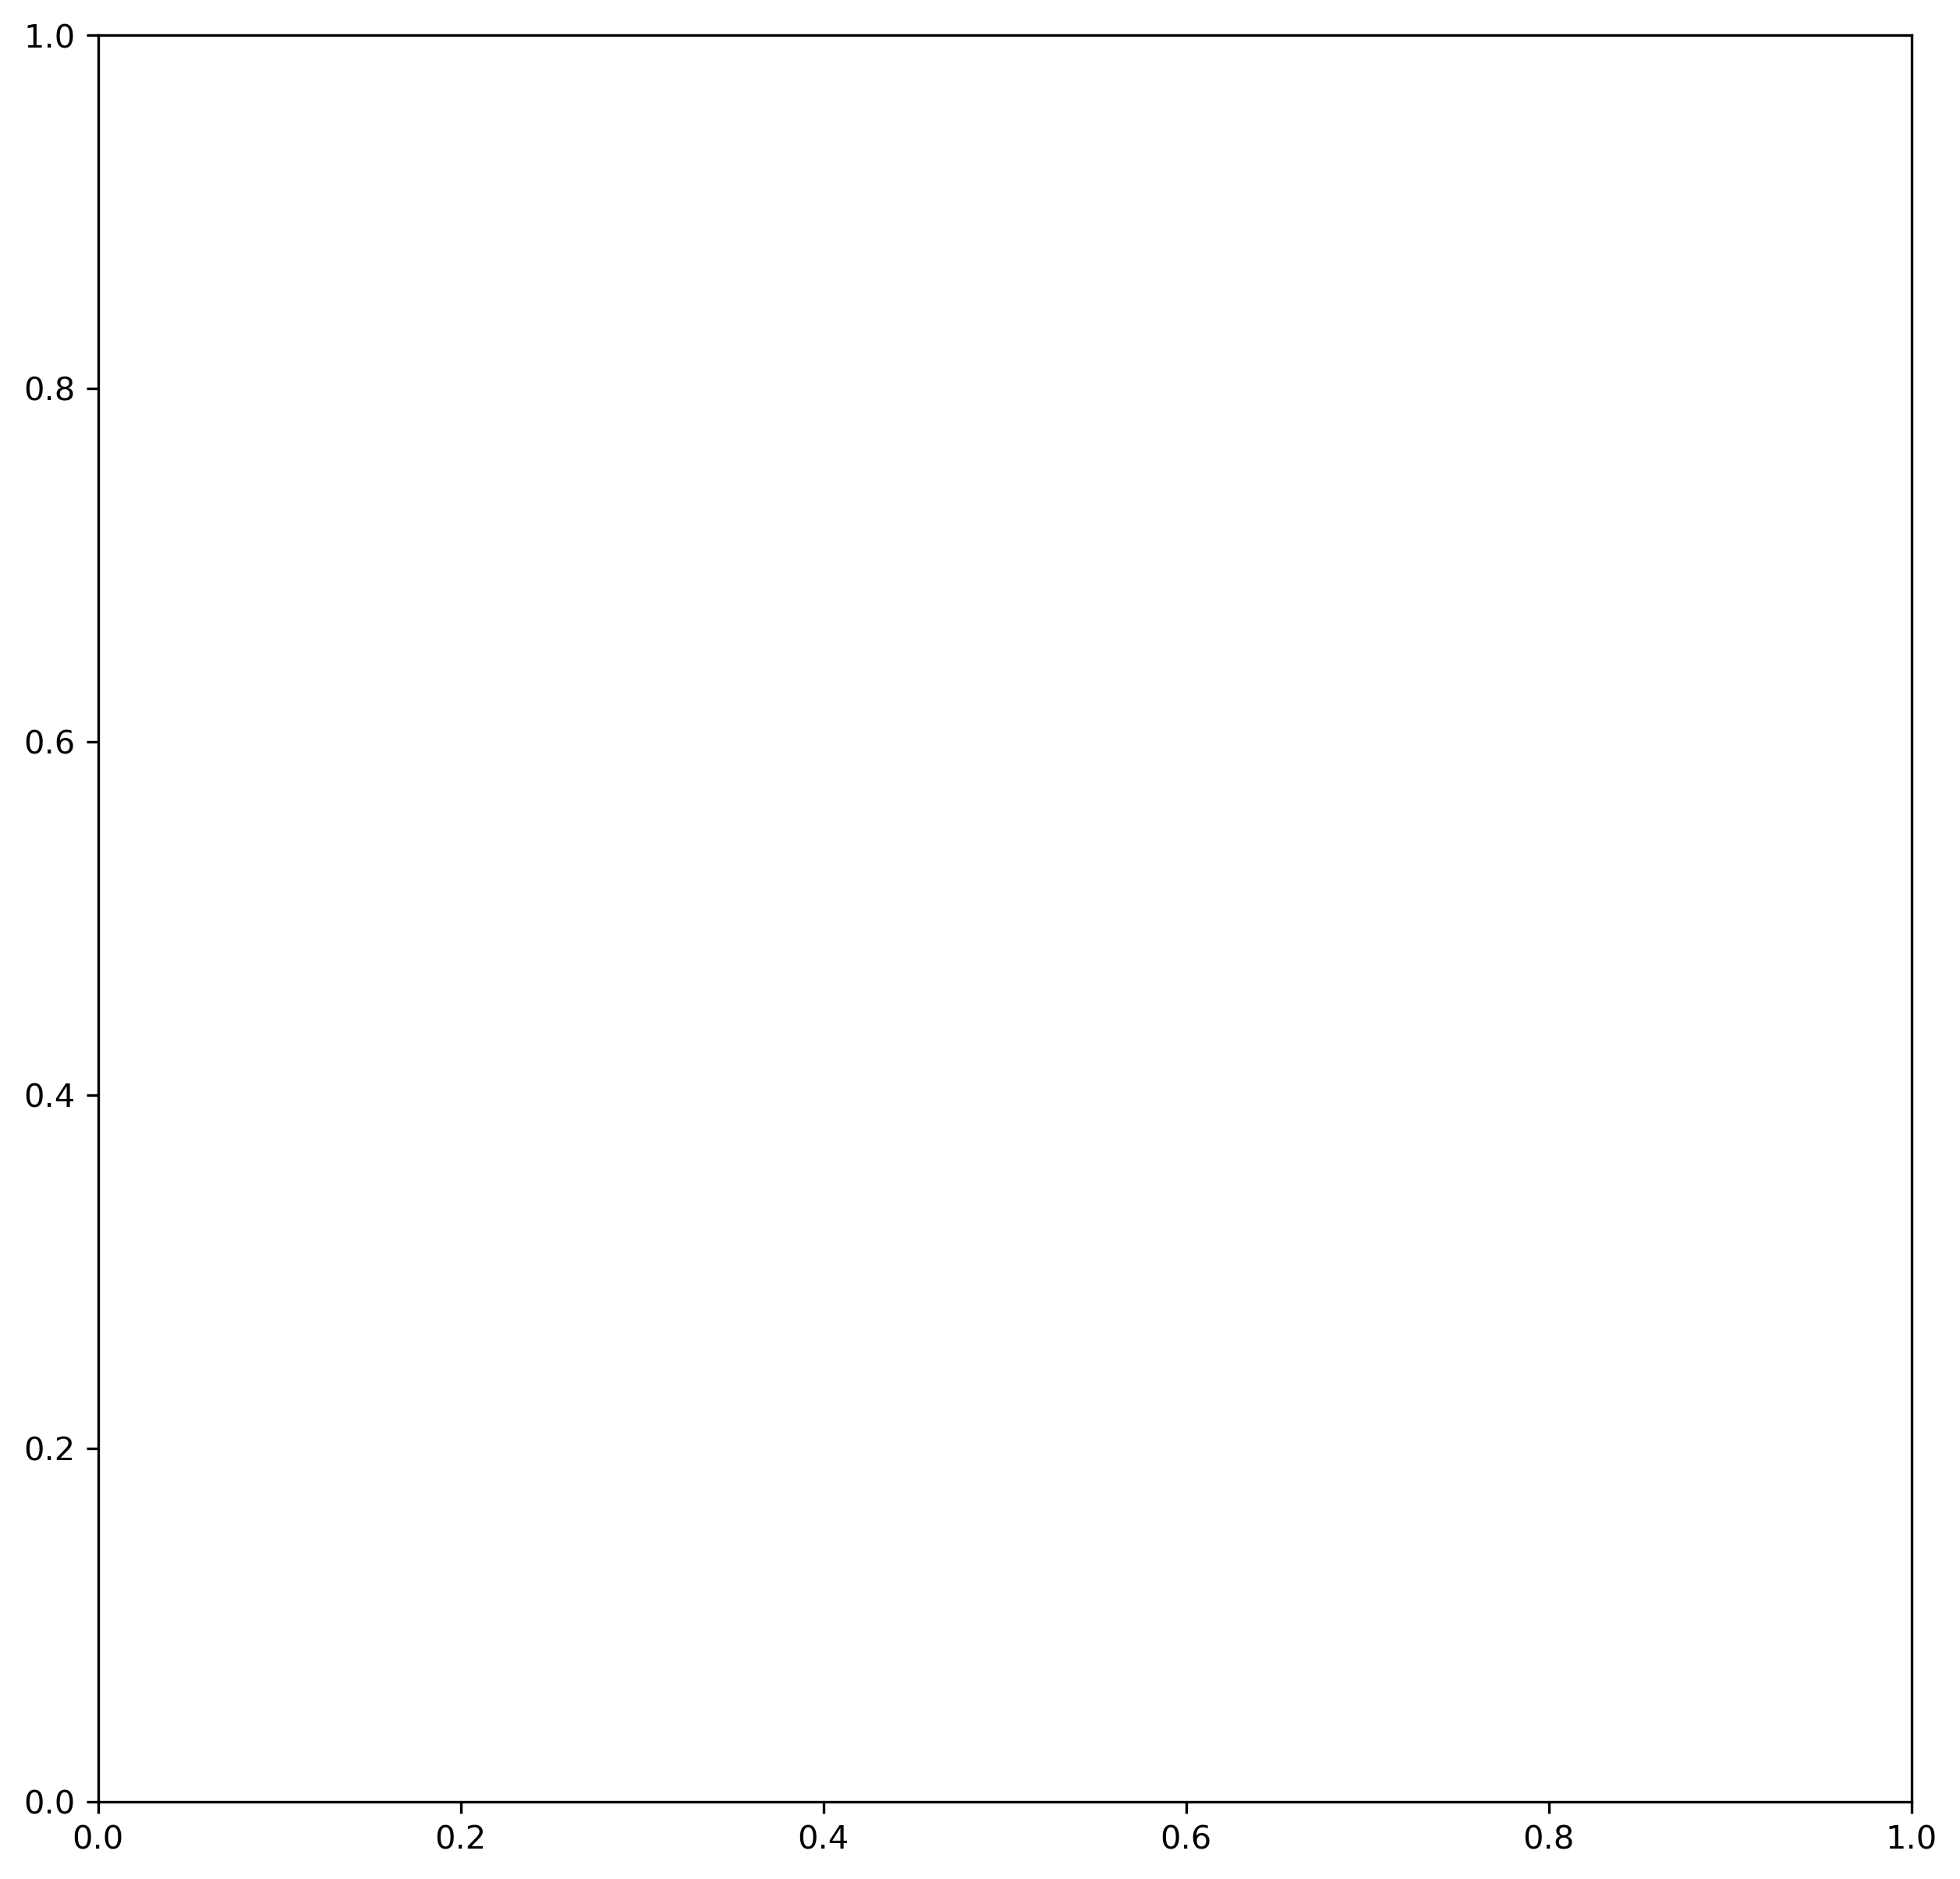

In [37]:
SPV_data = pd.read_csv(r'C:\Users\Boris\Desktop\Jupyter Notebooks\Fasanara Capital Assessment\interview_test_data.csv')


test = SPV.format_SPV_data(SPV_data)
test.implement_assumptions()
visual = SPV.visualize_data()
ml = SPV.ML_approach()
ml.make_ml_df()
ml.run_decision_tree_combinations(.3,False,['plat_deal_rating','debtor_country_code','debtor_macrosector','repaid_percent']
                                 ,(3,5),True)

In [38]:
dec_tree_dic_global

{'plat_deal_rating _depth_3': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'plat_deal_rating _depth_4': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'plat_deal_rating _depth_5': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'debtor_country_code _depth_3': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'debtor_country_code _depth_4': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'debtor_country_code _depth_5': {'Accuracy': 0.8792415169660679,
  'Default Accuracy': 0.05555555555555555},
 'debtor_macrosector _depth_3': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'debtor_macrosector _depth_4': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'debtor_macrosector _depth_5': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'repaid_percent _depth_3': {'Accuracy': 0.8652694610778443,
  'Default Accuracy': 0.007936507936507936},
 'repaid_percent _depth_4': {'Accuracy': 0.865269461

In [39]:
$jupyter nbconvert --to html NOTEBOOK-NAME.ipynb


SyntaxError: invalid syntax (<ipython-input-39-a1614a89a9a3>, line 1)

In [15]:
from sklearn import tree
from sklearn.model_selection import train_test_split 
from graphviz import Source

ml_temp_data = ml.data

for features in feature_comb:
    for depth in range(4,5):
        X = []
        for num in range(len(ml_temp_data)):
            X.append(list(ml_temp_data.loc[num,features]))

        y = np.array(ml_temp_data['default_bool'])

        X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False,test_size = .4) 


        dec_tree = tree.DecisionTreeClassifier(max_depth = depth,criterion = 'entropy',splitter = 'best').fit(X_train,y_train) 

        dec_tree_predictions = dec_tree.predict(X_test) 

        print(features)

        print(f'Train Proportion of actual defaults to total: {list(y_train).count(1)/len(y_train)}')
        print(f'Test Proportion of actual defaults to total: {list(y_test).count(1)/len(y_test)}')

        print(f'Proportion of default predictions to total predictions: {list(dec_tree_predictions).count(1)/len(list(dec_tree_predictions))}')

        count = 0
        for num in range(len(dec_tree_predictions)):
            if dec_tree_predictions[num] == y_test[num]:
                count += 1

        print(f'Accuracy: {count/len(dec_tree_predictions)}')

#         fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)

#         graph = Source( tree.export_graphviz(dec_tree, out_file=None, feature_names = features))
#         graph.format = 'png'
#         graph.render("dec_tree_" + ','.join(features) + f" _depth_{depth}",view=True)

['plat_deal_rating']
Train Proportion of actual defaults to total: 0.11138861138861139
Test Proportion of actual defaults to total: 0.1295880149812734
Proportion of default predictions to total predictions: 0.0
Accuracy: 0.8704119850187266
['debtor_country_code']
Train Proportion of actual defaults to total: 0.11138861138861139
Test Proportion of actual defaults to total: 0.1295880149812734
Proportion of default predictions to total predictions: 0.0
Accuracy: 0.8704119850187266
['debtor_macrosector']
Train Proportion of actual defaults to total: 0.11138861138861139
Test Proportion of actual defaults to total: 0.1295880149812734
Proportion of default predictions to total predictions: 0.0
Accuracy: 0.8704119850187266
['repaid_percent']
Train Proportion of actual defaults to total: 0.11138861138861139
Test Proportion of actual defaults to total: 0.1295880149812734
Proportion of default predictions to total predictions: 0.008988764044943821
Accuracy: 0.8644194756554308
['plat_deal_rating',

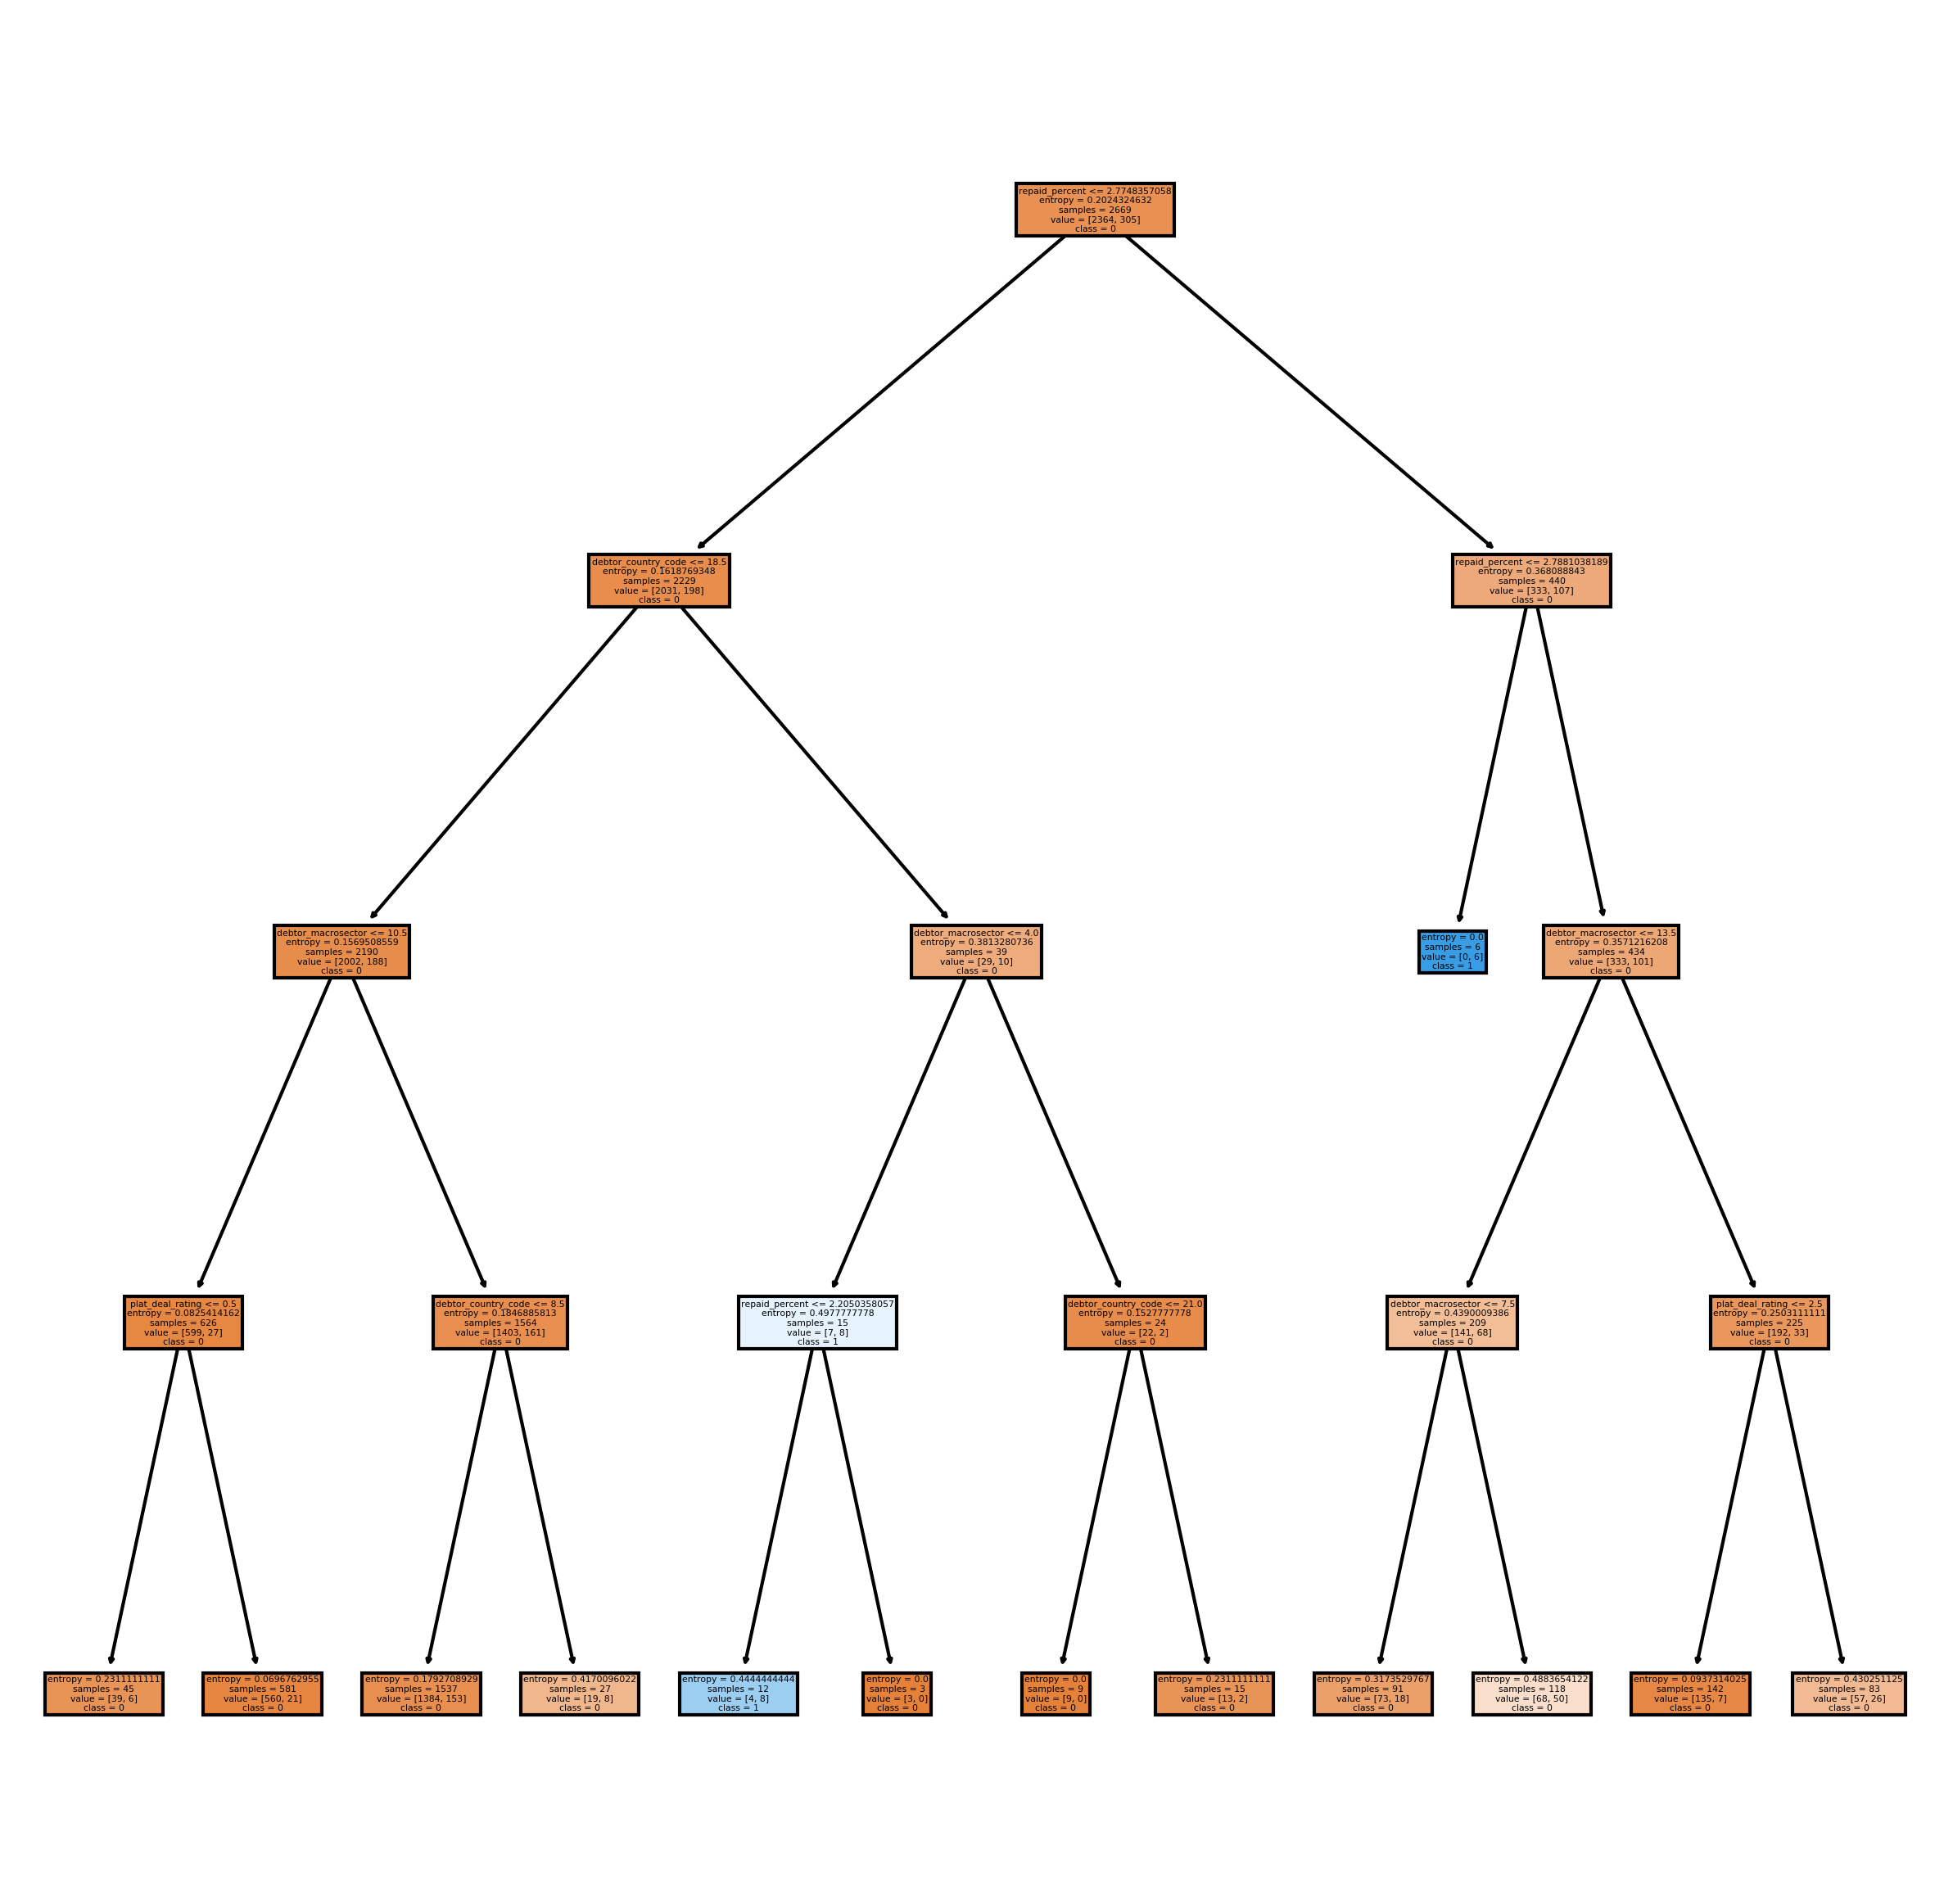

In [386]:
from sklearn import tree
from sklearn.model_selection import train_test_split 

ml_temp_data = ml.data

# ml_temp_data.sample(frac=1).reset_index(inplace=True,drop = True)

for n in range()

X = np.array([[ml_temp_data['plat_deal_rating'][num],ml_temp_data['debtor_country_code'][num],
               ml_temp_data['debtor_macrosector'][num],ml_temp_data['repaid_percent'][num]] for num in range(len(ml.data))])

y = np.array(ml_temp_data['default_bool'])

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False,test_size = .2) 


dec_tree = tree.DecisionTreeClassifier(max_depth = 4,splitter = 'best').fit(X_train,y_train) 

dec_tree_predictions = dec_tree.predict(X_test) 



fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)

tree.plot_tree(dec_tree,
           feature_names = ['plat_deal_rating','debtor_country_code','debtor_macrosector','repaid_percent'], 
           class_names= ['0','1'],
           filled = True,
           proportion = False,
           precision = 10);


In [387]:
print(f'Train Proportion of actual defaults to total: {list(y_train).count(1)/len(y_train)}')
print(f'Test Proportion of actual defaults to total: {list(y_test).count(1)/len(y_test)}')

print(f'Proportion of default predictions to total predictions: {list(dec_tree_predictions).count(1)/len(list(dec_tree_predictions))}')

Train Proportion of actual defaults to total: 0.11427500936680404
Test Proportion of actual defaults to total: 0.13622754491017963
Proportion of default predictions to total predictions: 0.0014970059880239522


In [33]:
help(tree)

Help on package sklearn.tree in sklearn:

NAME
    sklearn.tree

DESCRIPTION
    The :mod:`sklearn.tree` module includes decision tree-based models for
    classification and regression.

PACKAGE CONTENTS
    _classes
    _criterion
    _export
    _reingold_tilford
    _splitter
    _tree
    _utils
    export
    setup
    tests (package)
    tree

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.tree._classes.BaseDecisionTree(sklearn.base.MultiOutputMixin, sklearn.base.BaseEstimator)
            sklearn.tree._classes.DecisionTreeClassifier(sklearn.base.ClassifierMixin, sklearn.tree._classes.BaseDecisionTree)
                sklearn.tree._classes.ExtraTreeClassifier
            sklearn.tree._classes.DecisionTreeRegressor(sklearn.base.RegressorMixin, sklearn.tree._classes.BaseDecisionTree)
                sklearn.tree._classes.ExtraTreeRegressor
    sklearn.base.ClassifierMixin(builtins.object)
        sklearn.tree._classes.DecisionTreeClassifier(sklearn.base.Cl

In [339]:
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print("if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print("} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print("}")
                else:
                        print("return " + str(value[node]))

        recurse(left, right, threshold, features, 0)

get_code(dec_tree,['plat_deal_rating','debtor_country_code','debtor_macrosector','repaid_percent'])

if ( repaid_percent <= 2.7121741771698 ) {
if ( debtor_country_code <= 18.5 ) {
if ( debtor_macrosector <= 10.5 ) {
return [[472.  23.]]
} else {
return [[1217.  134.]]
}
} else {
if ( debtor_macrosector <= 4.0 ) {
return [[7. 8.]]
} else {
return [[16.  1.]]
}
}
} else {
if ( debtor_macrosector <= 13.5 ) {
if ( plat_deal_rating <= 0.5 ) {
return [[21. 24.]]
} else {
return [[128.  43.]]
}
} else {
if ( plat_deal_rating <= 2.5 ) {
return [[138.  13.]]
} else {
return [[66. 24.]]
}
}
}


In [233]:
['plat_deal_rating','debtor_country_code','debtor_macrosector','repaid_percent']

In [297]:
entropy = 0
for n in list(set(ml_temp_data['default_bool'])):
    prob = len(ml_temp_data[ml_temp_data['default_bool'] == n].index)/len(ml_temp_data)
    entropy += (prob*np.log2(prob))
    

In [313]:
set(SPV_data['plat_deal_rating'])

{0, 1, 2, 3, 4, 5, 6}

In [305]:
0.8813305364099491*np.log2(0.8813305364099491)+0.11866946359005093*np.log2(0.11866946359005093)

-0.5255241476436976

In [311]:
print(ml.macrosector_dic)
print(ml.rating_dic)

{'Retailing': 0, 'Media': 1, 'Utilities': 2, 'Consumer Durables & Apparel': 3, 'Pharmaceuticals, Biotechnology & Life Sciences': 4, 'Real Estate': 5, 'Food & Staples Retailing': 6, 'Commercial & Professional Services': 7, 'Diversified Financials': 8, 'Consumer Services': 9, 'Health Care Equipment & Services': 10, 'Transportation': 11, 'Software & Services': 12, 'Food, Beverage & Tobacco': 13, 'Technology Hardware & Equipment': 14, 'Capital Goods': 15, 'Materials': 16, 'Automobiles & Components': 17}
{'B': 0, 'AA': 1, 'A': 2, 'BB': 3, 'AAA': 4, 'CCC': 5, 'BBB': 6}


count    3051.000000
mean        7.606031
std        84.003404
min      -293.000000
25%        -4.000000
50%         1.000000
75%        31.000000
max       305.000000
Name: repayment_from_expected_days, dtype: float64


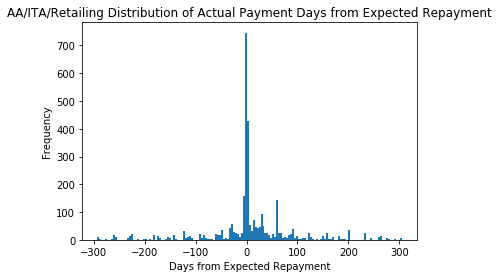

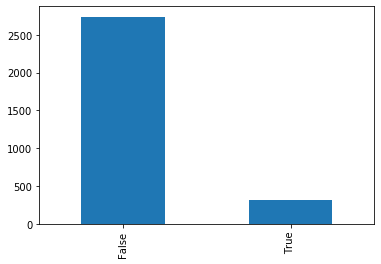

In [164]:
visual.vis_hist(['AA','ITA','Retailing'],['OR','OR'])


In [314]:
SPV_data = pd.read_csv(r'C:\Users\Boris\Desktop\Jupyter Notebooks\Fasanara Capital Assessment\interview_test_data.csv')


In [389]:
SPV_data

,loan_date,expected_repayment_date,actual_repayment_date,plat_deal_rating,debtor_country_code,debtor_macrosector,EUR_loan,EUR_repaid_amount
0,19/06/2019,30/08/2019,30/08/2019,AA,ITA,Transportation,34561.00,35857.68
1,14/06/2019,15/07/2019,17/07/2019,BB,ITA,Retailing,14556.67,14794.96
2,14/06/2019,16/07/2019,18/07/2019,BB,ITA,Retailing,14631.33,14878.74
3,6/3/2019,31/07/2019,20/08/2019,BB,ITA,Capital Goods,2745.00,2866.35
4,21/05/2019,31/07/2019,21/08/2019,AA,ITA,Retailing,18446.40,19406.41
5,16/05/2019,31/07/2019,14/08/2019,BB,ITA,Capital Goods,19764.00,20744.71
6,5/3/2019,30/06/2019,15/07/2019,BB,ITA,Materials,6066.05,6302.24
7,5/3/2019,6/10/2019,17/06/2019,BBB,ITA,Capital Goods,3327.27,3401.32
8,5/3/2019,6/10/2019,17/06/2019,BBB,ITA,Capital Goods,6654.54,6802.63
9,23/04/2019,31/05/2019,14/06/2019,A,ITA,Transportation,741.60,761.88


In [331]:
temp = list(set(SPV_data['plat_deal_rating']))
for num in  :
    

['B', 'AA', 'A', 'BB', 'AAA', 'CCC', 'BBB']

In [332]:
sorted(list(set(SPV_data['plat_deal_rating'])))

['A', 'AA', 'AAA', 'B', 'BB', 'BBB', 'CCC']